# The Neccessity for Nutrition

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

import seaborn as sns
from sklearn import tree
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
np.seterr(divide = 'ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
cereals = pd.read_csv("../data/cereal.csv")
mcd = pd.read_csv("../data/menu.csv")
starbucks = pd.read_csv("../data/starbucks.csv", encoding= 'unicode_escape')

cereals['mfr'].replace({'K': 1, 'G': 1, 'A': -1, 'N': -1, 'P': -1, 'Q': -1, 'R':-1}, inplace=True)

mcd['Category'].replace({'Beef & Pork': -1, 'Chicken & Fish': -1, 'Breakfast': 1}, inplace=True)
value_list = [1, -1]
mcd = mcd[mcd.Category.isin(value_list)]

starbucks['Type'].replace({'Coffee': -1, 'Espresso': 1}, inplace=True)
starbucks = starbucks.dropna(how='all')

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\3065349416.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cereals['mfr'].replace({'K': 1, 'G': 1, 'A': -1, 'N': -1, 'P': -1, 'Q': -1, 'R':-1}, inplace=True)
C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\3065349416.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [4]:
# Organzizing cereal data
X = []
for i in cereals.itertuples(): 
    X.append(i[4:12])  
    
for count,ele in enumerate(X):
    X[count] = list(ele)
    
X = np.array(X)

Y = []
for i in cereals.mfr:
    Y.append([i])
Y = np.array(Y)

# Organzizing mcd data
X1 = []
for i in mcd.itertuples(): 
    X1.append(i[4:17])  
    
for count,ele in enumerate(X1):
    X1[count] = list(ele)
    
X1 = np.array(X1)

Y1 = []
for i in mcd.Category:
    Y1.append([i])
Y1 = np.array(Y1)

# Organzizing starbucks data
X2 = []
for i in starbucks.itertuples(): 
    X2.append(i[6:15])  
    
for count,ele in enumerate(X2):
    X2[count] = list(ele)
    
X2 = np.array(X2)

Y2 = []
for i in starbucks.Type:
    Y2.append([i])
Y2 = np.array(Y2)

In [5]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.            
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])

X_and_Y1 = np.hstack((X1, Y1))     # Stack them together for shuffling.            
np.random.shuffle(X_and_Y1)      # Shuffle the data points in X_and_Y array

print(X1.shape)
print(Y1.shape)
print(X_and_Y1[0]) 

X_and_Y2 = np.hstack((X2, Y2))     # Stack them together for shuffling.            
np.random.shuffle(X_and_Y2)      # Shuffle the data points in X_and_Y array

print(X2.shape)
print(Y2.shape)
print(X_and_Y2[0]) 

(77, 8)
(77, 1)
[110.   1.   1. 280.   0.  15.   9.  45.   1.]
(84, 13)
(84, 1)
[460. 170.  19.  30.   9.  43.   0.  15.   5. 370.  15.  66.  22.   1.]
(462, 9)
(462, 1)
[ 1.9e+02  3.5e+00  2.0e+00  1.0e-01  1.0e+01  6.0e+01  3.5e+01  0.0e+00
  3.5e+01 -1.0e+00]


# Setting up functions

In [6]:
# Sigmoid function: sigmoid(z) = 1/(1 + e^(-z))
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

# Judge function: 1(a != b).
def judge(a, b):
    if a != b:
        return 1
    else:
        return 0
    
# Logistic regression classifier.
def f_logistic(x, W, b):
    # x should be a 2-dimensional vector, 
    # W should be a 2-dimensional vector,
    # b should be a scalar.
    # you should return a scalar which is -1 or 1.
    zigma = W.dot(x) + b
    if sigmoid(zigma) >= 0.5:
        return 1
    else:
        return -1
    
# Calculate error given feature vectors X and labels Y.
def calc_error1(X, Y, W, b):
    errors = 0 
    n = len(X)
    
    for (xi, yi) in zip(X, Y):
        errors += judge(yi,f_logistic(xi,W,b))
    
    return errors/n

# Gradient of L(W, b) with respect to W and b.
def grad_L_W_b(X, Y, W, b):
    one = np.ones(len(X))
    P = sigmoid(Y * (X.dot(W) + b * one))

    grad_W = -X.T.dot((one-P) * Y)
    grad_b = -one.T.dot((one-P) * Y)
    return grad_W, grad_b

# Loss L(W, b).
def L_W_b(X, Y, W, b):
    # You should return a scalar.
    one = np.ones(len(X))
    P = sigmoid(Y * (X.dot(W) + b * one))
    
    return -one.T.dot(np.log(P))

# Judge function: 1(a != b). It supports scalar, vector and matrix.
def judge_1(a, b):
    return np.array(a != b).astype(np.float32)

# Judge function: 1(z > 0). It supports scalar, vector and matrix.
def judge_2(z):
    return np.array(z > 0).astype(np.float32)
    
# Rectifier function: (z)_+ = max(0, z). It supports scalar, vector and matrix.
def rectifier(z):
    return np.clip(z, a_min=0, a_max=None)

# Linear SVM classifier.
def f_linear_svm(x, W, b):
    # x should be a 2-dimensional vector, 
    # W should be a 2-dimensional vector,
    # b should be a scalar.
    # you should return a scalar which is -1 or 1. 
    f_svm = W.T.dot(x) + b
    
    if f_svm >= 0:
        return 1
    else:
        return -1
    
# Calculate error given feature vectors X and labels Y.
def calc_error2(X, Y, classifier):
    Y_pred = classifier.predict(X) # Hint: Use classifier.predict()
    e = 1 - accuracy_score(Y_pred, Y) # Hint: Use accuracy_score().
    return e

# Gradient of L(W, b) with respect to W and b.
def grad_L_W_b2(X, Y, W, b, C):
    one = np.ones(len(X))
    a = one - Y * (X.dot(W) + b * one)
    grad_W = W - C * X.T.dot(judge_2(a) * Y)
    grad_b = -C * one.T.dot(judge_2(a) * Y)
    return grad_W, grad_b

# Loss L(W, b).
def L_W_b2(X, Y, W, b, C):
    one = np.ones(len(X))
    a = one - Y * (X.dot(W) + b * one)
    return 1/2 * W.T.dot(W) + C * one.T * rectifier(a)

In [7]:
def vis(X, Y, W=None, b=None):
    indices_neg1 = (Y == -1).nonzero()[0]
    indices_pos1 = (Y == 1).nonzero()[0]
    plt.scatter(X[:,0][indices_neg1], X[:,1][indices_neg1], 
                c='blue', label='class -1')
    plt.scatter(X[:,0][indices_pos1], X[:,1][indices_pos1], 
                c='red', label='class 1')
    plt.legend()
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    
    if W is not None:
        # w0x0+w1x1+b=0 => x1=-w0x0/w1-b/w1
        w0 = W[0]
        w1 = W[1]
        temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0
        x0_min = max(temp.min(), X[:,0].min())
        x0_max = min(temp.max(), X[:,1].max())
        x0 = np.linspace(x0_min,x0_max,100)
        x1 = -w0*x0/w1-b/w1
        plt.plot(x0,x1,color='black')

    plt.show()

    
def draw_heatmap(errors, D_list, title):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(errors, annot=True, fmt='.3f', yticklabels=D_list, xticklabels=[])
    ax.collections[0].colorbar.set_label('error')
    ax.set(ylabel='max depth D')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.title(title)
    plt.show()

In [8]:
r_training_data1 = 0
r_testing_data1 = 0

def logreg(X_train, Y_train, X_test, Y_test):        
    learning_rate = 0.001
    iterations  = 10000
    losses = []
    global r_training_data1
    global r_testing_data1

    # Gradient descent algorithm for logistic regression.
    # Step 1. Initialize the parameters W, b.
    W = np.zeros(2) 
    b = 0

    for i in range(iterations):
        # Step 2. Compute the partial derivatives.
        grad_W, grad_b = grad_L_W_b(X_train, Y_train, W, b)
        # Step 3. Update the parameters.
        W = W - learning_rate * grad_W
        b = b - learning_rate * grad_b

        # Track the training losses.
        losses.append(L_W_b(X_train, Y_train, W, b))

    # Show decision boundary, training error and test error.
    r_training_data1 += calc_error1(X_train, Y_train, W, b)
    r_testing_data1 += calc_error1(X_test, Y_test, W, b)
    print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))
    vis(X_train, Y_train, W, b)
    print('Training error: {}'.format(calc_error1(X_train, Y_train, W, b)))
    vis(X_test, Y_test, W, b)
    print('Test error: {}'.format(calc_error1(X_test, Y_test, W, b)))

In [9]:
r_training_data2 = 0
r_testing_data2 = 0

def svmf(X_train, Y_train, X_test, Y_test):
    # Some settings.
    learning_rate = 0.0001
    iterations    = 10000
    losses = []

    global r_training_data2
    global r_testing_data2

    # Gradient descent algorithm for linear SVM classifier.
    # Step 1. Initialize the parameters W, b.
    W = np.zeros(2) 
    b = 0
    C = 1000

    for i in range(iterations):
        # Step 2. Compute the partial derivatives.
        grad_W, grad_b = grad_L_W_b2(X_train, Y_train, W, b, C) 
        # Step 3. Update the parameters.
        W = W - learning_rate * grad_W
        b = b - learning_rate * grad_b

        # Track the training losses.
        losses.append(L_W_b2(X_train, Y_train, W, b, C))

    C_list = [0.1, 1, 10, 100, 1000]
    opt_e_training = 1.0   # Optimal training error.
    opt_classifier = None  # Optimal classifier.
    opt_C          = None  # Optimal C.

    for C in C_list:
        # Create a linear SVM classifier.
        # Hints: You can use svm.LinearSVC()
        #        Besides, we use Hinge loss and L2 penalty for weights.
        #        The max iterations should be set to 10000.
        #        The regularization parameter should be set as C.
        #        The other arguments of svm.LinearSVC() are set as default values.
        classifier = svm.LinearSVC(penalty = 'l2', loss = 'hinge', max_iter = 10000, C = C)
    
        # Use the classifier to fit the training set (use X_train, Y_train).
        # Hint: You can use classifier.fit().
        classifier.fit(X_train, Y_train)

        # Obtain the weights and bias from the linear SVM classifier.
        W = classifier.coef_[0]
        b = classifier.intercept_[0]
    
        # Show decision boundary, training error and test error.
        print("Test #1")
        print('C = {}'.format(C))
        print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(W[0],W[1],b))
        vis(X_train, Y_train, W, b)
        e_training = calc_error2(X_train, Y_train, classifier)
        print('Training error: {}'.format(e_training))
        print('\n\n\n')
    
        # Judge if it is the optimal one.
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_classifier = classifier
            opt_C = C

    r_training_data2 += opt_e_training
    
    # Obtain the weights and bias from the best linear SVM classifier .
    opt_W = opt_classifier.coef_[0]
    opt_b = opt_classifier.intercept_[0]
    print('Best parameter C* = {}'.format(opt_C))
    print('Decision boundary: {:.3f}x0+{:.3f}x1+{:.3f}=0'.format(opt_W[0],opt_W[1],opt_b))
    vis(X_test, Y_test, opt_W, opt_b)
    print('Test error: {}'.format(calc_error2(X_test, Y_test, opt_classifier)))

    r_testing_data2 += calc_error2(X_test, Y_test, opt_classifier)

In [10]:
r_training_data3 = 0
r_testing_data3 = 0

def trees(X_train,Y_train,X_test,Y_test):
    # Perform grid search for best max depth.
    global r_training_data3 
    global r_testing_data3 

    # 1. Create a decision tree classifier.
    estimator = tree.DecisionTreeClassifier(criterion = "entropy", random_state = 1)
    # 2. Create a grid searcher with cross-validation.
    D_list = [1, 2, 3, 4, 5]
    param_grid = {'max_depth': D_list}
    grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, cv = 5)
    # 3. Use the grid searcher to fit the training set.
    #    Hint: You can simply use .fit() function of the grid searcher.
    grid_search.fit(X_train,Y_train)
    
    # Draw heatmaps of cross-validation errors (in cross-validation).
    cross_val_errors = 1 - grid_search.cv_results_['mean_test_score'].reshape(-1,1)
    draw_heatmap(cross_val_errors, D_list, title='cross-validation error w.r.t D')
    
    # Show the best max depth.
    best_max_depth = grid_search.best_params_
    print("Best max depth D: {}".format(best_max_depth))
    
    # Calculate the training error.
    # Hint: You can use .best_estimator_.predict() to make predictions.
    X_train = grid_search.best_estimator_.predict(X_train)
    train_error = 1 - accuracy_score(X_train, Y_train)
    print("Training error: {}".format(train_error))
    
    # Calculate the test error.
    # Hint: You can use .best_estimator_.predict() to make predictions.
    X_test = grid_search.best_estimator_.predict(X_test)
    test_error = 1 - accuracy_score(X_test, Y_test)
    print("Test error: {}".format(test_error))

    r_training_data3 += train_error
    r_testing_data3 += test_error

# Dataset #1

## Partition 1

### Logistic regression classifier

#### Result #1

In [11]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]
    

X_train = X_shuffled[:15][:,[6,0]]
Y_train = Y_shuffled[:15]
X_test  = X_shuffled[15:78][:,[6,0]]
Y_test  = Y_shuffled[15:78]

Decision boundary: 4.425x0+0.024x1+-0.283=0


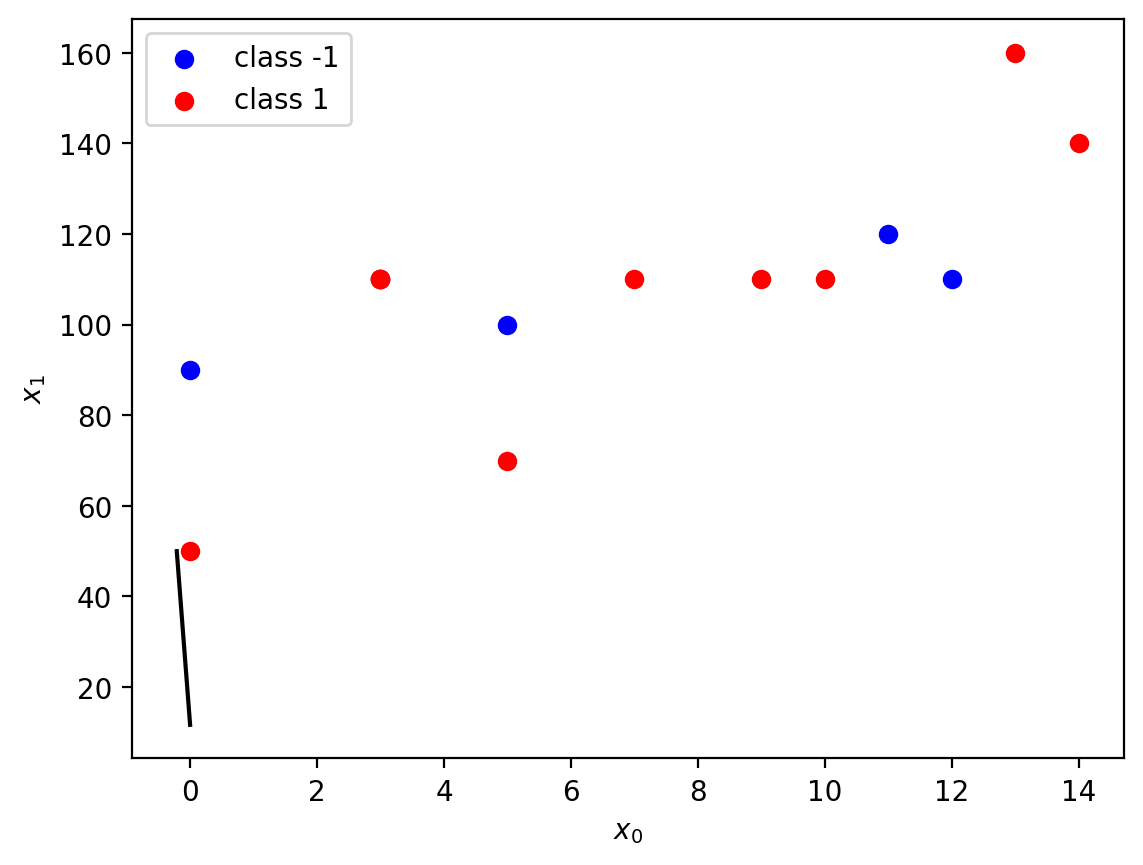

Training error: 0.3333333333333333


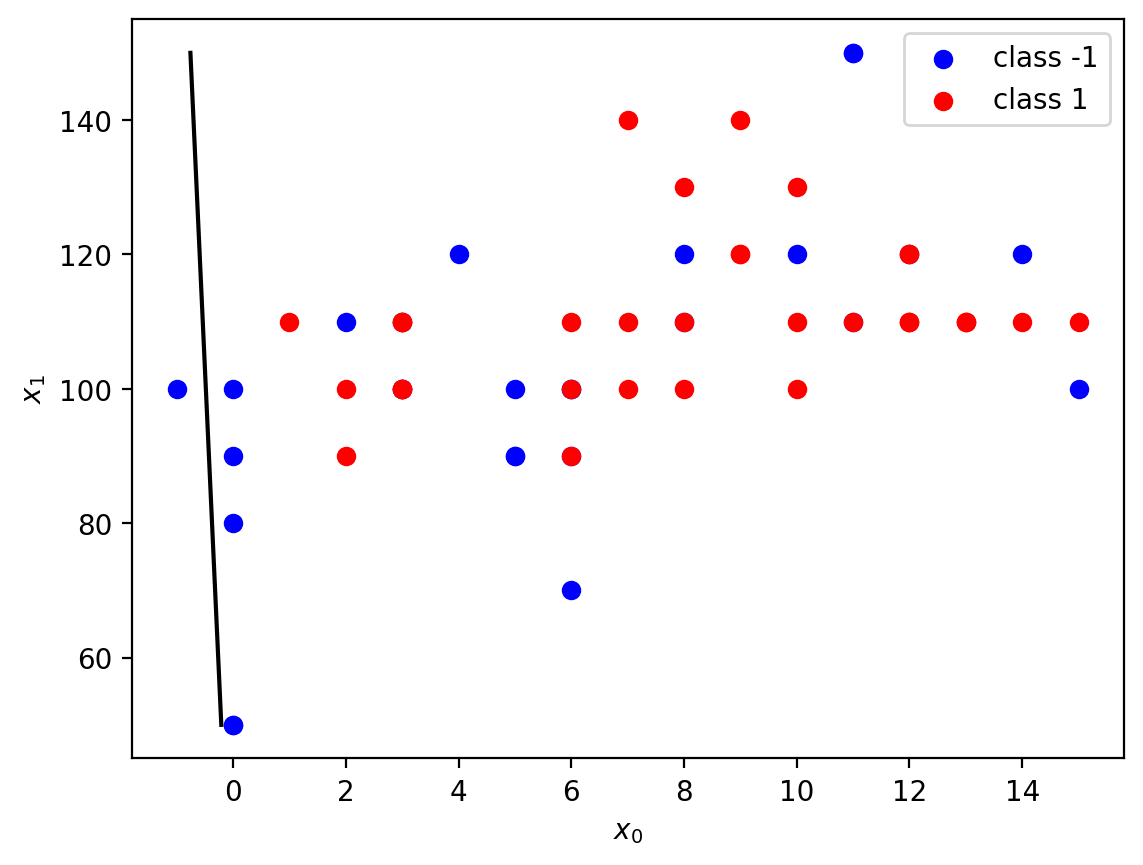

Test error: 0.41935483870967744


In [12]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #2

In [13]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:15][:,[6,0]]
Y_train = Y_shuffled[:15]
X_test  = X_shuffled[15:78][:,[6,0]]
Y_test  = Y_shuffled[15:78]

Decision boundary: 4.357x0+-0.015x1+-0.017=0


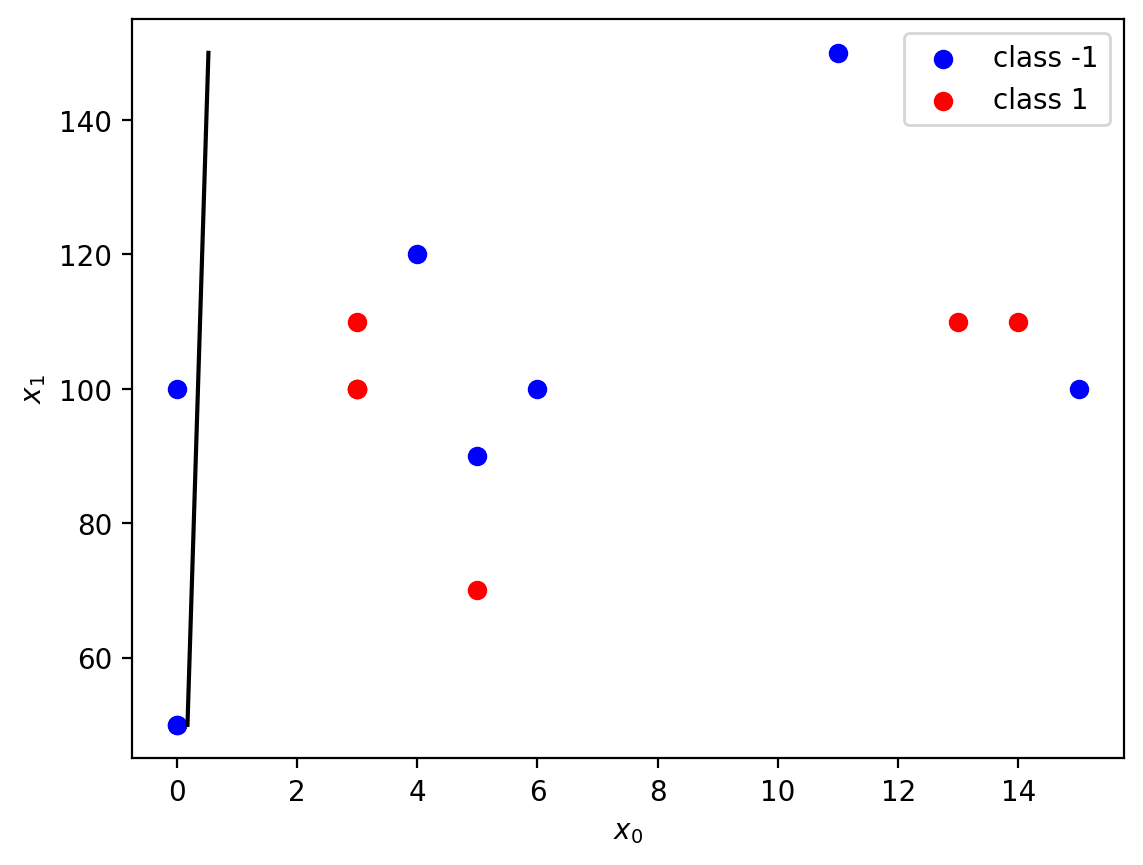

Training error: 0.3333333333333333


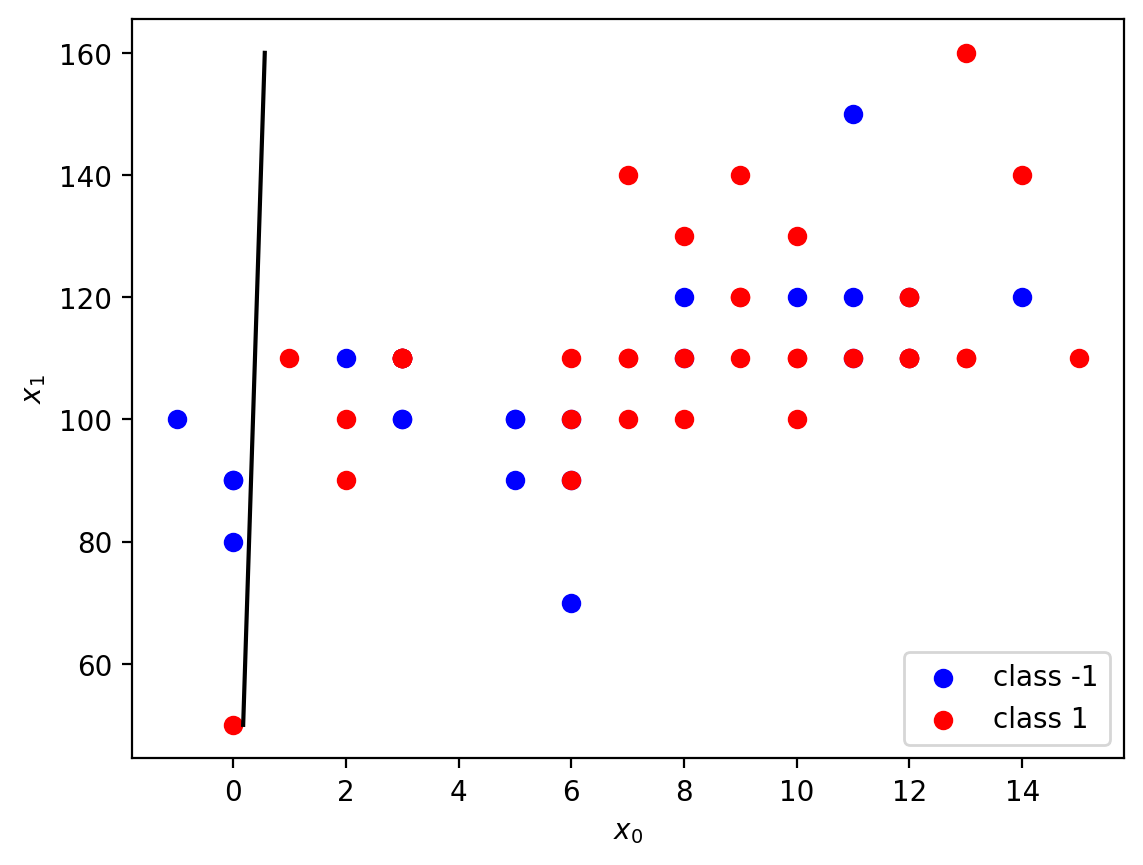

Test error: 0.3387096774193548


In [14]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #3

In [15]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:15][:,[6,0]]
Y_train = Y_shuffled[:15]
X_test  = X_shuffled[15:78][:,[6,0]]
Y_test  = Y_shuffled[15:78]

Decision boundary: -1.423x0+0.824x1+2.848=0


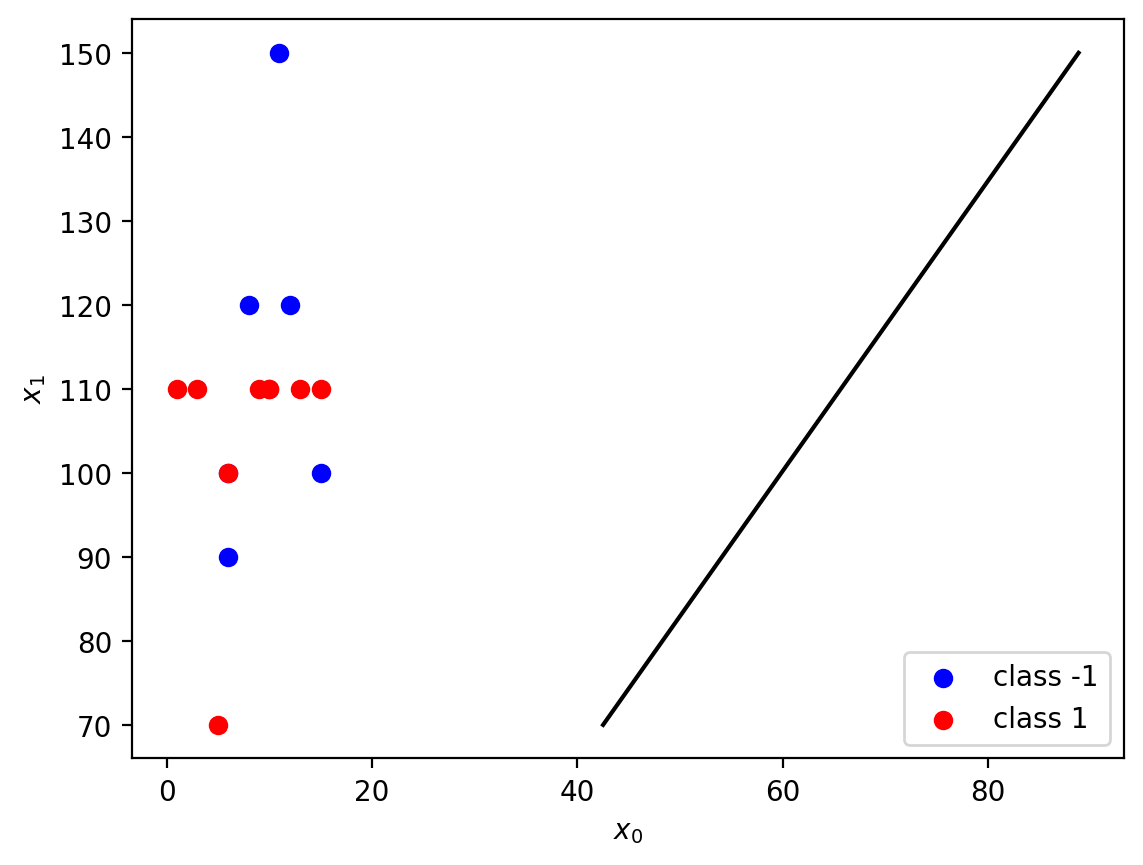

Training error: 0.4


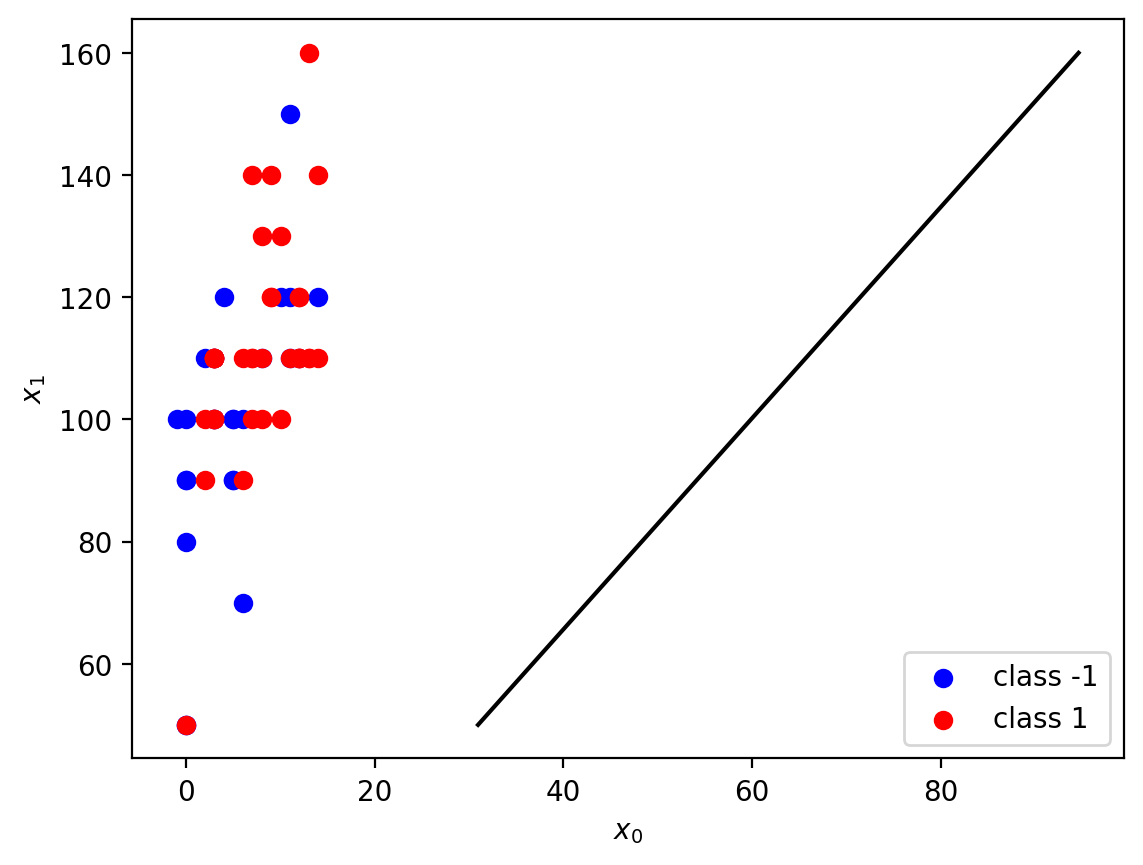

Test error: 0.41935483870967744


In [16]:
logreg(X_train,Y_train, X_test, Y_test)

In [17]:
totalr_training_data111 = r_training_data1/3
totalr_testing_data111 = r_testing_data1/3
r_training_data1 = 0
r_testing_data1 = 0
print("Training average :",totalr_training_data111)
print("Training average :",totalr_testing_data111)

Training average : 0.35555555555555557
Training average : 0.39247311827956993


### Support Vector Machines

#### Result #1

In [18]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:15][:,[6,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:15] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[15:78][:,[6,0]]
Y_test = Y_shuffled[15:78]

Test #1
C = 0.1
Decision boundary: 0.216x0+-0.016x1+-0.079=0


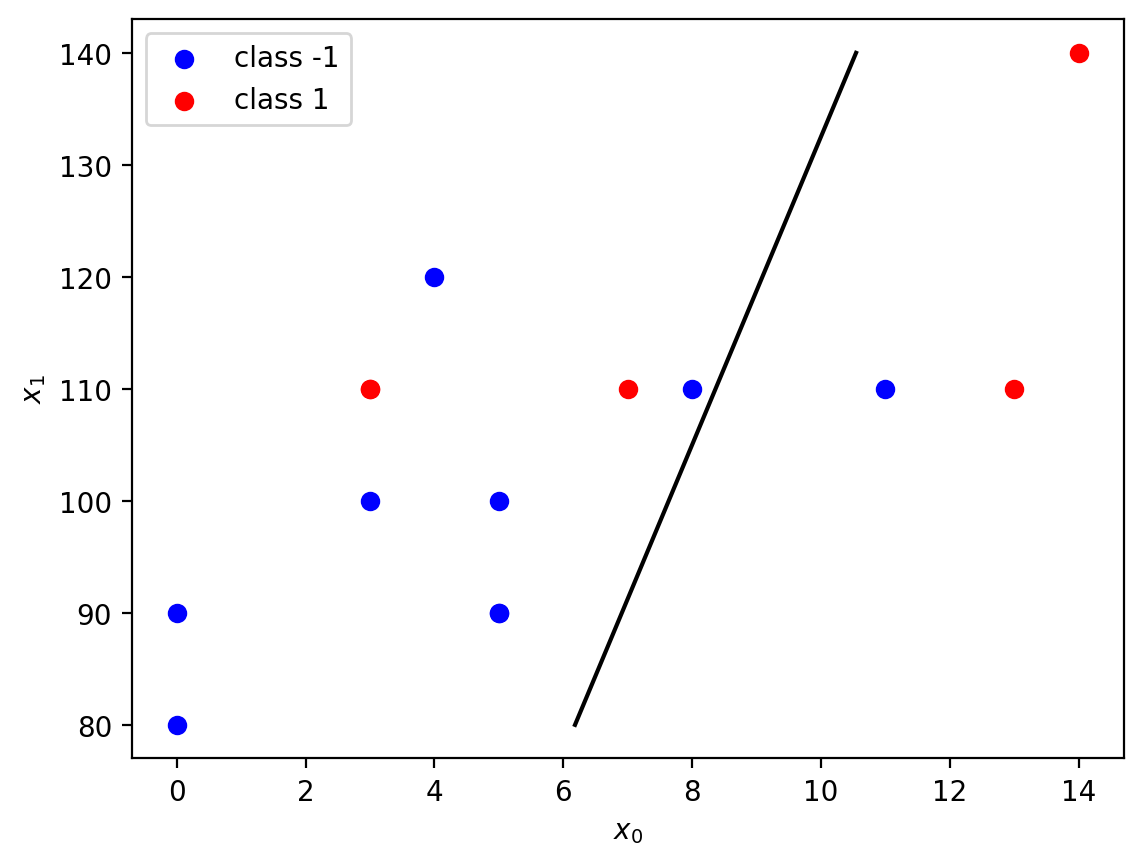

Training error: 0.2857142857142857




Test #1
C = 1
Decision boundary: 0.104x0+-0.012x1+-0.447=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


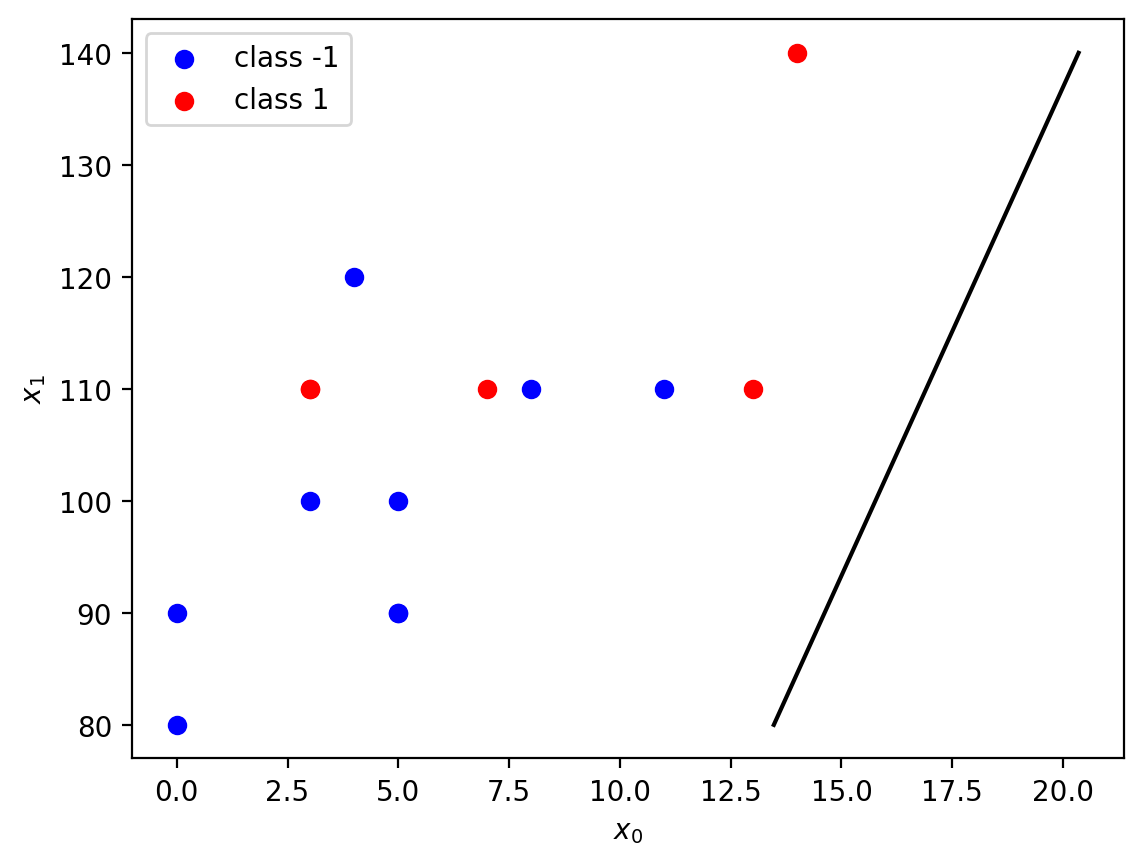

Training error: 0.3571428571428571




Test #1
C = 10
Decision boundary: 0.071x0+-0.006x1+-0.711=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


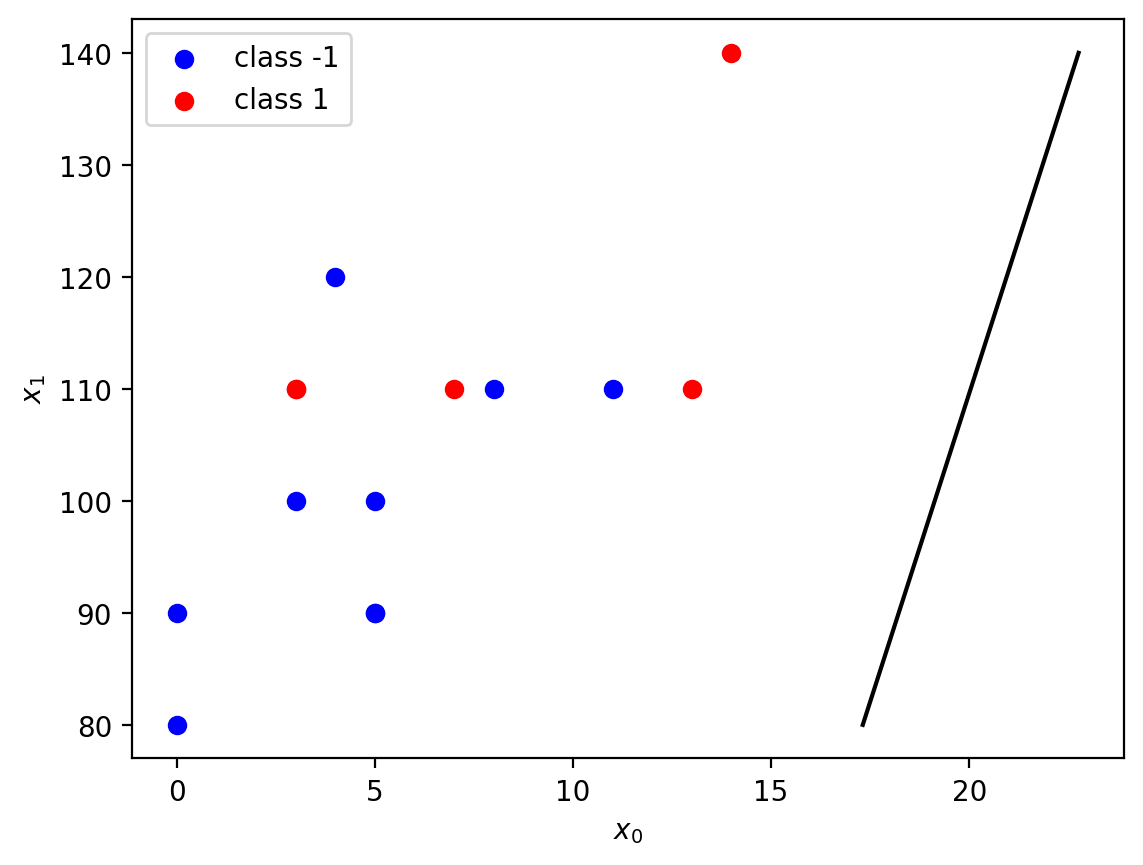

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.3571428571428571




Test #1
C = 100
Decision boundary: 0.077x0+0.013x1+-0.708=0


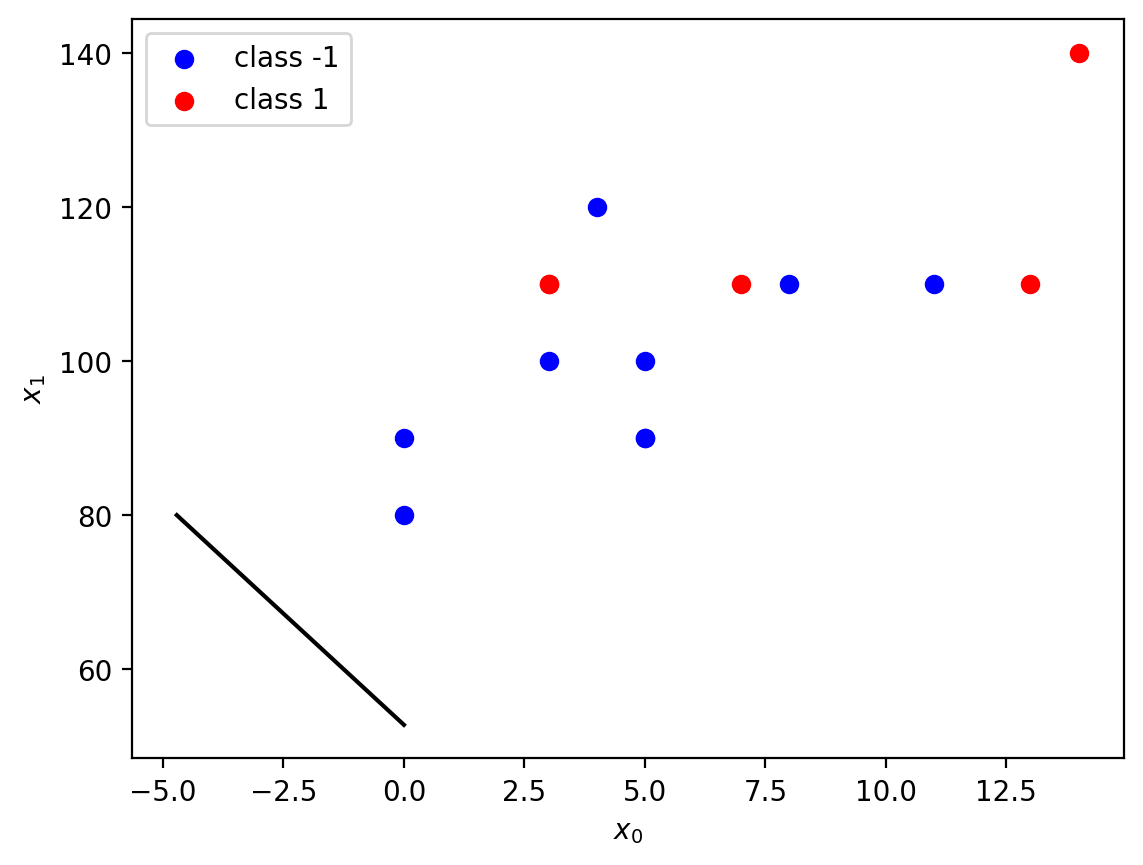

Training error: 0.6428571428571428






c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test #1
C = 1000
Decision boundary: 0.095x0+-0.008x1+-0.722=0


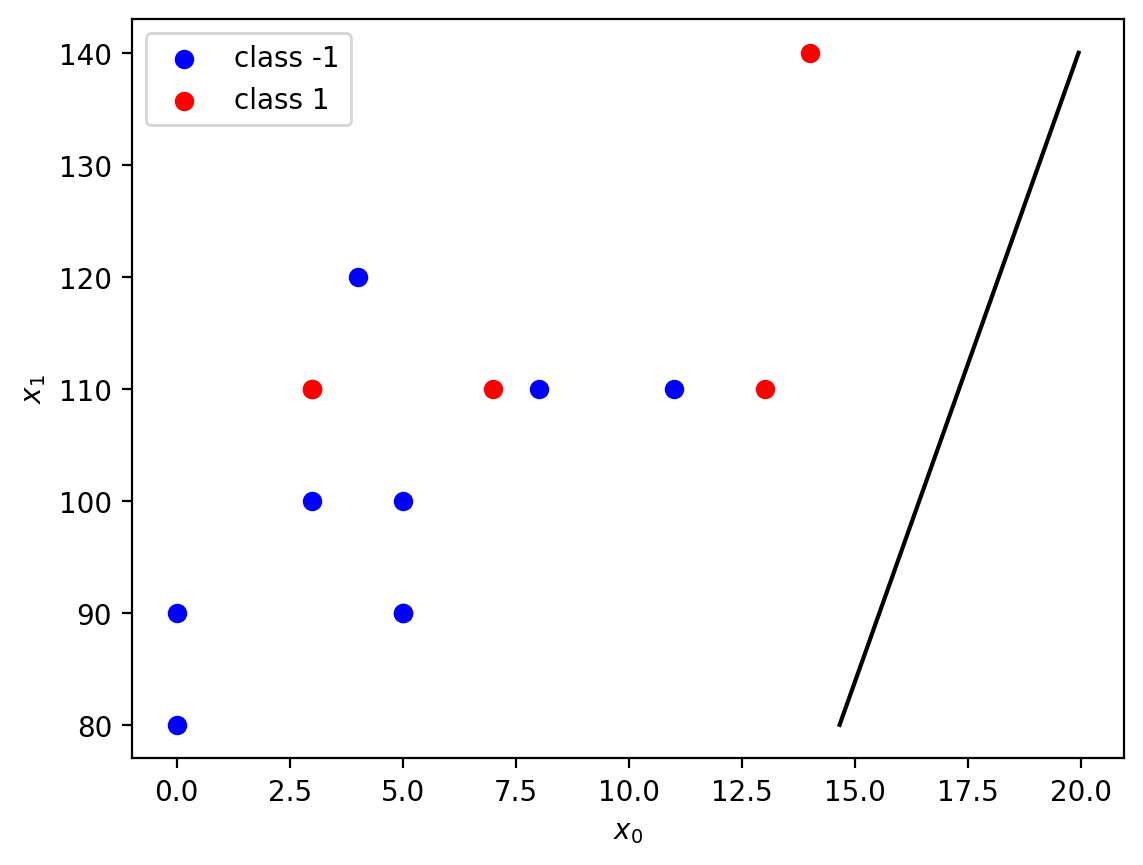

Training error: 0.3571428571428571




Best parameter C* = 0.1
Decision boundary: 0.216x0+-0.016x1+-0.079=0


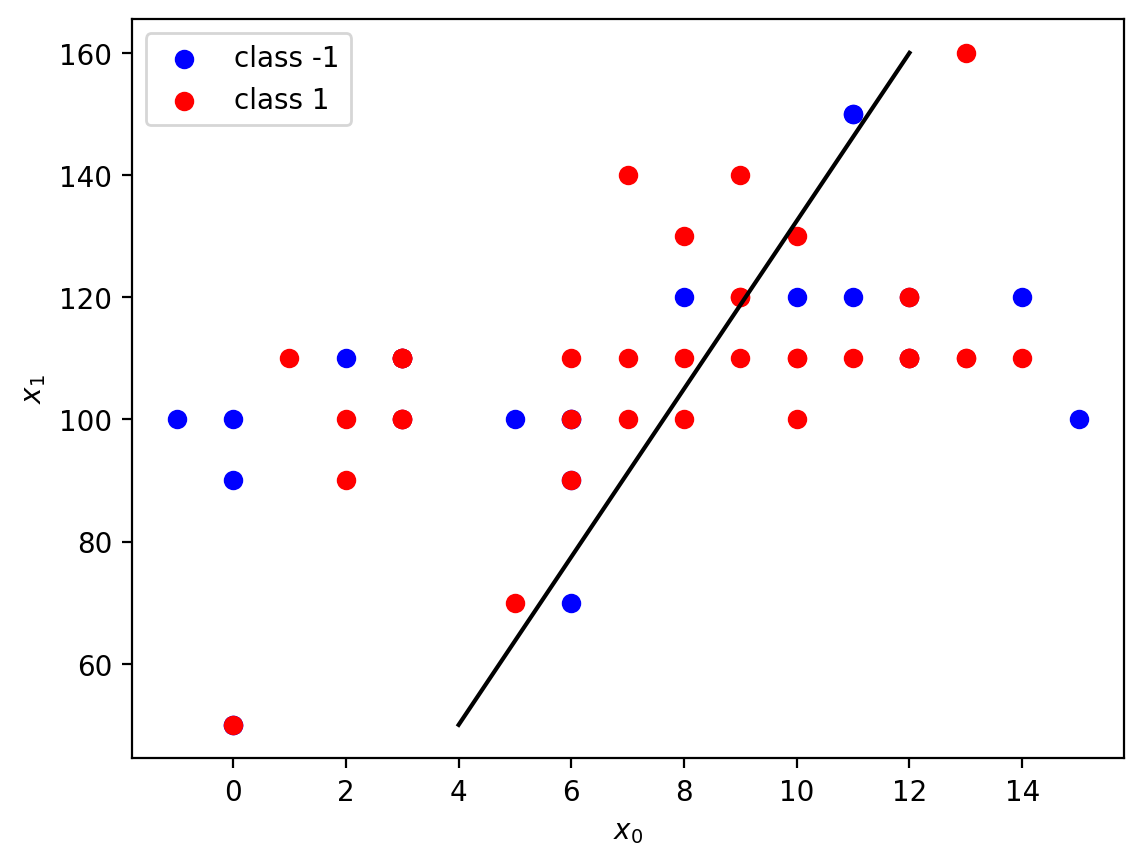

Test error: 0.4838709677419355


In [19]:
svmf(X_train, Y_train, X_test, Y_test)

#### Result #2

In [20]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:15][:,[6,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:15] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[15:78][:,[6,0]]
Y_test = Y_shuffled[15:78]

Test #1
C = 0.1
Decision boundary: -0.307x0+0.018x1+0.083=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


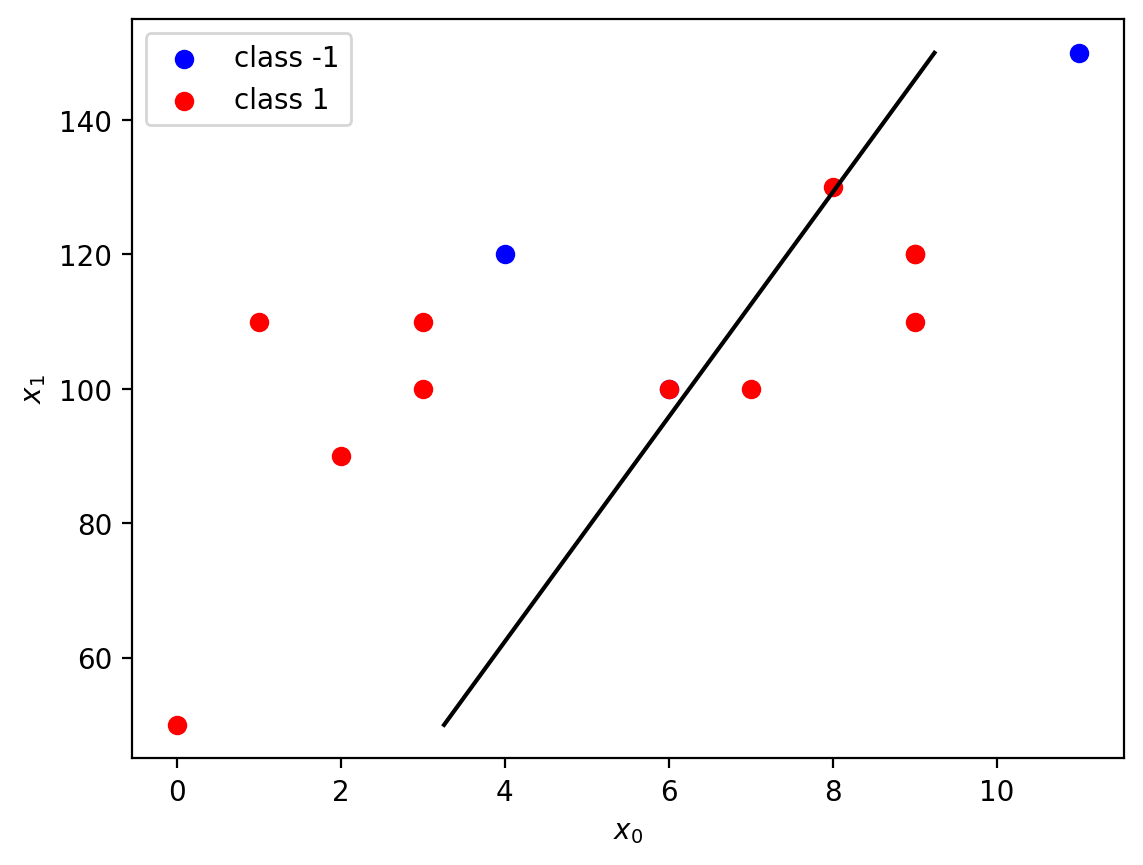

Training error: 0.4285714285714286




Test #1
C = 1
Decision boundary: -0.049x0+0.002x1+0.875=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


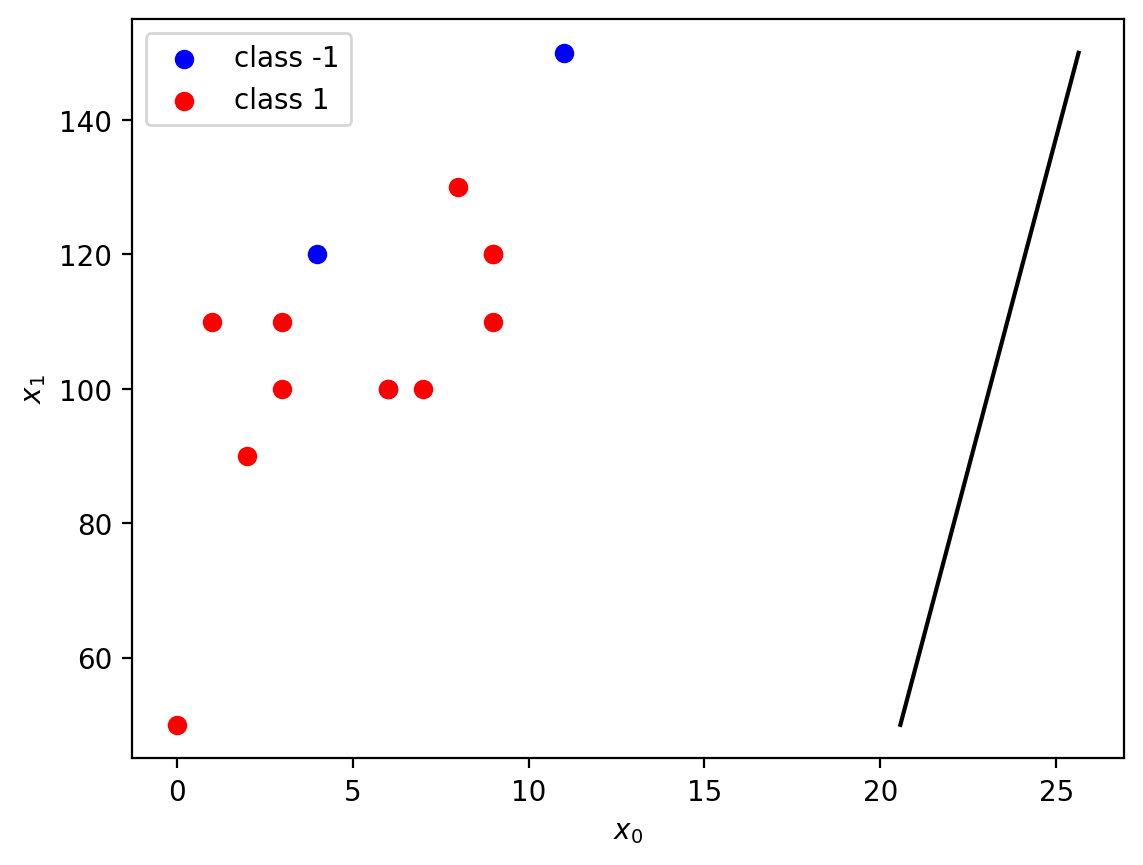

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.2142857142857143




Test #1
C = 10
Decision boundary: -0.011x0+0.000x1+1.038=0


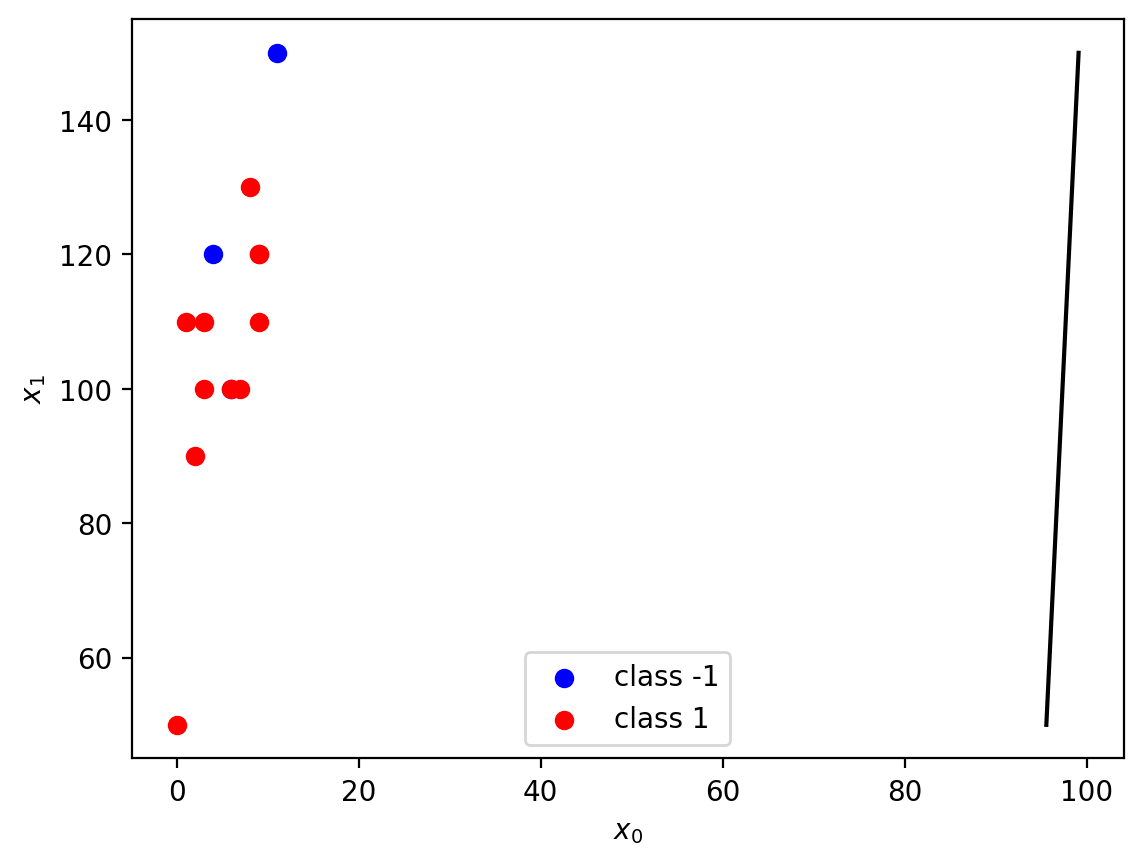

Training error: 0.2142857142857143






c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test #1
C = 100
Decision boundary: -0.031x0+-0.011x1+0.955=0


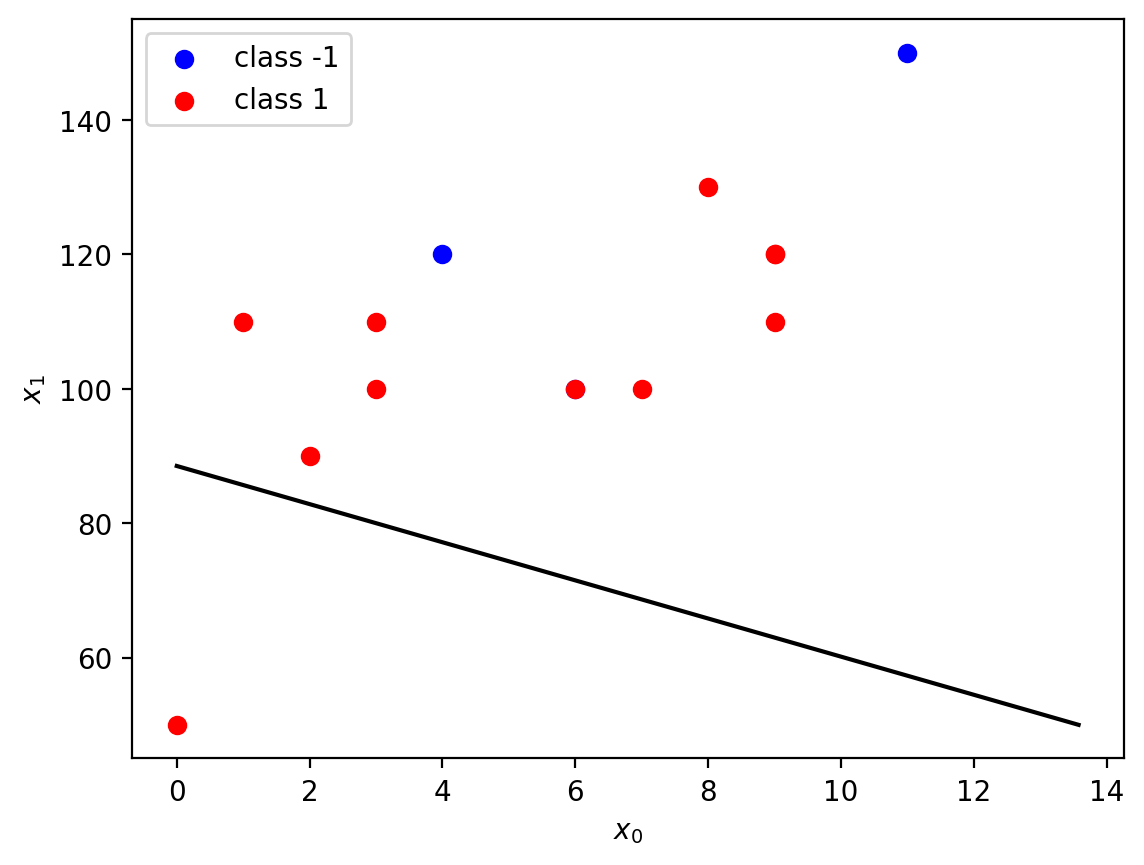

Training error: 0.7142857142857143




Test #1
C = 1000
Decision boundary: -0.026x0+0.002x1+0.916=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


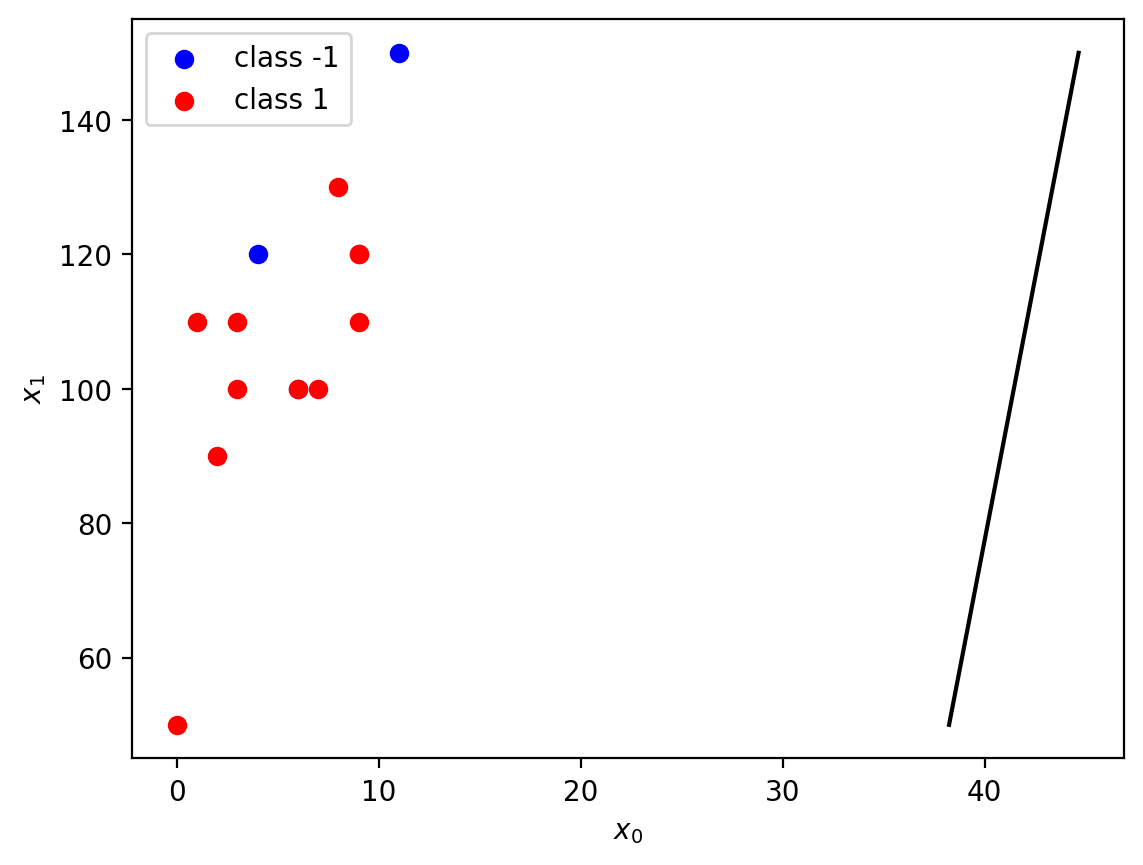

Training error: 0.2142857142857143




Best parameter C* = 1
Decision boundary: -0.049x0+0.002x1+0.875=0


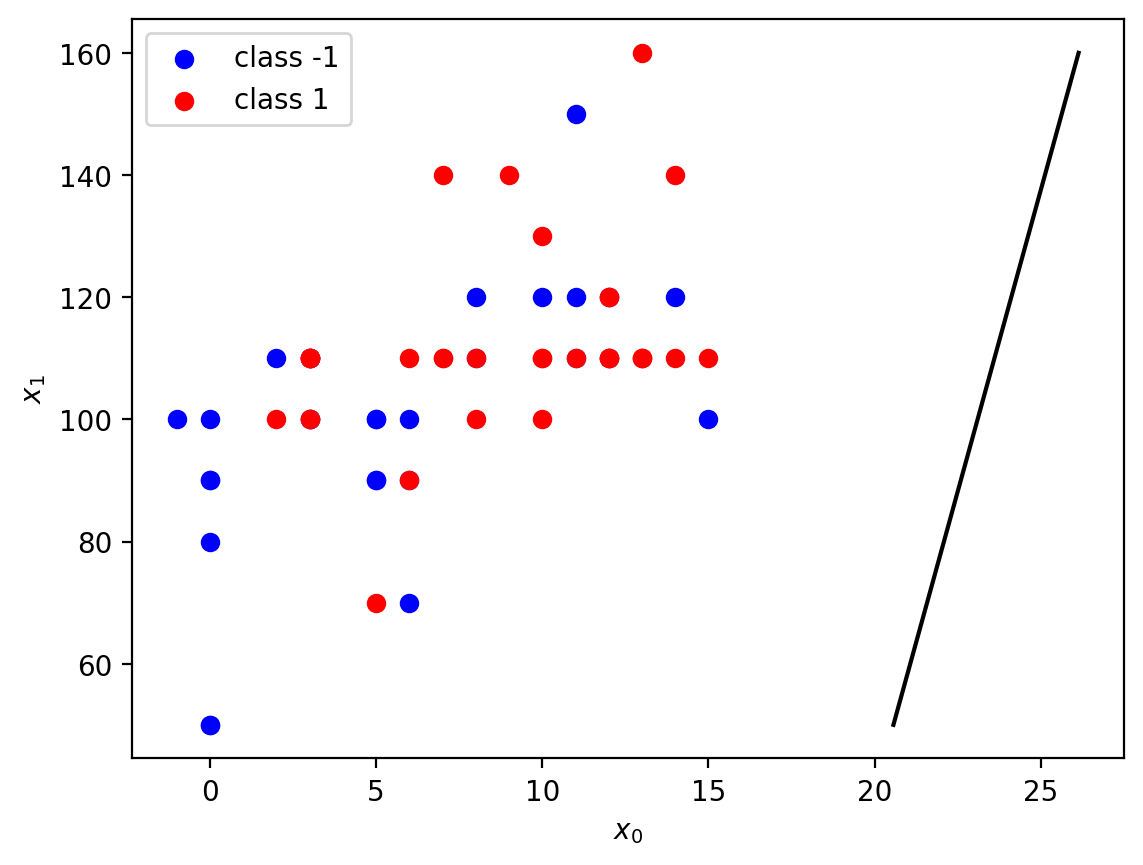

Test error: 0.467741935483871


In [21]:
svmf(X_train, Y_train, X_test, Y_test)

#### Result #3

In [22]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:15][:,[6,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:15] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[15:78][:,[6,0]]
Y_test = Y_shuffled[15:78]

Test #1
C = 0.1
Decision boundary: -0.241x0+0.017x1+-0.002=0


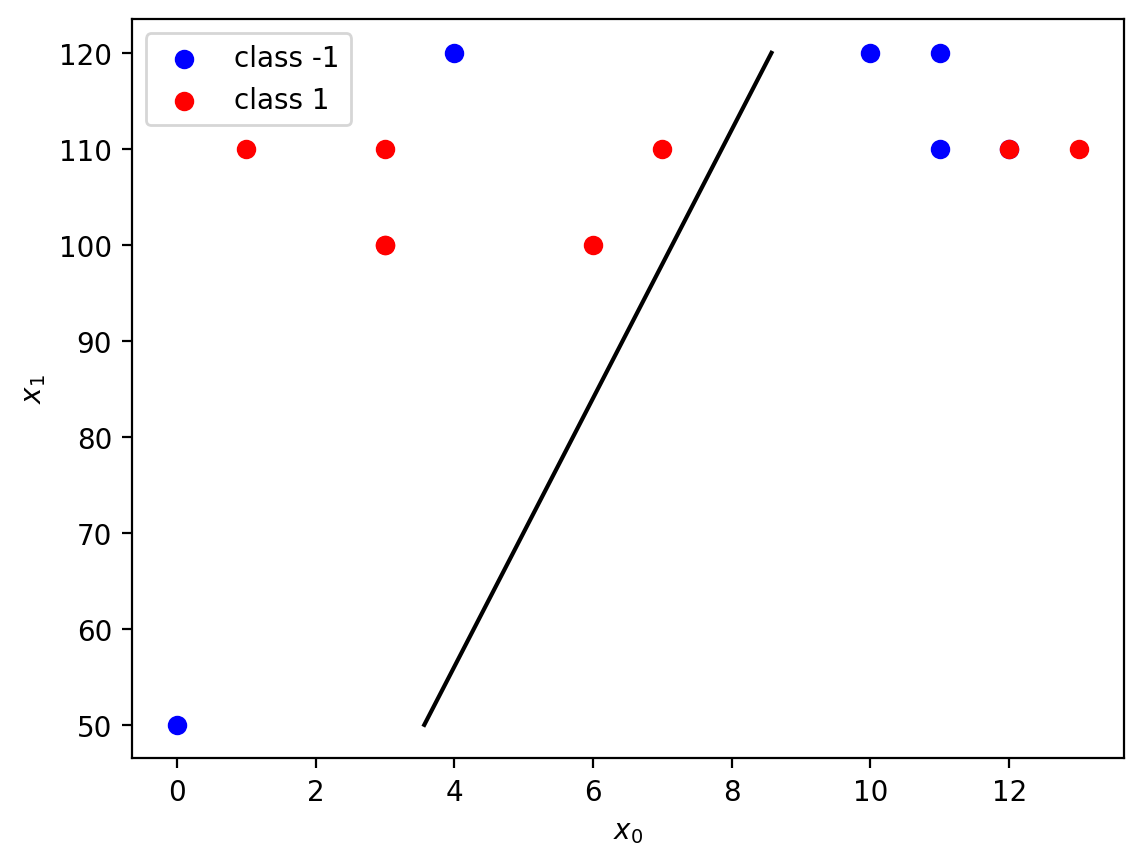

Training error: 0.2857142857142857




Test #1
C = 1
Decision boundary: -0.238x0+0.026x1+-0.174=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


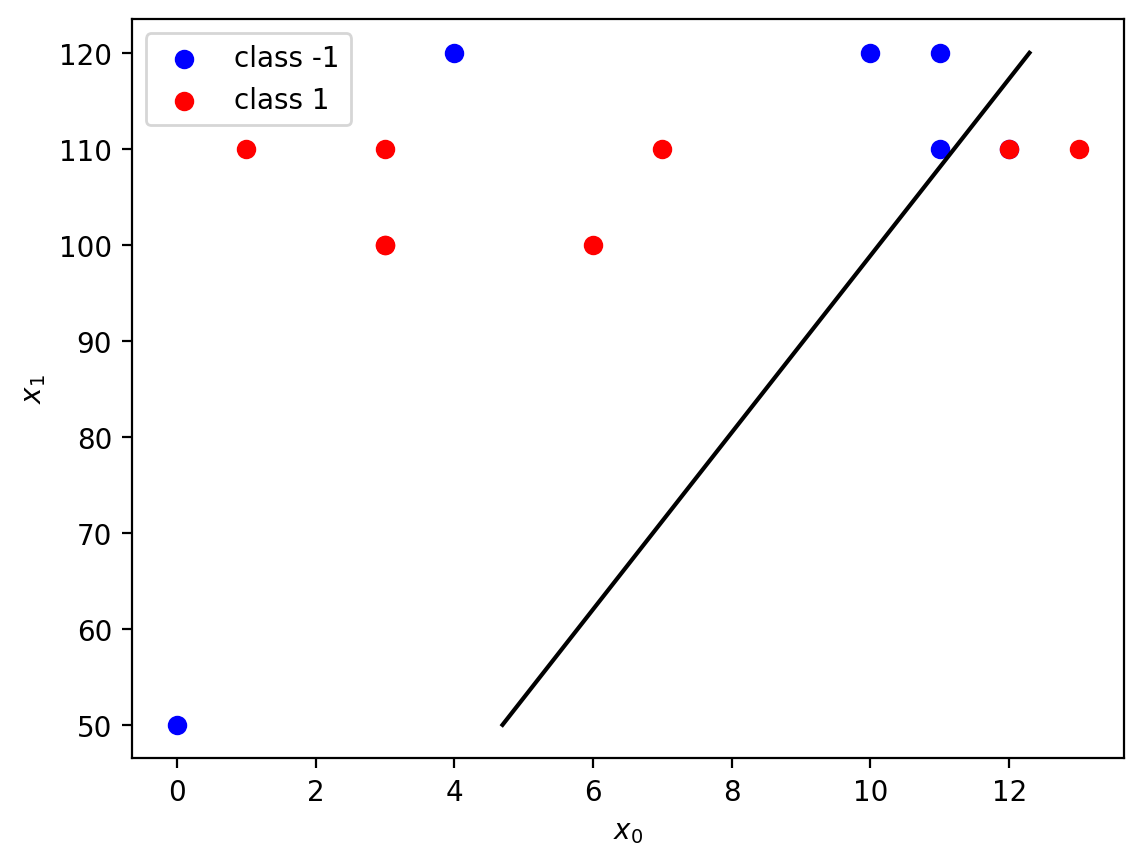

Training error: 0.5




Test #1
C = 10
Decision boundary: -0.046x0+0.006x1+-1.322=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


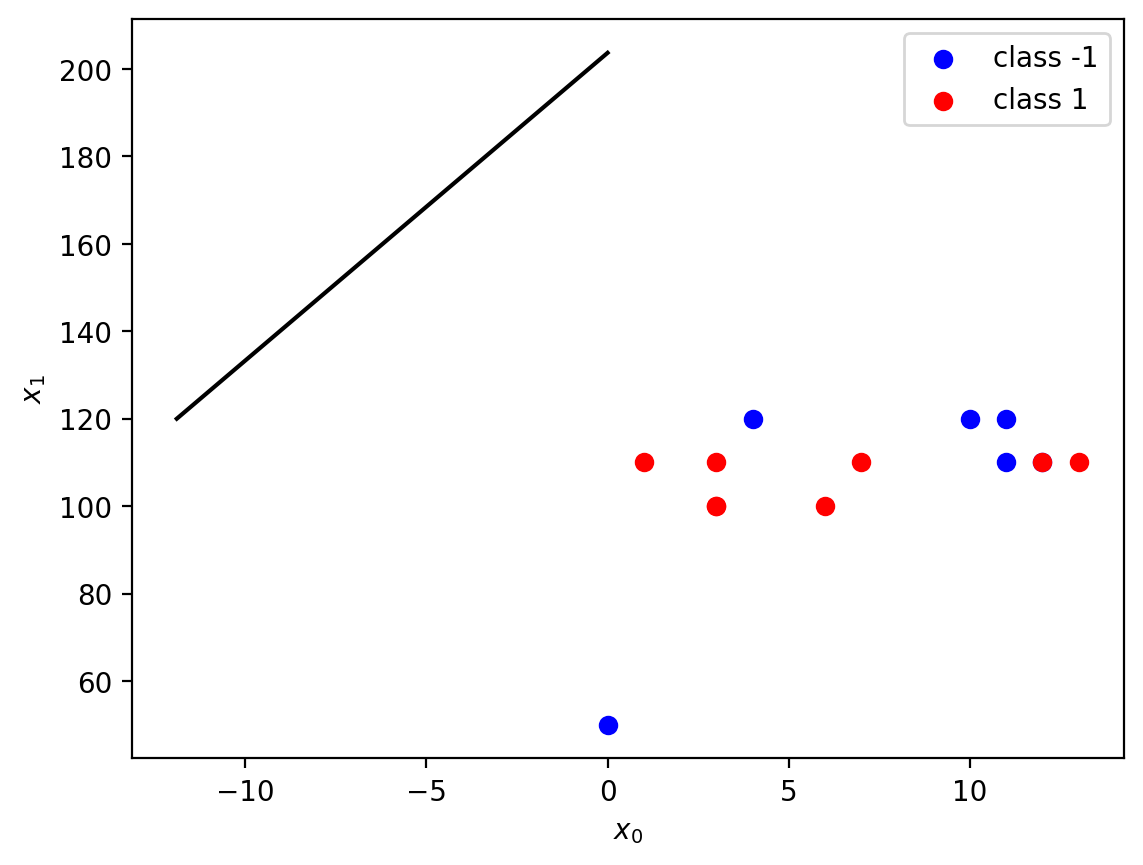

Training error: 0.5714285714285714




Test #1
C = 100
Decision boundary: -0.061x0+0.025x1+-1.332=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


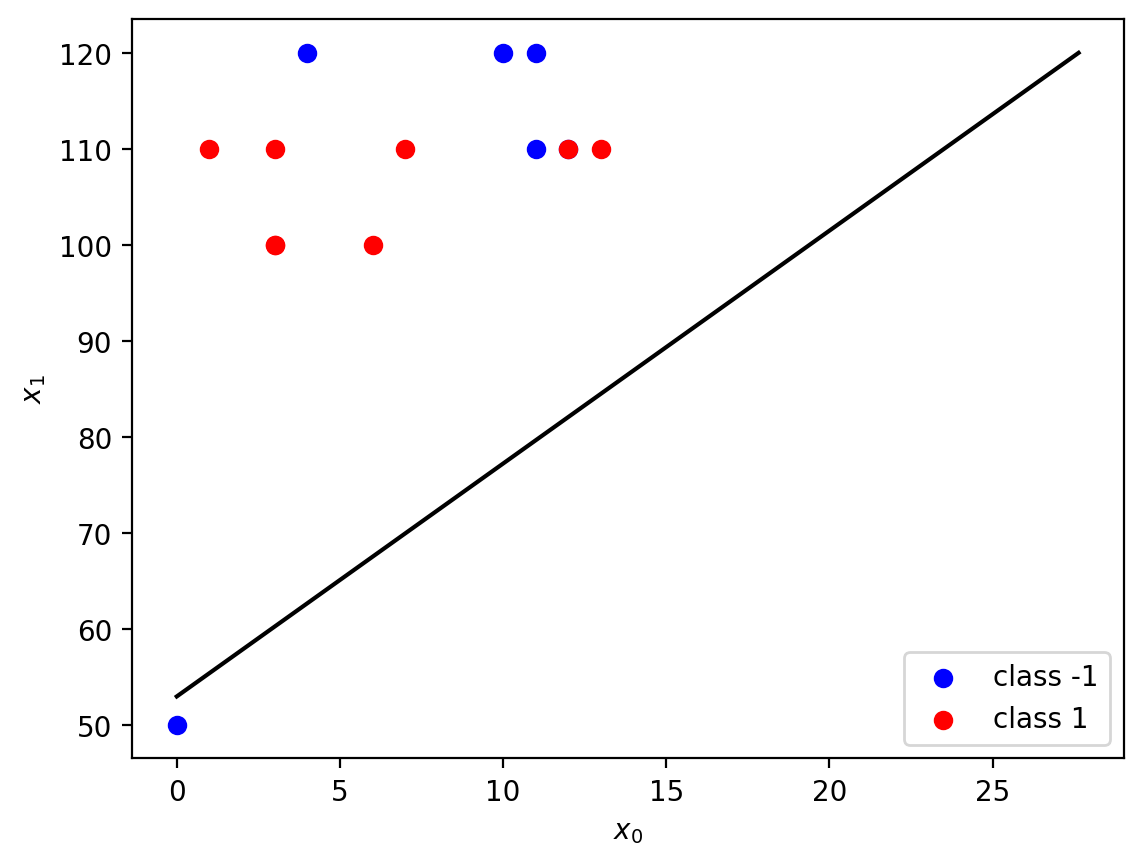

Training error: 0.3571428571428571




Test #1
C = 1000
Decision boundary: -0.066x0+0.010x1+-1.321=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


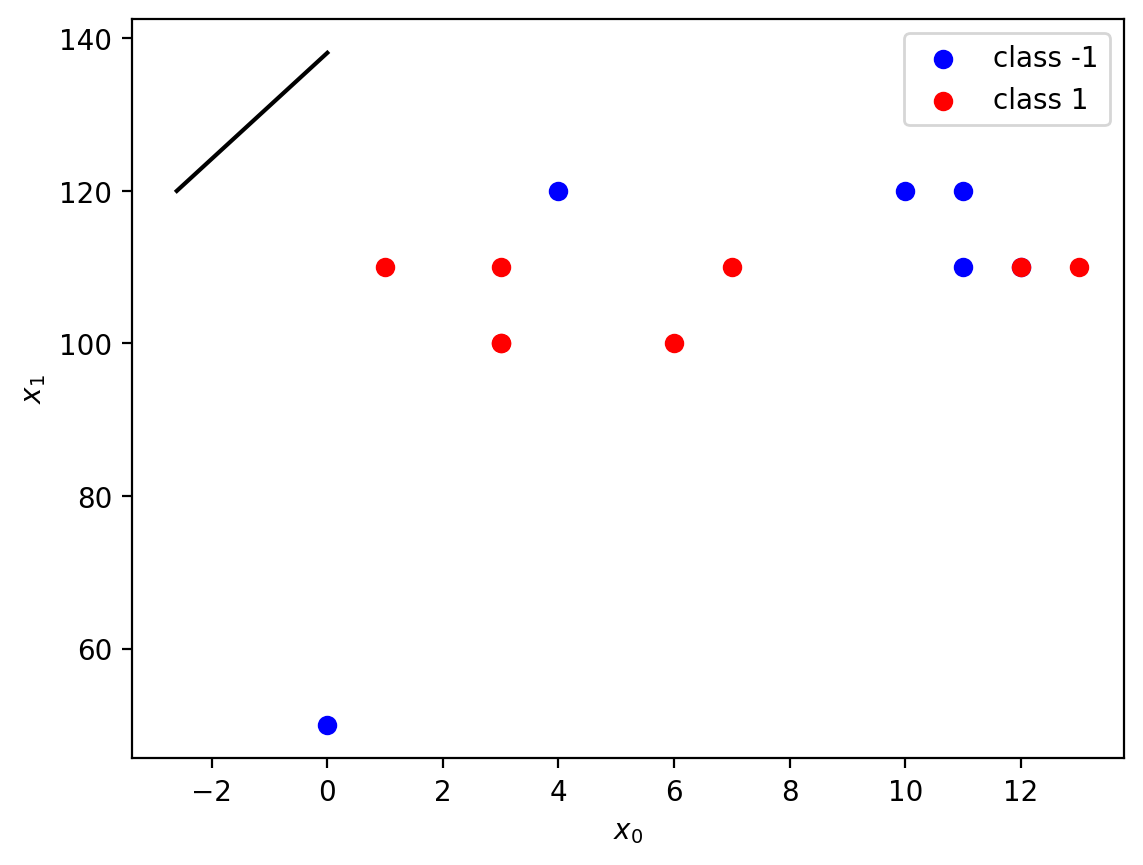

Training error: 0.5714285714285714




Best parameter C* = 0.1
Decision boundary: -0.241x0+0.017x1+-0.002=0


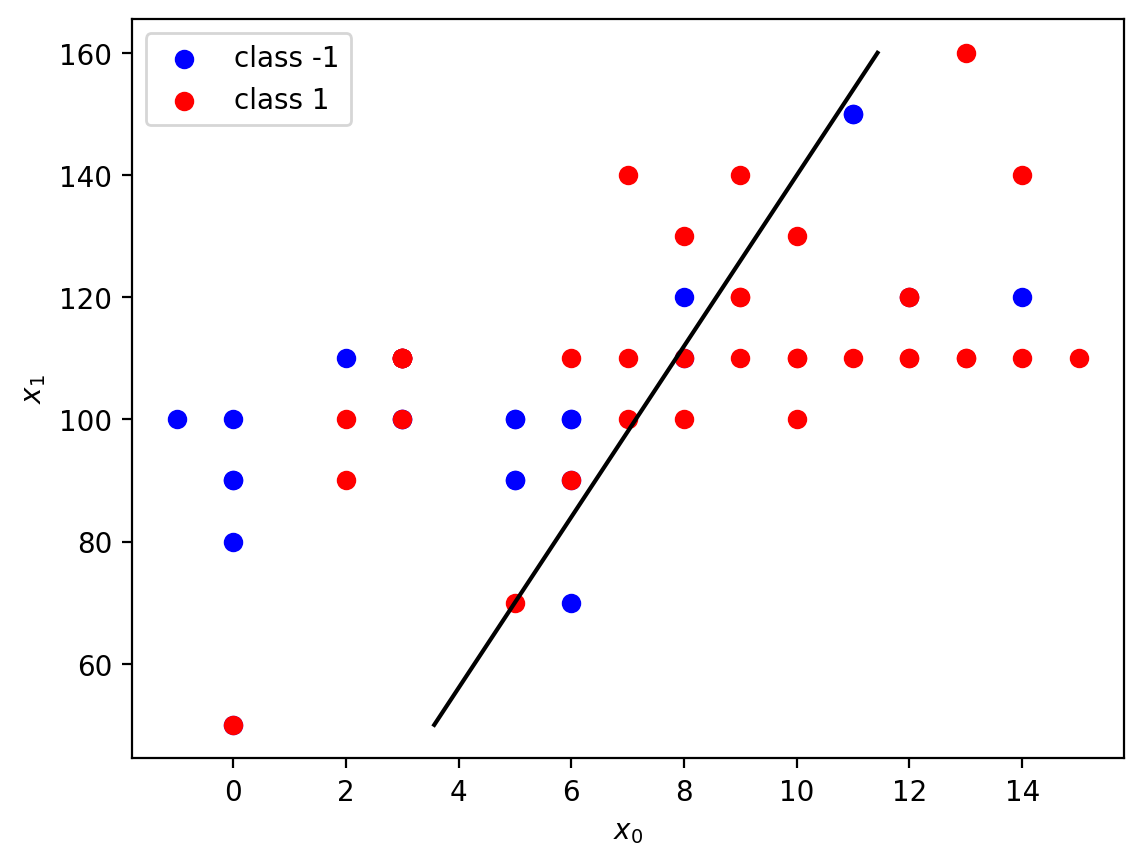

Test error: 0.6451612903225806


In [23]:
svmf(X_train, Y_train, X_test, Y_test)

In [24]:
totalr_training_data112 = r_training_data2/3
totalr_testing_data112 = r_testing_data2/3
r_training_data2 = 0
r_testing_data2 = 0
print("Training average :",totalr_training_data112)
print("Training average :",totalr_testing_data112)

Training average : 0.2619047619047619
Training average : 0.532258064516129


### Decision Tree

#### Result #1

In [25]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]


X_train = X_shuffled[:15][:,[6,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:15] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[15:78][:,[6,0]]
Y_test = Y_shuffled[15:78]

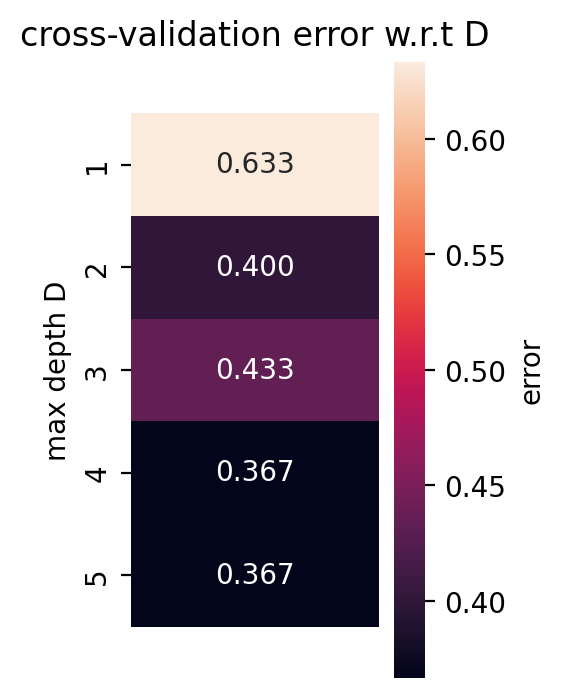

Best max depth D: {'max_depth': 4}
Training error: 0.1428571428571429
Test error: 0.467741935483871


In [26]:
trees(X_train,Y_train,X_test,Y_test)

#### Result #2

In [27]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]


X_train = X_shuffled[:15][:,[6,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:15] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[15:78][:,[6,0]]
Y_test = Y_shuffled[15:78]

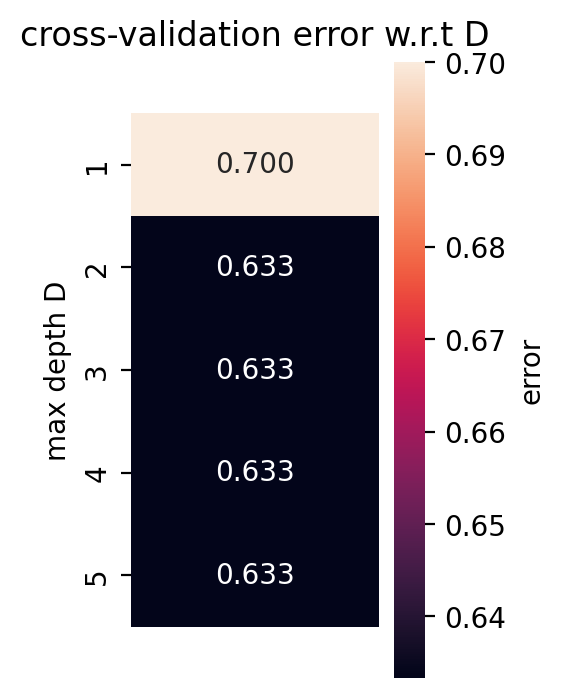

Best max depth D: {'max_depth': 2}
Training error: 0.2857142857142857
Test error: 0.3709677419354839


In [28]:
trees(X_train,Y_train,X_test,Y_test)

#### Result #3

In [29]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]


X_train = X_shuffled[:15][:,[6,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:15] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[15:78][:,[6,0]]
Y_test = Y_shuffled[15:78]

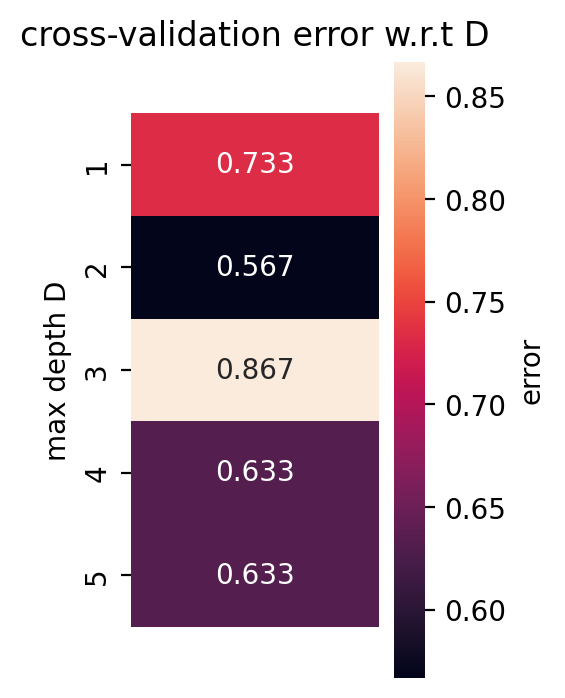

Best max depth D: {'max_depth': 2}
Training error: 0.1428571428571429
Test error: 0.4838709677419355


In [30]:
trees(X_train,Y_train,X_test,Y_test)

In [31]:
totalr_training_data113 = r_training_data3/3
totalr_testing_data113 = r_testing_data3/3
r_training_data3 = 0
r_testing_data3 = 0
print("Training average :",totalr_training_data113)
print("Training average :",totalr_testing_data113)

Training average : 0.1904761904761905
Training average : 0.4408602150537635


## Partition 2

### Logistic regression classifier

#### Result #1

In [32]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]]
Y_train = Y_shuffled[:62]
X_test  = X_shuffled[62:78][:,[6,0]]
Y_test  = Y_shuffled[62:78]

Decision boundary: 8.380x0+-0.364x1+-4.619=0


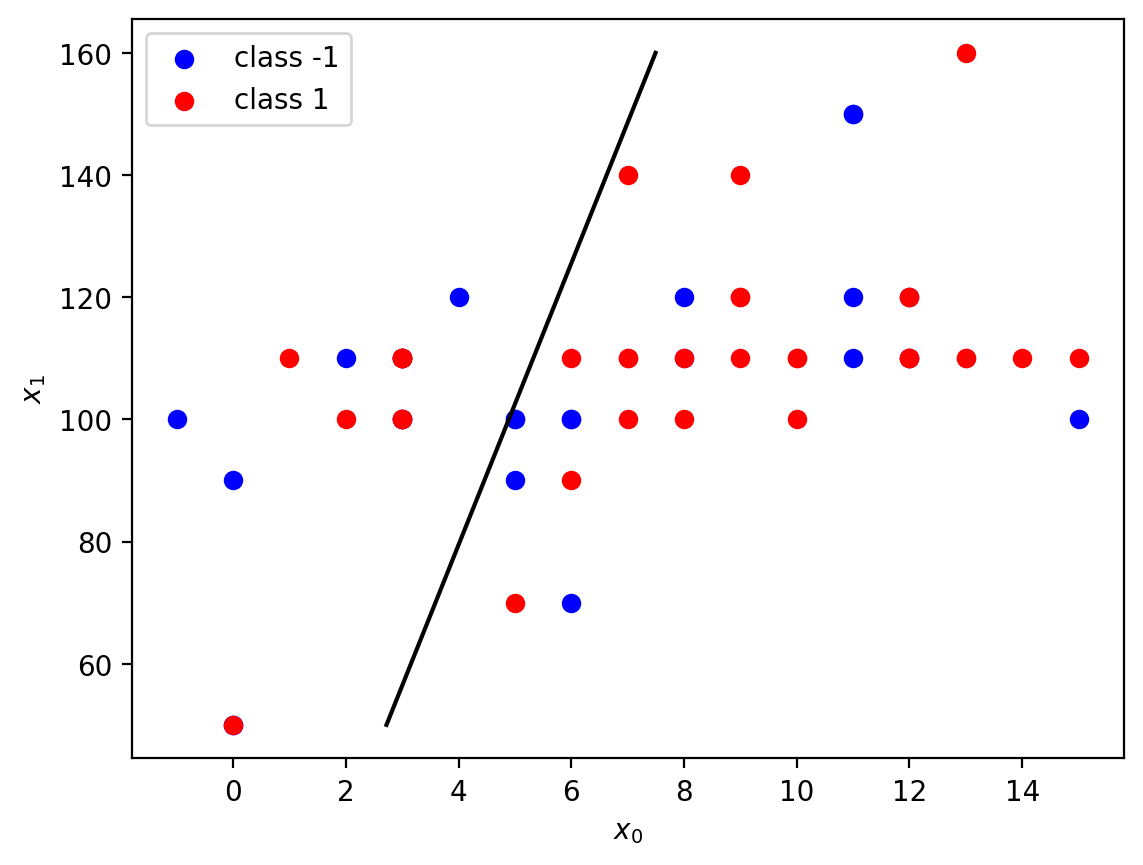

Training error: 0.41935483870967744


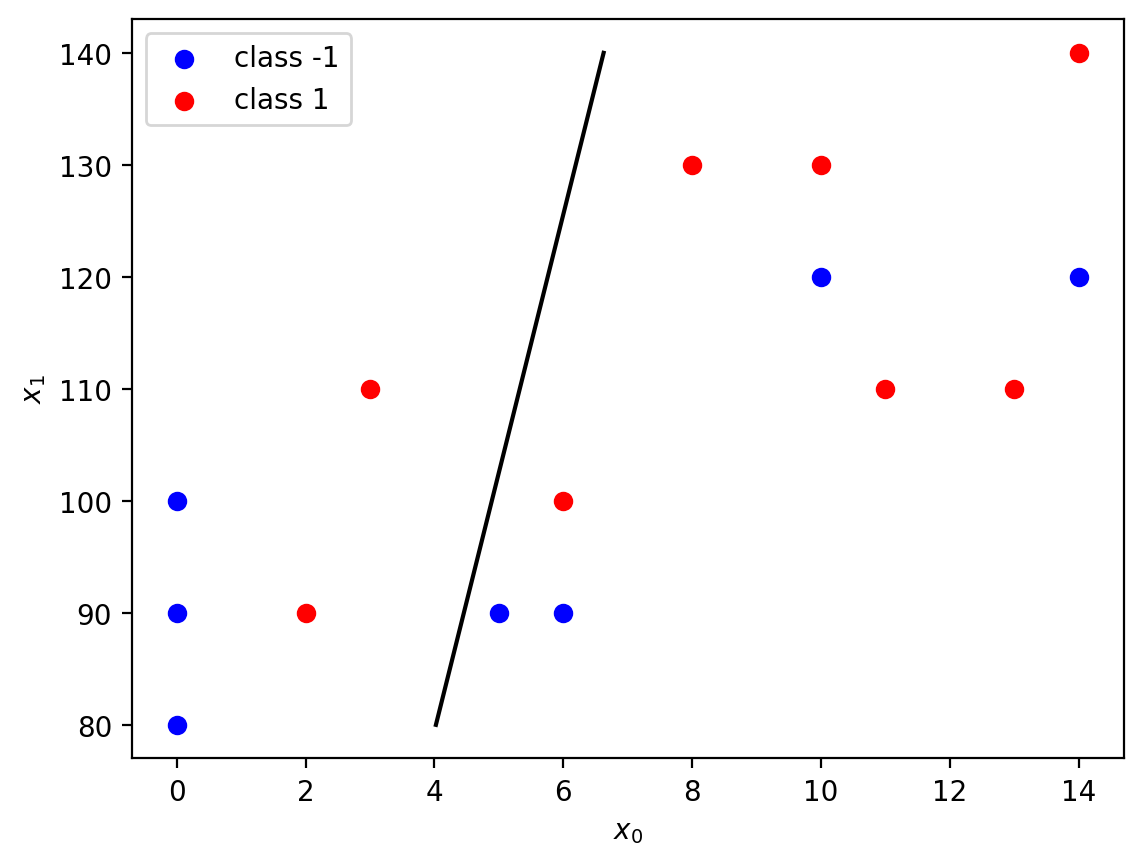

Test error: 0.4


In [33]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #2

In [34]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]]
Y_train = Y_shuffled[:62]
X_test  = X_shuffled[62:78][:,[6,0]]
Y_test  = Y_shuffled[62:78]

Decision boundary: 8.100x0+-0.587x1+-7.473=0


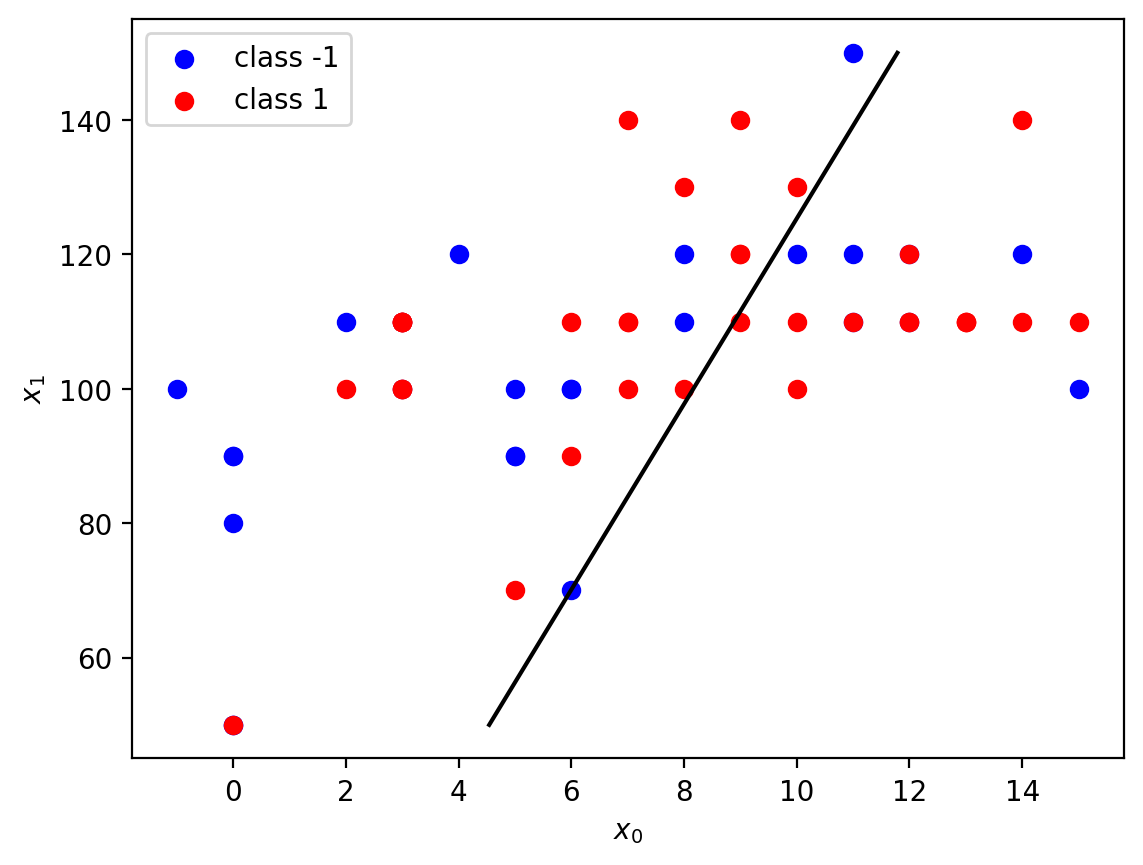

Training error: 0.5


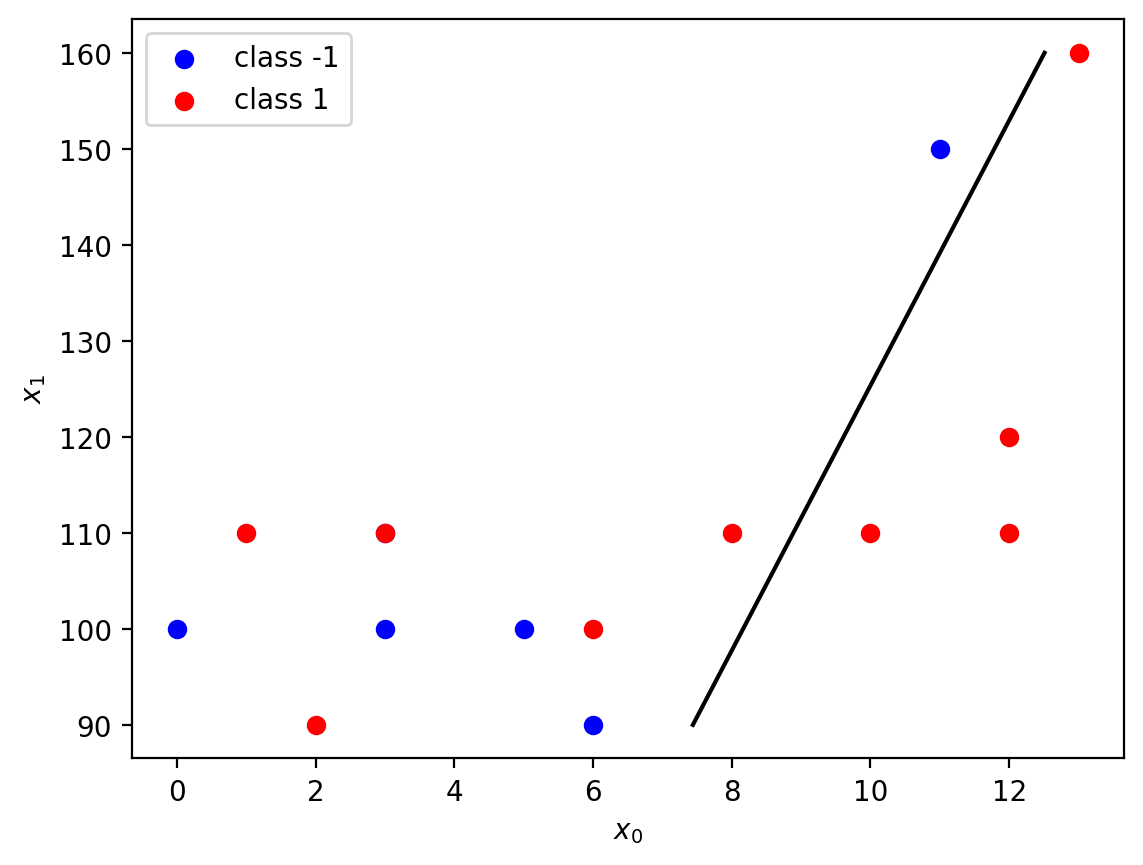

Test error: 0.3333333333333333


In [35]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #3

In [36]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]]
Y_train = Y_shuffled[:62]
X_test  = X_shuffled[62:78][:,[6,0]]
Y_test  = Y_shuffled[62:78]

Decision boundary: 8.264x0+1.650x1+-4.689=0


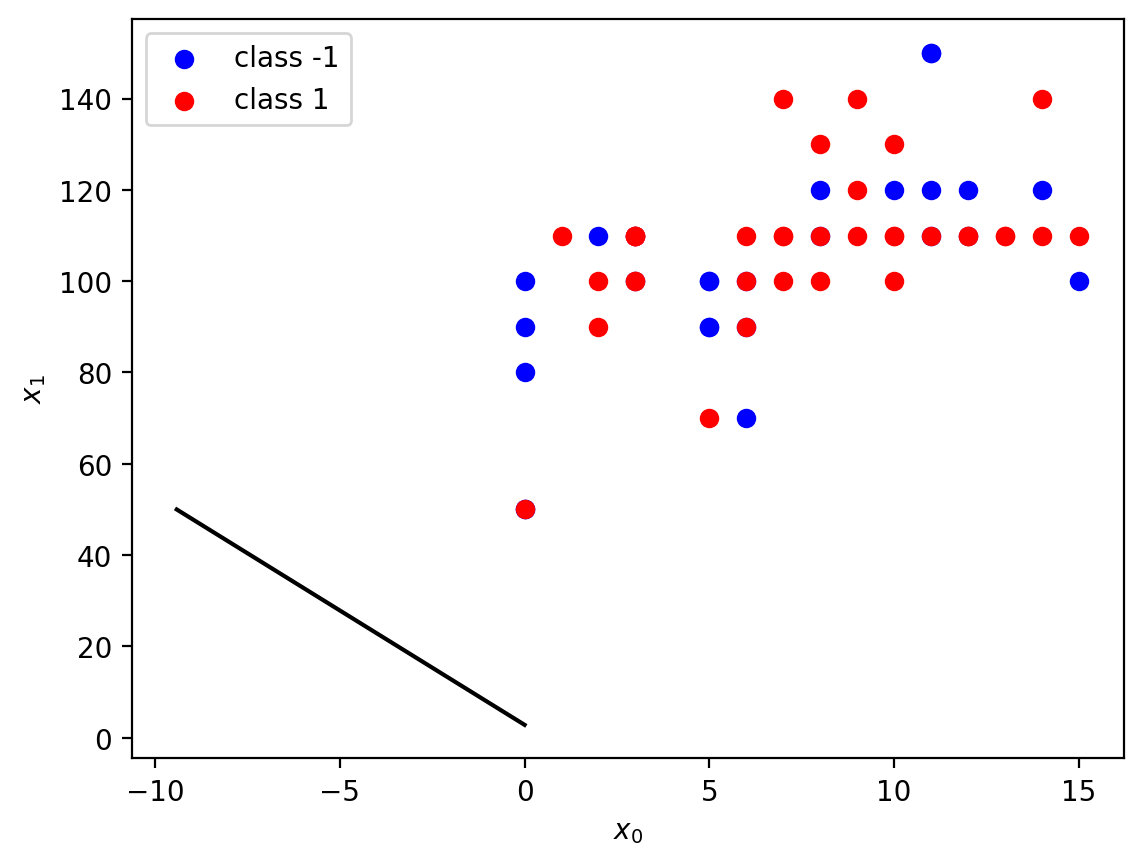

Training error: 0.41935483870967744


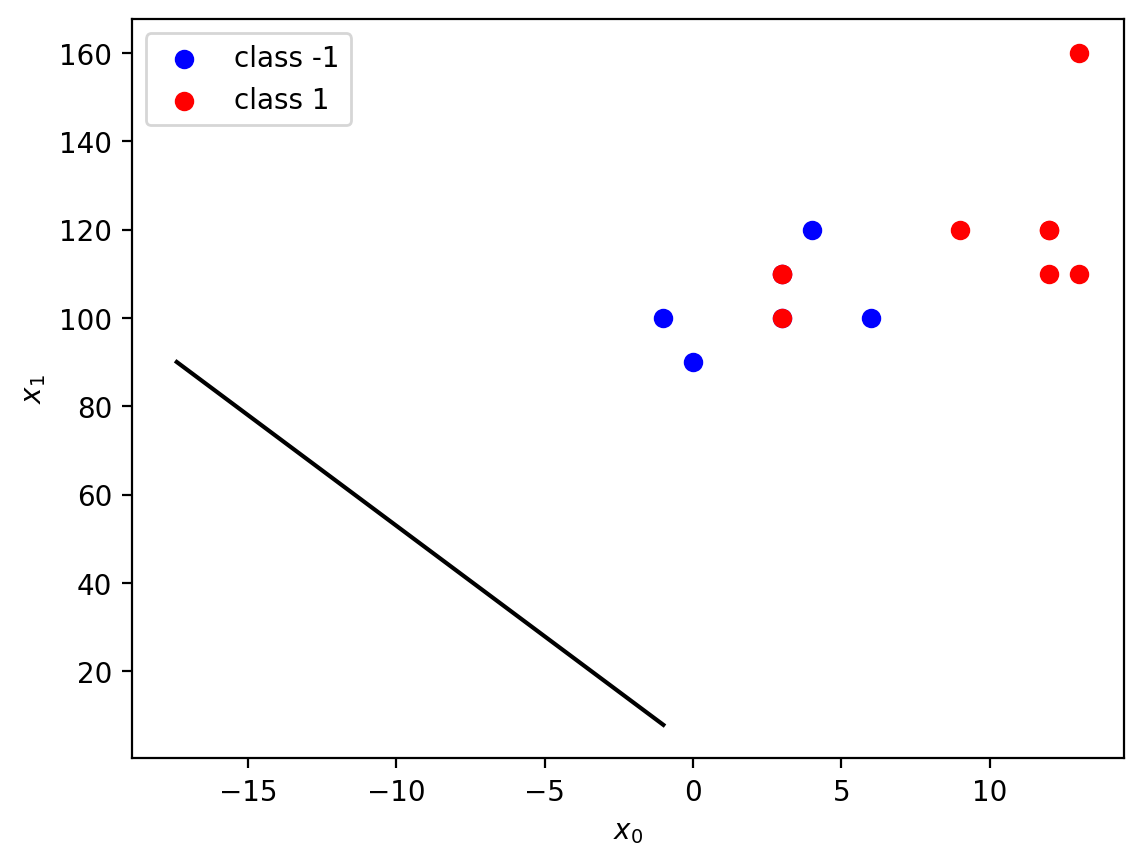

Test error: 0.4


In [37]:
logreg(X_train,Y_train, X_test, Y_test)

In [38]:
totalr_training_data121 = r_training_data1/3
totalr_testing_data121 = r_testing_data1/3
r_training_data1 = 0
r_testing_data1 = 0
print("Training average :",totalr_training_data121)
print("Training average :",totalr_testing_data121)

Training average : 0.446236559139785
Training average : 0.37777777777777777


### Support Vector Machines

#### Result #1

In [39]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:62] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[62:78][:,[6,0]]
Y_test = Y_shuffled[62:78]

Test #1
C = 0.1
Decision boundary: 0.000x0+0.010x1+-0.054=0


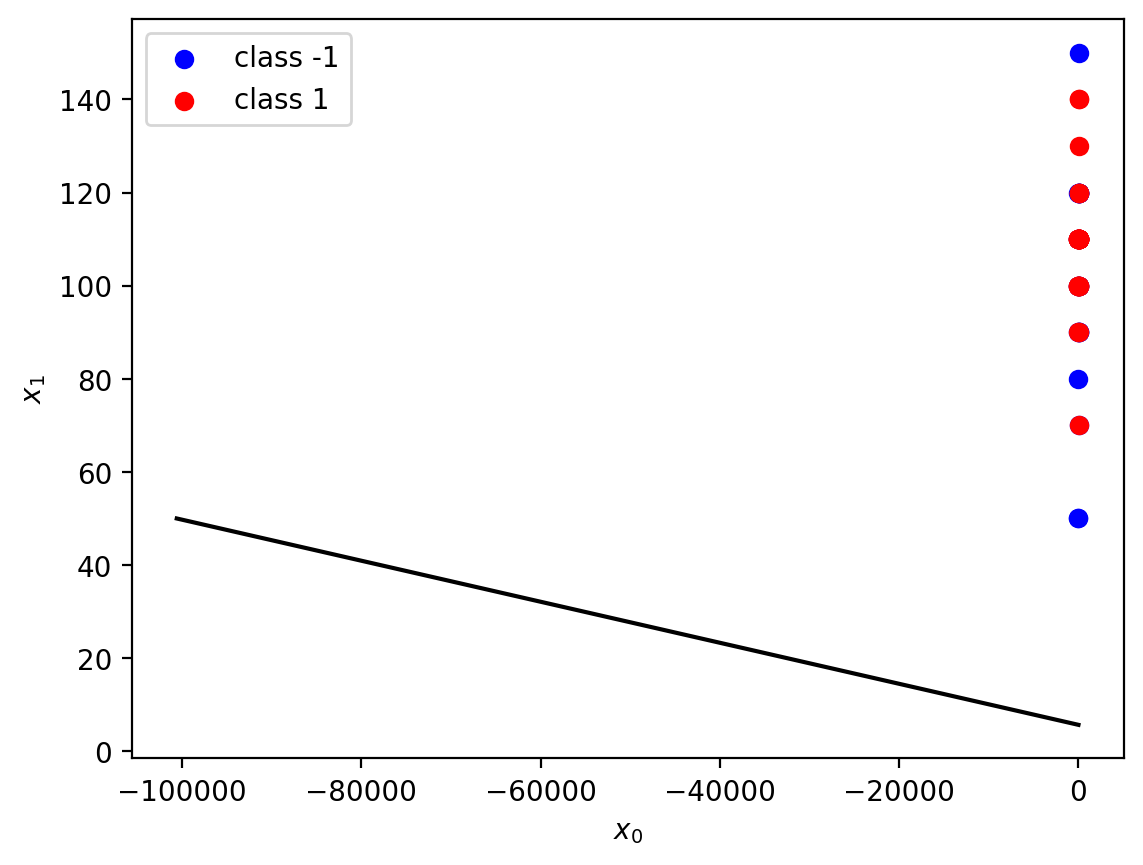

Training error: 0.4098360655737705




Test #1
C = 1
Decision boundary: 0.059x0+0.012x1+-1.172=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


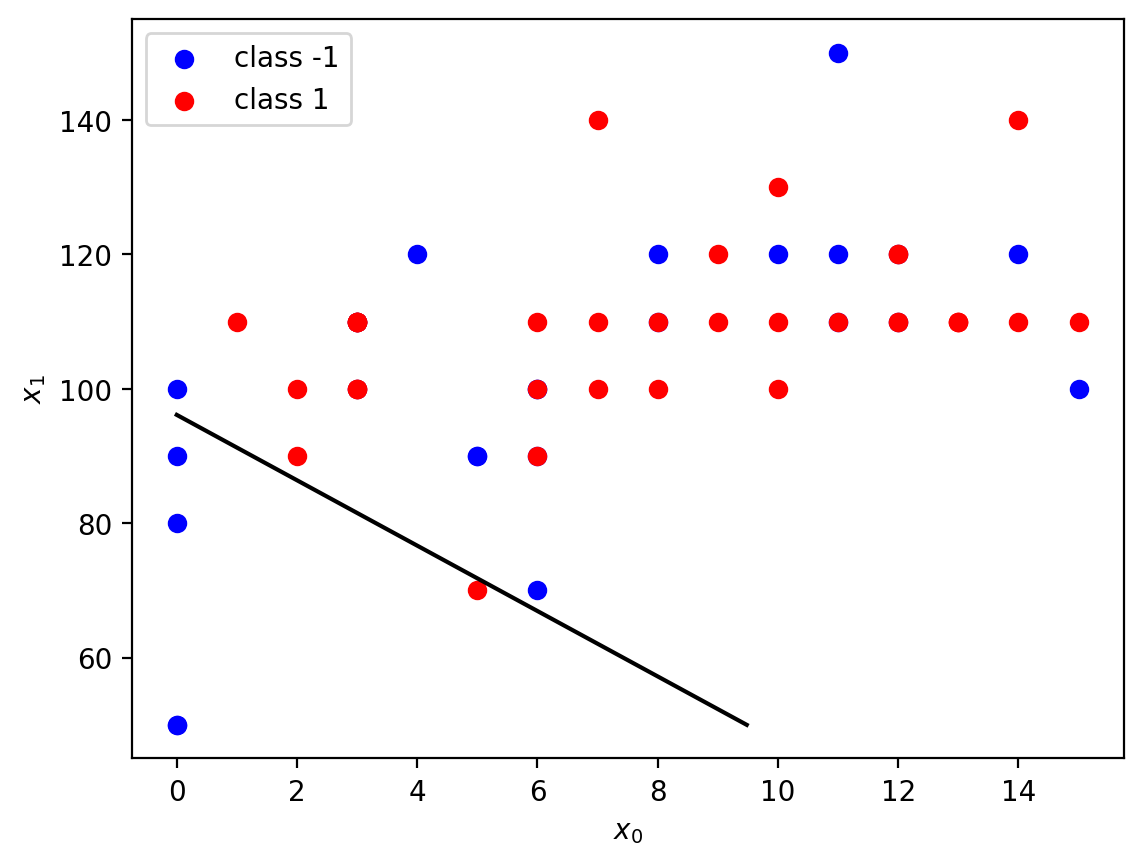

Training error: 0.360655737704918




Test #1
C = 10
Decision boundary: 0.008x0+0.004x1+-1.490=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


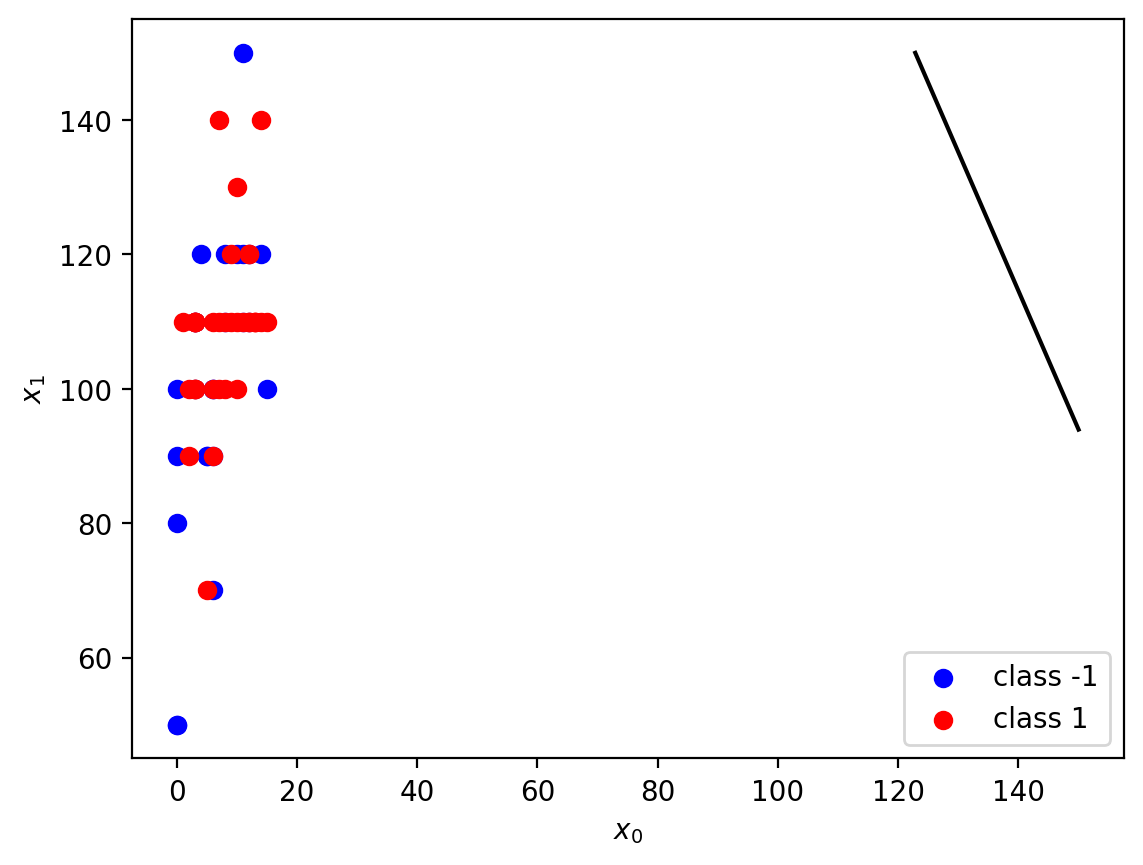

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.5901639344262295




Test #1
C = 100
Decision boundary: 0.018x0+0.020x1+-1.509=0


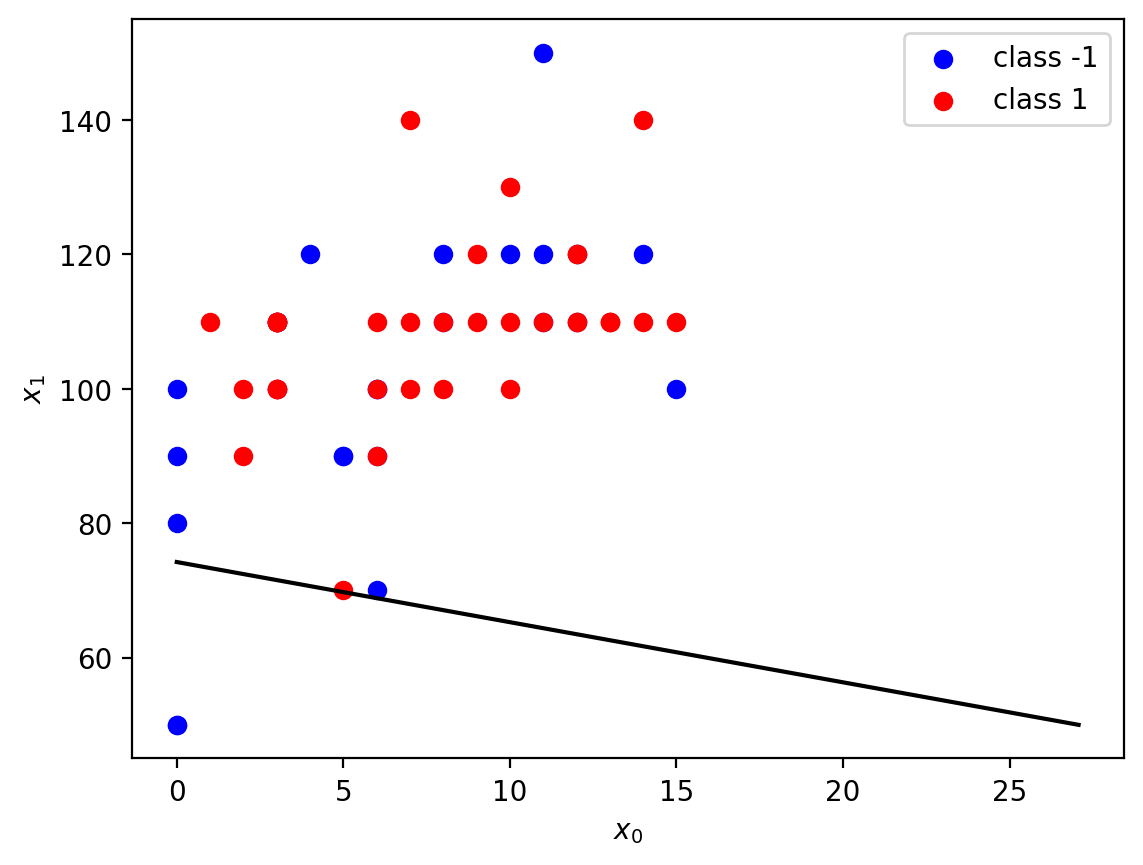

Training error: 0.3770491803278688




Test #1
C = 1000
Decision boundary: 0.021x0+0.020x1+-1.478=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


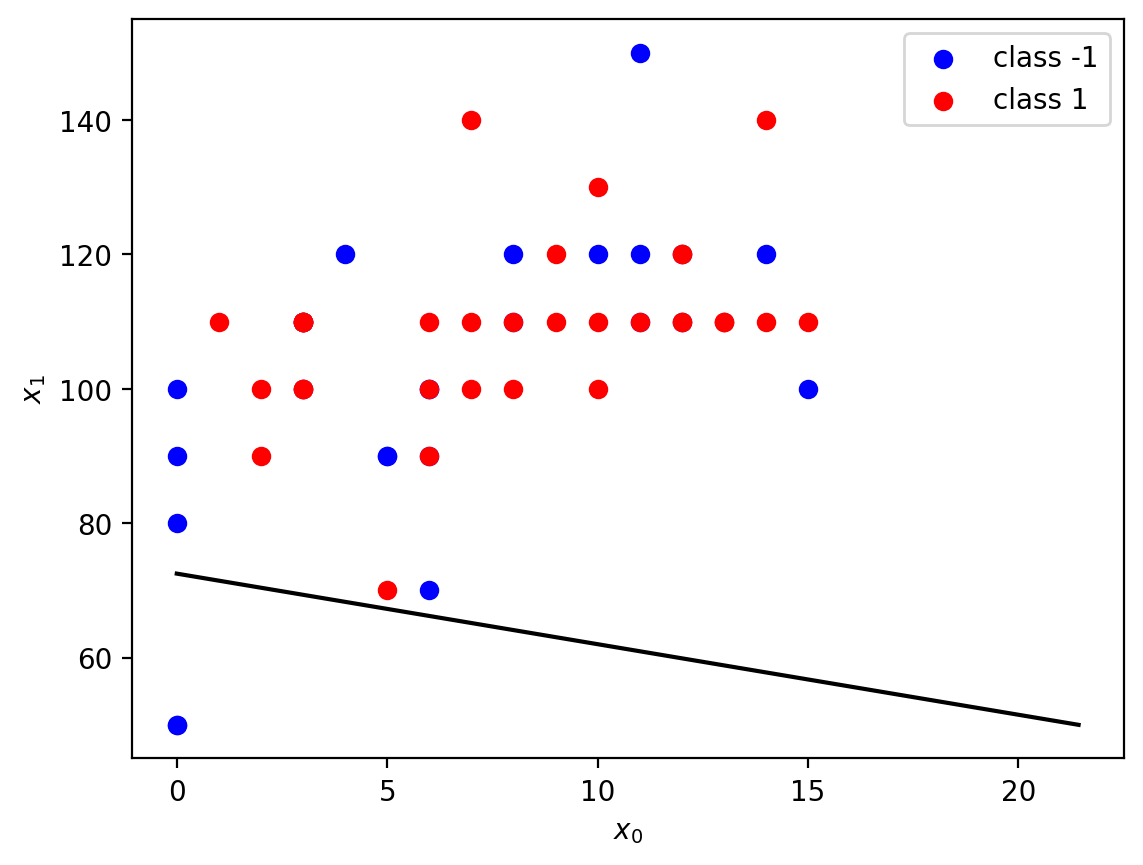

Training error: 0.3770491803278688




Best parameter C* = 1
Decision boundary: 0.059x0+0.012x1+-1.172=0


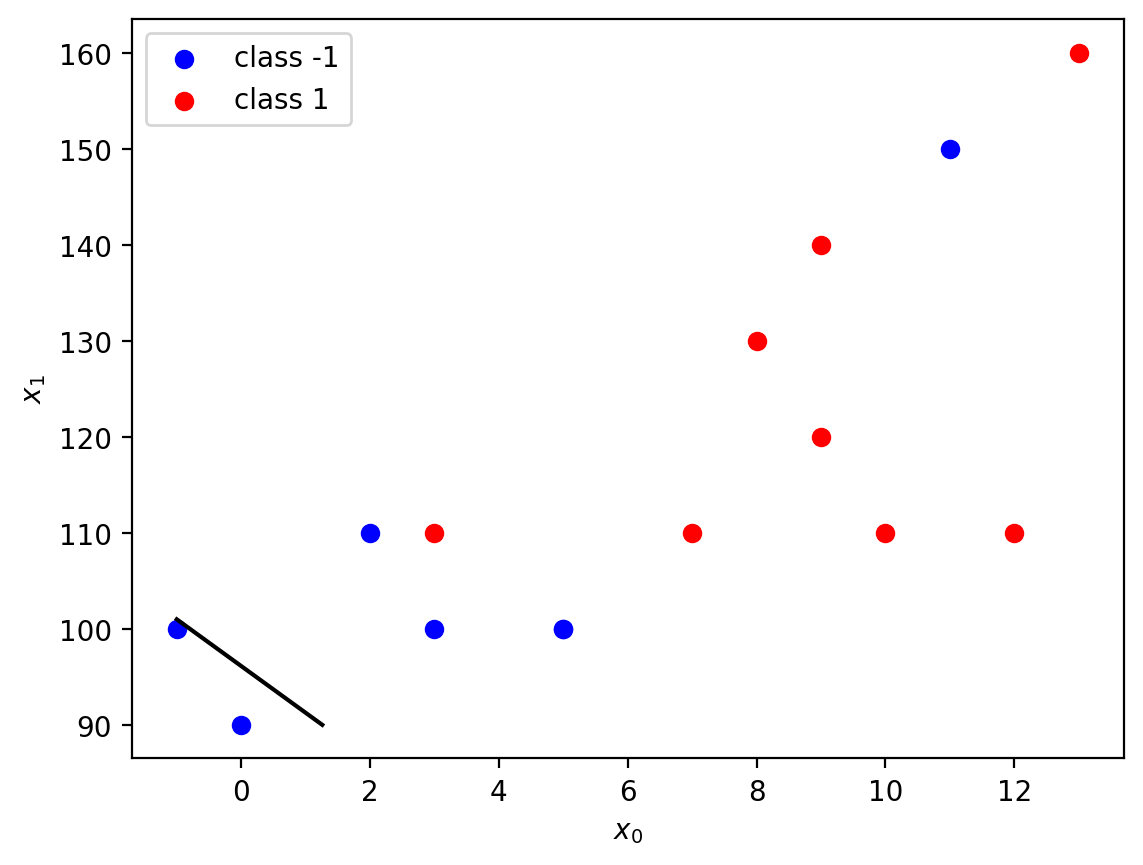

Test error: 0.33333333333333337


In [40]:
svmf(X_train,Y_train, X_test, Y_test)

#### Result #2

In [41]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:62] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[62:78][:,[6,0]]
Y_test = Y_shuffled[62:78]

Test #1
C = 0.1
Decision boundary: 0.030x0+0.006x1+-0.019=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


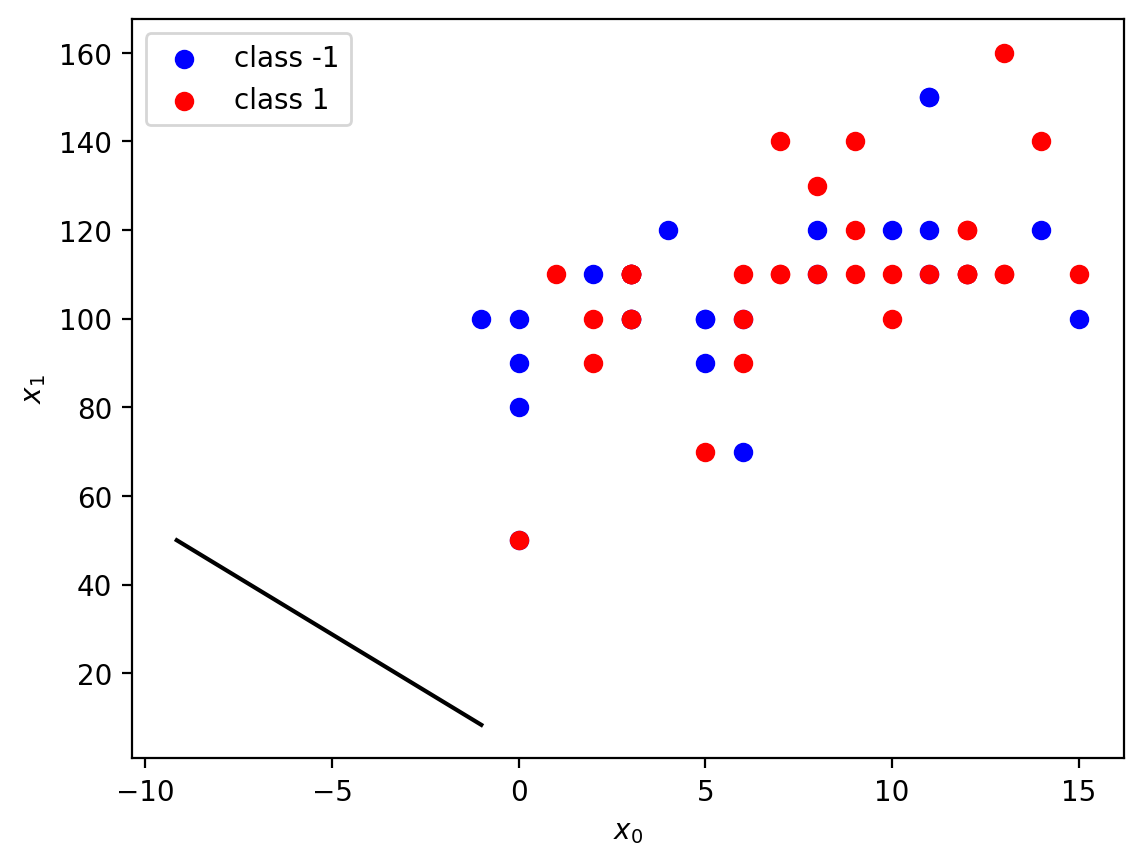

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.42622950819672134




Test #1
C = 1
Decision boundary: 0.112x0+-0.014x1+-0.240=0


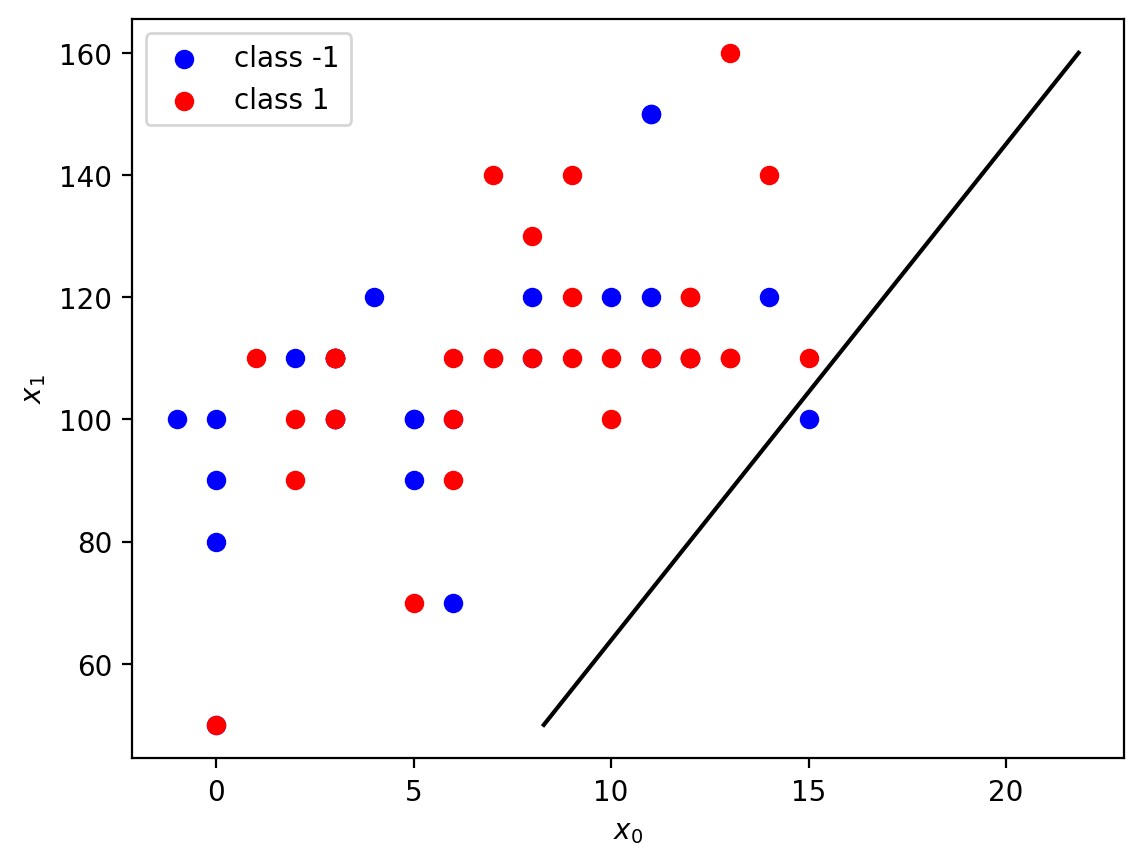

Training error: 0.5901639344262295




Test #1
C = 10
Decision boundary: 0.041x0+0.006x1+-0.125=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


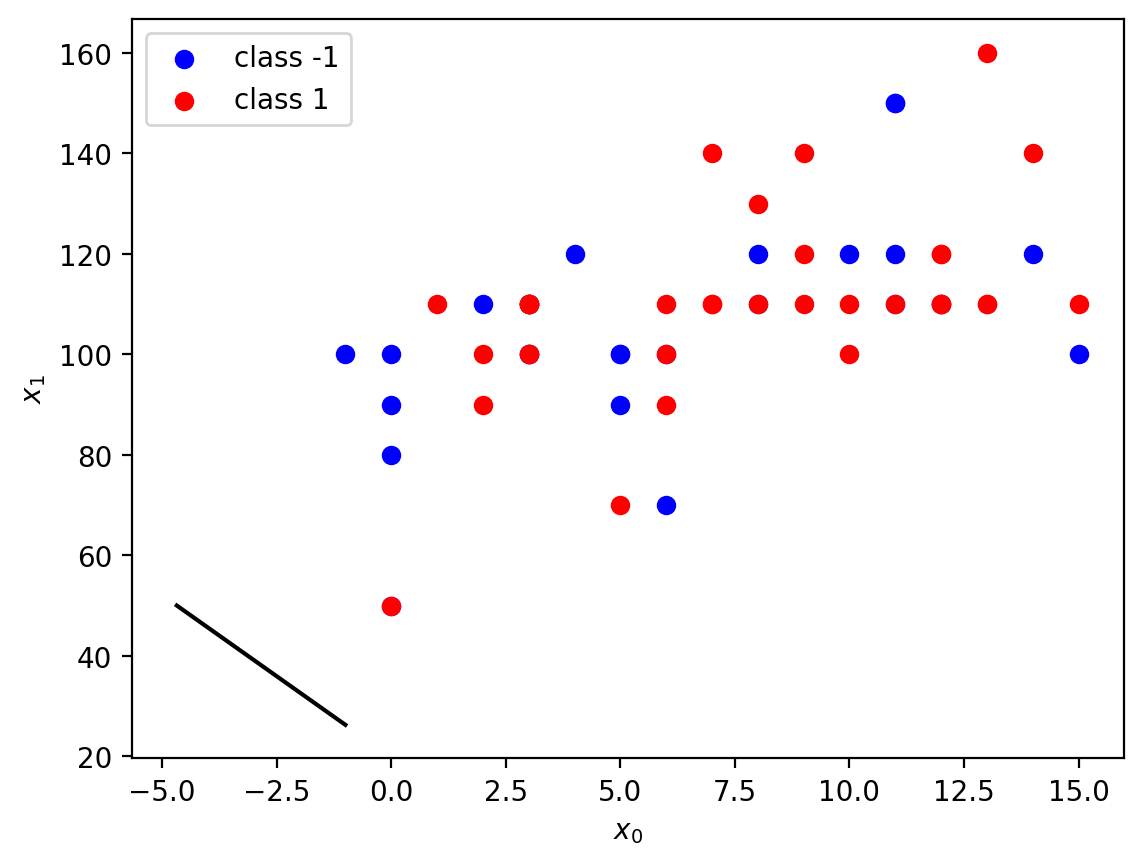

Training error: 0.42622950819672134




Test #1
C = 100
Decision boundary: 0.041x0+0.006x1+-0.120=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


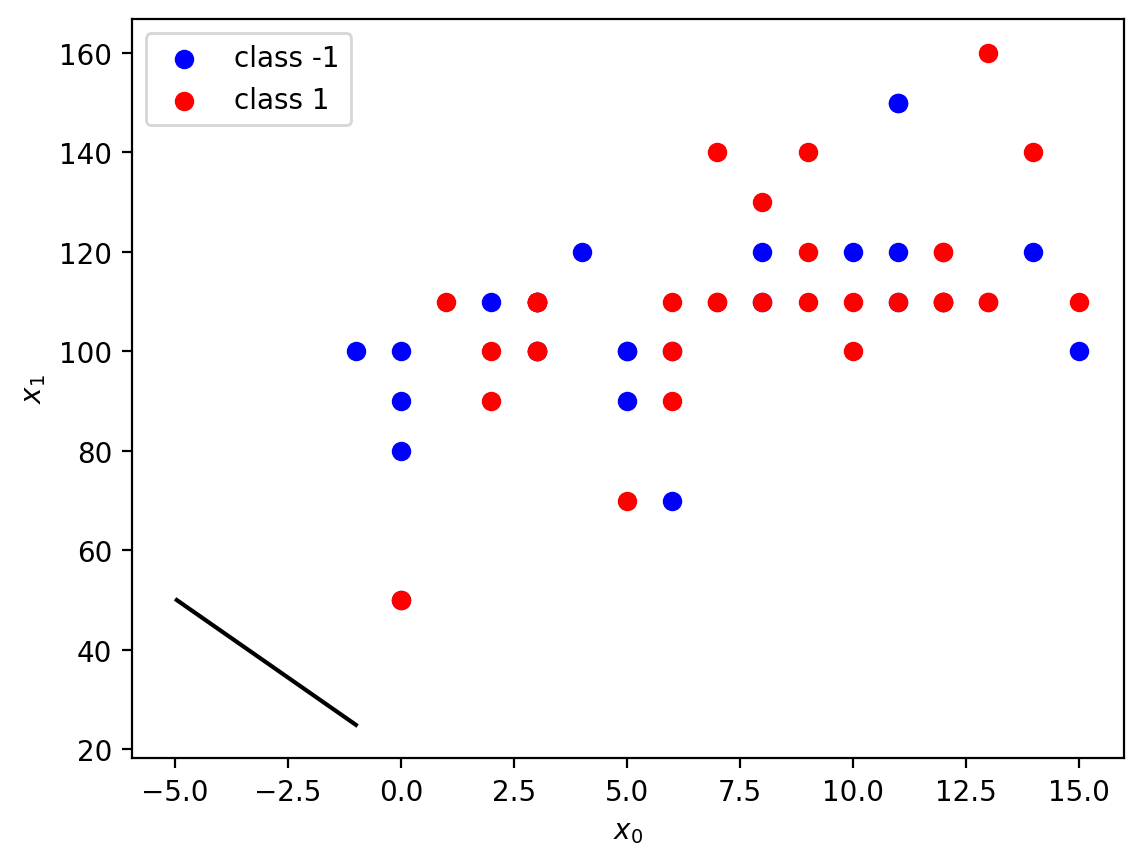

Training error: 0.42622950819672134




Test #1
C = 1000
Decision boundary: 0.044x0+0.009x1+-0.135=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


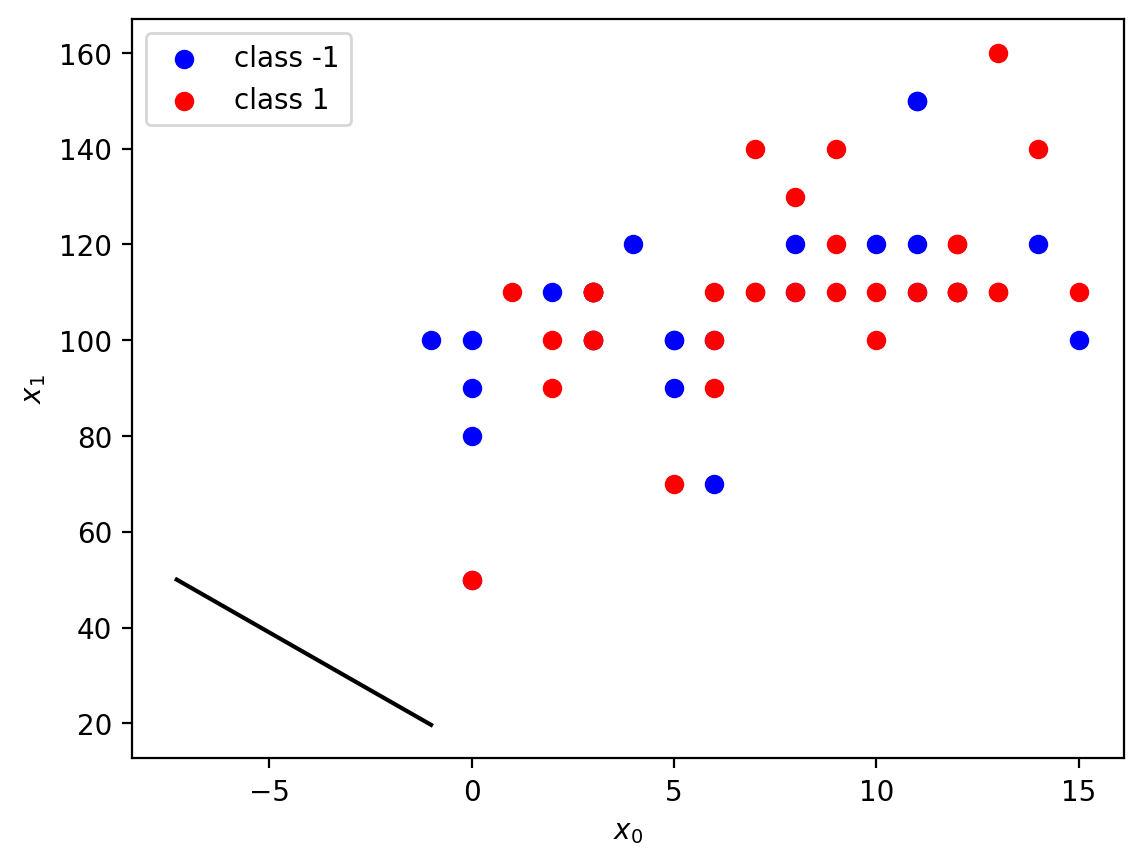

Training error: 0.42622950819672134




Best parameter C* = 0.1
Decision boundary: 0.030x0+0.006x1+-0.019=0


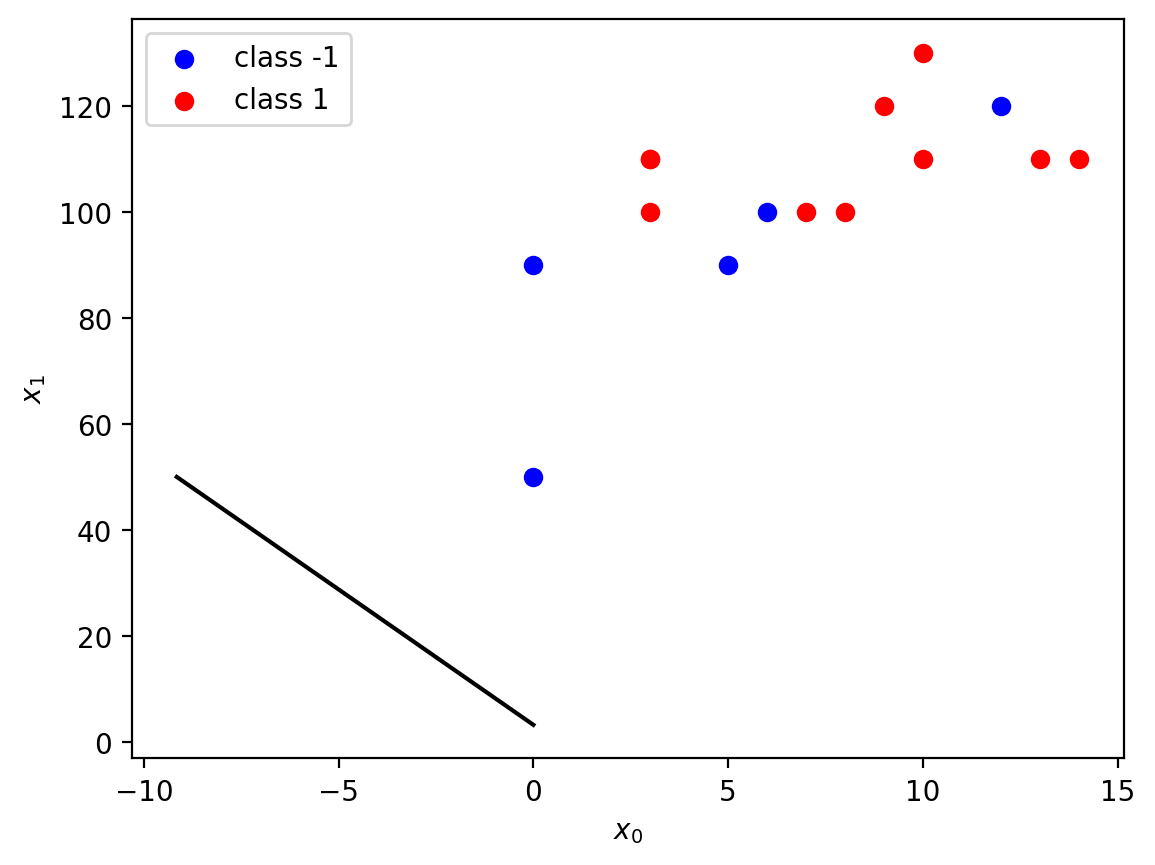

Test error: 0.33333333333333337


In [42]:
svmf(X_train,Y_train, X_test, Y_test)

#### Result #3

In [43]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:62] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[62:78][:,[6,0]]
Y_test = Y_shuffled[62:78]

Test #1
C = 0.1
Decision boundary: 0.000x0+0.009x1+-0.018=0


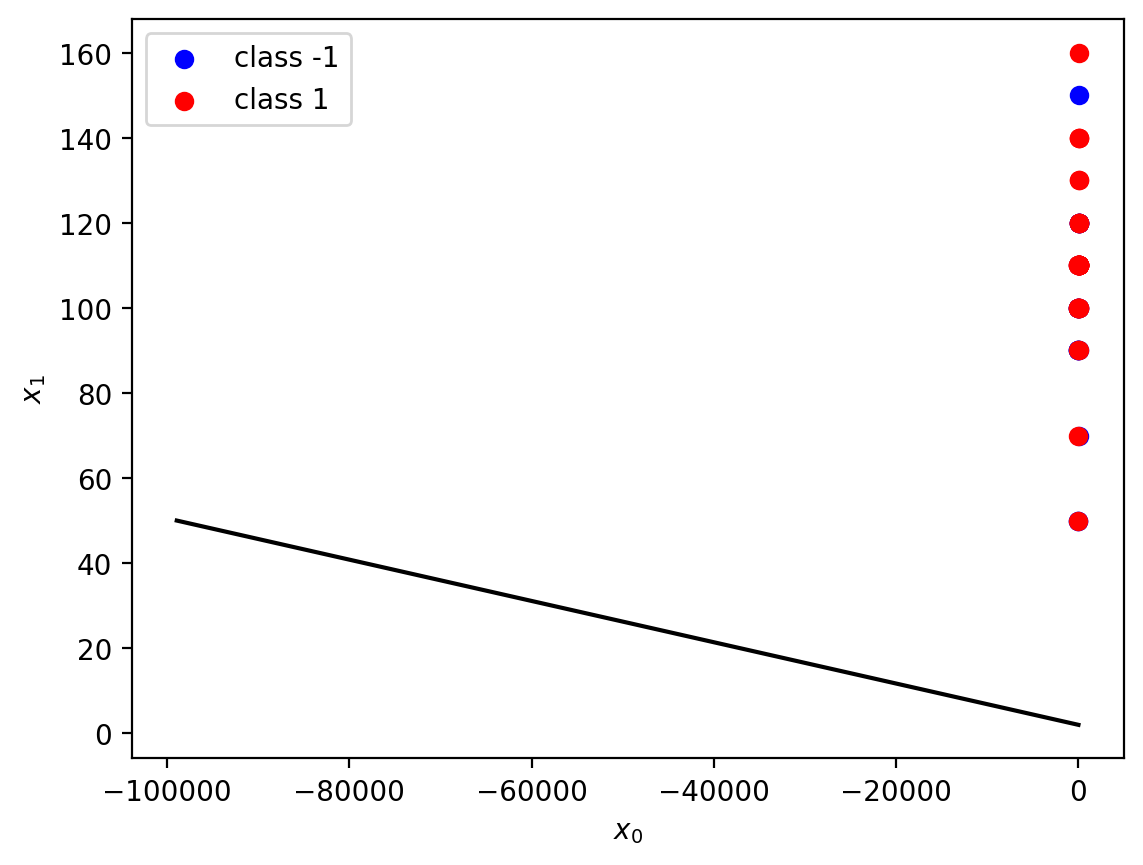

Training error: 0.3770491803278688




Test #1
C = 1
Decision boundary: 0.043x0+-0.005x1+-0.753=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


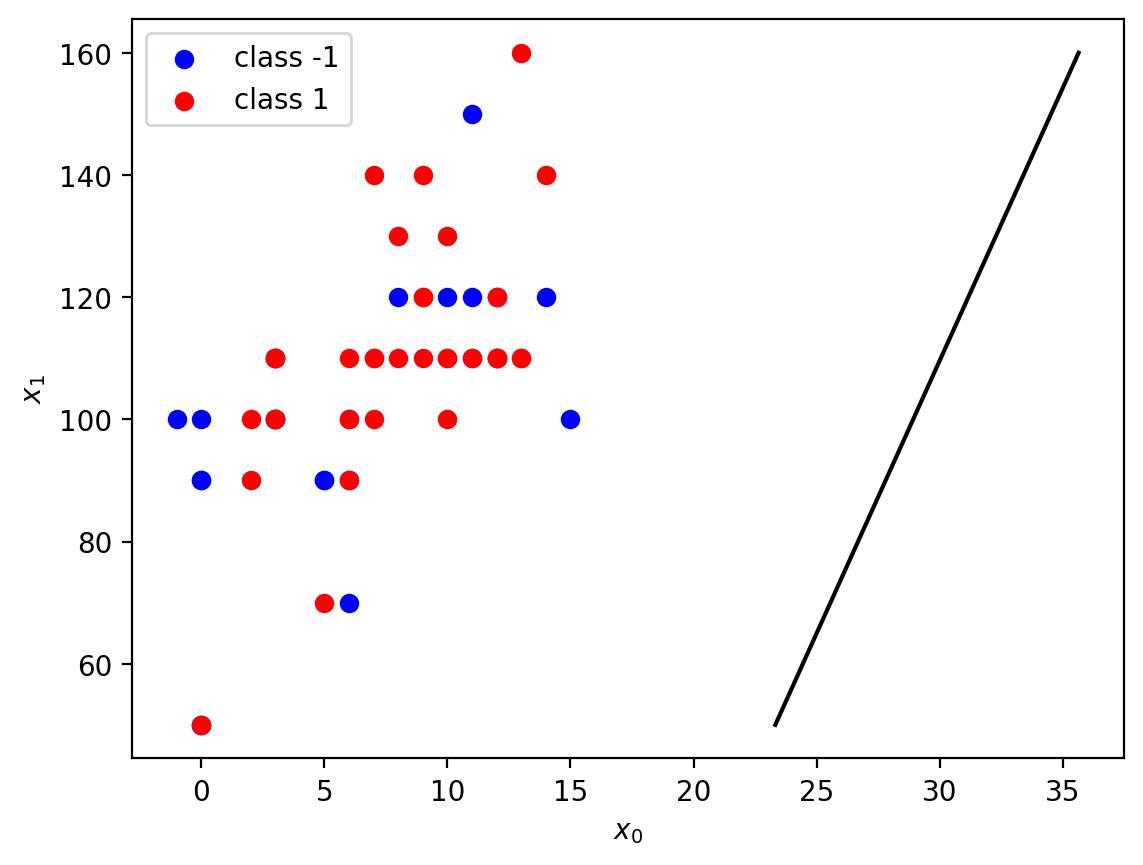

Training error: 0.6229508196721312




Test #1
C = 10
Decision boundary: 0.013x0+0.015x1+-0.804=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


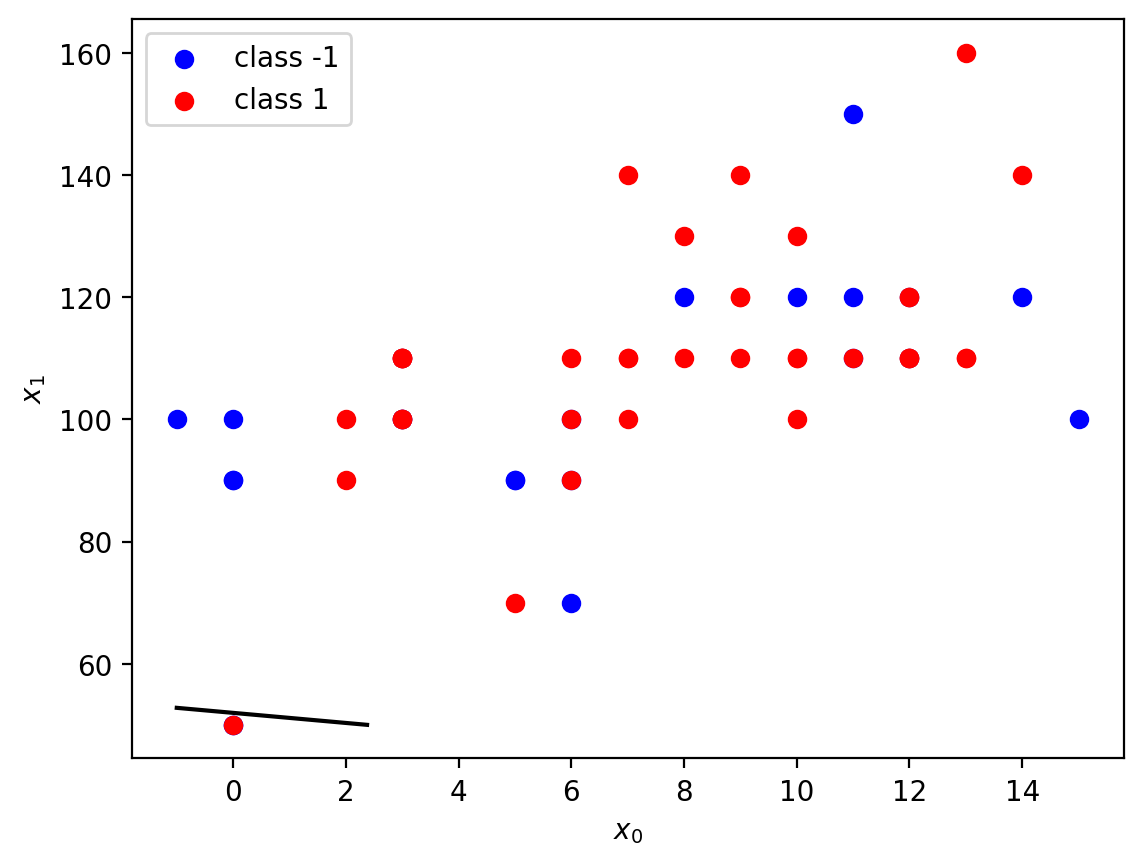

Training error: 0.360655737704918




Test #1
C = 100
Decision boundary: 0.026x0+-0.004x1+-0.811=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


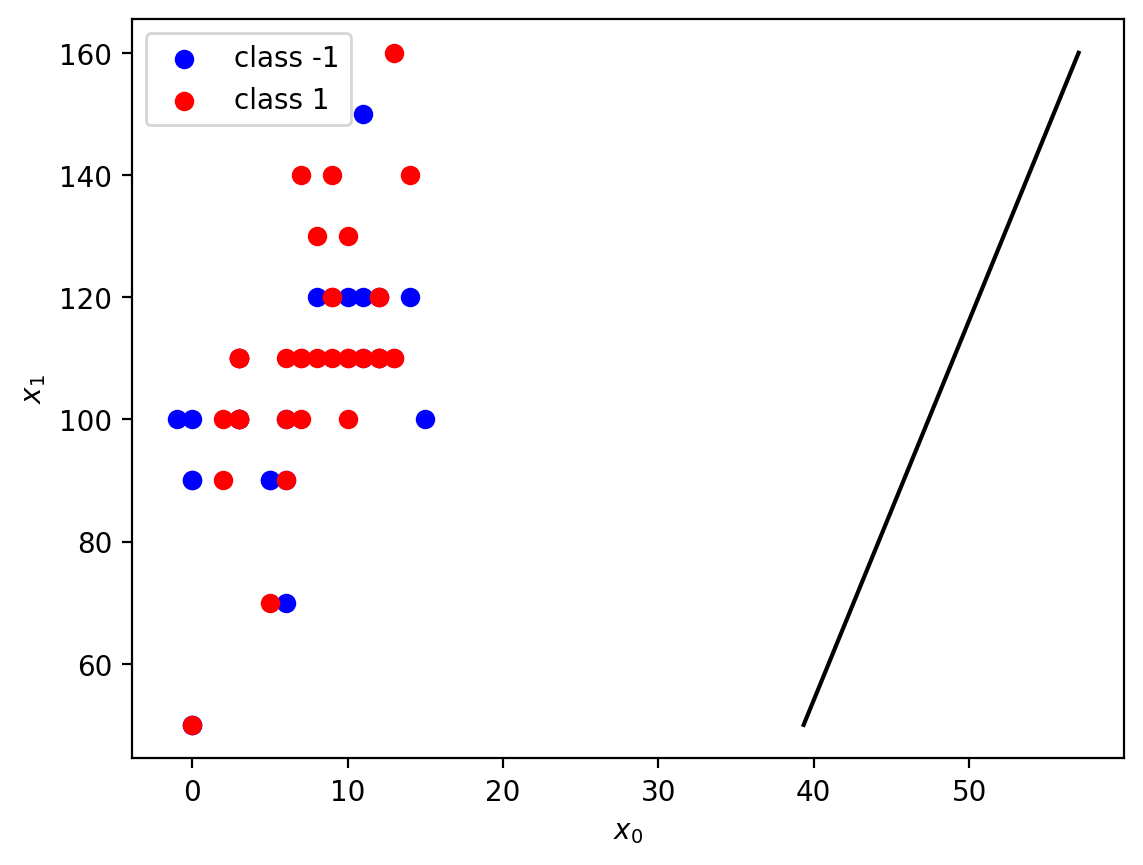

Training error: 0.6229508196721312




Test #1
C = 1000
Decision boundary: -0.004x0+-0.001x1+-0.881=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


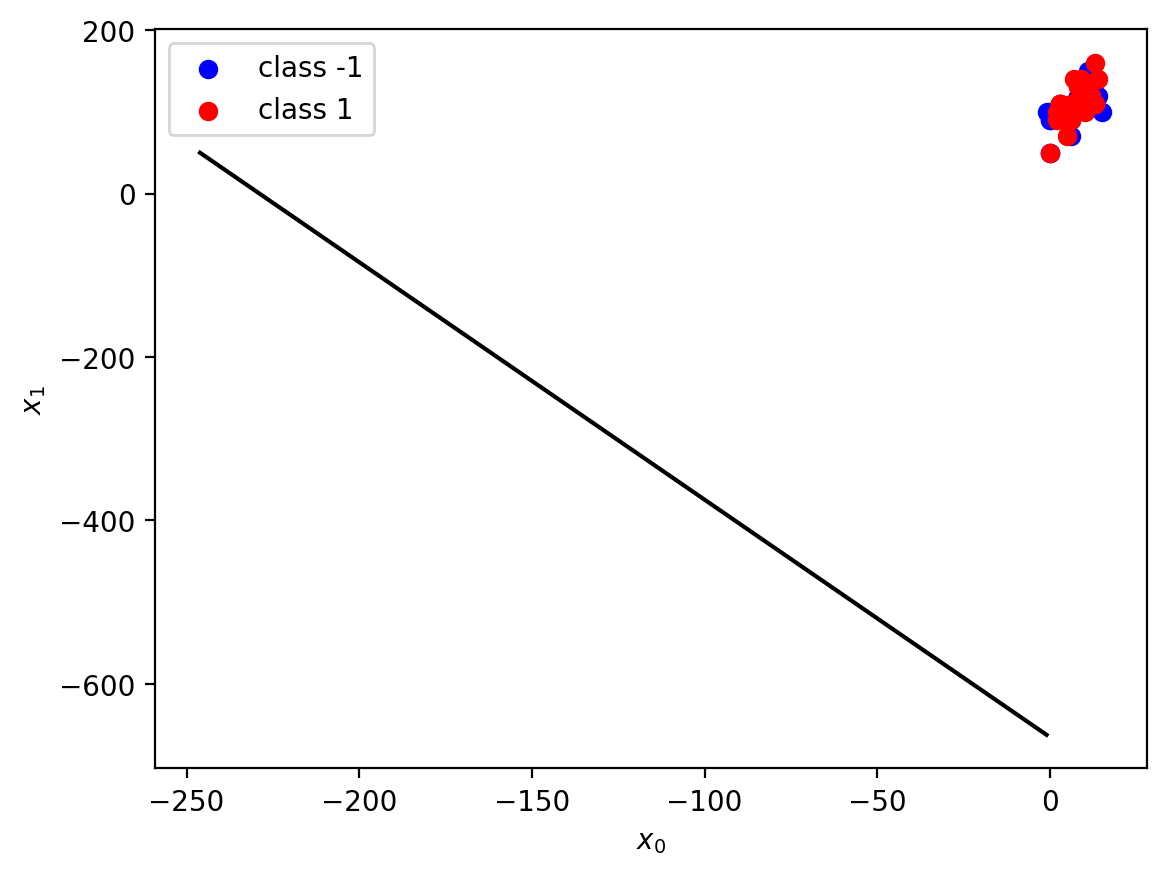

Training error: 0.6229508196721312




Best parameter C* = 10
Decision boundary: 0.013x0+0.015x1+-0.804=0


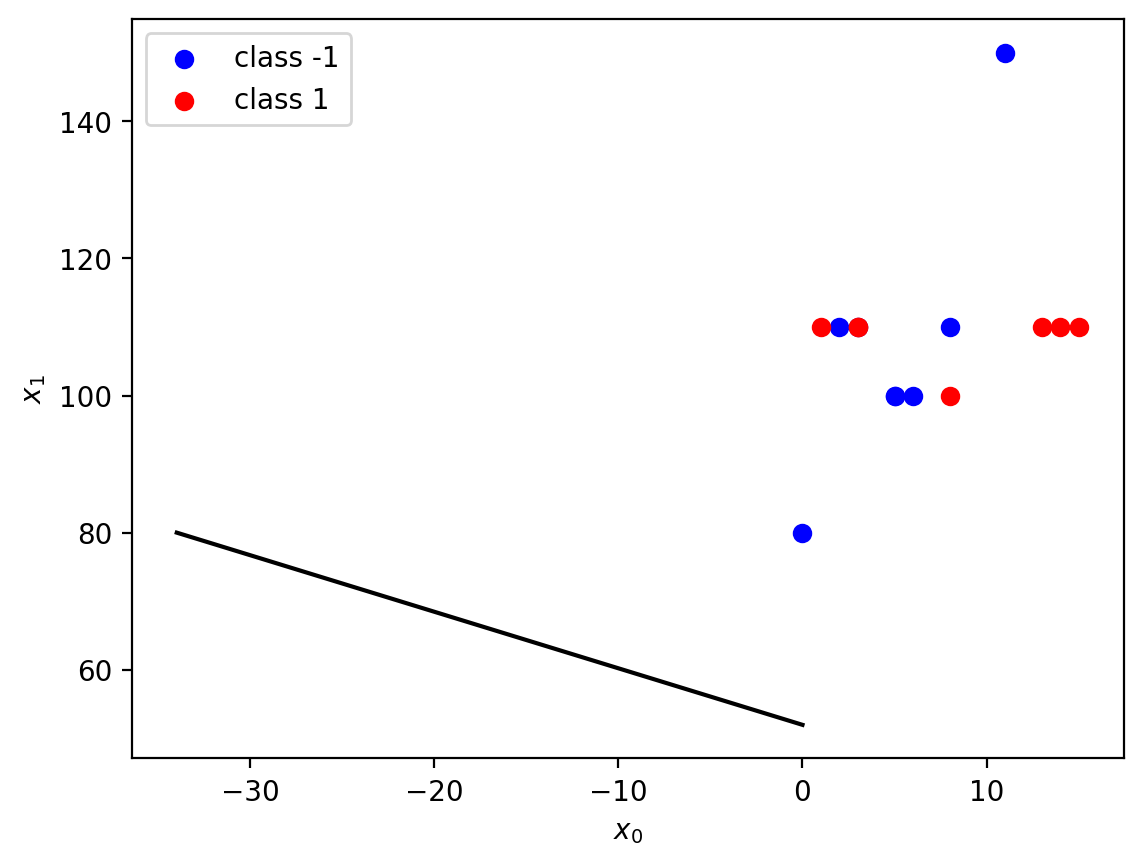

Test error: 0.5333333333333333


In [44]:
svmf(X_train,Y_train, X_test, Y_test)

In [45]:
totalr_training_data122 = r_training_data2/3
totalr_testing_data122 = r_testing_data2/3
r_training_data2 = 0
r_testing_data2 = 0
print("Training average :",totalr_training_data122)
print("Training average :",totalr_testing_data122)

Training average : 0.3825136612021858
Training average : 0.4000000000000001


### Decision Tree

#### Result #1

In [46]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:62] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[62:78][:,[6,0]]
Y_test = Y_shuffled[62:78]

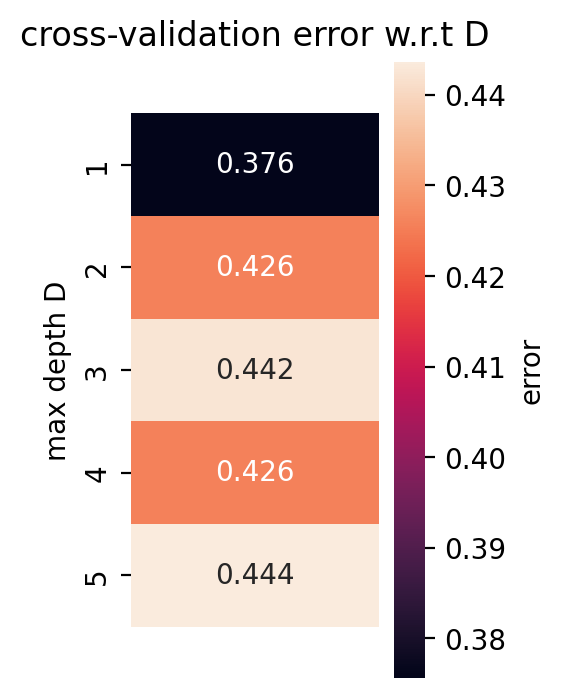

Best max depth D: {'max_depth': 1}
Training error: 0.3278688524590164
Test error: 0.4


In [47]:
trees(X_train,Y_train, X_test, Y_test)

#### Result #2

In [48]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:62] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[62:78][:,[6,0]]
Y_test = Y_shuffled[62:78]

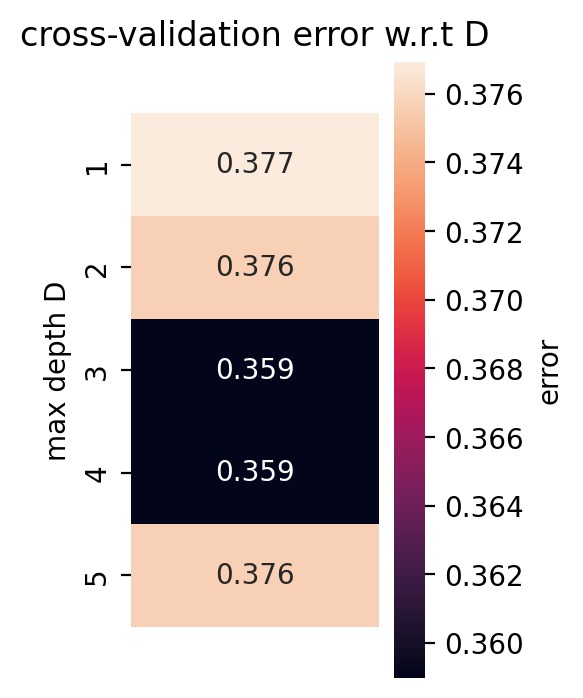

Best max depth D: {'max_depth': 4}
Training error: 0.21311475409836067
Test error: 0.6


In [49]:
trees(X_train,Y_train, X_test, Y_test)

#### Result #3

In [50]:
np.random.shuffle(X_and_Y) 
X_shuffled = X_and_Y[:,:8]
Y_shuffled = X_and_Y[:,8]

X_train = X_shuffled[:62][:,[6,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:62] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[62:78][:,[6,0]]
Y_test = Y_shuffled[62:78]

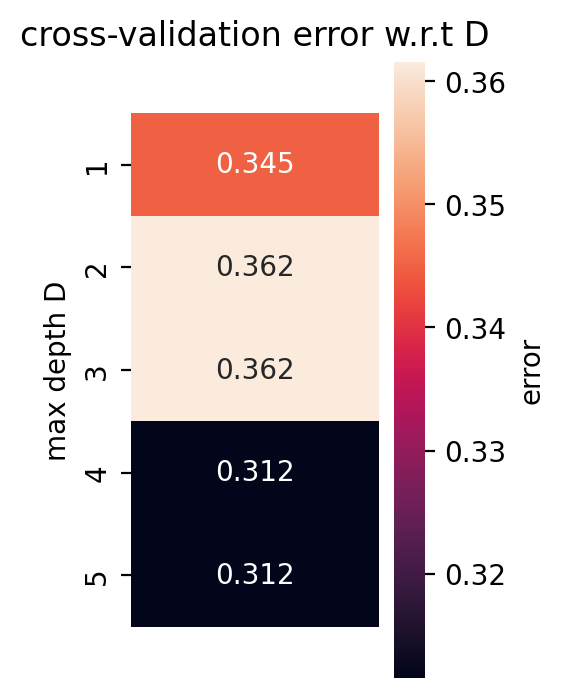

Best max depth D: {'max_depth': 4}
Training error: 0.24590163934426235
Test error: 0.6666666666666667


In [51]:
trees(X_train,Y_train, X_test, Y_test)

In [52]:
totalr_training_data123 = r_training_data3/3
totalr_testing_data123 = r_testing_data3/3
r_training_data3 = 0
r_testing_data3 = 0
print("Training average :",totalr_training_data123)
print("Training average :",totalr_testing_data123)

Training average : 0.26229508196721313
Training average : 0.5555555555555556


In [53]:
print("Training average Log Regression :",totalr_training_data111)
print("Training average SVM :",totalr_training_data112)
print("Training average Decision Tree :",totalr_training_data113)

print("Testing average Log Regression :",totalr_testing_data111)
print("Testing average SVM :",totalr_testing_data112)
print("Testing average Decision Tree :",totalr_testing_data113)

print(" ")

print("Training average Log Regression :",totalr_training_data121)
print("Training average SVM :",totalr_training_data122)
print("Training average Decision Tree :",totalr_training_data123)

print("Testing average Log Regression :",totalr_testing_data121)
print("Testing average SVM :",totalr_testing_data122)
print("Testing average Decision Tree :",totalr_testing_data123)

Training average Log Regression : 0.35555555555555557
Training average SVM : 0.2619047619047619
Training average Decision Tree : 0.1904761904761905
Testing average Log Regression : 0.39247311827956993
Testing average SVM : 0.532258064516129
Testing average Decision Tree : 0.4408602150537635
 
Training average Log Regression : 0.446236559139785
Training average SVM : 0.3825136612021858
Training average Decision Tree : 0.26229508196721313
Testing average Log Regression : 0.37777777777777777
Testing average SVM : 0.4000000000000001
Testing average Decision Tree : 0.5555555555555556


# Dataset #2

## Partition 1

### Logistic regression classifier

#### Result #1

In [54]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]
    

X_train = X_shuffled[:17][:,[2,0]]
Y_train = Y_shuffled[:17]
X_test  = X_shuffled[17:85][:,[2,0]]
Y_test  = Y_shuffled[17:85]

Decision boundary: 45.680x0+-0.606x1+-3.456=0


C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


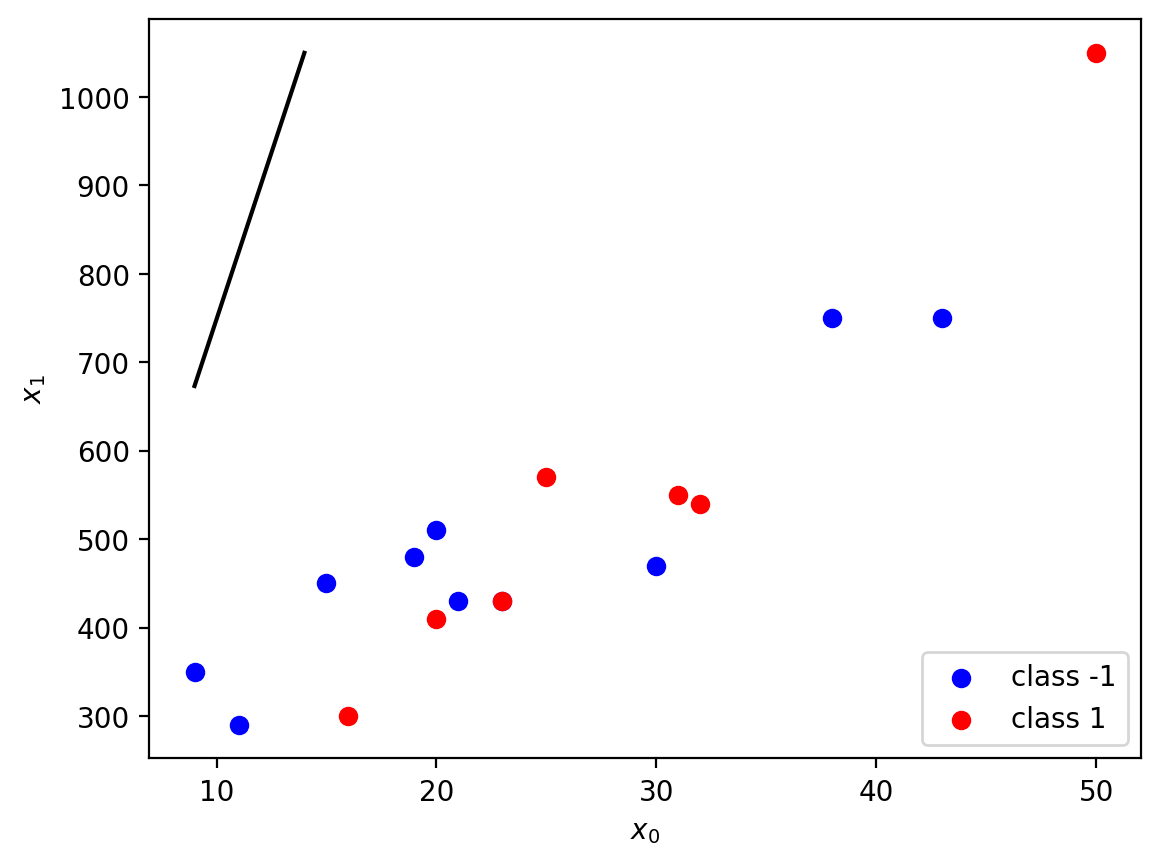

Training error: 0.5882352941176471


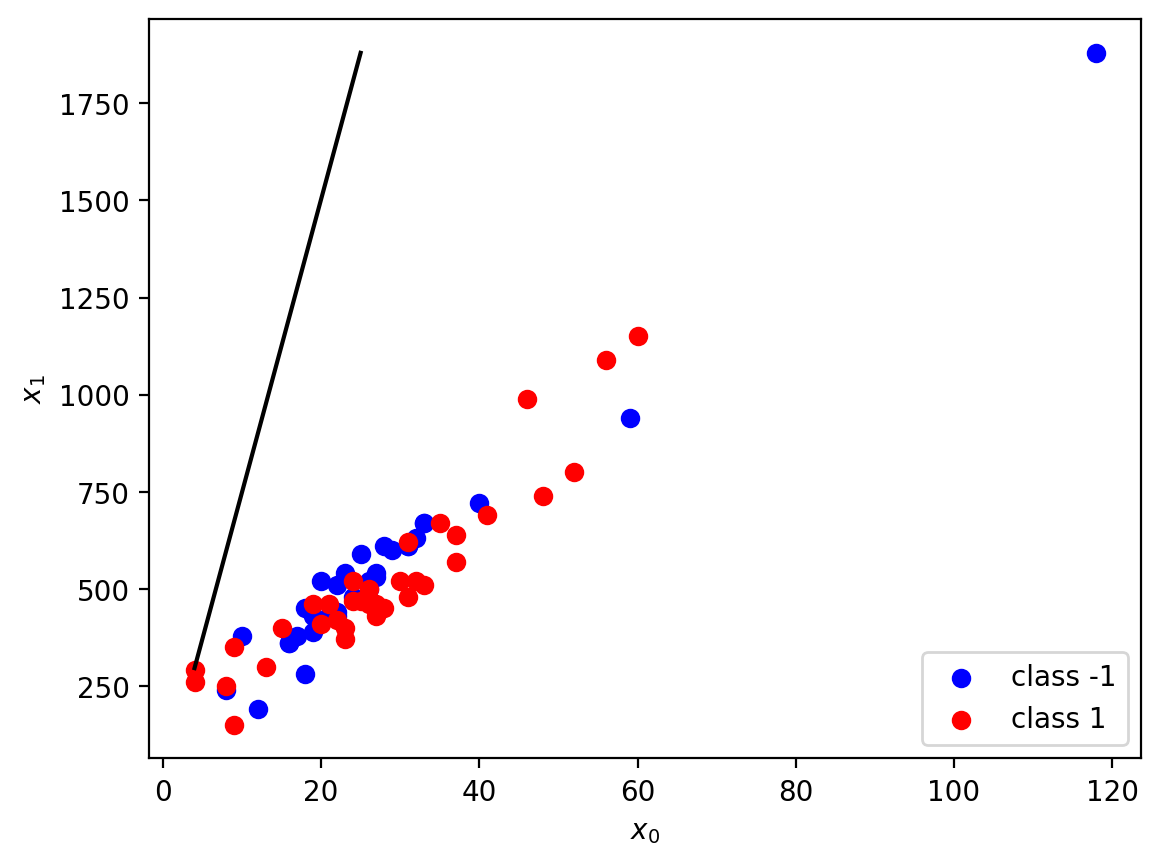

Test error: 0.47761194029850745


In [55]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #2

In [56]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]
    

X_train = X_shuffled[:17][:,[2,0]]
Y_train = Y_shuffled[:17]
X_test  = X_shuffled[17:85][:,[2,0]]
Y_test  = Y_shuffled[17:85]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: -27.821x0+1.025x1+4.423=0


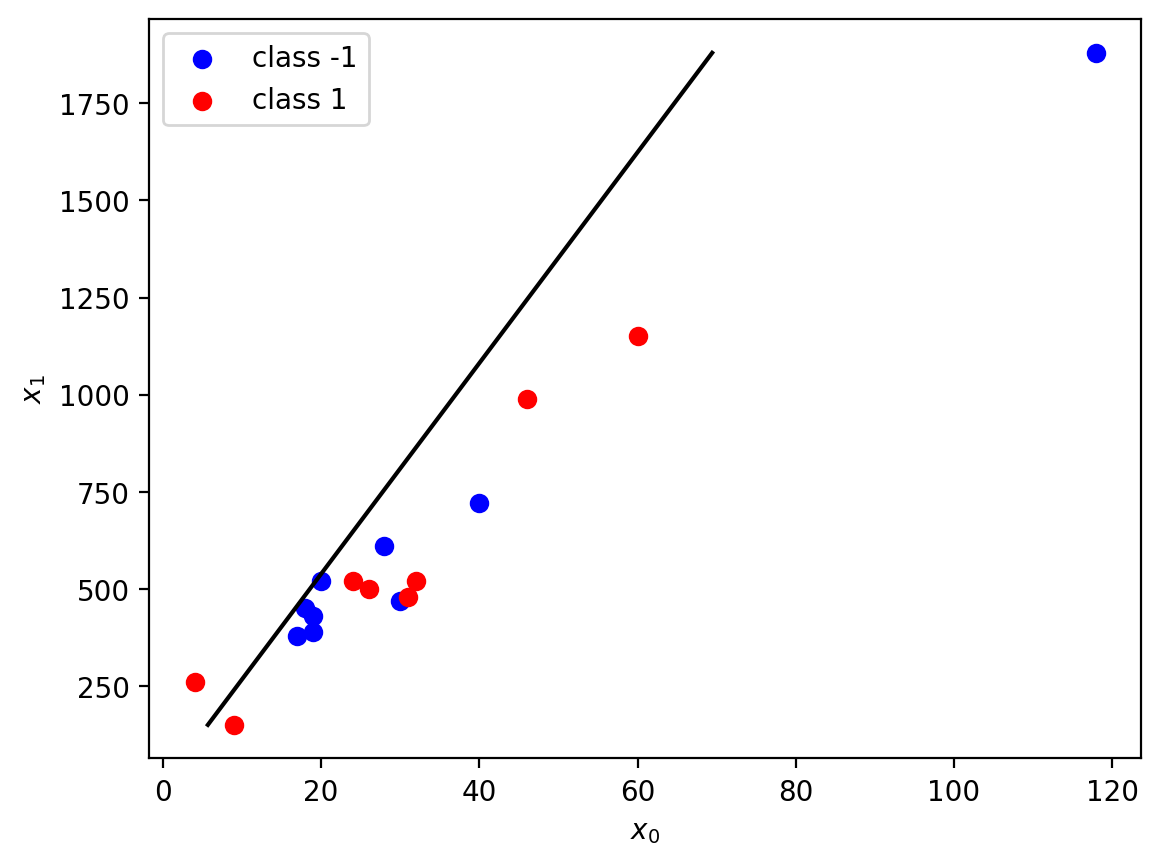

Training error: 0.4117647058823529


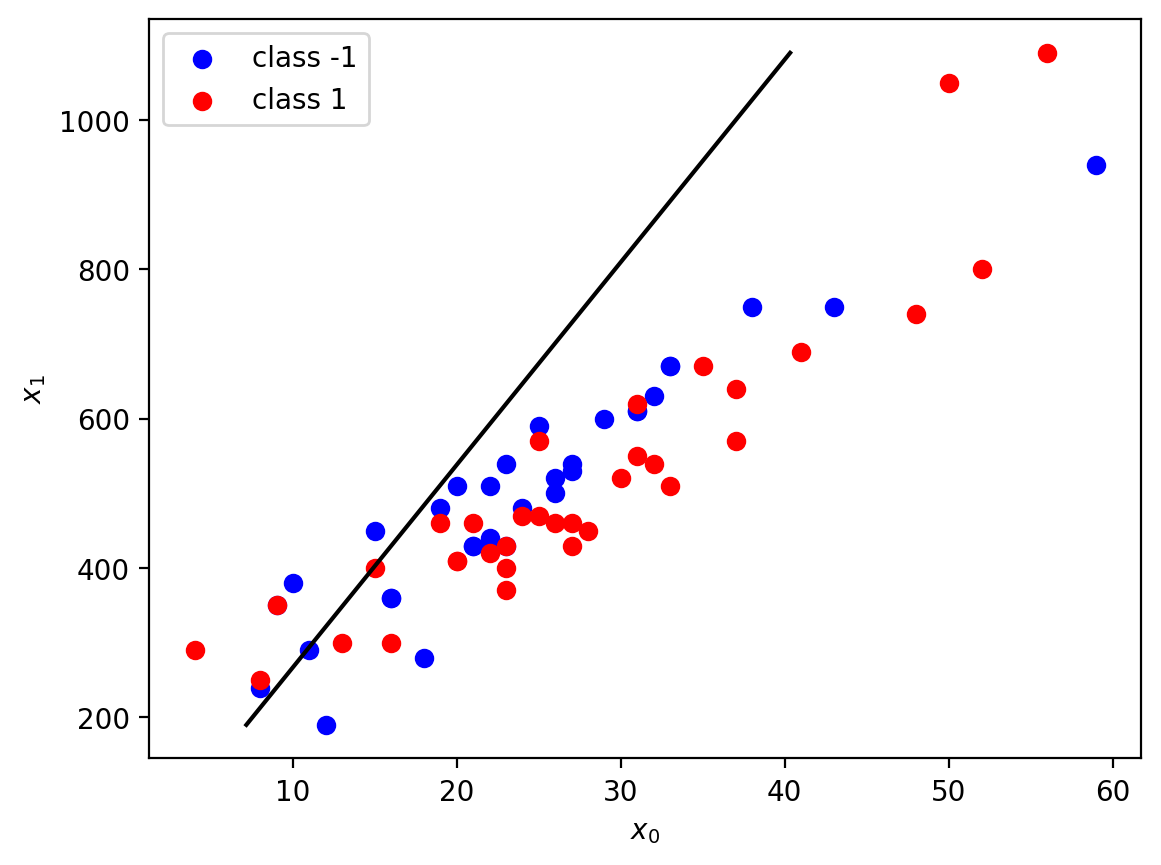

Test error: 0.5223880597014925


In [57]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #3

In [58]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]
    

X_train = X_shuffled[:17][:,[2,0]]
Y_train = Y_shuffled[:17]
X_test  = X_shuffled[17:85][:,[2,0]]
Y_test  = Y_shuffled[17:85]

Decision boundary: 101.923x0+-6.803x1+-1.437=0

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


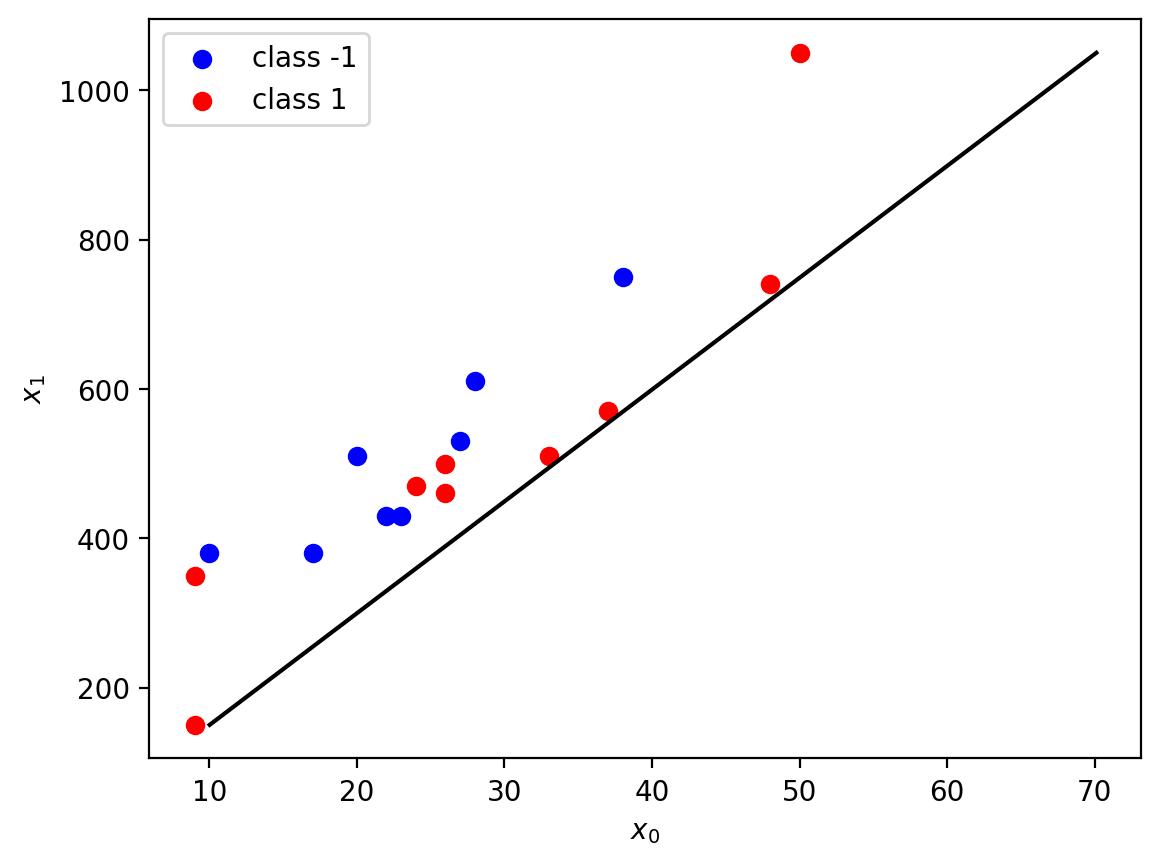

Training error: 0.5294117647058824


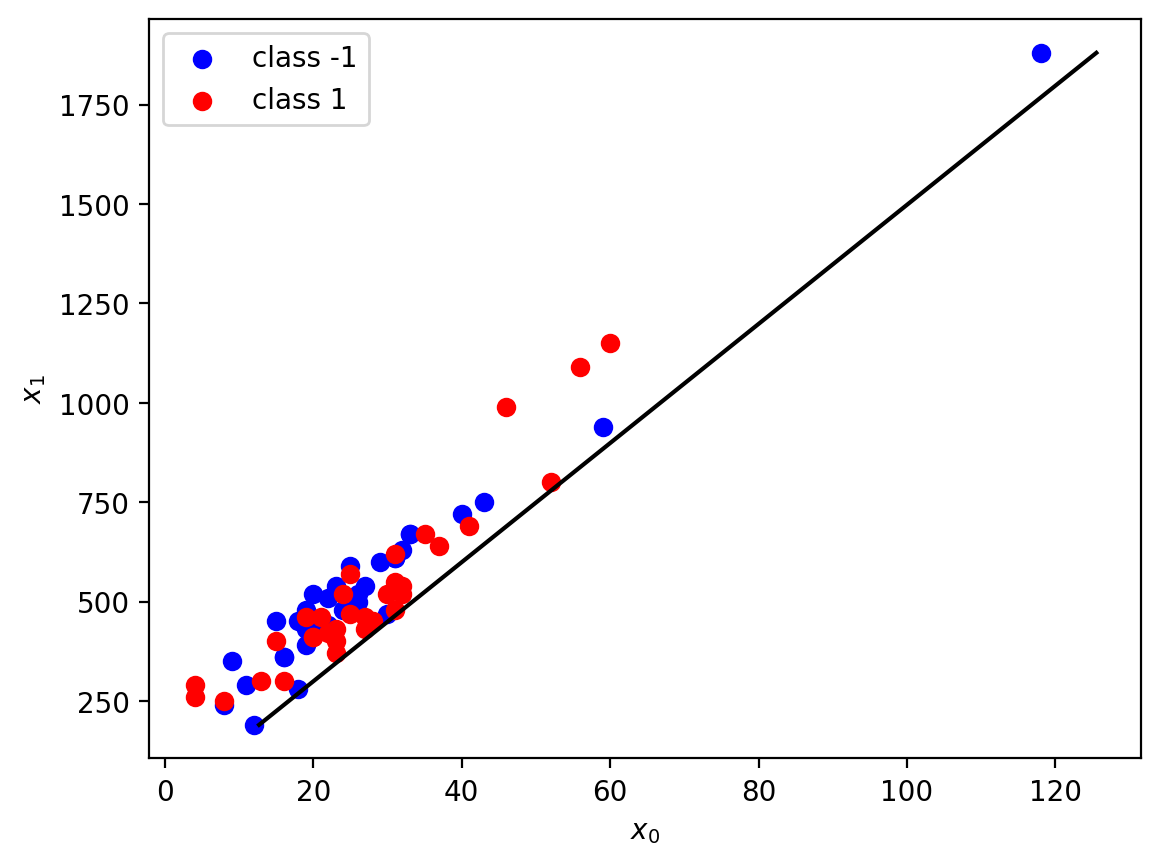

Test error: 0.4925373134328358


In [59]:
logreg(X_train,Y_train, X_test, Y_test)

In [60]:
totalr_training_data211 = r_training_data1/3
totalr_testing_data211 = r_testing_data1/3
r_training_data1 = 0
r_testing_data1 = 0
print("Training average :",totalr_training_data211)
print("Training average :",totalr_testing_data211)

Training average : 0.5098039215686274
Training average : 0.49751243781094523


### Support Vector Machines

#### Result #1

In [61]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:17][:,[2,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:17] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[17:85][:,[2,0]]
Y_test = Y_shuffled[17:85]

Test #1
C = 0.1
Decision boundary: 0.059x0+-0.002x1+0.135=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


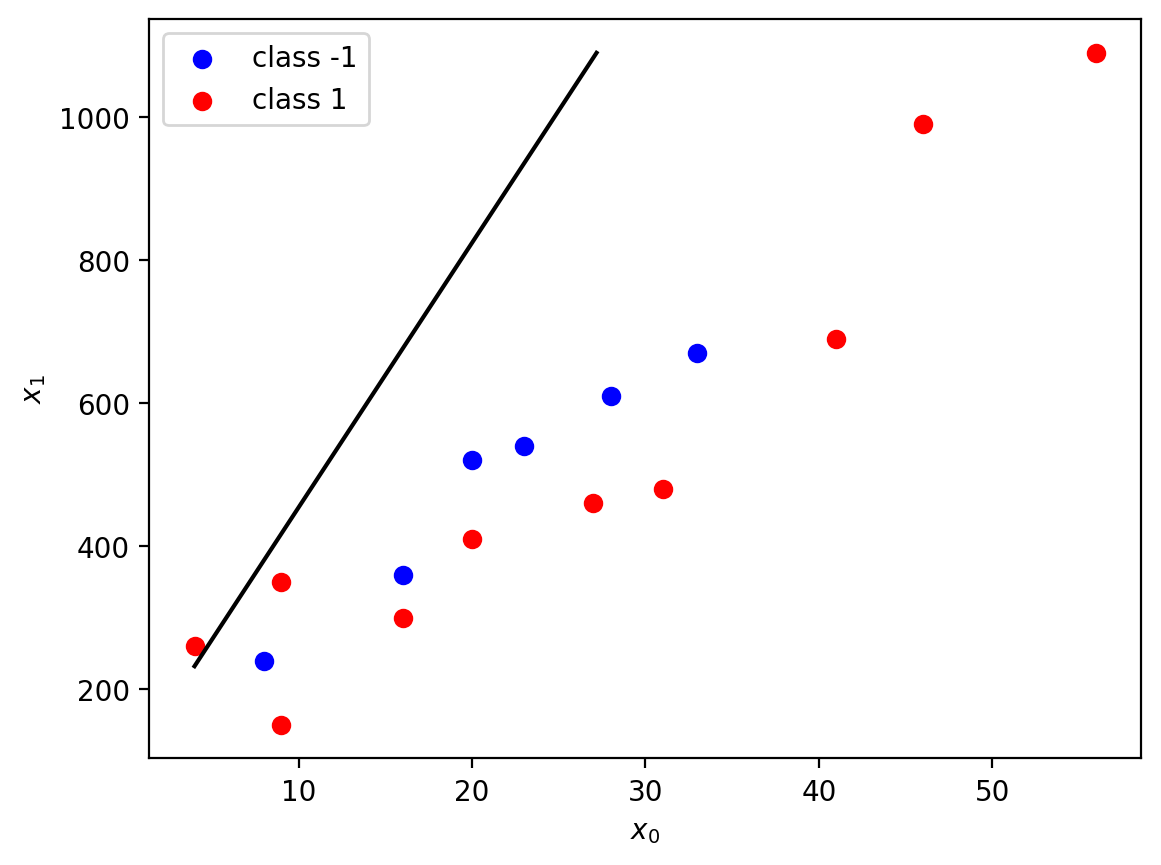

Training error: 0.4375




Test #1
C = 1
Decision boundary: 0.045x0+0.001x1+0.274=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


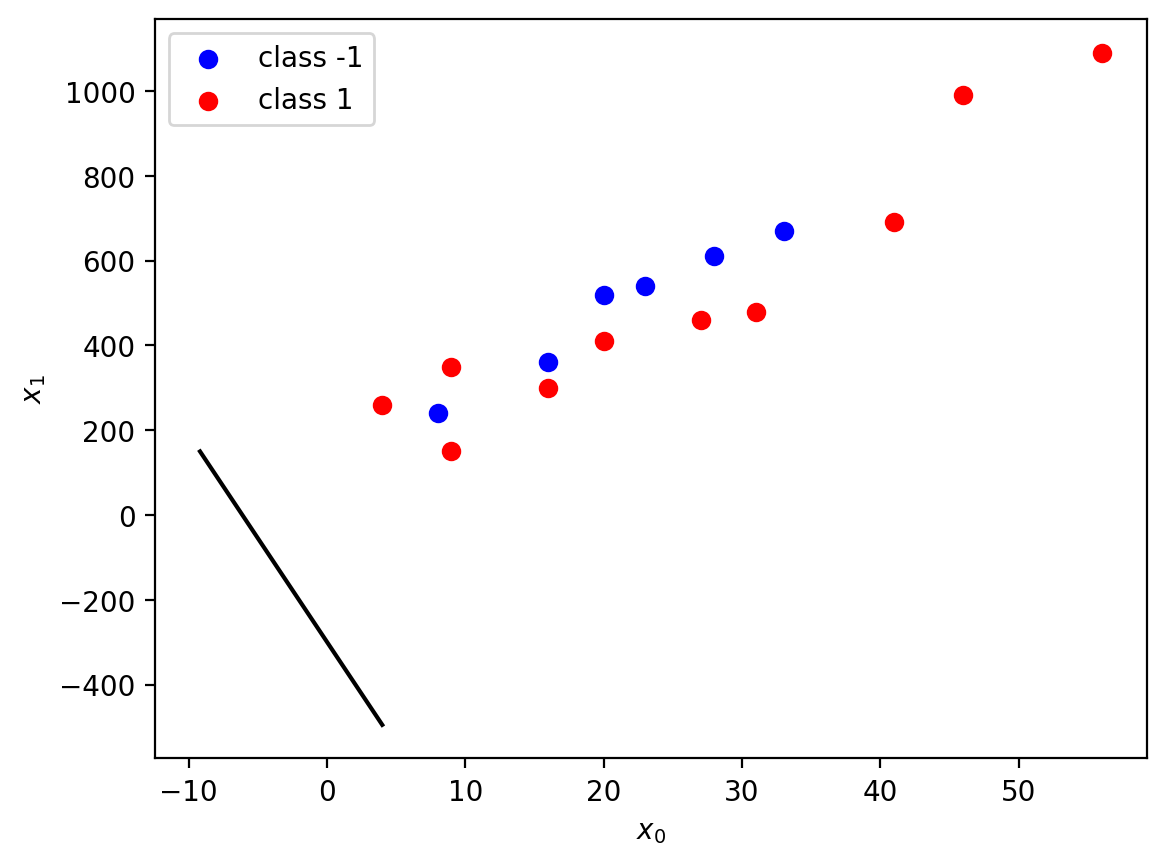

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.375




Test #1
C = 10
Decision boundary: 0.044x0+-0.007x1+0.273=0


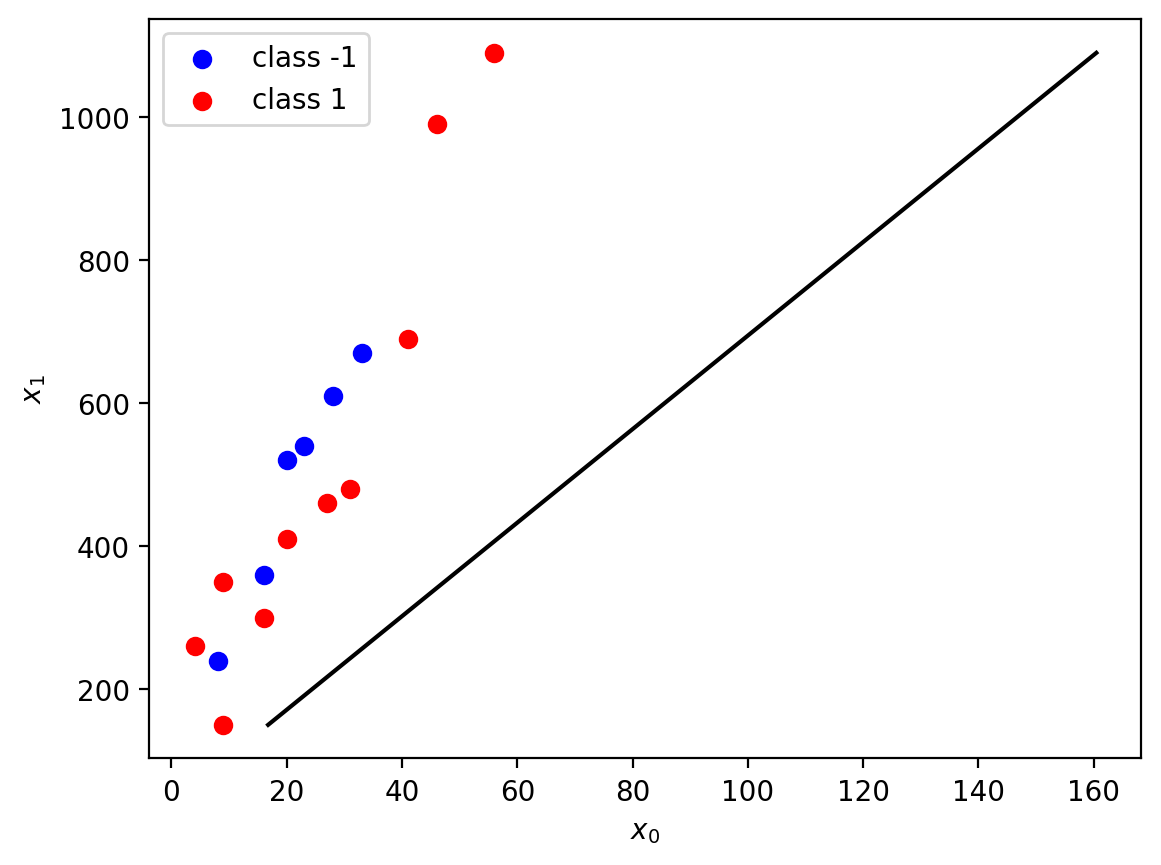

Training error: 0.625




Test #1
C = 100
Decision boundary: 0.046x0+0.002x1+0.263=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


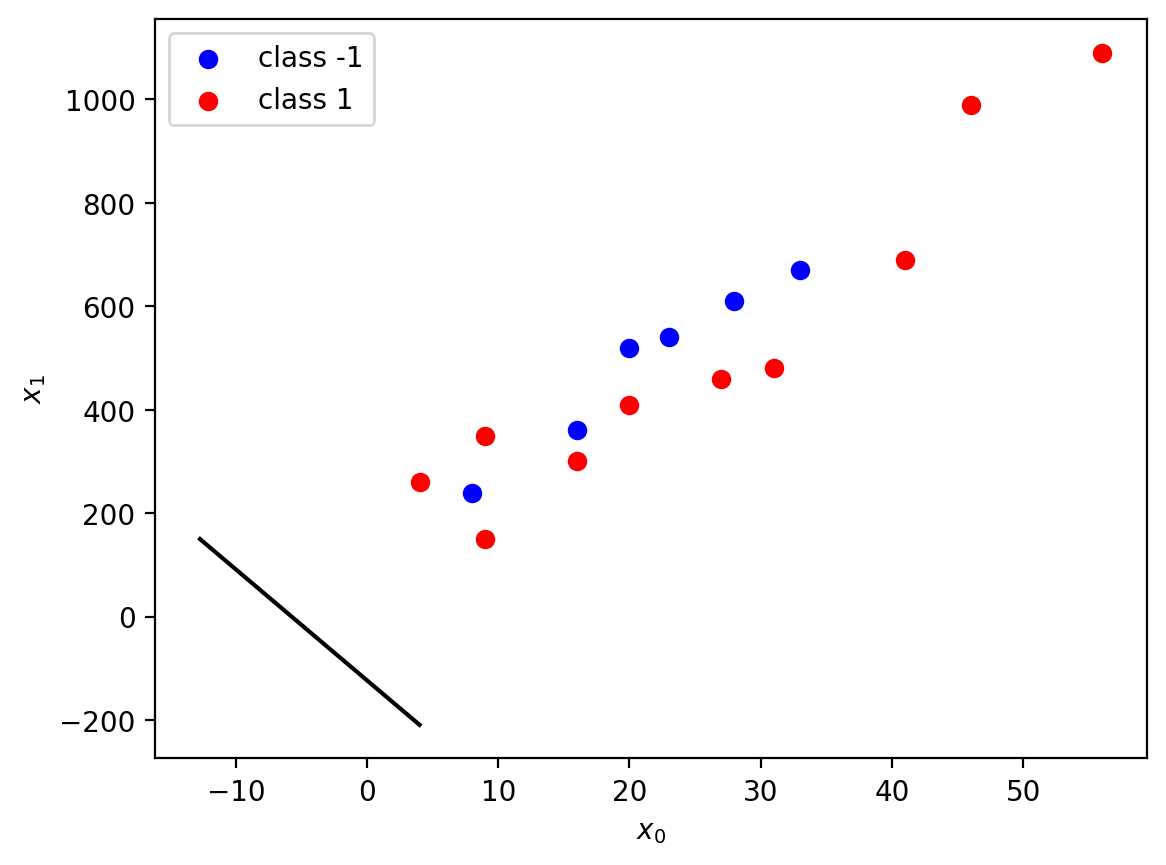

Training error: 0.375




Test #1
C = 1000
Decision boundary: 0.048x0+-0.000x1+0.265=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


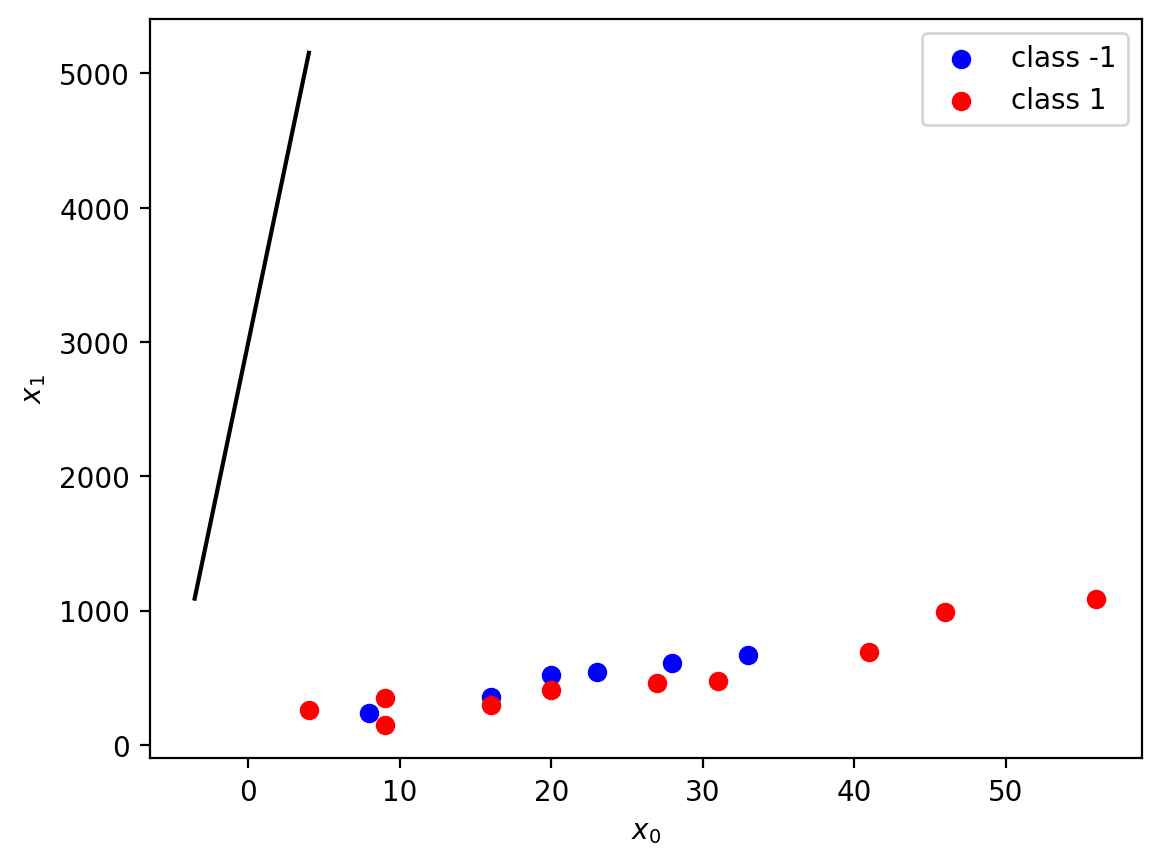

Training error: 0.375




Best parameter C* = 1
Decision boundary: 0.045x0+0.001x1+0.274=0


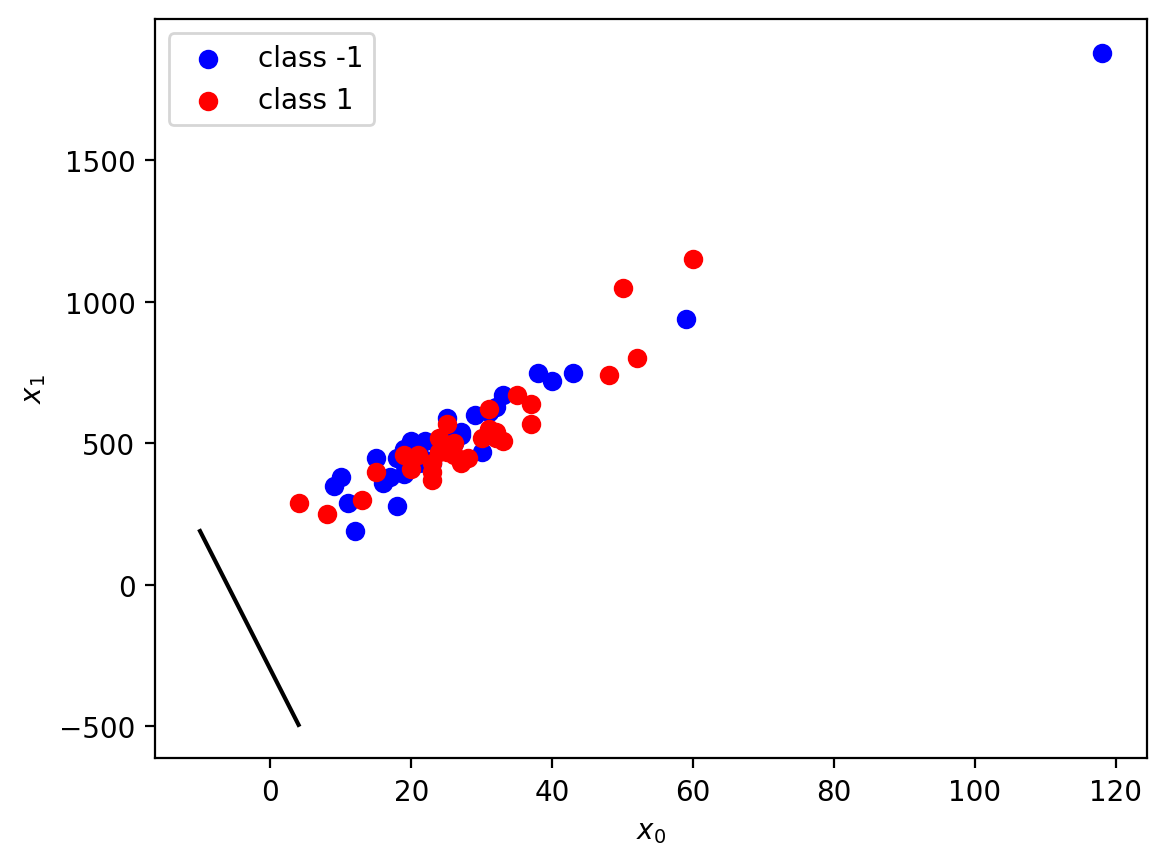

Test error: 0.5373134328358209


In [62]:
svmf(X_train, Y_train, X_test, Y_test)

#### Result #2

In [63]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:17][:,[2,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:17] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[17:85][:,[2,0]]
Y_test = Y_shuffled[17:85]

Test #1
C = 0.1
Decision boundary: -0.040x0+0.004x1+0.169=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


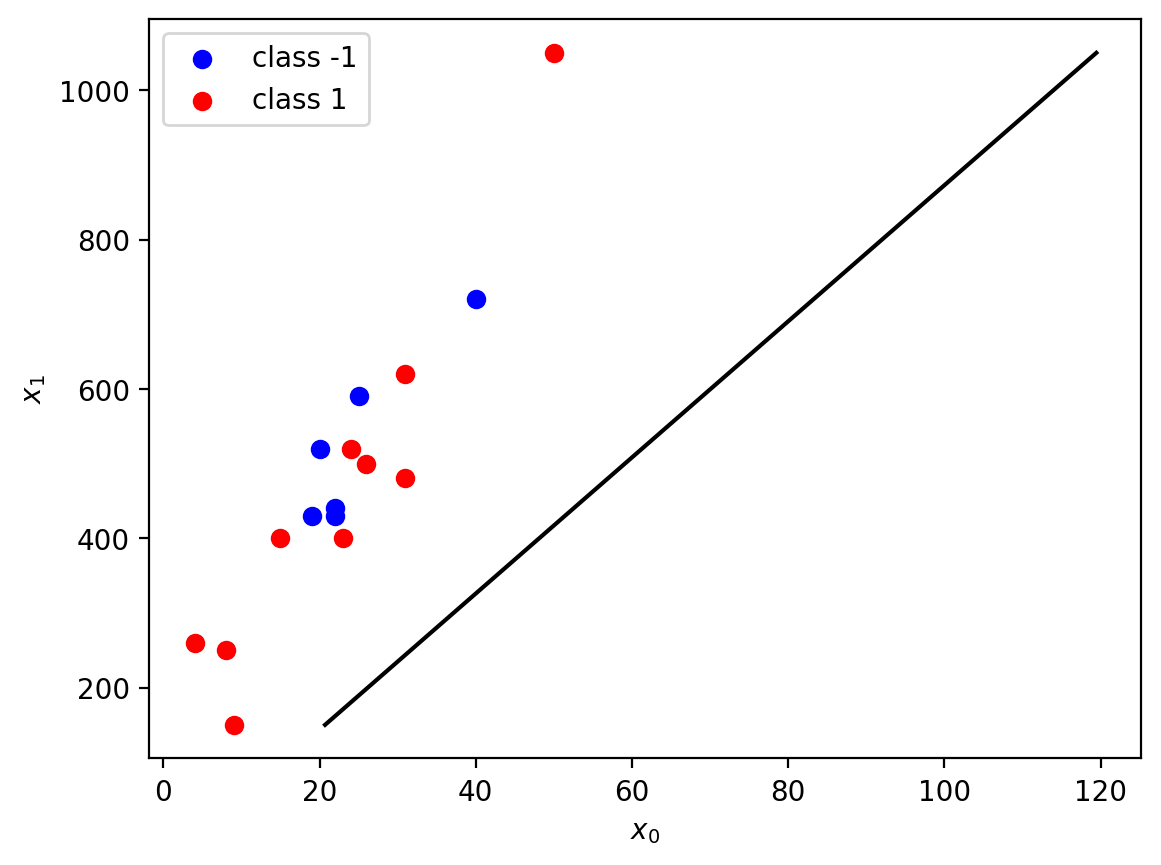

Training error: 0.375




Test #1
C = 1
Decision boundary: -0.015x0+0.002x1+0.355=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


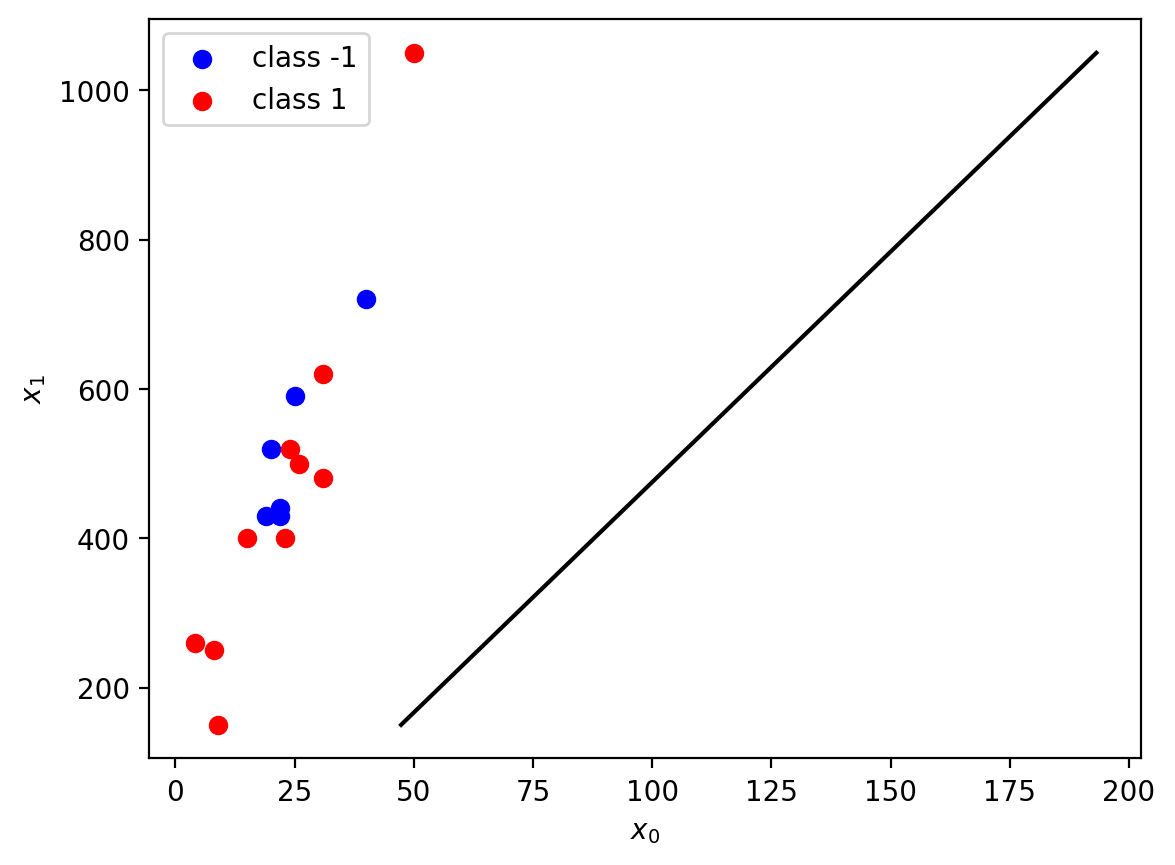

Training error: 0.375




Test #1
C = 10
Decision boundary: -0.009x0+0.005x1+0.356=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


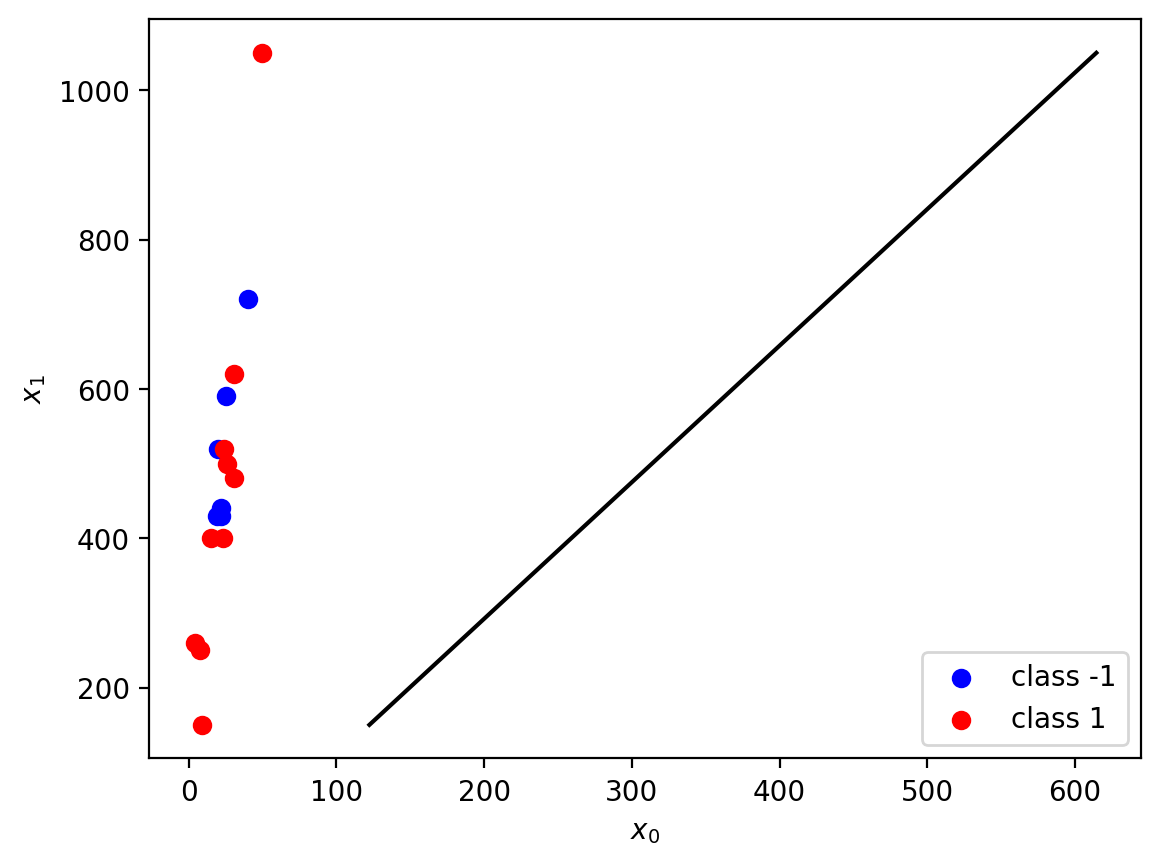

Training error: 0.375




Test #1
C = 100
Decision boundary: -0.009x0+-0.002x1+0.355=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


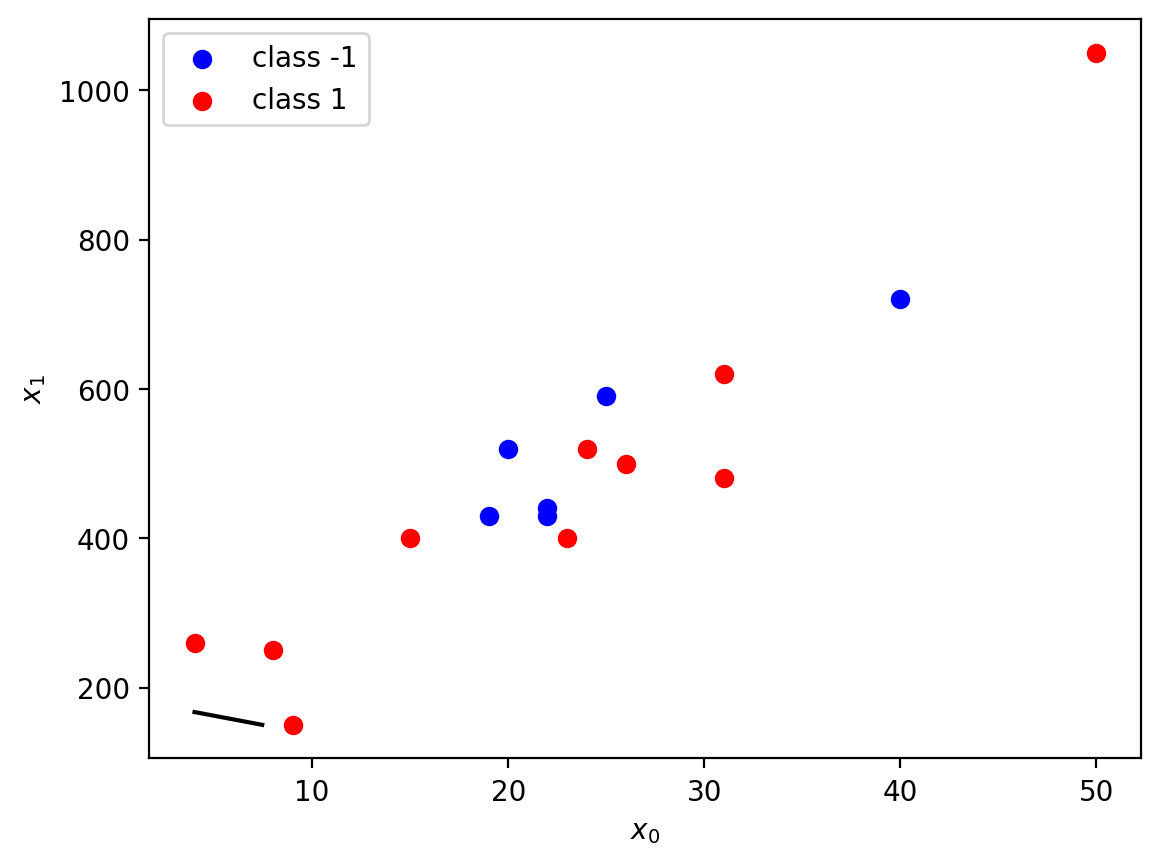

Training error: 0.625




Test #1
C = 1000
Decision boundary: -0.015x0+-0.002x1+0.364=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


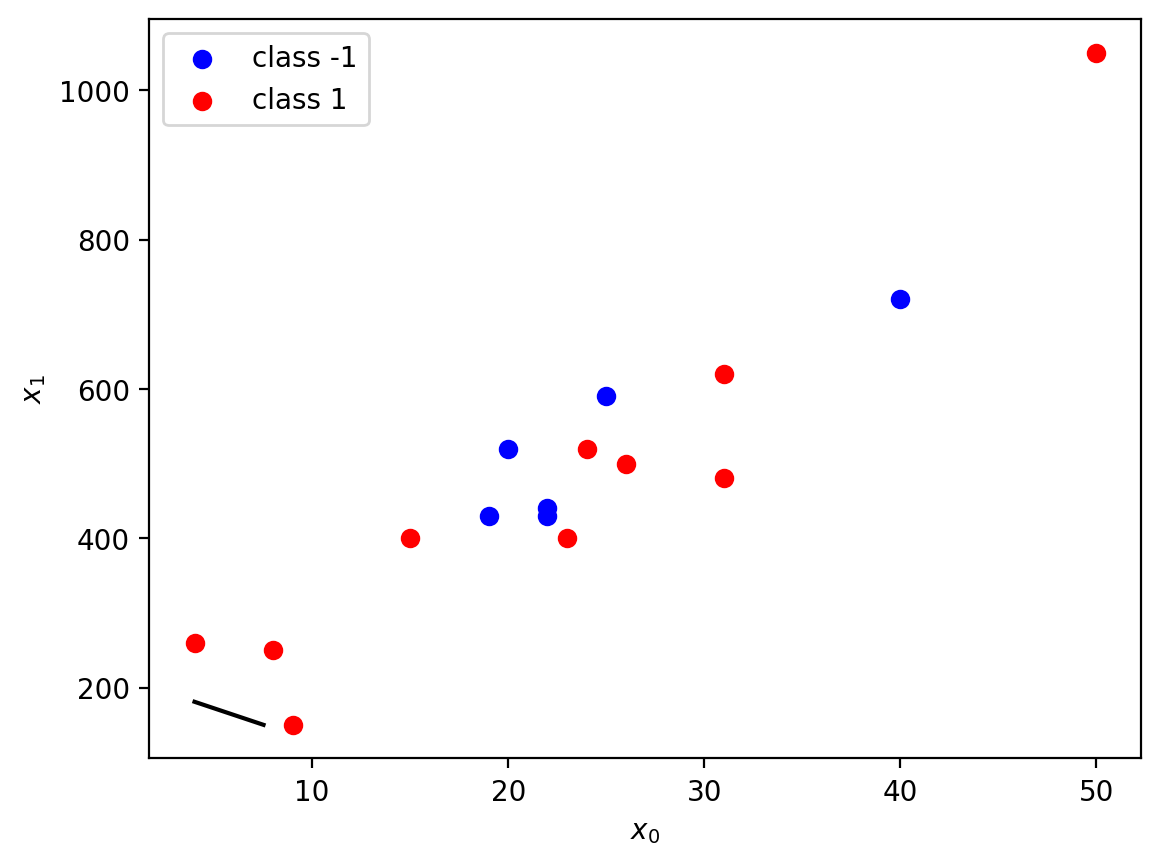

Training error: 0.625




Best parameter C* = 0.1
Decision boundary: -0.040x0+0.004x1+0.169=0


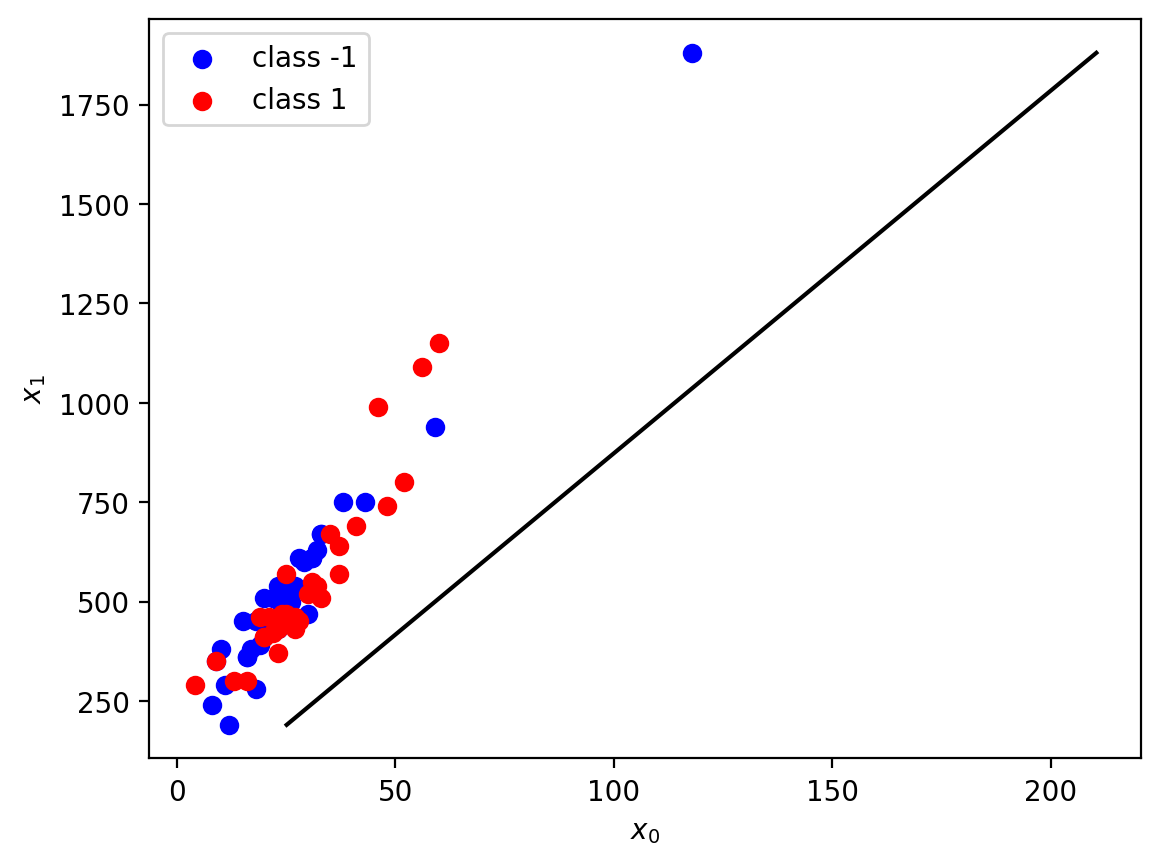

Test error: 0.5223880597014925


In [64]:
svmf(X_train, Y_train, X_test, Y_test)

#### Result #3

In [65]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:17][:,[2,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:17] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[17:85][:,[2,0]]
Y_test = Y_shuffled[17:85]

Test #1
C = 0.1
Decision boundary: 0.157x0+-0.009x1+0.010=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


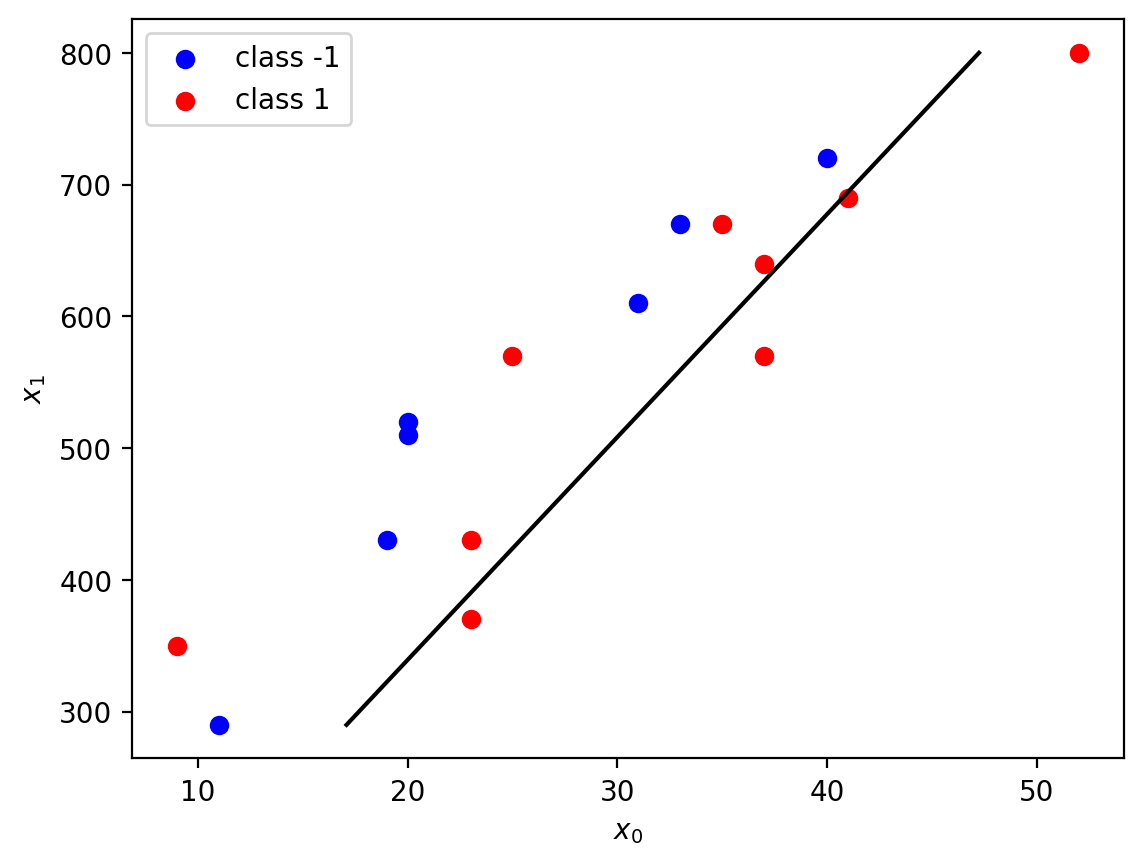

Training error: 0.3125




Test #1
C = 1
Decision boundary: 0.070x0+-0.003x1+0.015=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


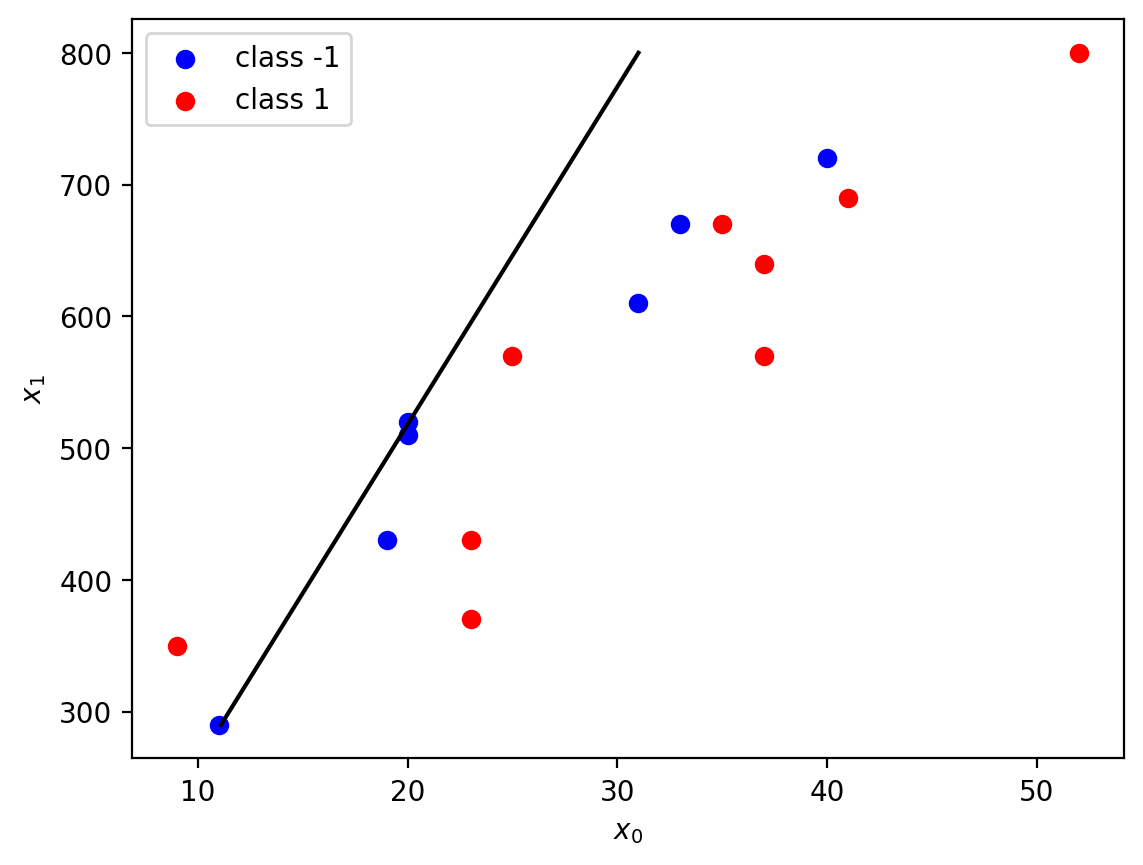

Training error: 0.375




Test #1
C = 10
Decision boundary: 0.069x0+-0.005x1+0.014=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


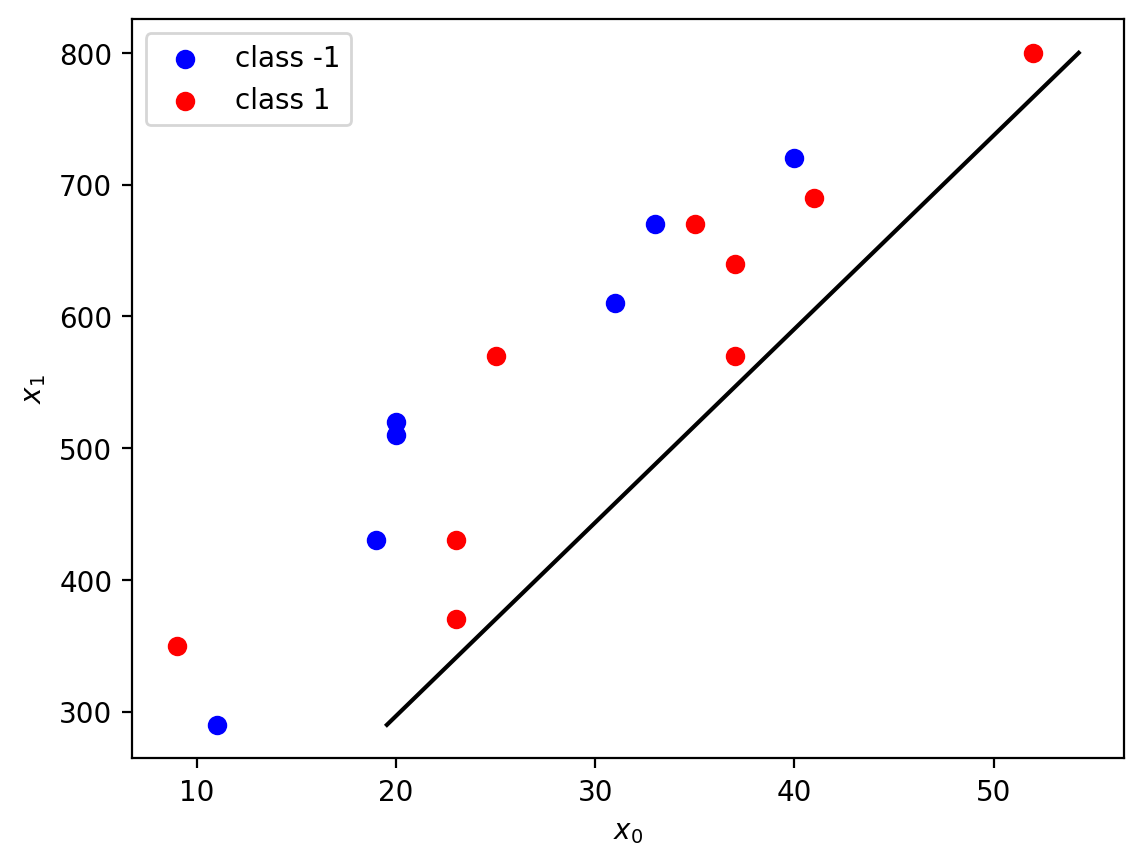

Training error: 0.5625




Test #1
C = 100
Decision boundary: 0.067x0+-0.005x1+0.006=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


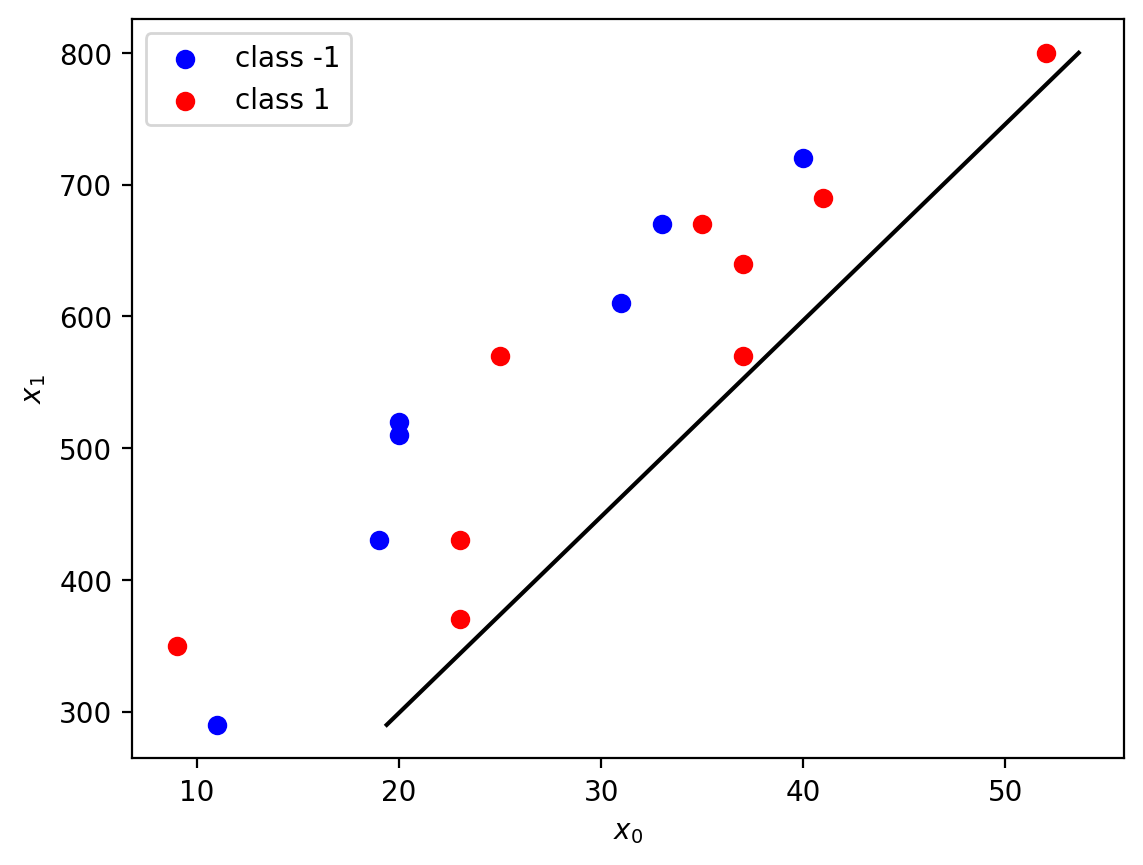

Training error: 0.5625




Test #1
C = 1000
Decision boundary: 0.064x0+-0.002x1+0.017=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


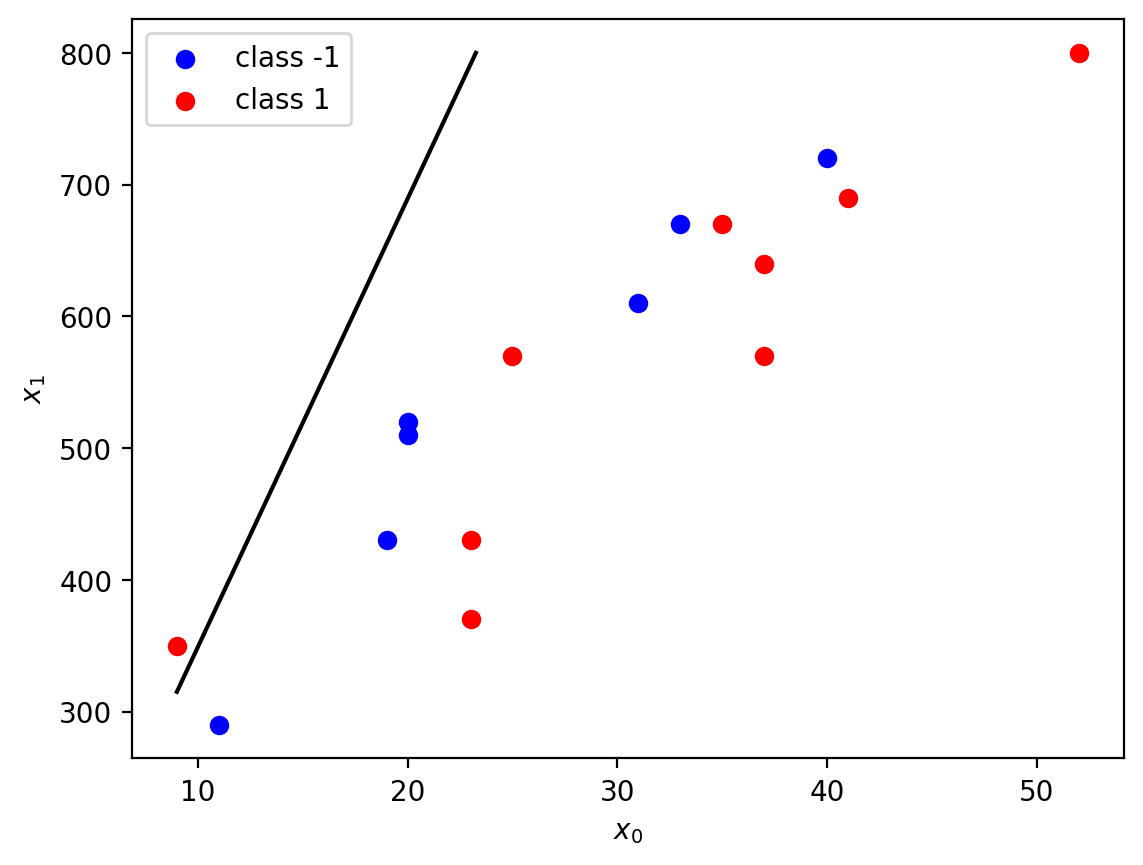

Training error: 0.5




Best parameter C* = 0.1
Decision boundary: 0.157x0+-0.009x1+0.010=0


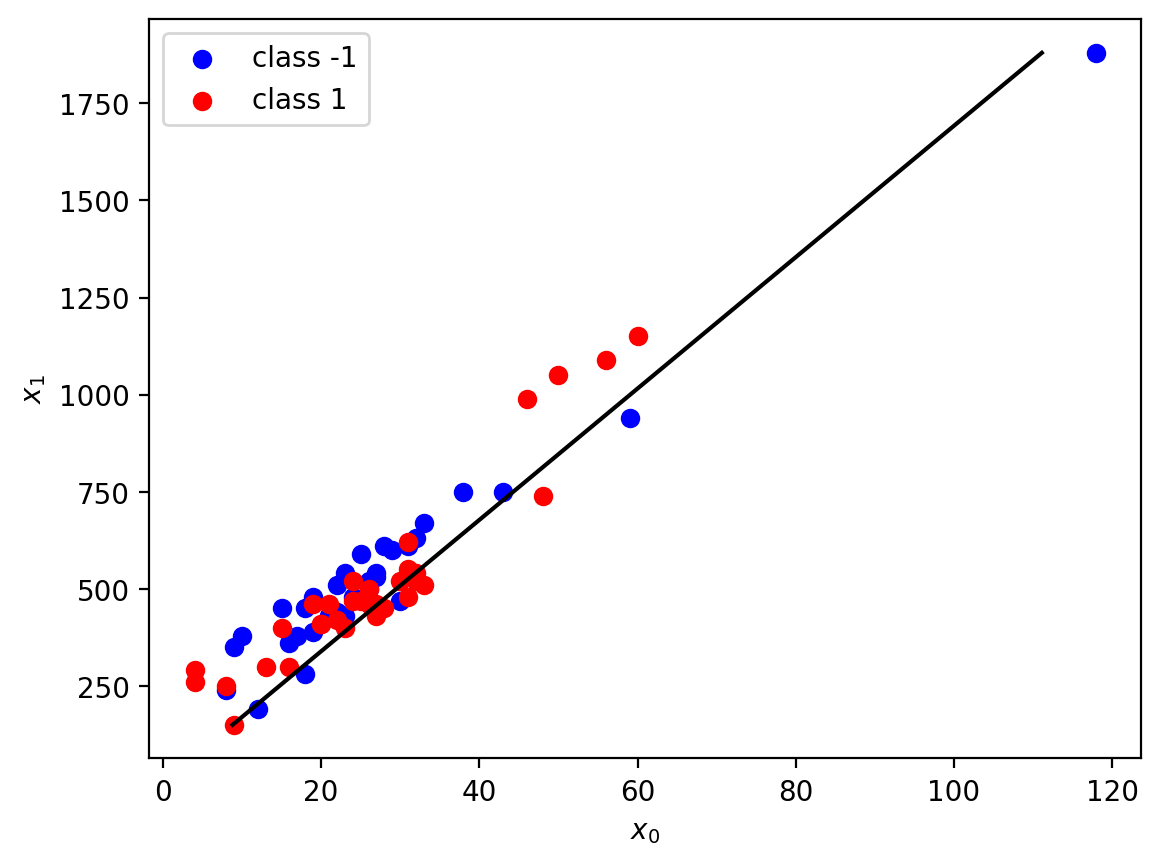

Test error: 0.4477611940298507


In [66]:
svmf(X_train, Y_train, X_test, Y_test)

In [67]:
totalr_training_data212 = r_training_data2/3
totalr_testing_data212 = r_testing_data2/3
r_training_data2 = 0
r_testing_data2 = 0
print("Training average :",totalr_training_data212)
print("Training average :",totalr_testing_data212)

Training average : 0.3541666666666667
Training average : 0.5024875621890547


### Decision Tree

#### Result #1

In [68]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:17][:,[2,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:17] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[17:85][:,[2,0]]
Y_test = Y_shuffled[17:85]

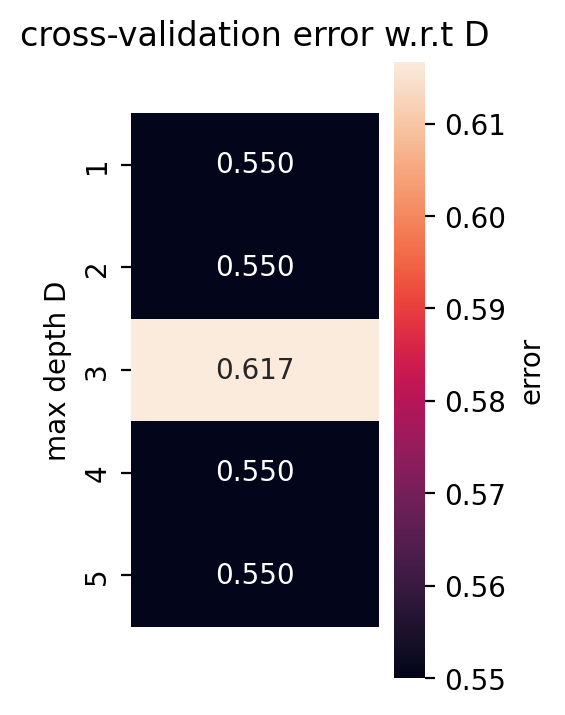

Best max depth D: {'max_depth': 1}
Training error: 0.25
Test error: 0.4626865671641791


In [69]:
trees(X_train,Y_train,X_test,Y_test)

#### Result #2

In [70]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:17][:,[2,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:17] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[17:85][:,[2,0]]
Y_test = Y_shuffled[17:85]

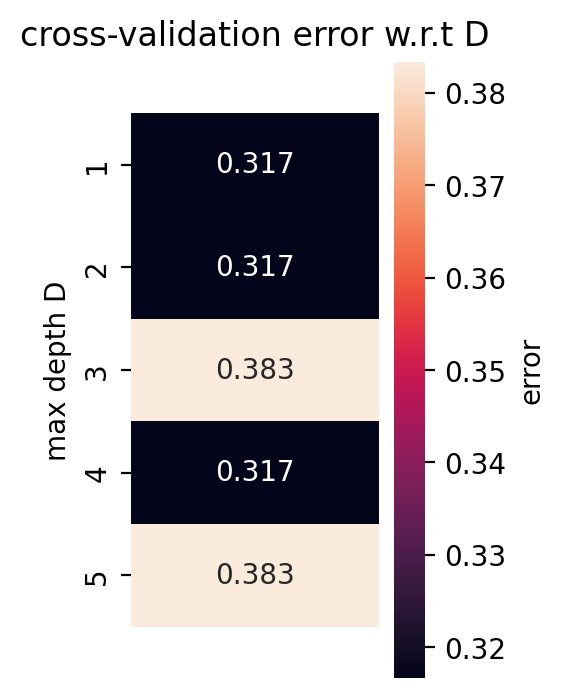

Best max depth D: {'max_depth': 1}
Training error: 0.3125
Test error: 0.5522388059701493


In [71]:
trees(X_train,Y_train,X_test,Y_test)

#### Result #3

In [72]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:17][:,[2,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:17] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[17:85][:,[2,0]]
Y_test = Y_shuffled[17:85]

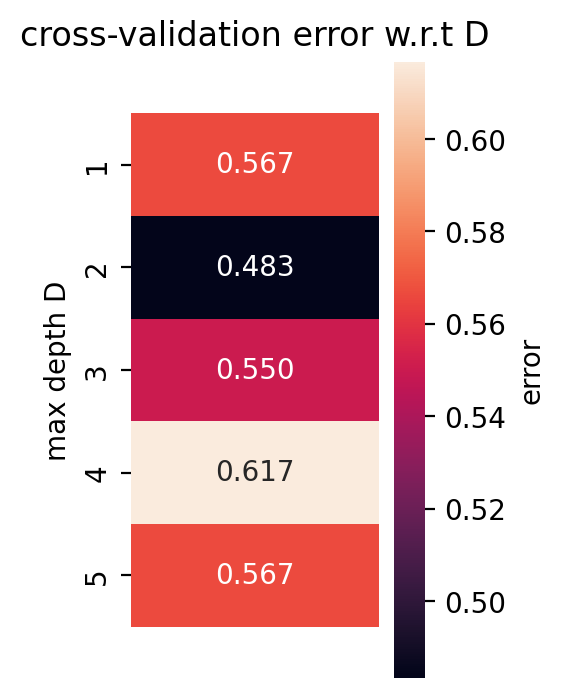

Best max depth D: {'max_depth': 2}
Training error: 0.3125
Test error: 0.4925373134328358


In [73]:
trees(X_train,Y_train,X_test,Y_test)

In [74]:
totalr_training_data213 = r_training_data3/3
totalr_testing_data213 = r_testing_data3/3
r_training_data3 = 0
r_testing_data3 = 0
print("Training average :",totalr_training_data213)
print("Training average :",totalr_testing_data213)

Training average : 0.2916666666666667
Training average : 0.5024875621890548


## Partition 2

### Logistic regression classifier

#### Result #1

In [75]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]
    
X_train = X_shuffled[:67][:,[2,0]]
Y_train = Y_shuffled[:67]
X_test  = X_shuffled[67:85][:,[2,0]]
Y_test  = Y_shuffled[67:85]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 124.426x0+-13.112x1+10.791=0


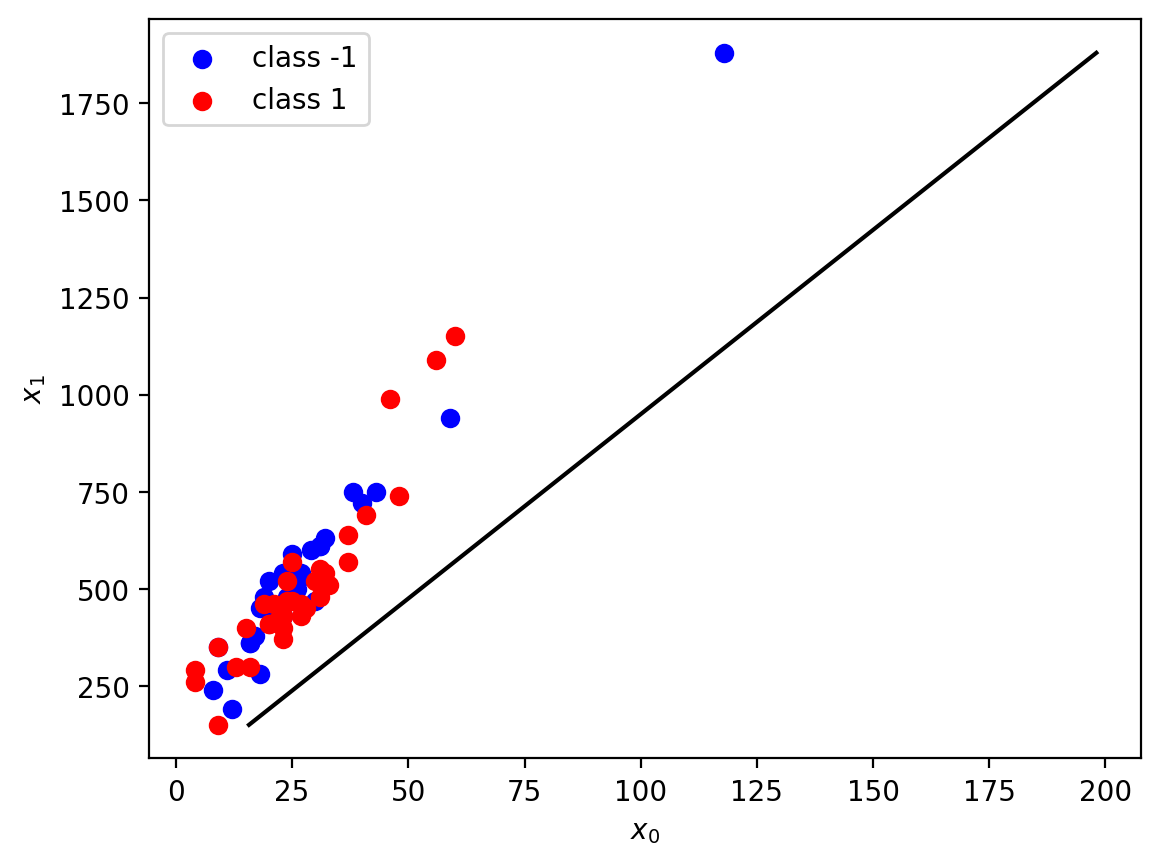

Training error: 0.5223880597014925


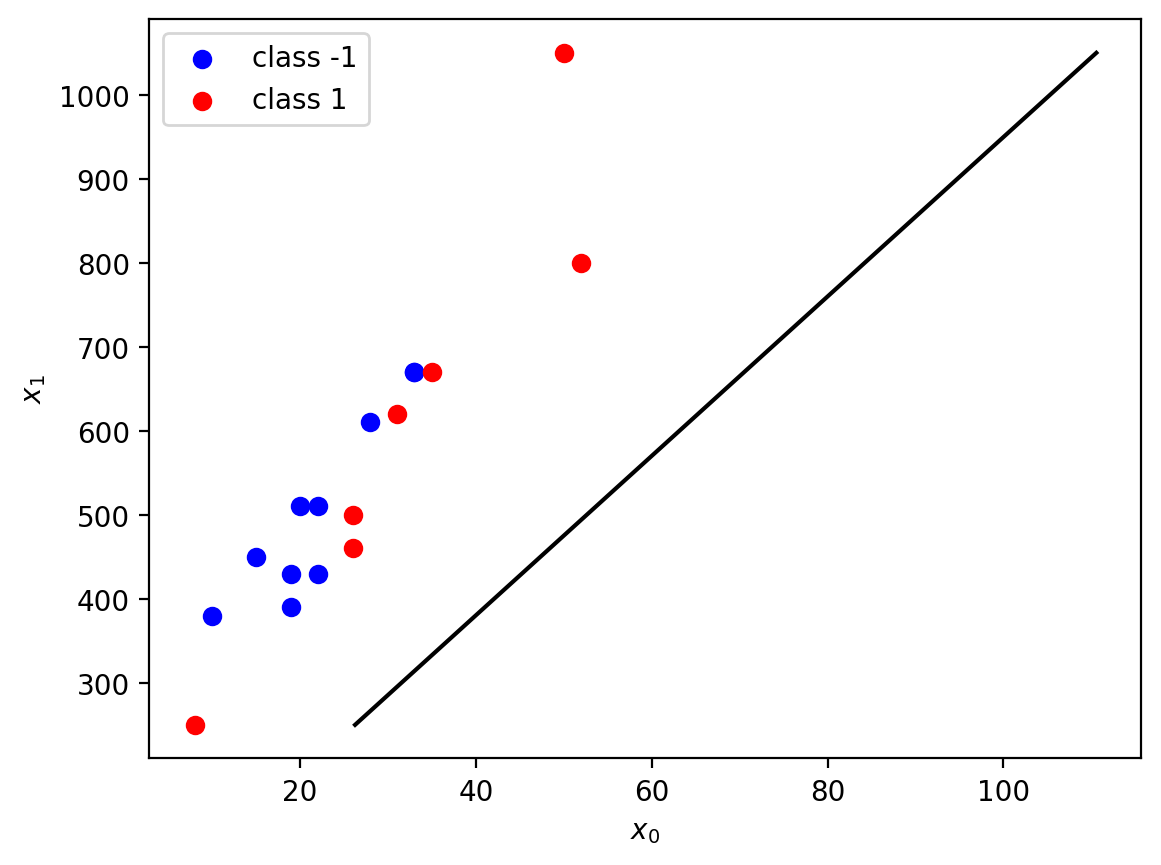

Test error: 0.4117647058823529


In [76]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #2

In [77]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]
    
X_train = X_shuffled[:67][:,[2,0]]
Y_train = Y_shuffled[:67]
X_test  = X_shuffled[67:85][:,[2,0]]
Y_test  = Y_shuffled[67:85]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 70.219x0+-1.908x1+6.723=0


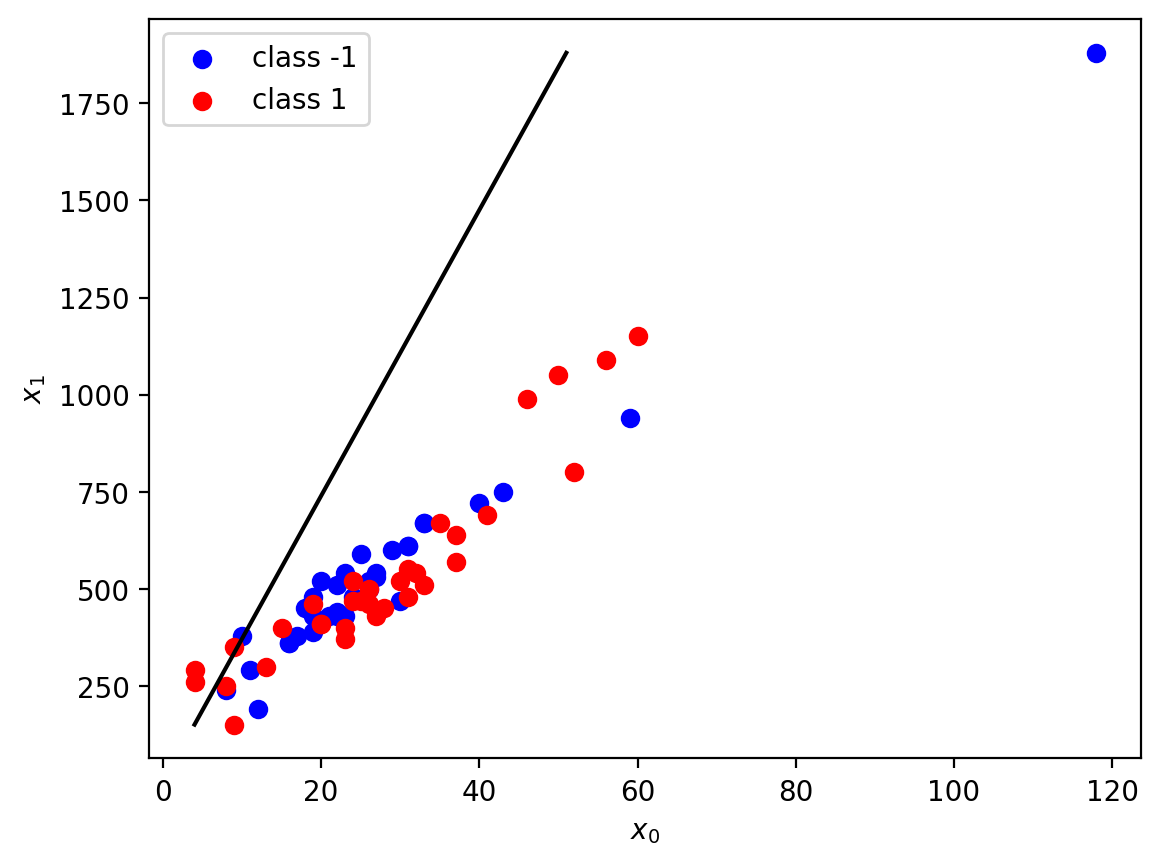

Training error: 0.5373134328358209


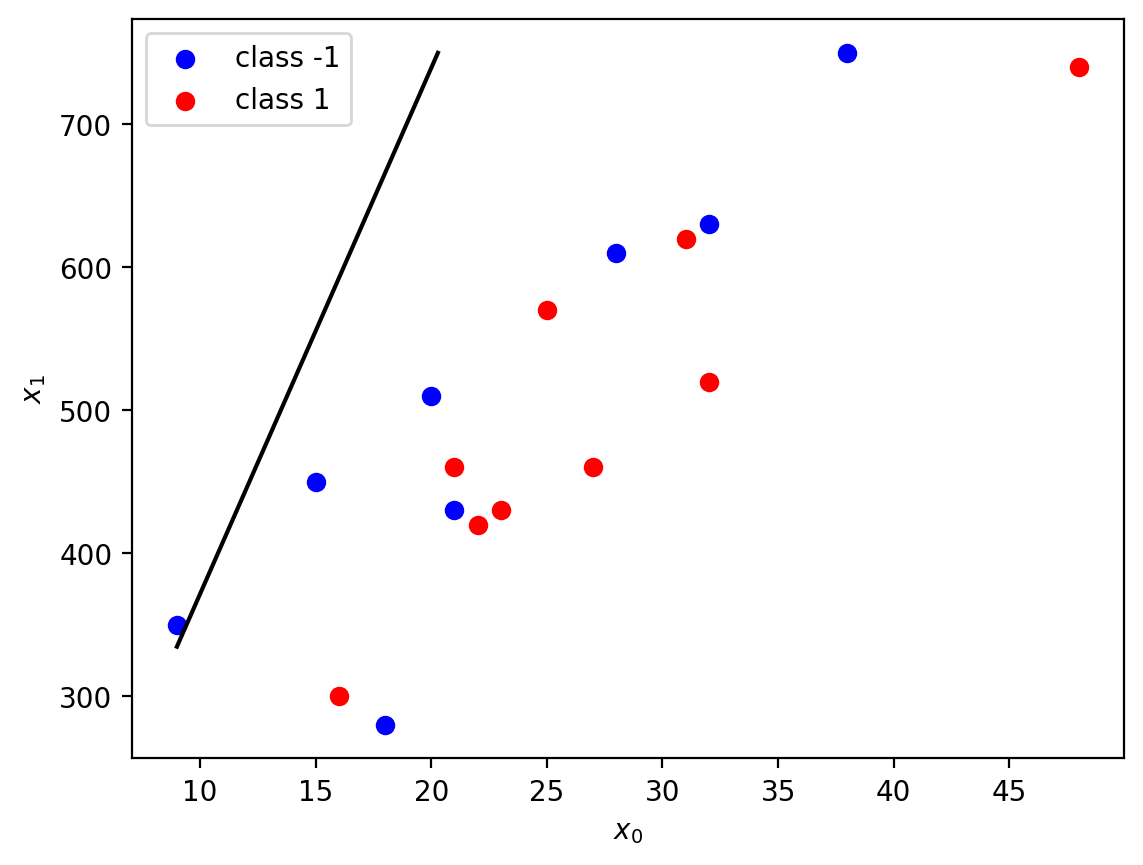

Test error: 0.4117647058823529


In [78]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #3

In [79]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]
    
X_train = X_shuffled[:67][:,[2,0]]
Y_train = Y_shuffled[:67]
X_test  = X_shuffled[67:85][:,[2,0]]
Y_test  = Y_shuffled[67:85]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 167.079x0+-10.533x1+-1.760=0


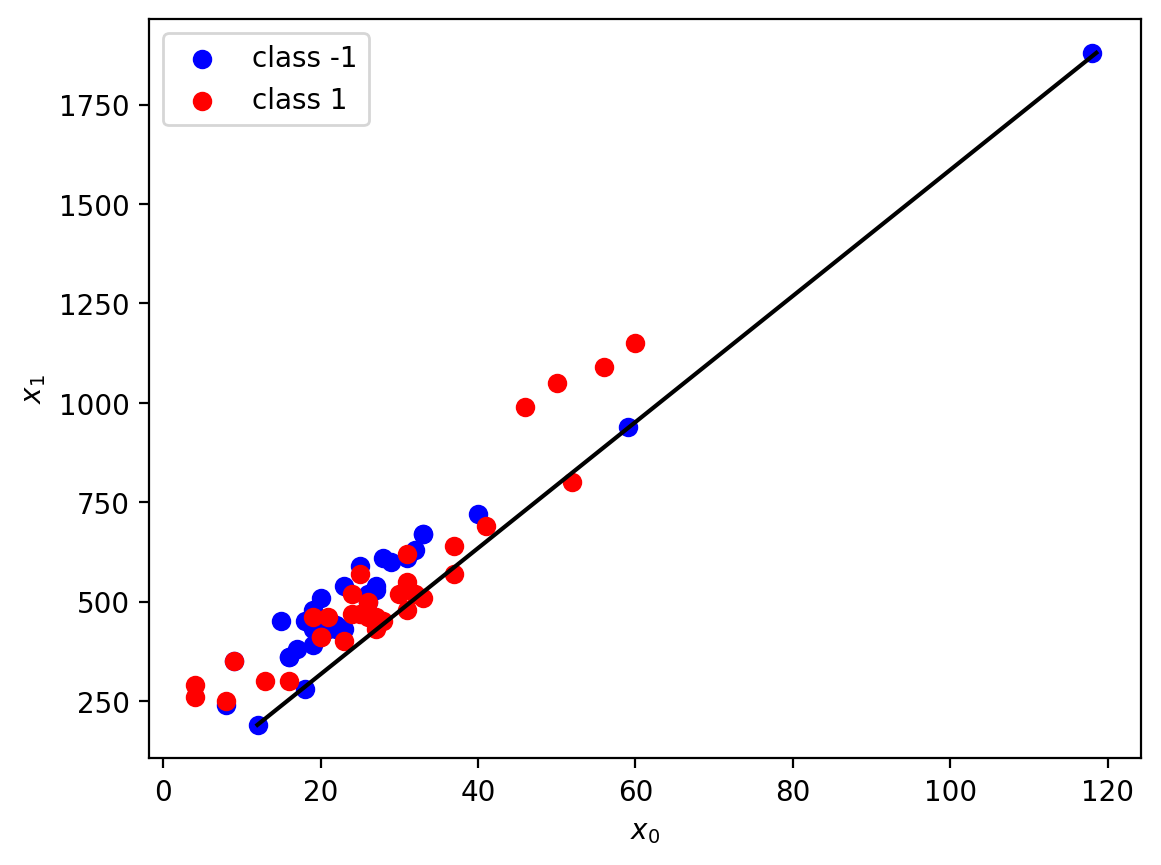

Training error: 0.47761194029850745


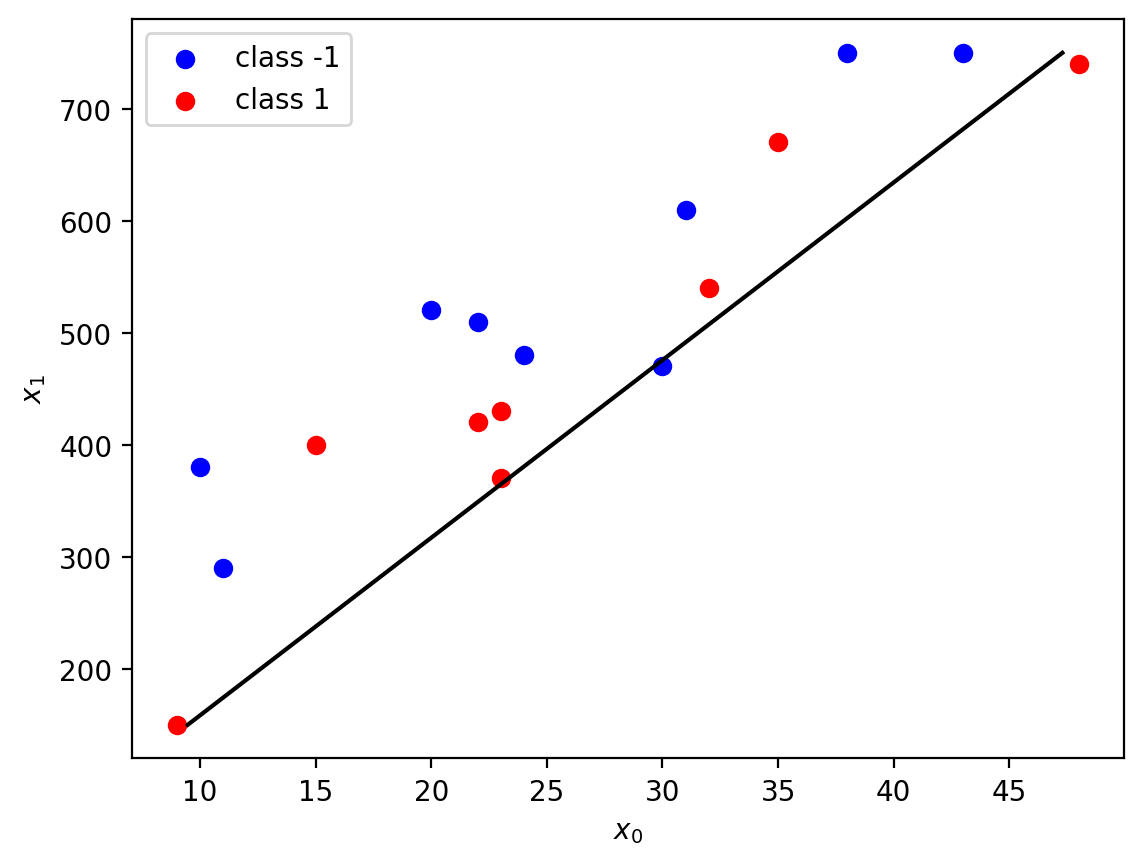

Test error: 0.47058823529411764


In [80]:
logreg(X_train,Y_train, X_test, Y_test)

In [81]:
totalr_training_data221 = r_training_data1/3
totalr_testing_data221 = r_testing_data1/3
r_training_data1 = 0
r_testing_data1 = 0
print("Training average :",totalr_training_data221)
print("Training average :",totalr_testing_data221)

Training average : 0.5124378109452736
Training average : 0.4313725490196078


### Support Vector Machines

#### Result #1

In [82]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:67][:,[2,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:67] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[67:85][:,[2,0]]
Y_test = Y_shuffled[67:85]

Test #1
C = 0.1
Decision boundary: 0.082x0+-0.006x1+0.114=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


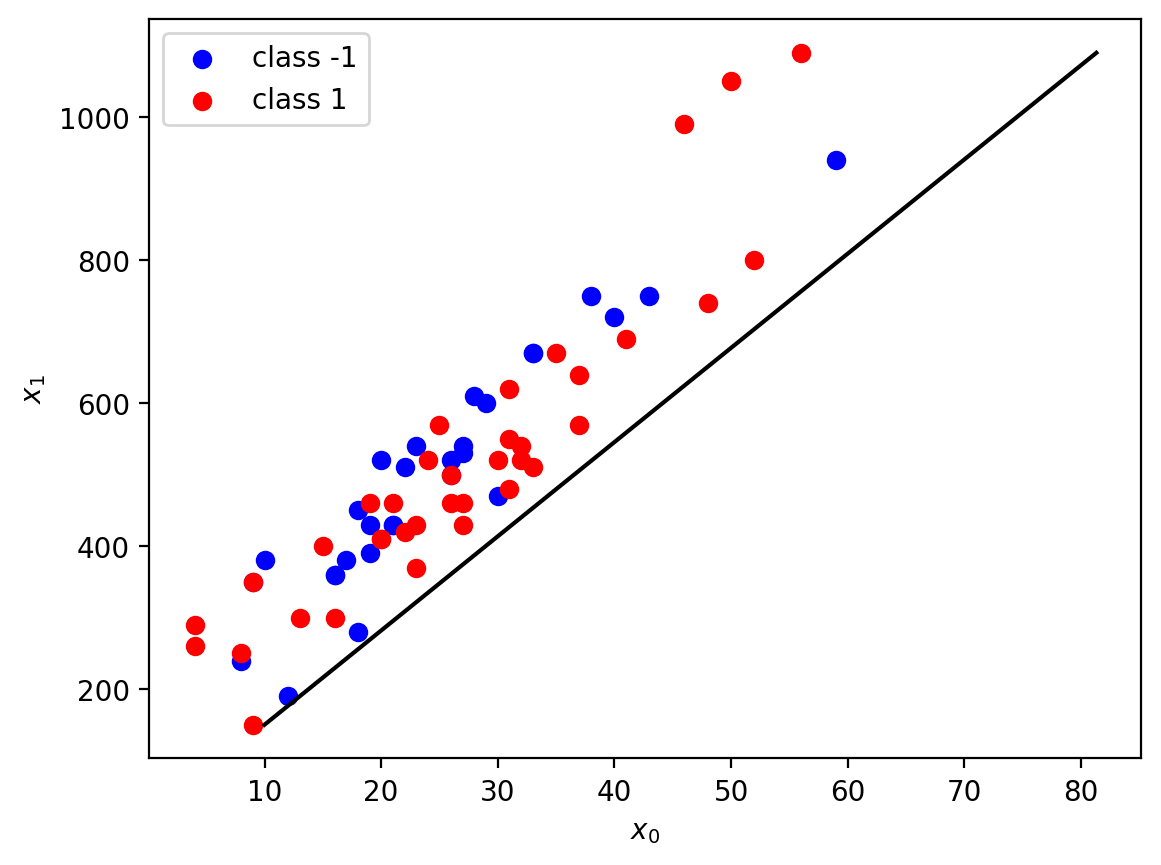

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.5606060606060606




Test #1
C = 1
Decision boundary: 0.009x0+0.001x1+0.155=0


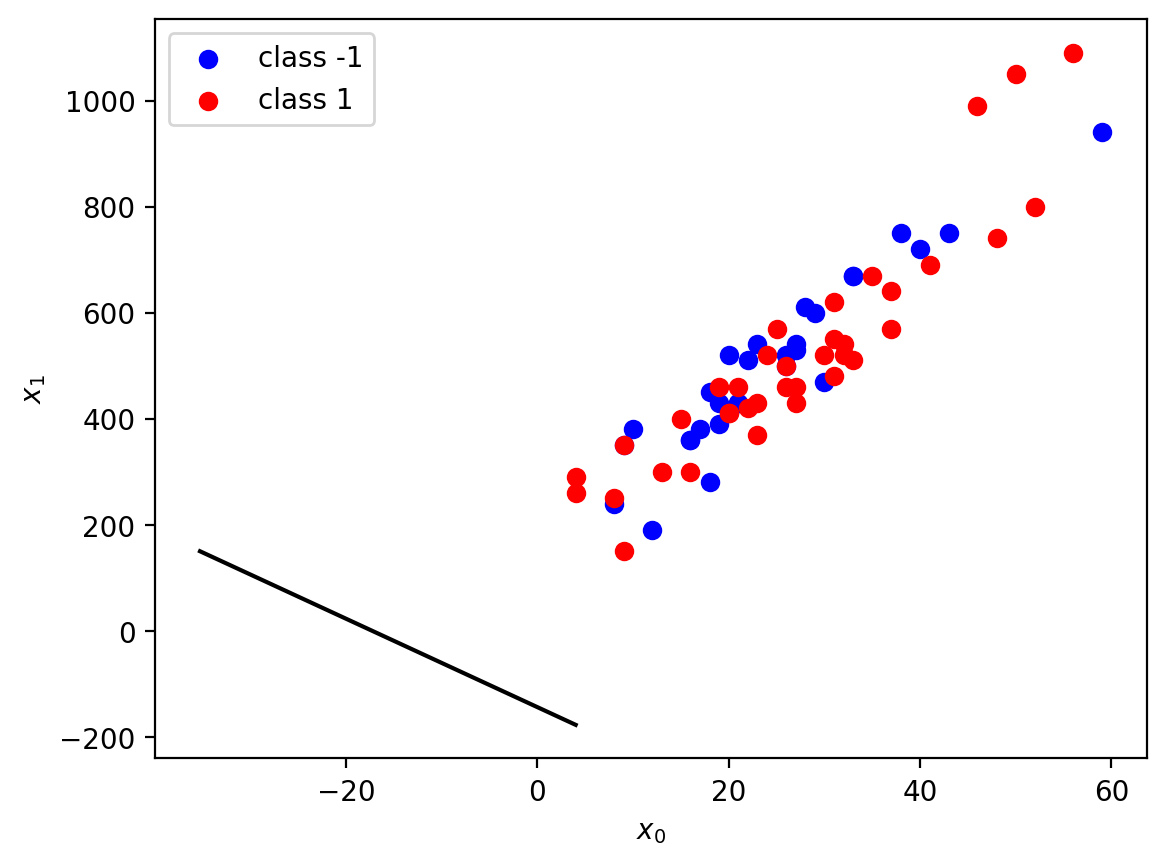

Training error: 0.43939393939393945




Test #1
C = 10
Decision boundary: 0.010x0+0.001x1+0.161=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


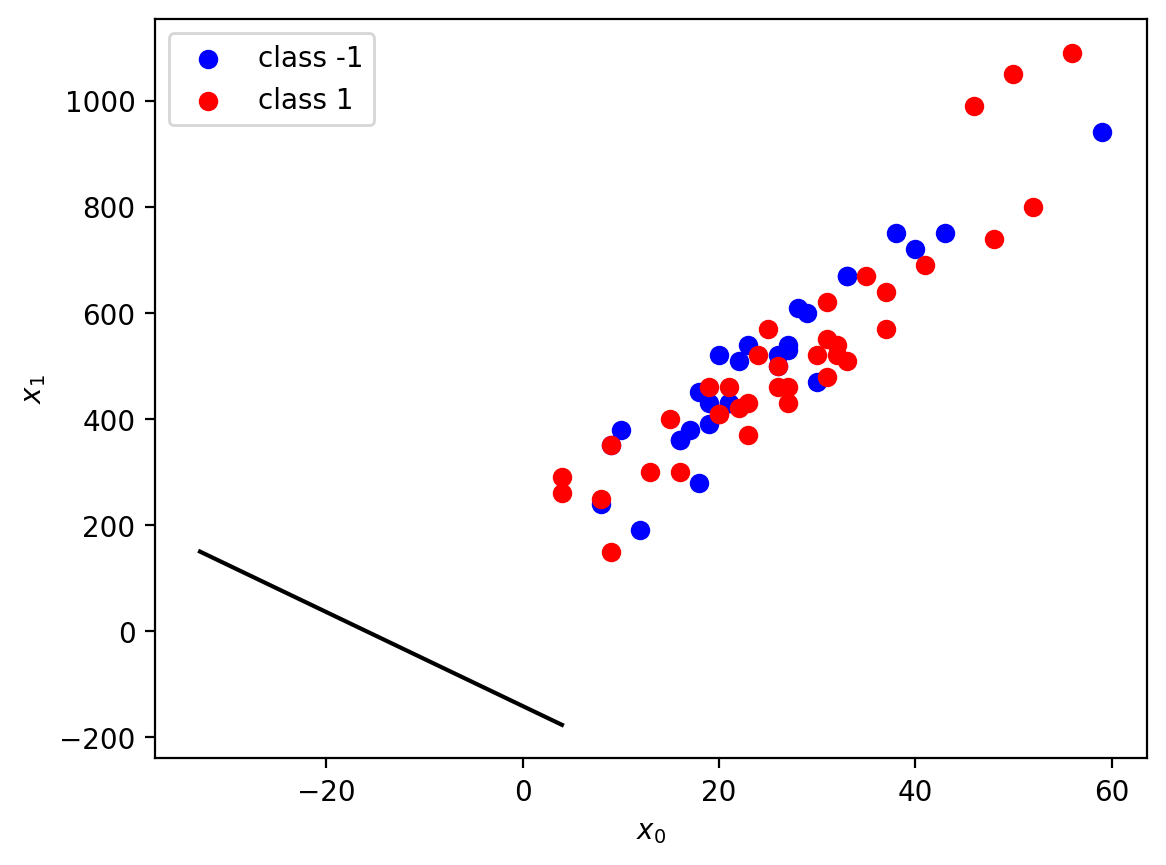

Training error: 0.43939393939393945




Test #1
C = 100
Decision boundary: 0.011x0+-0.003x1+0.154=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


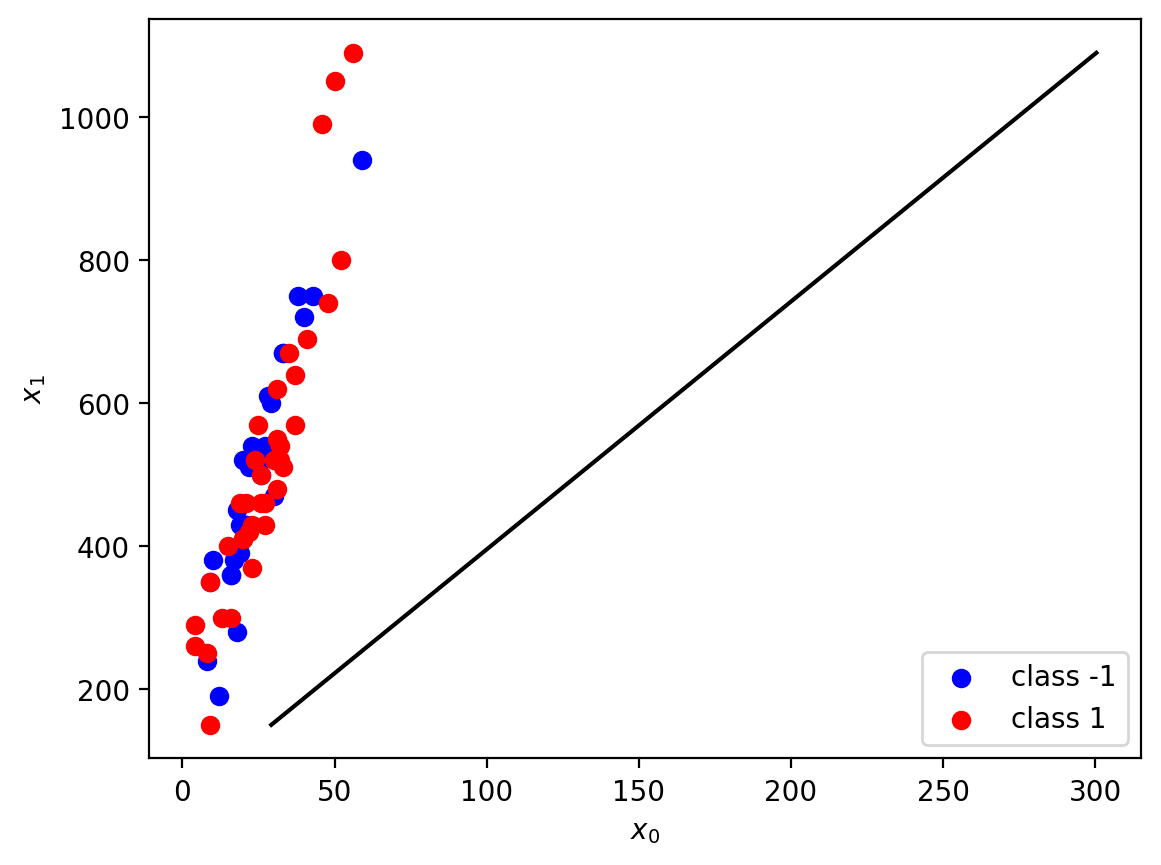

Training error: 0.5606060606060606




Test #1
C = 1000
Decision boundary: 0.012x0+-0.002x1+0.160=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


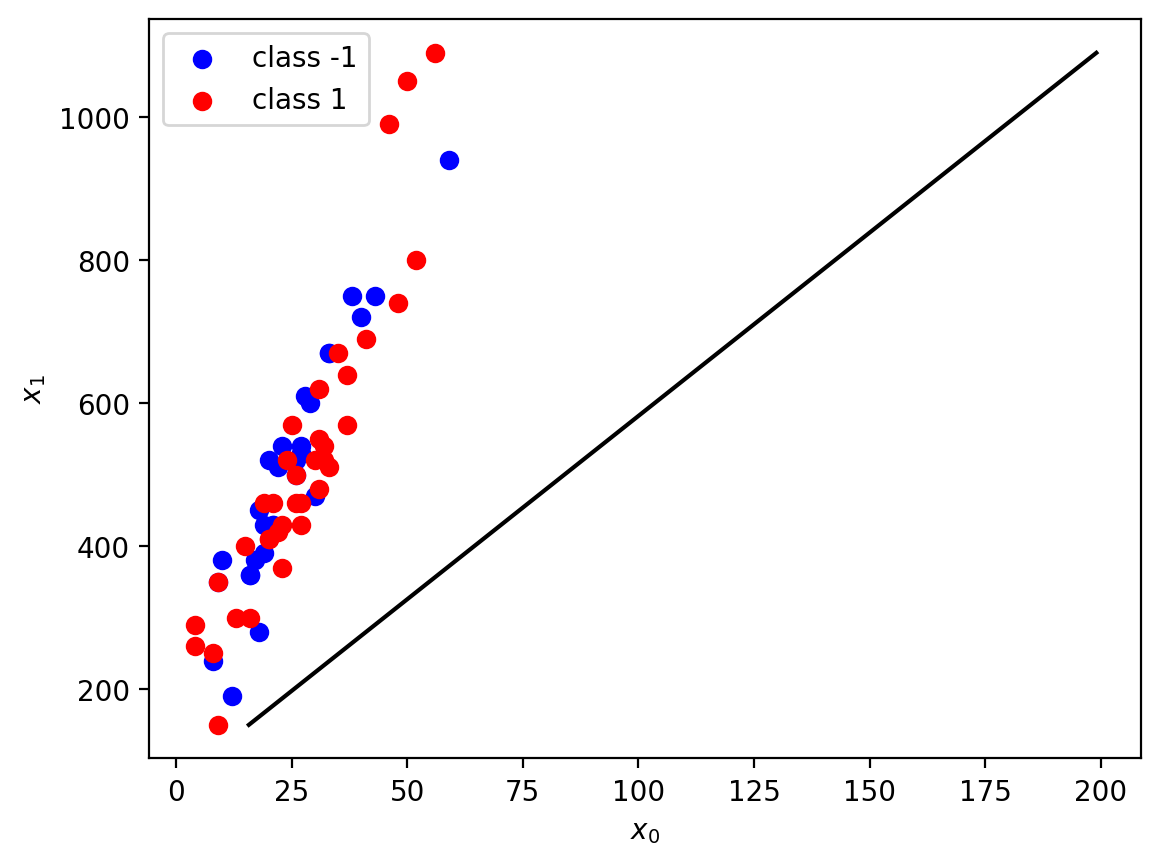

Training error: 0.5606060606060606




Best parameter C* = 1
Decision boundary: 0.009x0+0.001x1+0.155=0


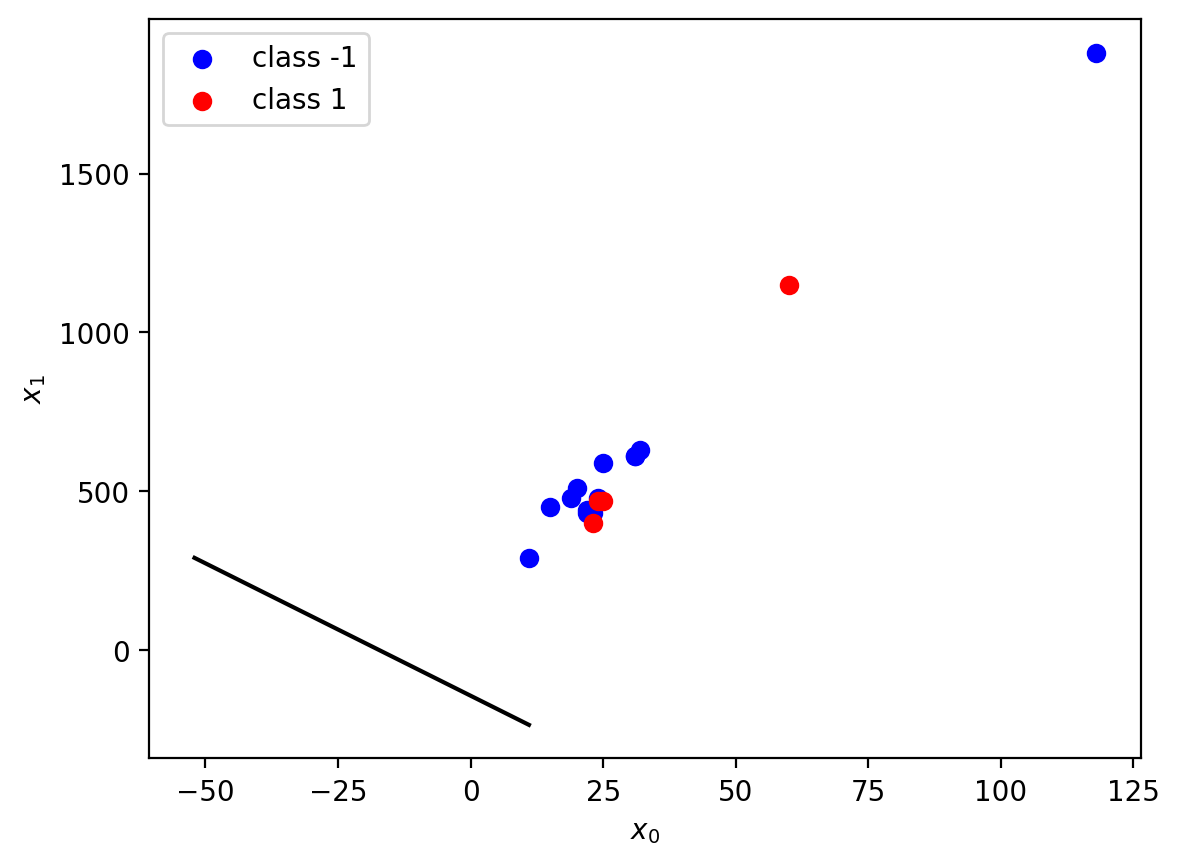

Test error: 0.7647058823529411


In [83]:
svmf(X_train,Y_train, X_test, Y_test)

#### Result #2

In [84]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:67][:,[2,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:67] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[67:85][:,[2,0]]
Y_test = Y_shuffled[67:85]

Test #1
C = 0.1
Decision boundary: 0.128x0+-0.008x1+0.147=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


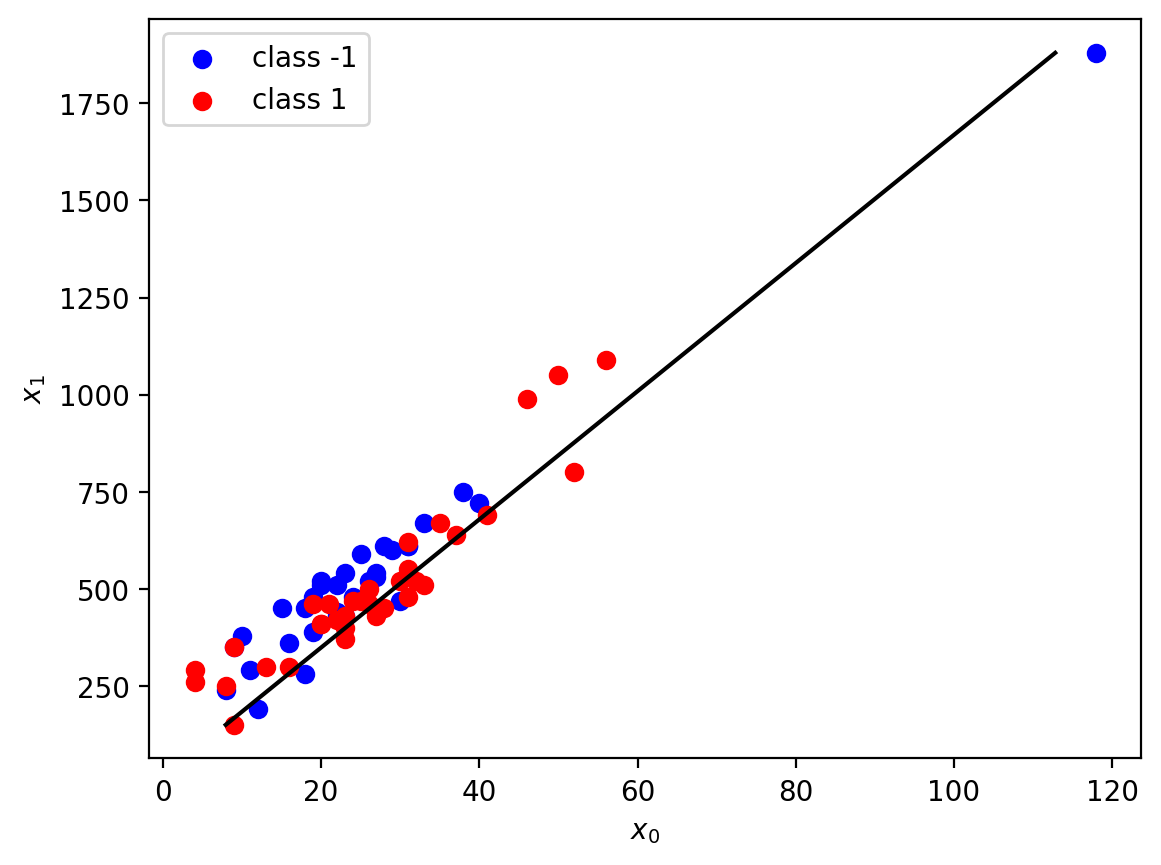

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.43939393939393945




Test #1
C = 1
Decision boundary: 0.026x0+0.000x1+0.189=0


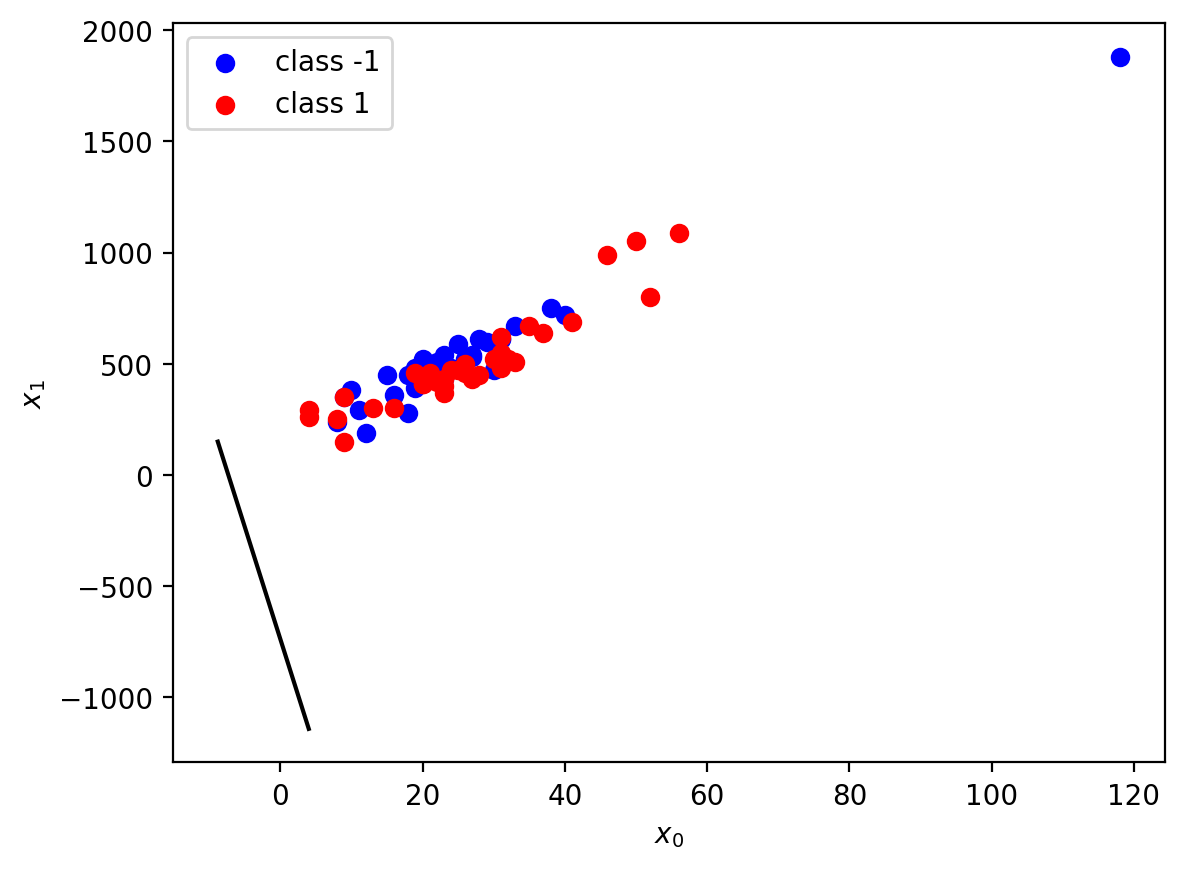

Training error: 0.48484848484848486




Test #1
C = 10
Decision boundary: 0.024x0+0.002x1+0.185=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


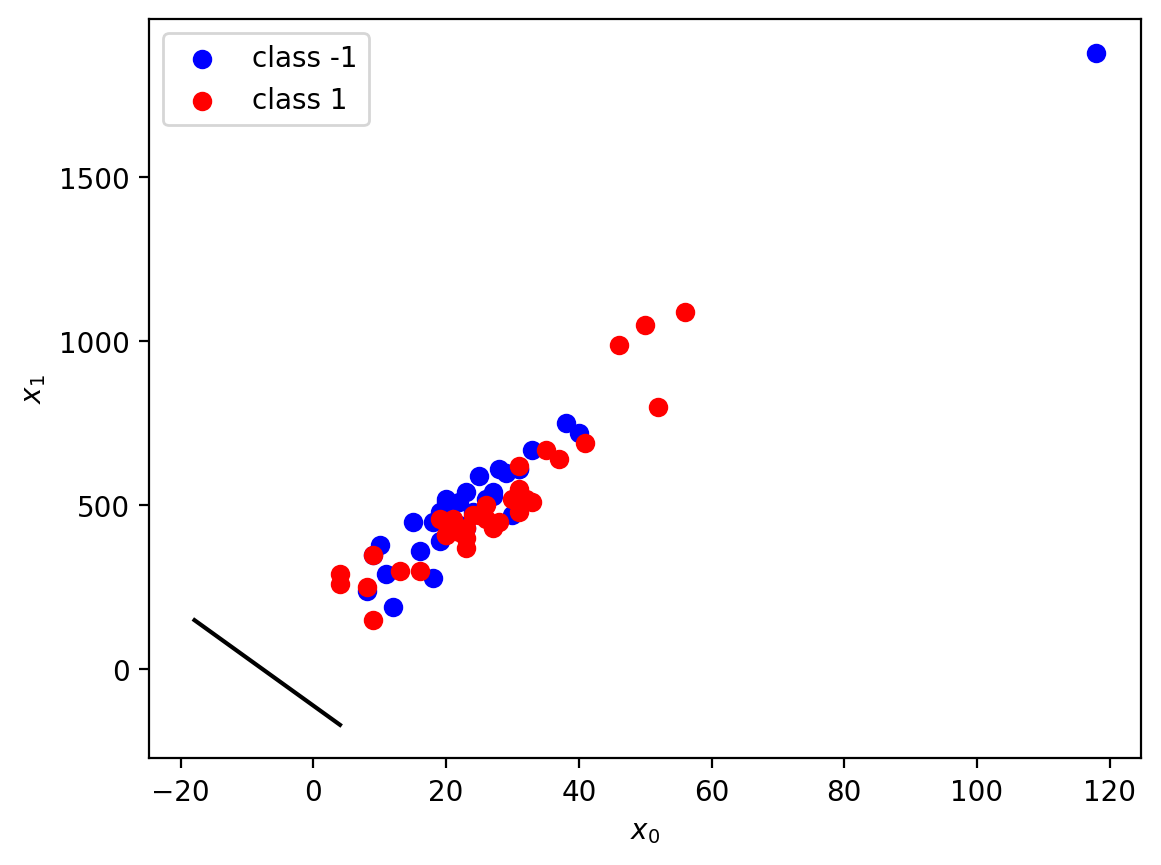

Training error: 0.48484848484848486




Test #1
C = 100
Decision boundary: 0.025x0+0.001x1+0.214=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


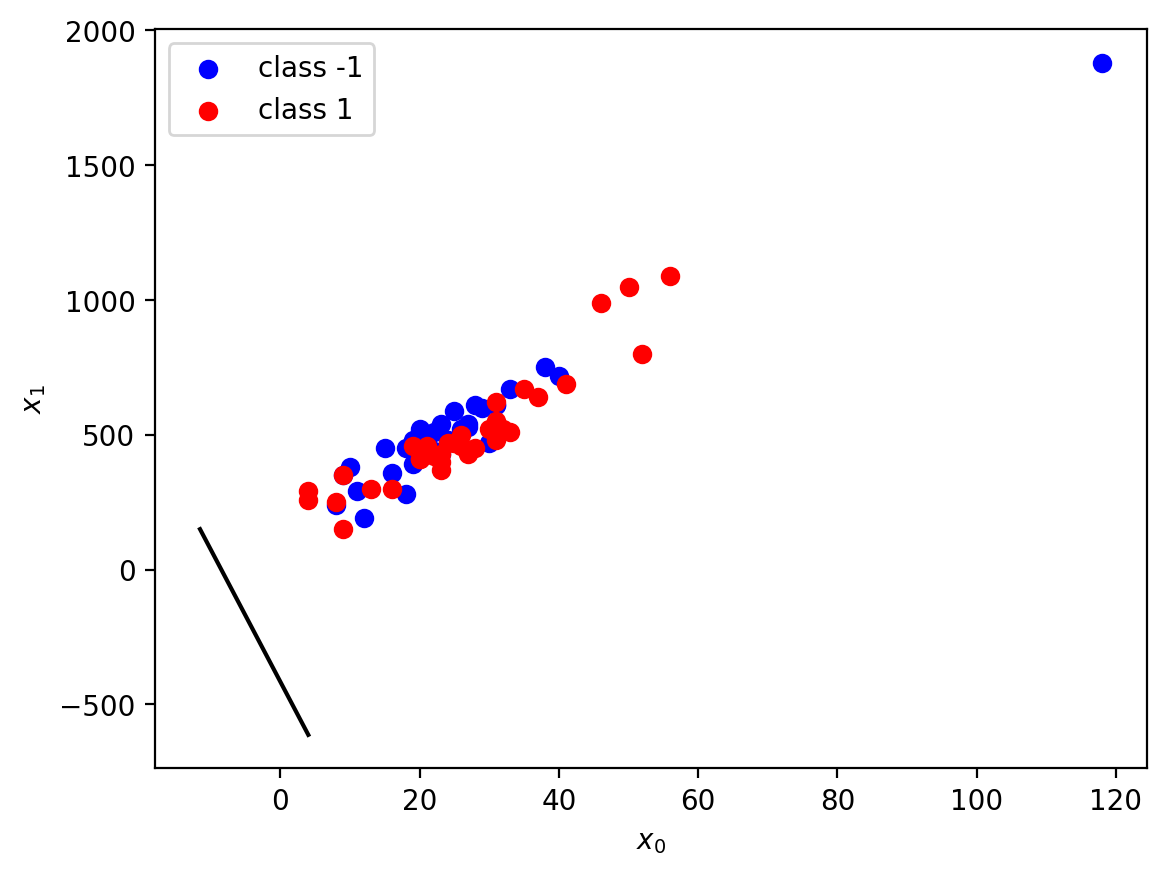

Training error: 0.48484848484848486




Test #1
C = 1000
Decision boundary: 0.021x0+0.001x1+0.191=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


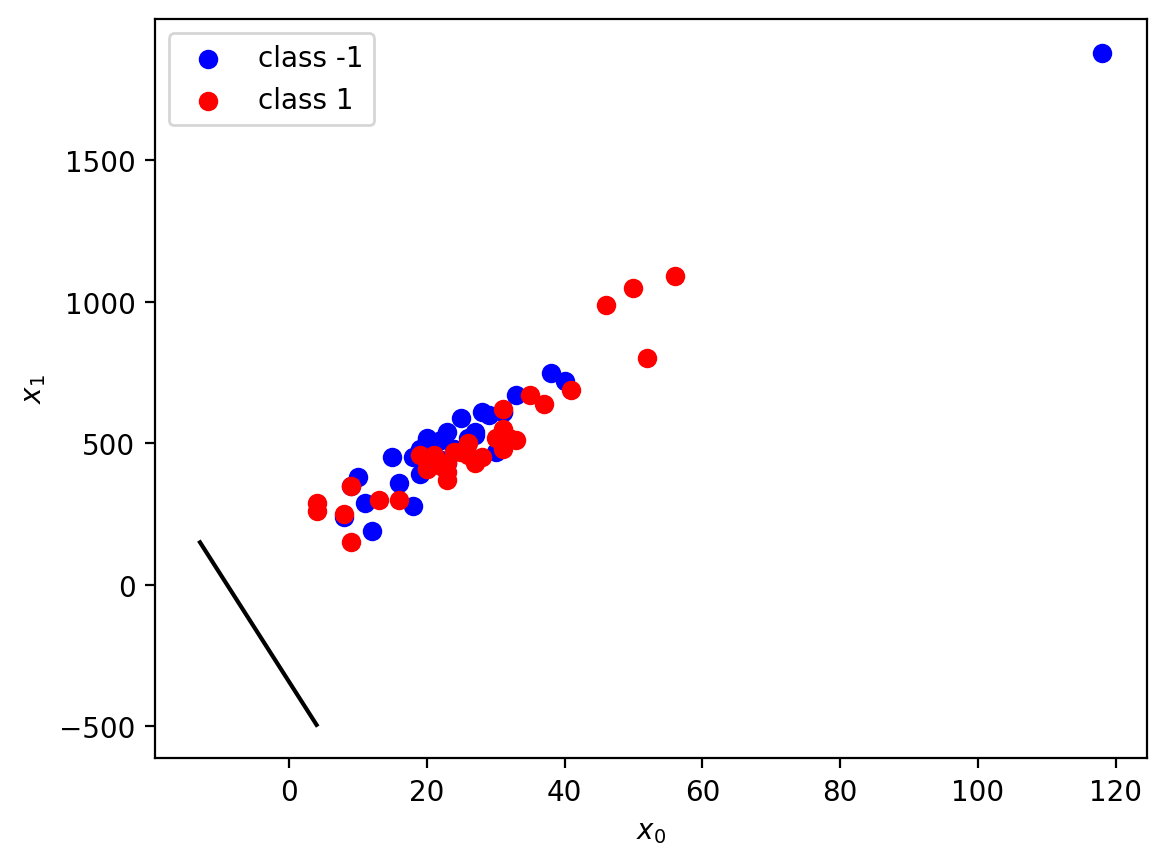

Training error: 0.48484848484848486




Best parameter C* = 0.1
Decision boundary: 0.128x0+-0.008x1+0.147=0


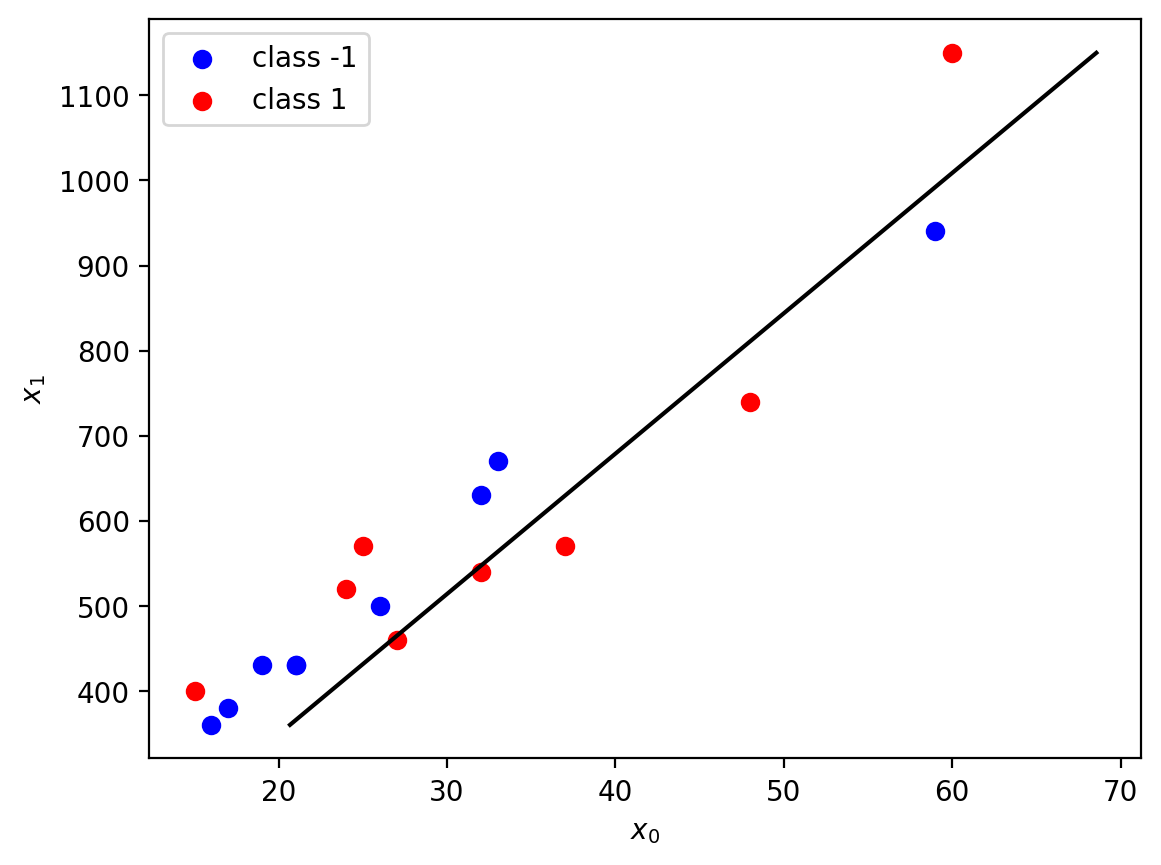

Test error: 0.2941176470588235


In [85]:
svmf(X_train,Y_train, X_test, Y_test)

#### Result #3

In [86]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:67][:,[2,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:67] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[67:85][:,[2,0]]
Y_test = Y_shuffled[67:85]

Test #1
C = 0.1
Decision boundary: 0.107x0+-0.003x1+0.066=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


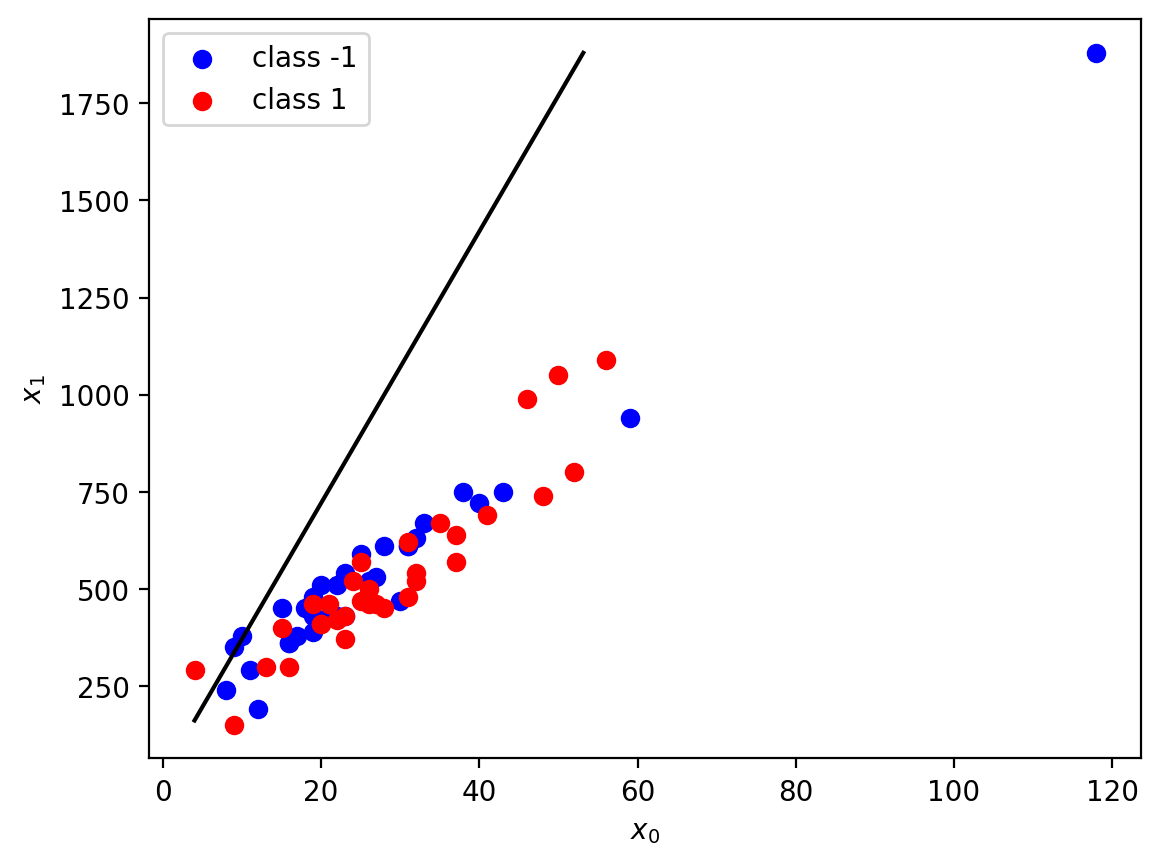

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.5




Test #1
C = 1
Decision boundary: 0.068x0+-0.005x1+0.117=0


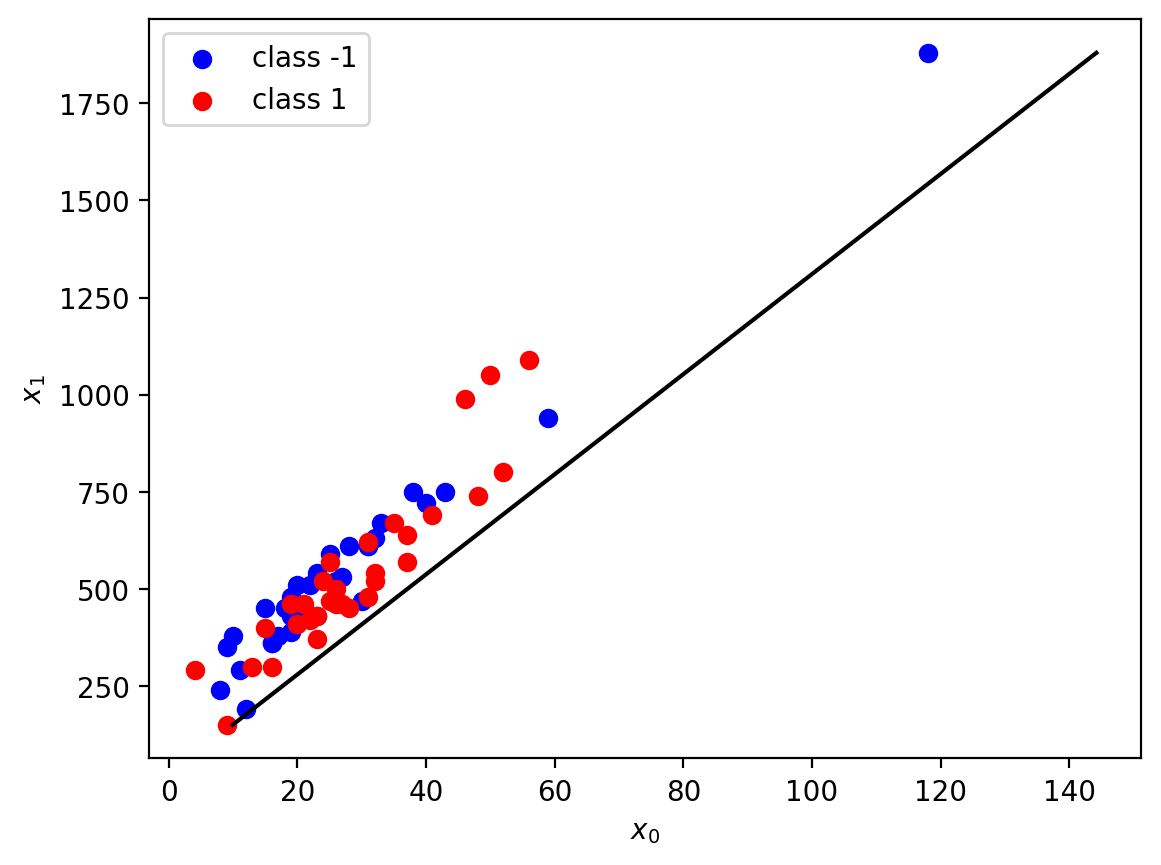

Training error: 0.48484848484848486




Test #1
C = 10
Decision boundary: 0.066x0+0.000x1+0.117=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


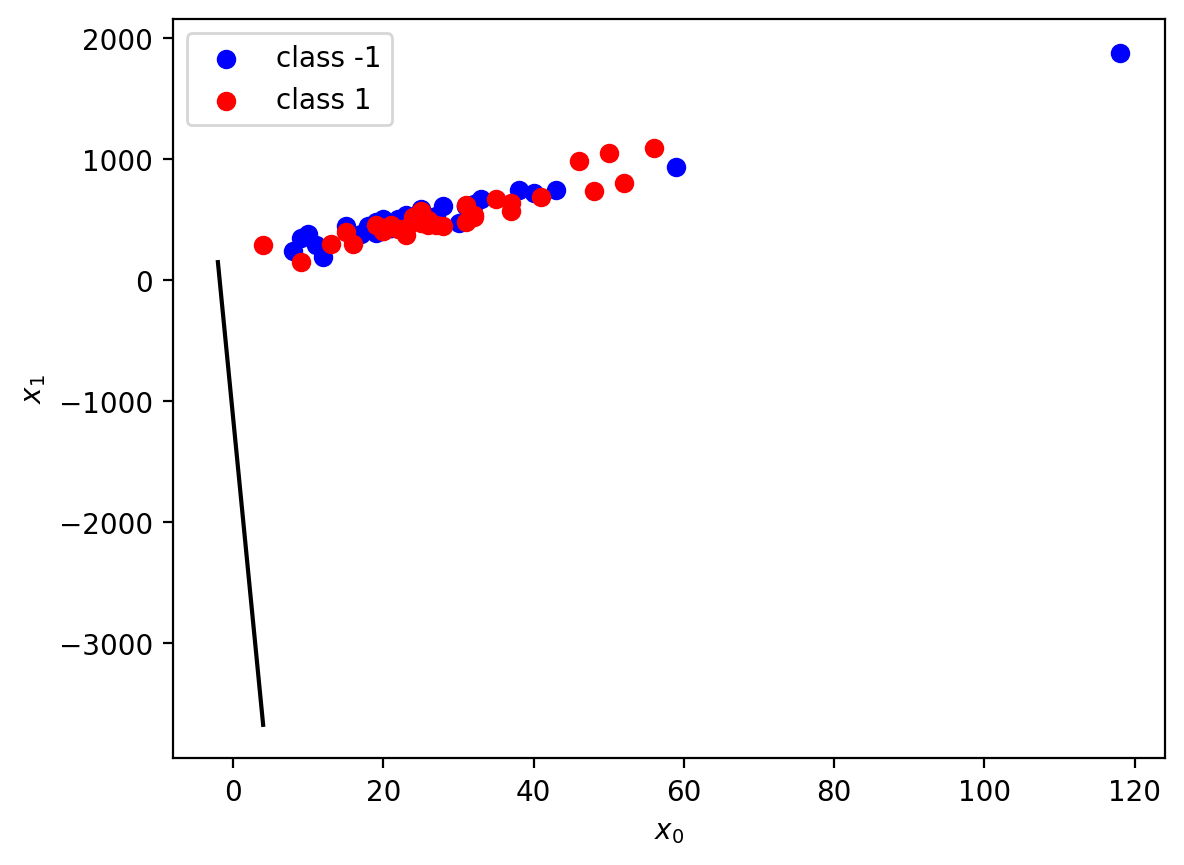

Training error: 0.5151515151515151




Test #1
C = 100
Decision boundary: 0.067x0+0.002x1+0.120=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


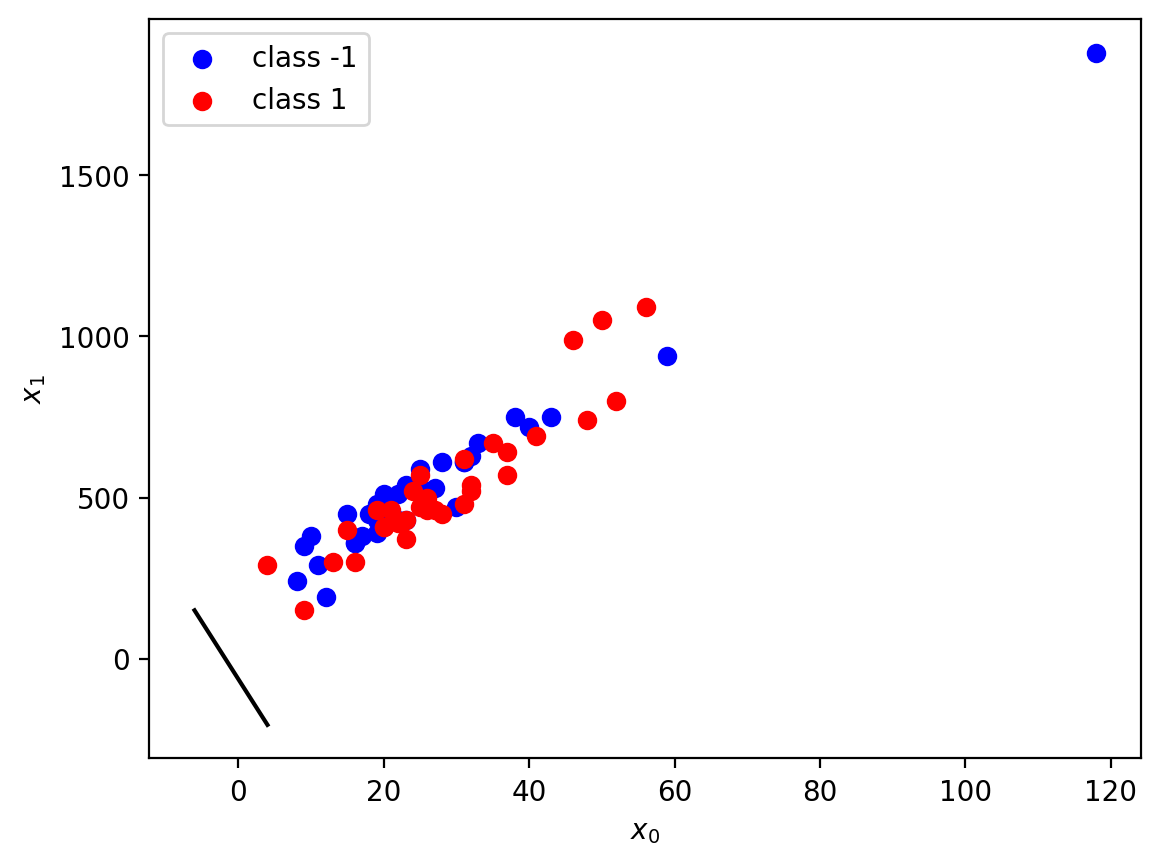

Training error: 0.5151515151515151




Test #1
C = 1000
Decision boundary: 0.069x0+-0.005x1+0.129=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


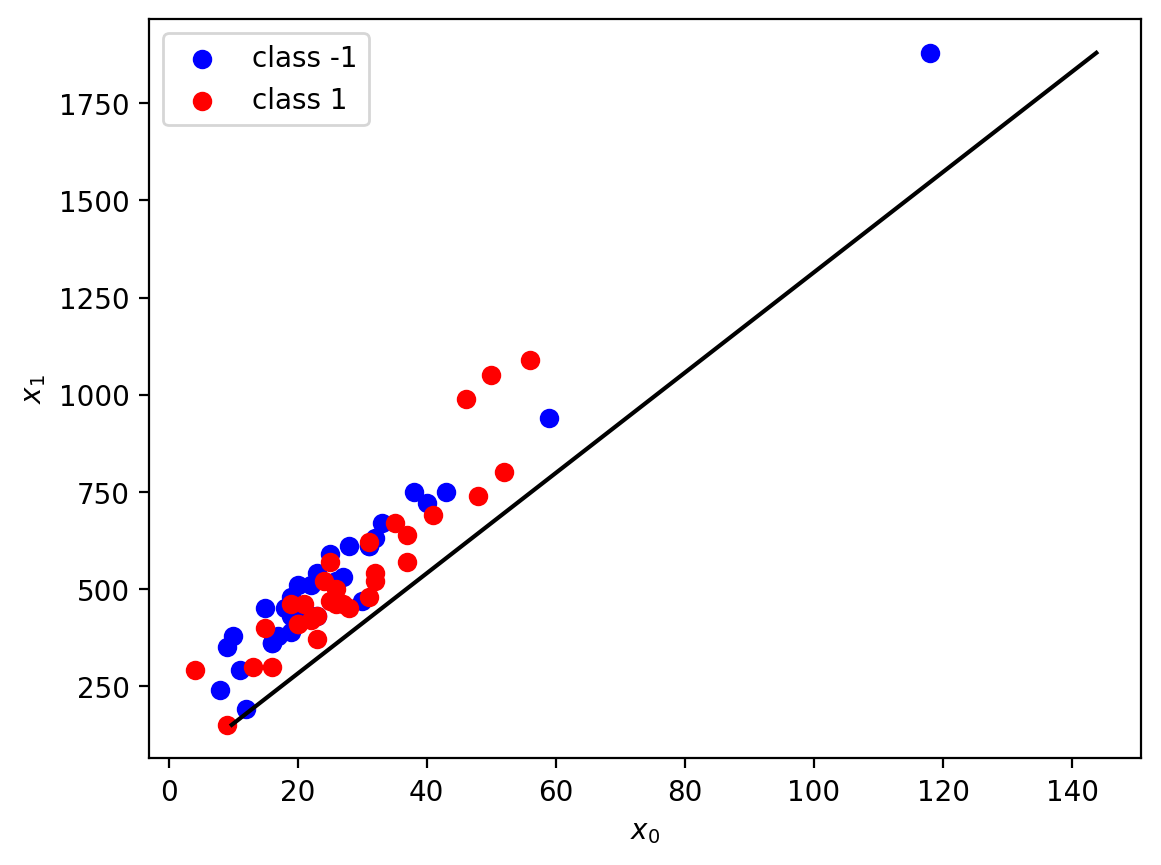

Training error: 0.48484848484848486




Best parameter C* = 1
Decision boundary: 0.068x0+-0.005x1+0.117=0


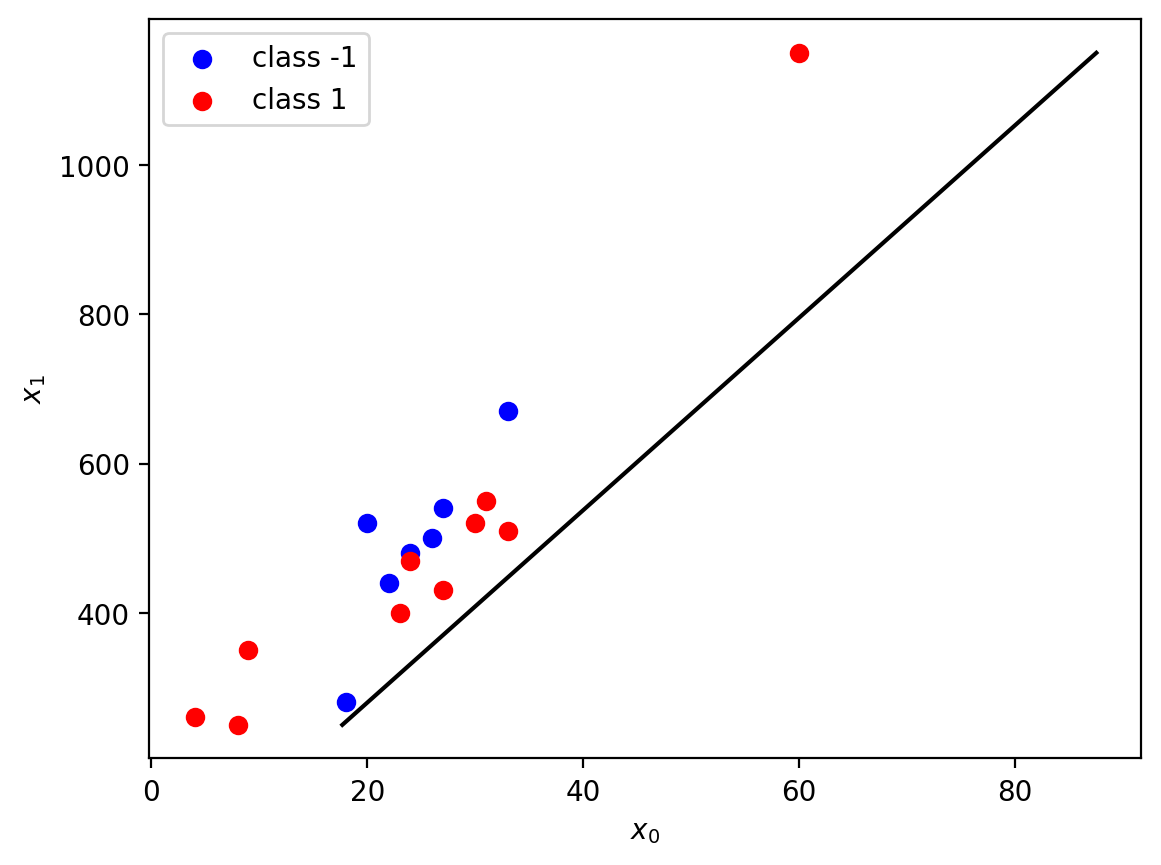

Test error: 0.5882352941176471


In [87]:
svmf(X_train,Y_train, X_test, Y_test)

In [88]:
totalr_training_data222 = r_training_data2/3
totalr_testing_data222 = r_testing_data2/3
r_training_data2 = 0
r_testing_data2 = 0
print("Training average :",totalr_training_data222)
print("Training average :",totalr_testing_data222)

Training average : 0.4545454545454546
Training average : 0.5490196078431372


### Decision Tree

#### Result #1

In [89]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:67][:,[2,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:67] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[67:85][:,[2,0]]
Y_test = Y_shuffled[67:85]

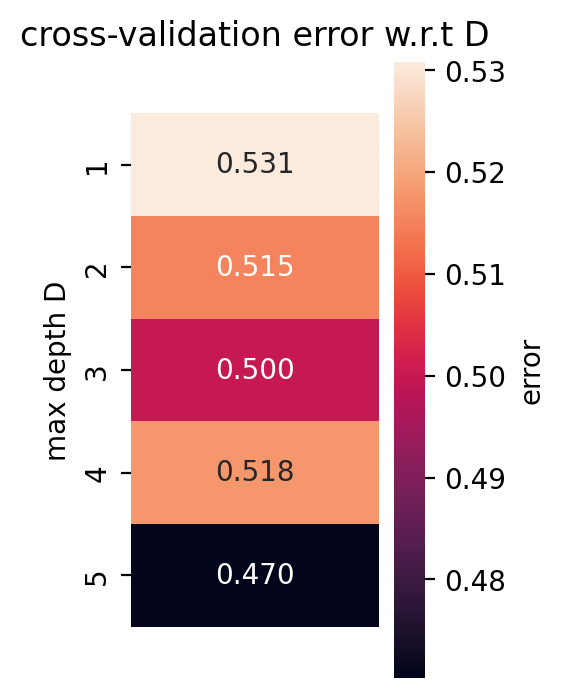

Best max depth D: {'max_depth': 5}
Training error: 0.19696969696969702
Test error: 0.5294117647058824


In [90]:
trees(X_train,Y_train, X_test, Y_test)

#### Result #2

In [91]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:67][:,[2,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:67] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[67:85][:,[2,0]]
Y_test = Y_shuffled[67:85]

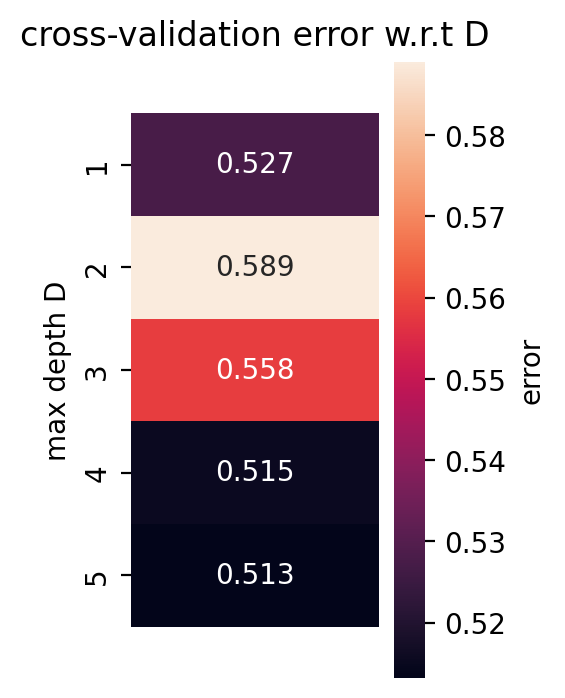

Best max depth D: {'max_depth': 5}
Training error: 0.16666666666666663
Test error: 0.4117647058823529


In [92]:
trees(X_train,Y_train, X_test, Y_test)

#### Result #3

In [93]:
np.random.shuffle(X_and_Y1) 
X_shuffled = X_and_Y1[:,:8]
Y_shuffled = X_and_Y1[:,13]

X_train = X_shuffled[:67][:,[2,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:67] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[67:85][:,[2,0]]
Y_test = Y_shuffled[67:85]

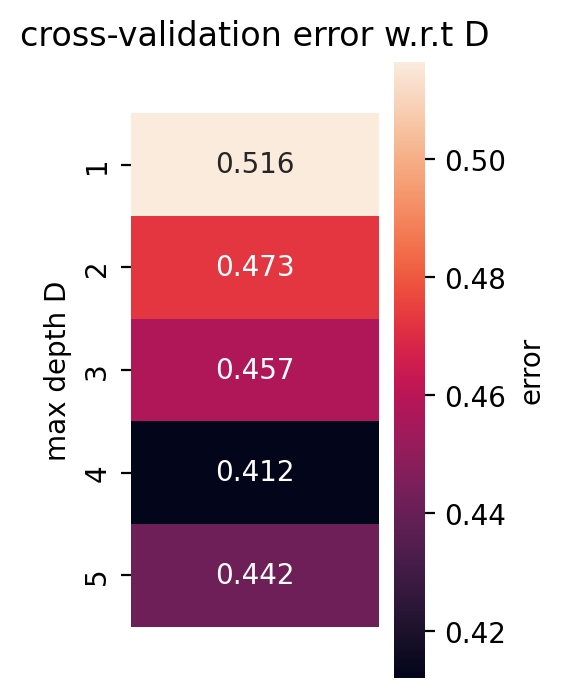

Best max depth D: {'max_depth': 4}
Training error: 0.16666666666666663
Test error: 0.4117647058823529


In [94]:
trees(X_train,Y_train, X_test, Y_test)

In [95]:
totalr_training_data223 = r_training_data3/3
totalr_testing_data223 = r_testing_data3/3
r_training_data3 = 0
r_testing_data3 = 0
print("Training average :",totalr_training_data223)
print("Training average :",totalr_testing_data223)

Training average : 0.17676767676767677
Training average : 0.45098039215686275


In [96]:
print("Training average Log Regression :",totalr_training_data211)
print("Training average SVM :",totalr_training_data212)
print("Training average Decision Tree :",totalr_training_data213)

print("Testing average Log Regression :",totalr_testing_data211)
print("Testing average SVM :",totalr_testing_data212)
print("Testing average Decision Tree :",totalr_testing_data213)

print(" ")

print("Training average Log Regression :",totalr_training_data221)
print("Training average SVM :",totalr_training_data222)
print("Training average Decision Tree :",totalr_training_data223)

print("Testing average Log Regression :",totalr_testing_data221)
print("Testing average SVM :",totalr_testing_data222)
print("Testing average Decision Tree :",totalr_testing_data223)

Training average Log Regression : 0.5098039215686274
Training average SVM : 0.3541666666666667
Training average Decision Tree : 0.2916666666666667
Testing average Log Regression : 0.49751243781094523
Testing average SVM : 0.5024875621890547
Testing average Decision Tree : 0.5024875621890548
 
Training average Log Regression : 0.5124378109452736
Training average SVM : 0.4545454545454546
Training average Decision Tree : 0.17676767676767677
Testing average Log Regression : 0.4313725490196078
Testing average SVM : 0.5490196078431372
Testing average Decision Tree : 0.45098039215686275


# Dataset #3

## Partition 1

### Logistic regression classifier

#### Result #1

In [97]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]
    

X_train = X_shuffled[:92][:,[7,0]]
Y_train = Y_shuffled[:92]
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 28.927x0+-0.025x1+-49.357=0


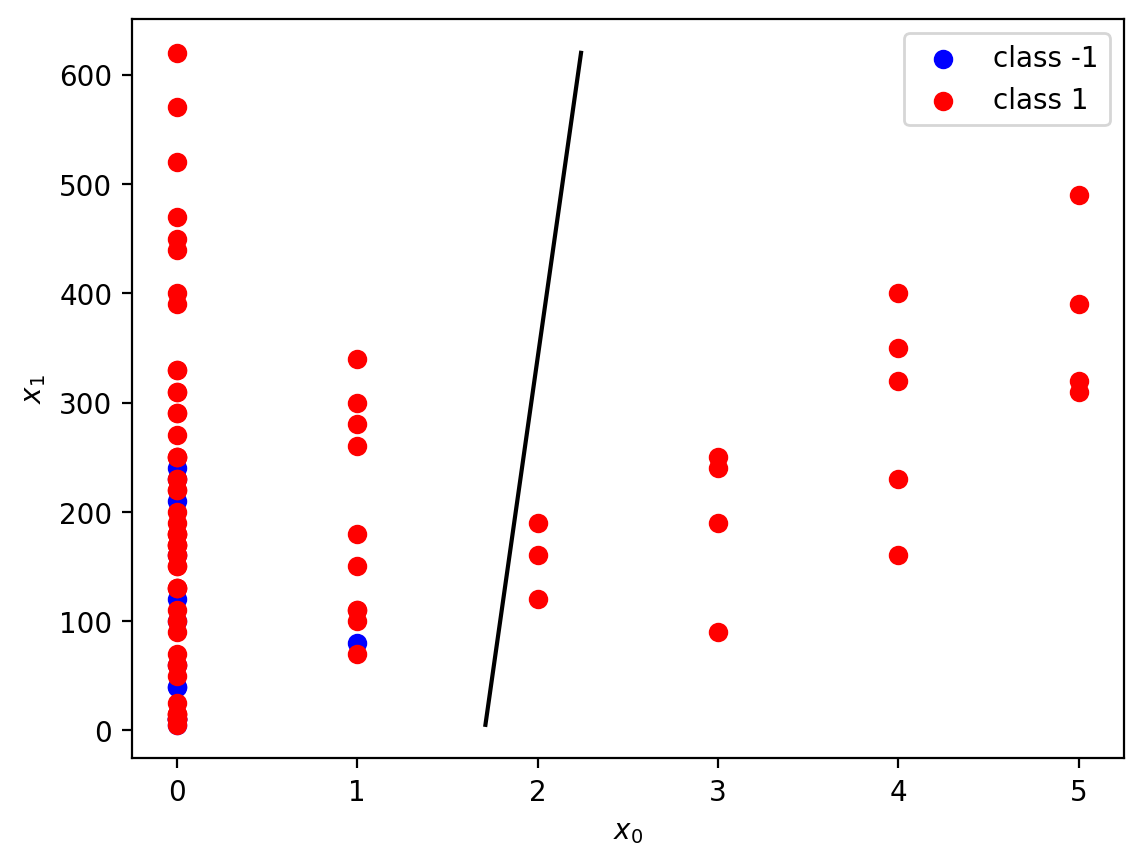

Training error: 0.6739130434782609


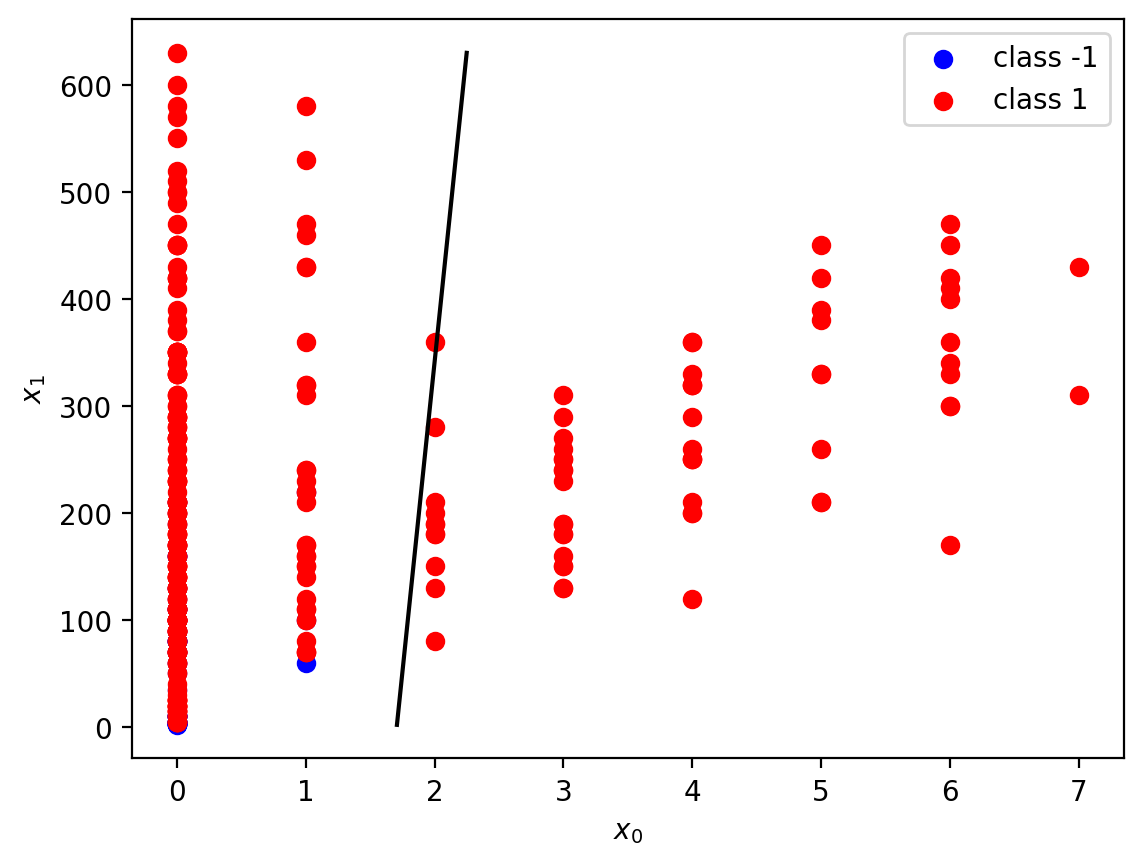

Test error: 0.6351351351351351


In [98]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #2

In [99]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]
    

X_train = X_shuffled[:92][:,[7,0]]
Y_train = Y_shuffled[:92]
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 15.012x0+14.269x1+-50.404=0


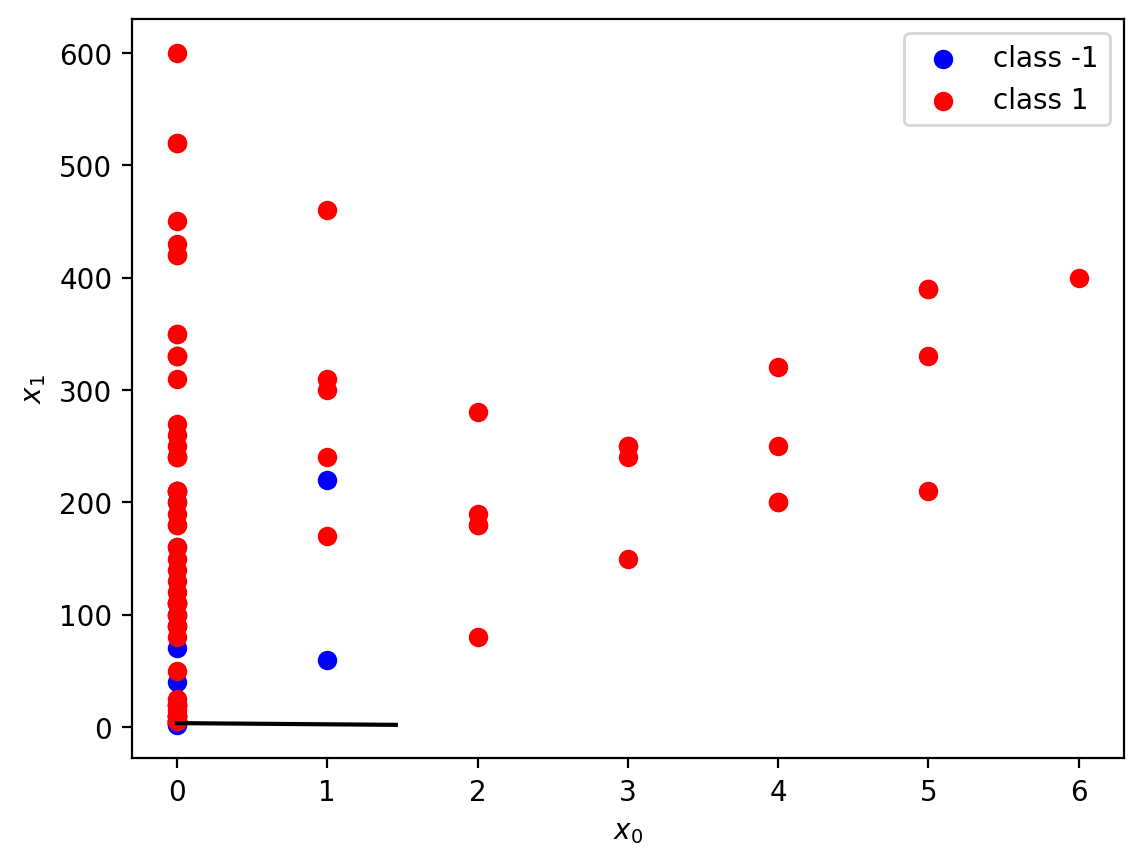

Training error: 0.16304347826086957


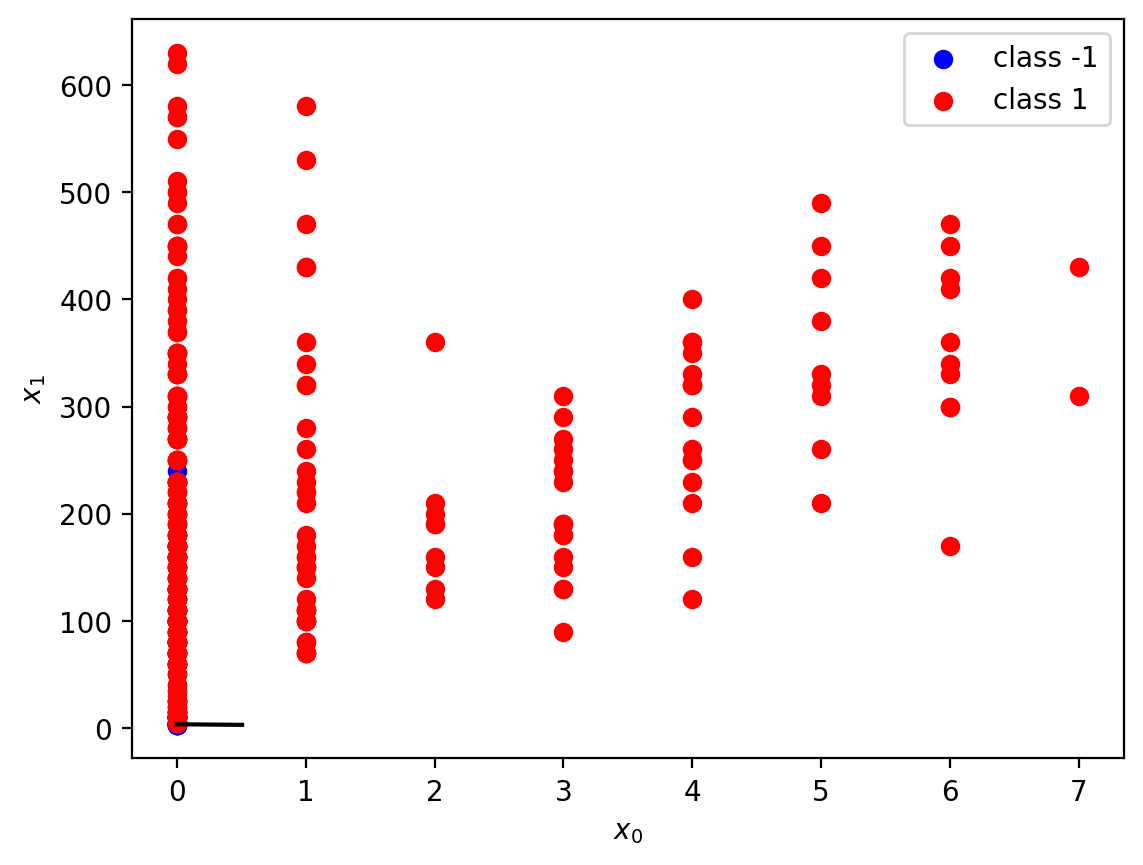

Test error: 0.15945945945945947


In [100]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #3

In [101]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]
    

X_train = X_shuffled[:92][:,[7,0]]
Y_train = Y_shuffled[:92]
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 44.197x0+8.800x1+-34.331=0


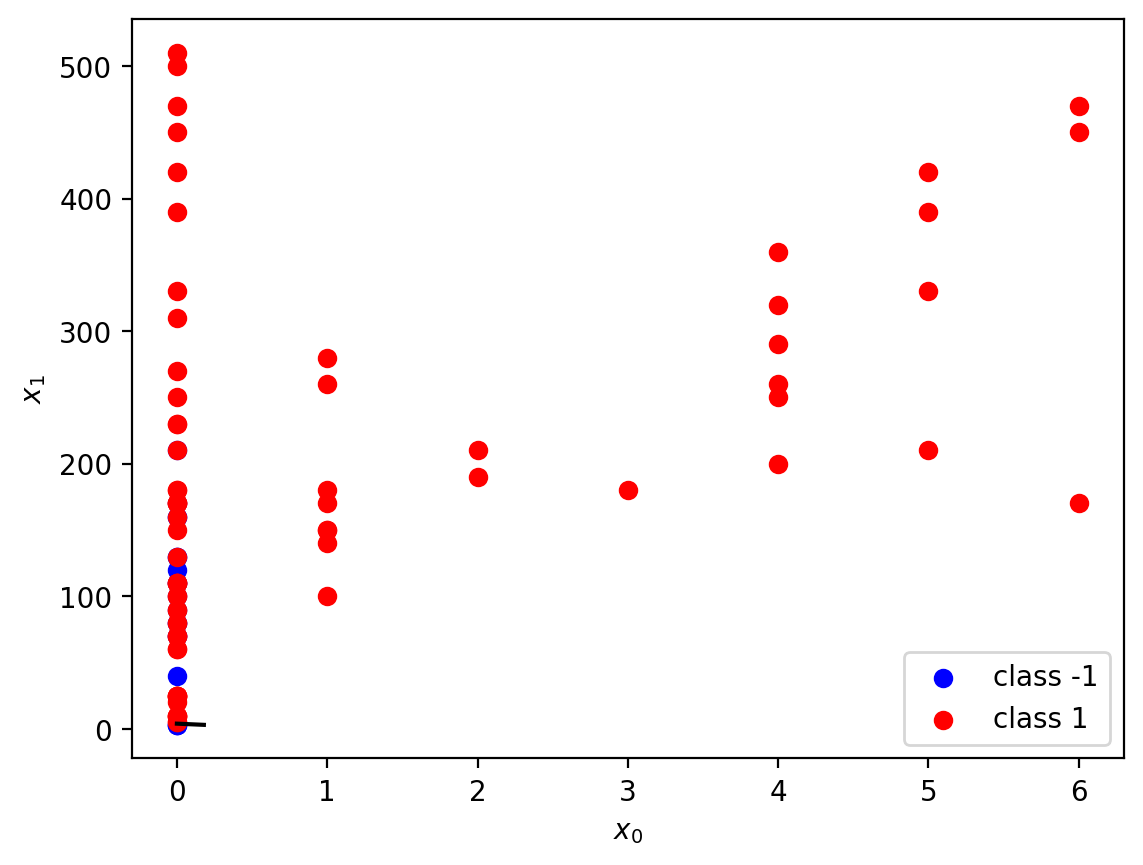

Training error: 0.17391304347826086


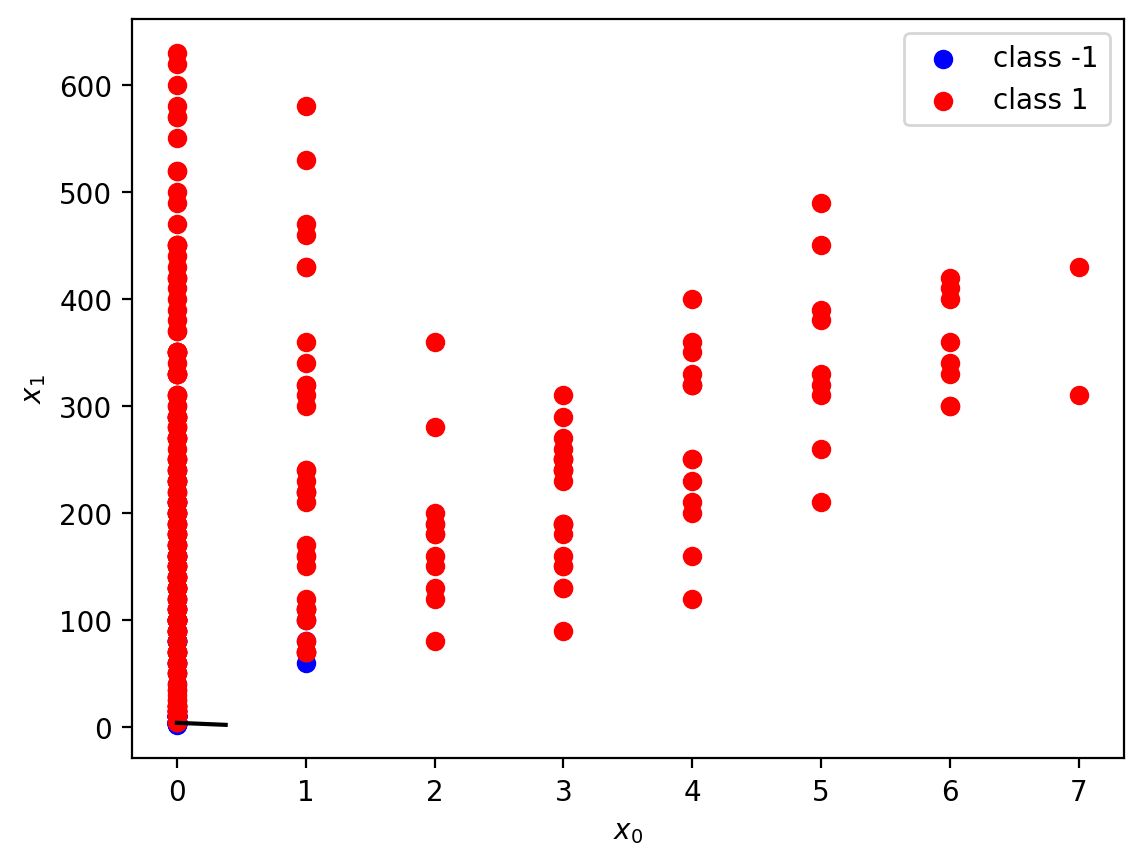

Test error: 0.15675675675675677


In [102]:
logreg(X_train,Y_train, X_test, Y_test)

In [103]:
totalr_training_data311 = r_training_data1/3
totalr_testing_data311 = r_testing_data1/3
r_training_data1 = 0
r_testing_data1 = 0
print("Training average :",totalr_training_data311)
print("Training average :",totalr_testing_data311)

Training average : 0.3369565217391304
Training average : 0.31711711711711715


### Support Vector Machines

#### Result #1

In [104]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:92][:,[7,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:92] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

Test #1
C = 0.1
Decision boundary: 0.007x0+0.004x1+0.534=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


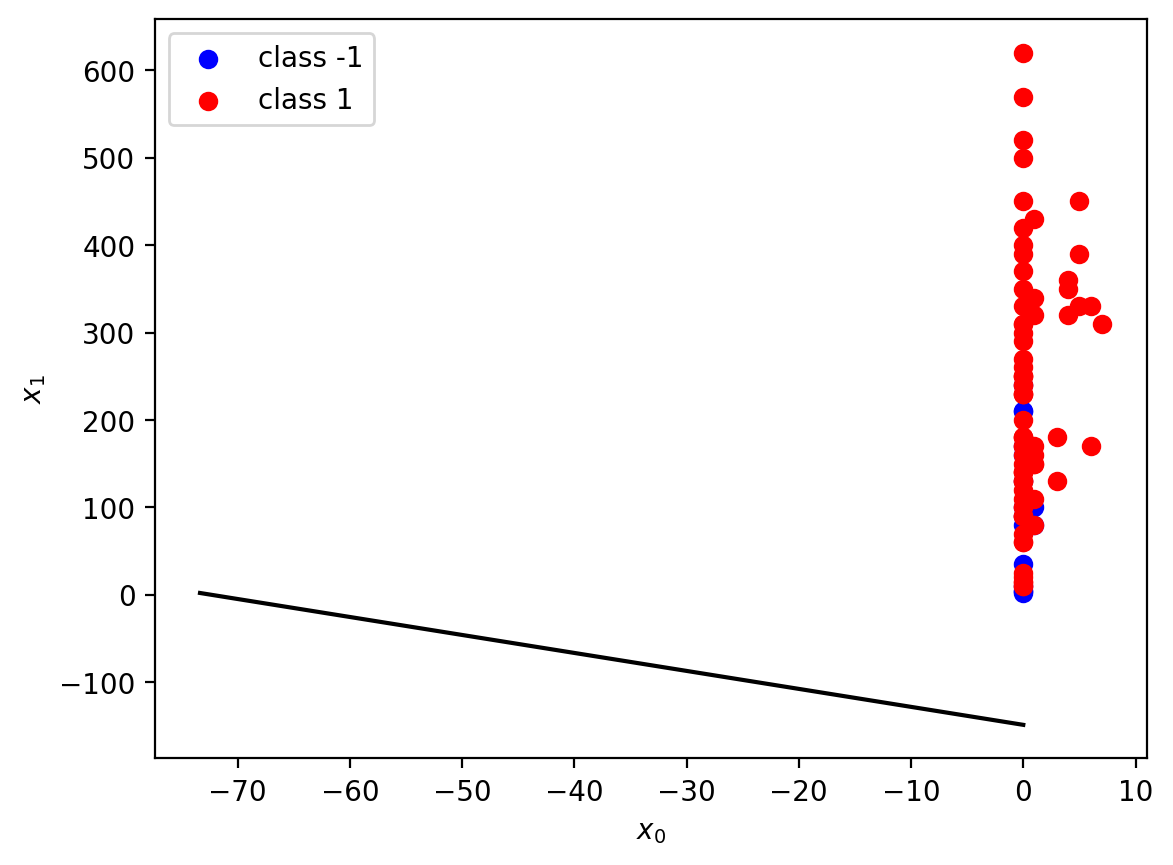

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.17582417582417587




Test #1
C = 1
Decision boundary: 0.215x0+-0.000x1+1.048=0


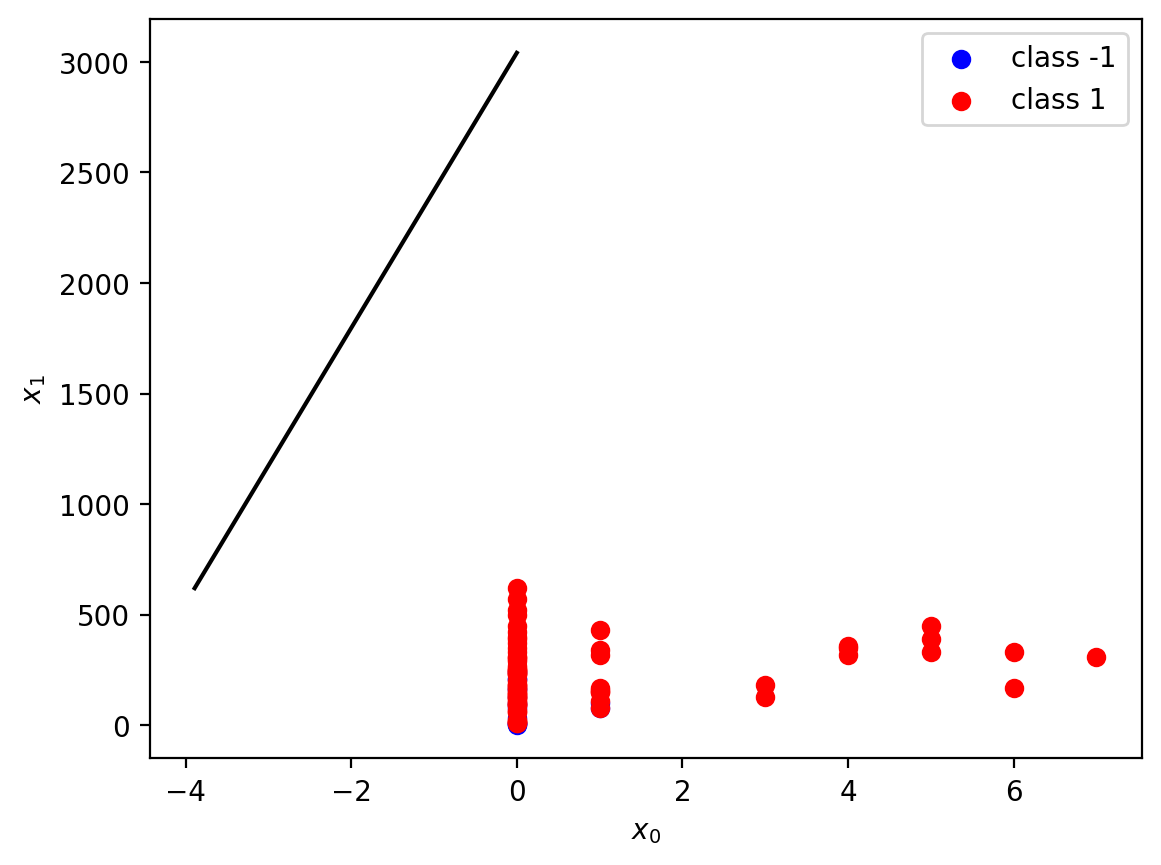

Training error: 0.17582417582417587




Test #1
C = 10
Decision boundary: -0.430x0+-0.025x1+1.394=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


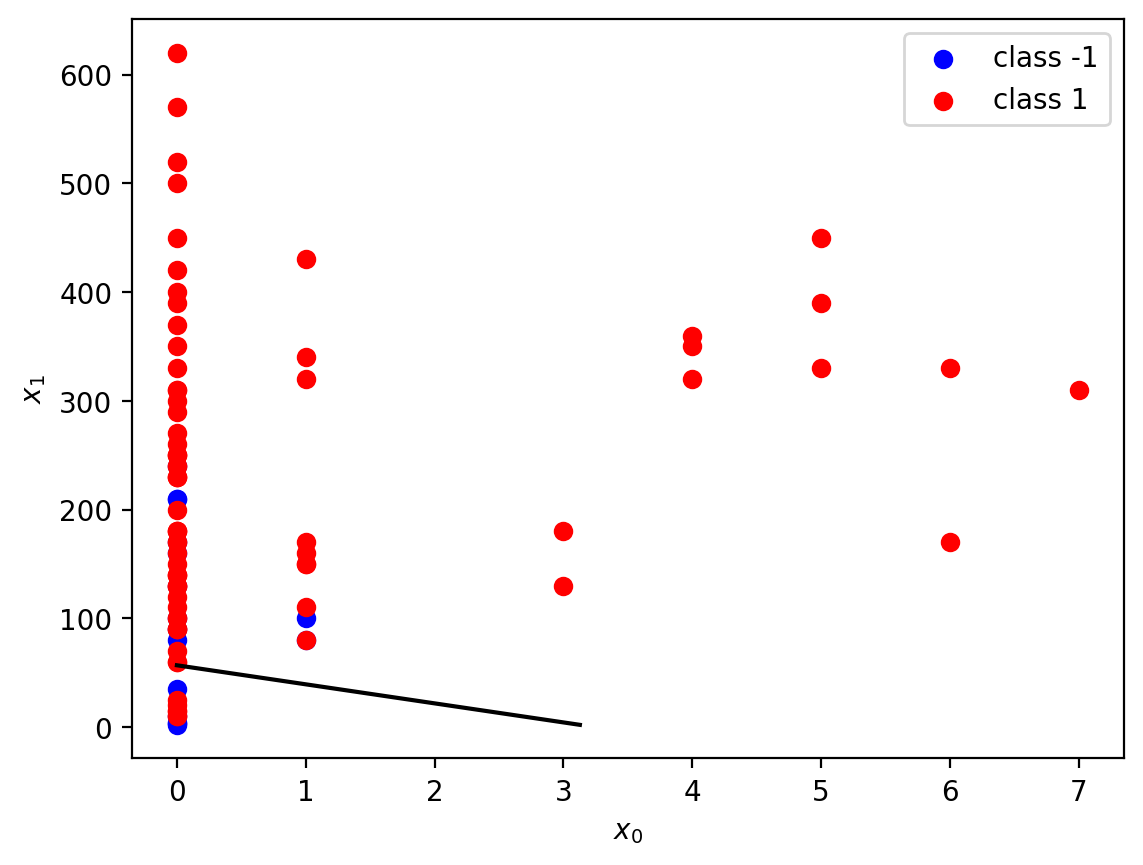

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.8131868131868132




Test #1
C = 100
Decision boundary: -2.186x0+-0.008x1+0.043=0


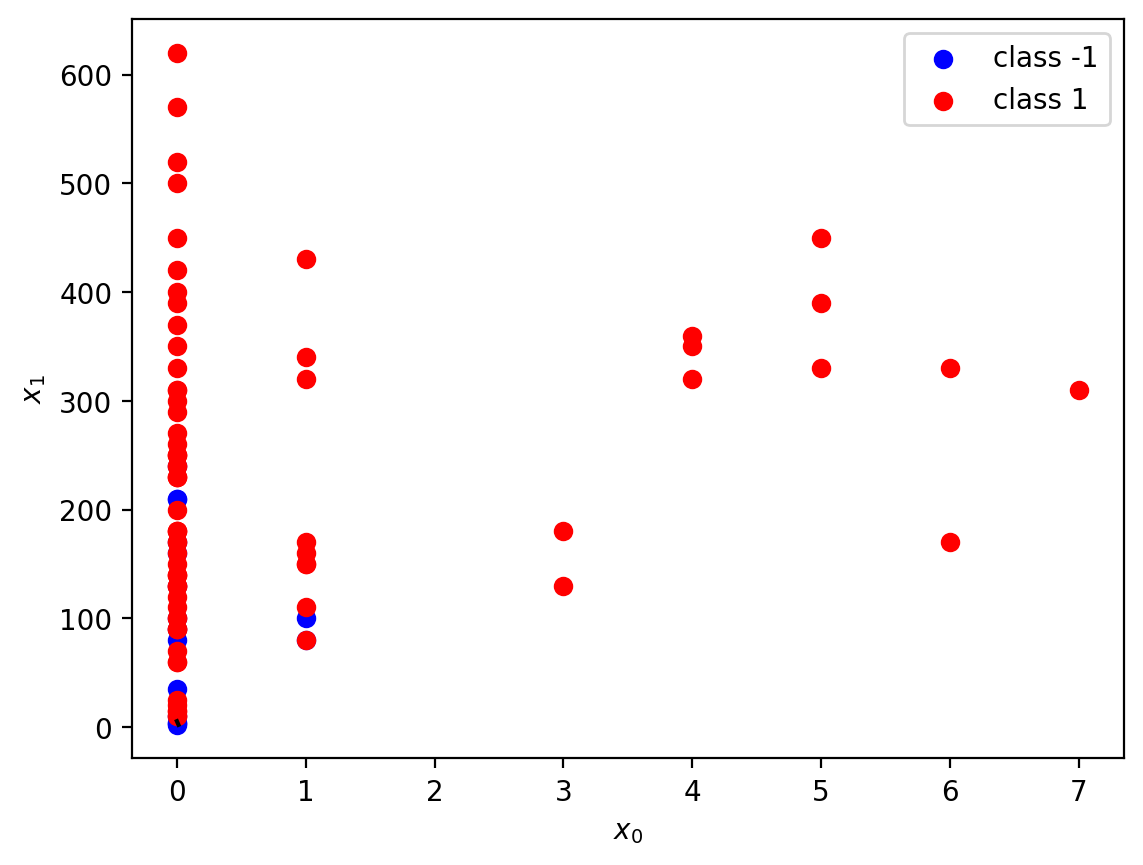

Training error: 0.8571428571428572




Test #1
C = 1000
Decision boundary: -3.308x0+-0.001x1+-0.959=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


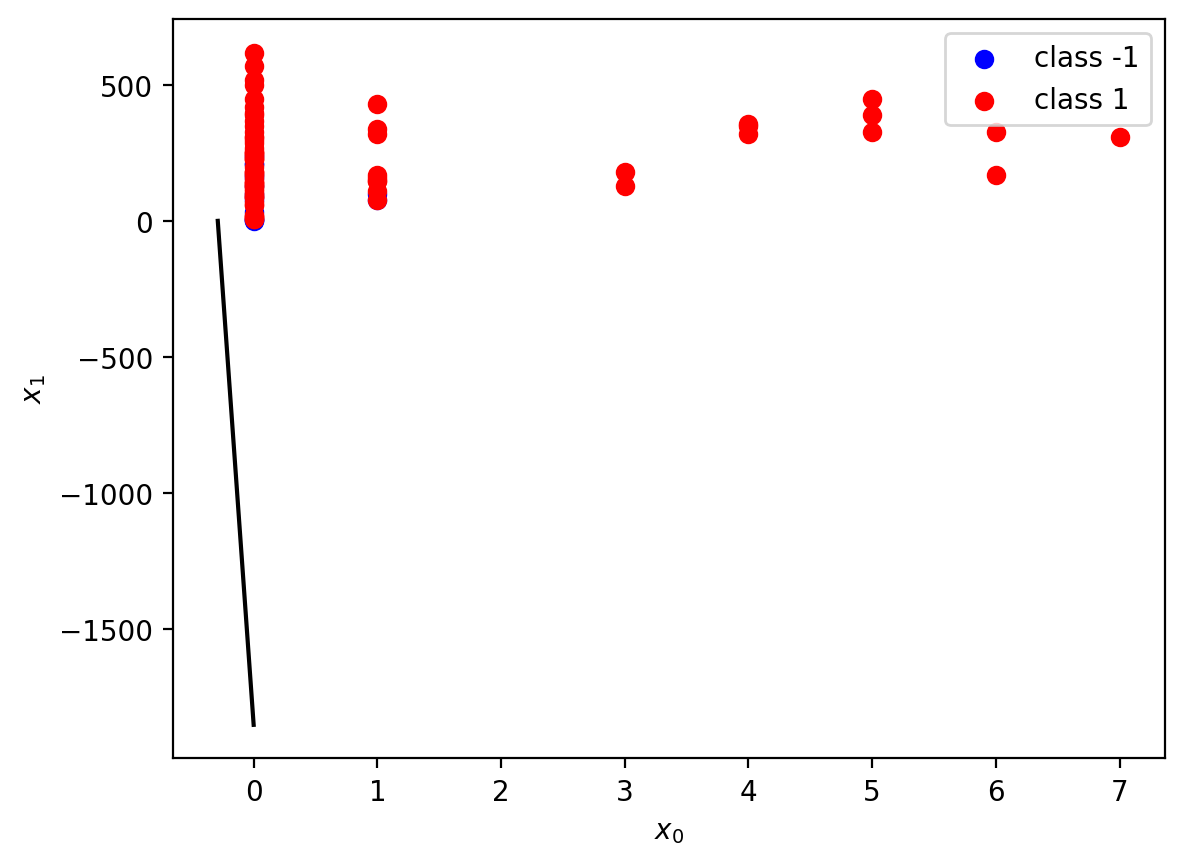

Training error: 0.8241758241758241




Best parameter C* = 0.1
Decision boundary: 0.007x0+0.004x1+0.534=0


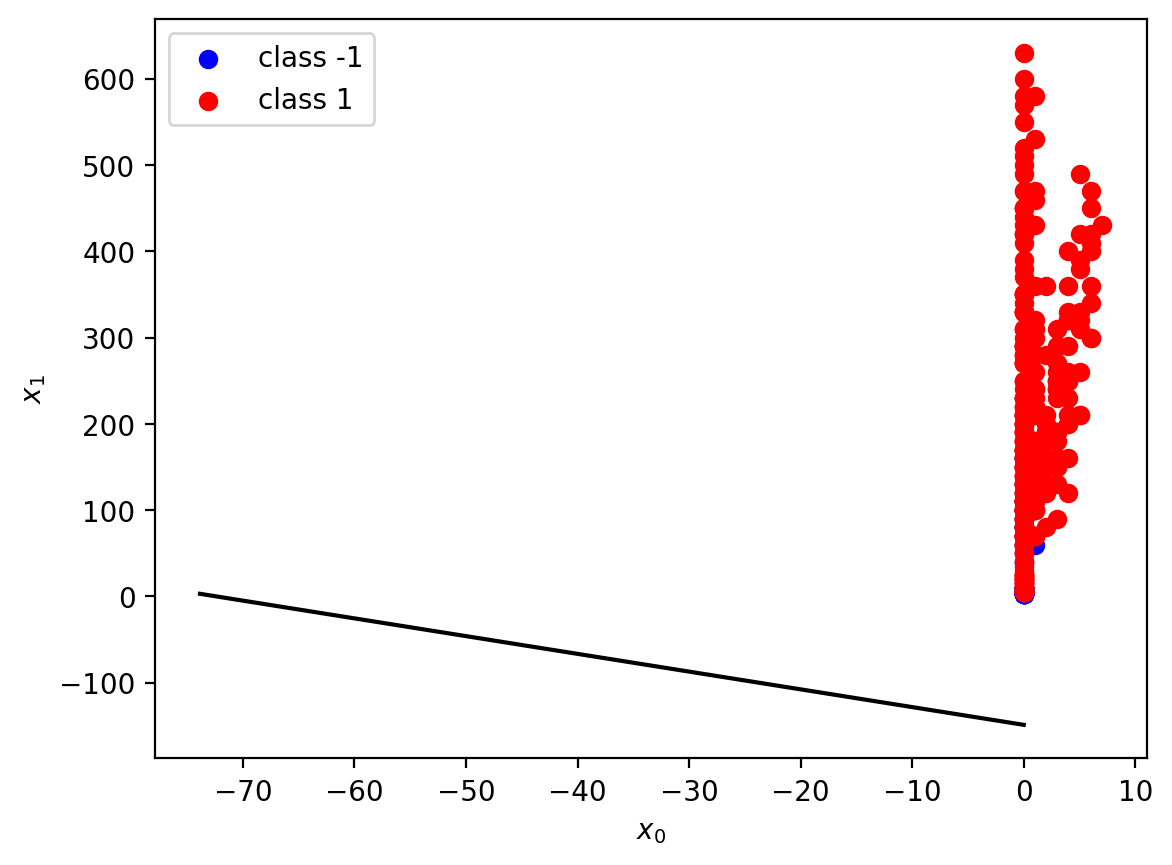

Test error: 0.18108108108108112


In [105]:
svmf(X_train, Y_train, X_test, Y_test)

#### Result #2

In [106]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:92][:,[7,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:92] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

Test #1
C = 0.1
Decision boundary: 0.089x0+0.014x1+-0.211=0


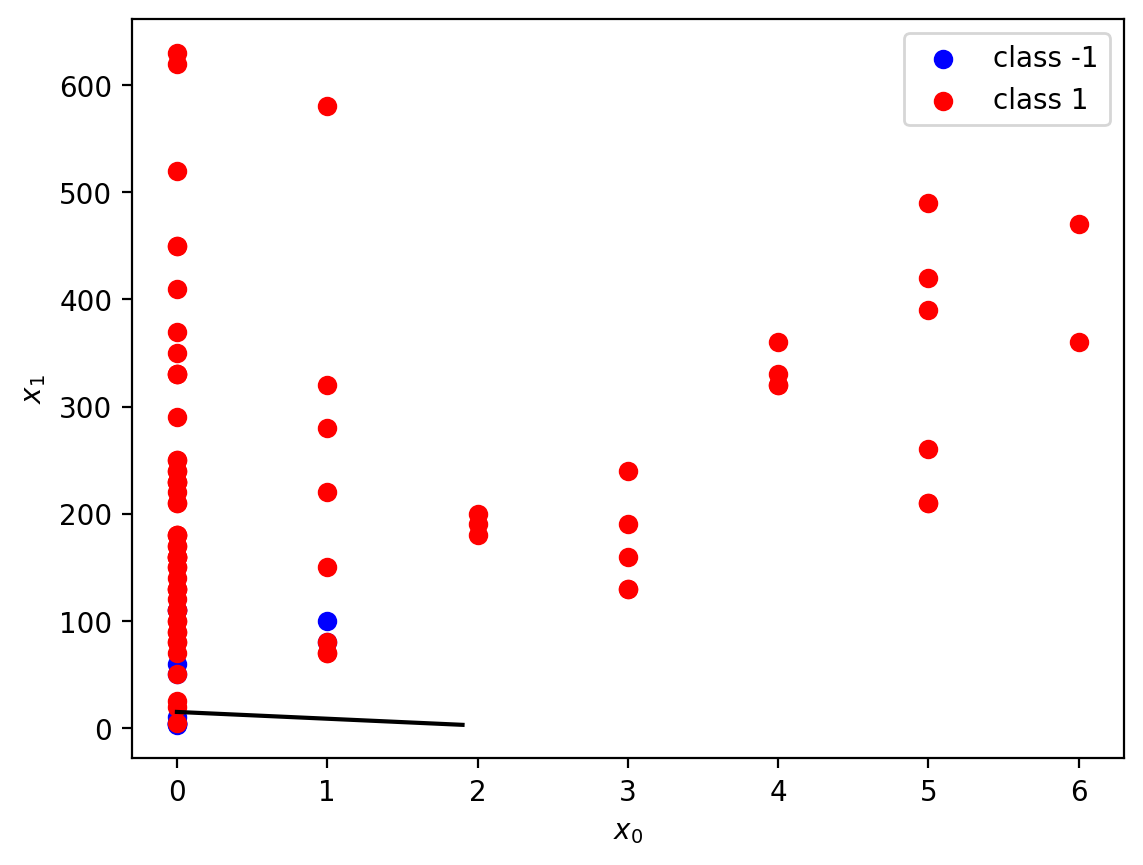

Training error: 0.07692307692307687




Test #1
C = 1
Decision boundary: 0.334x0+0.023x1+-1.098=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


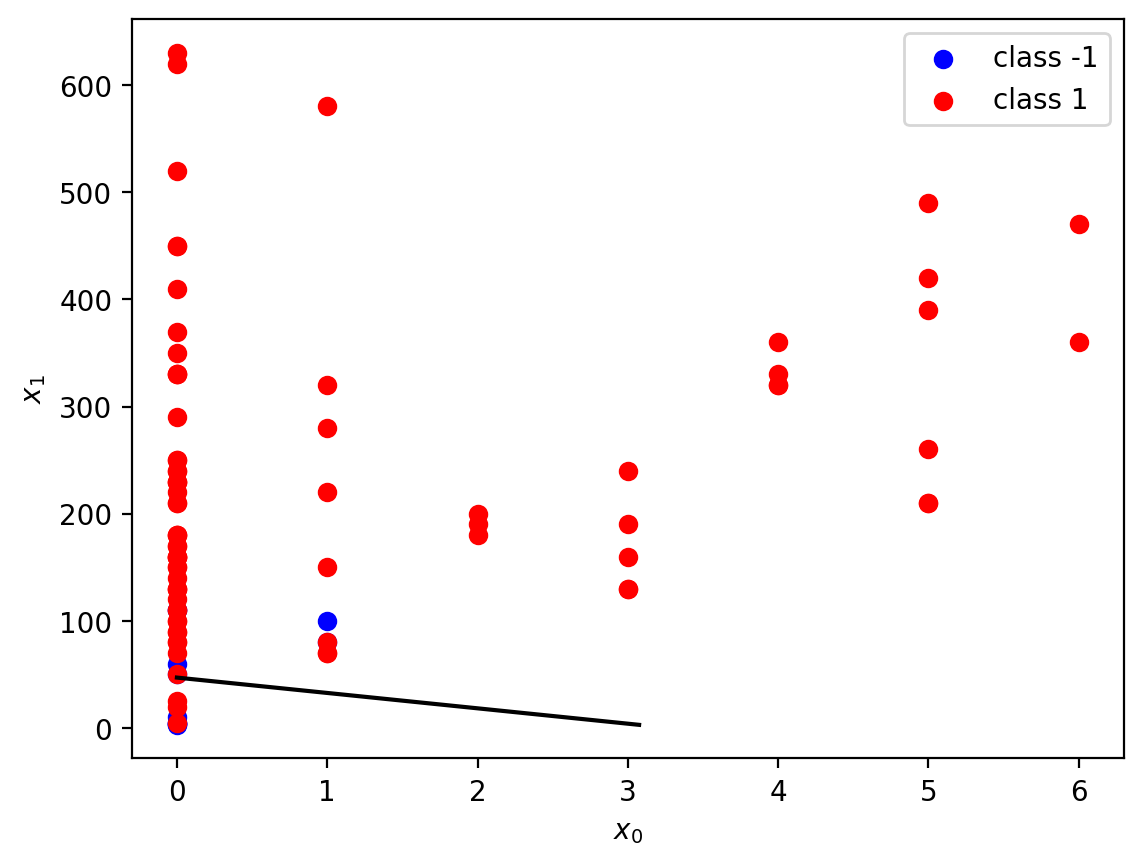

Training error: 0.09890109890109888




Test #1
C = 10
Decision boundary: 0.247x0+-0.002x1+-1.062=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


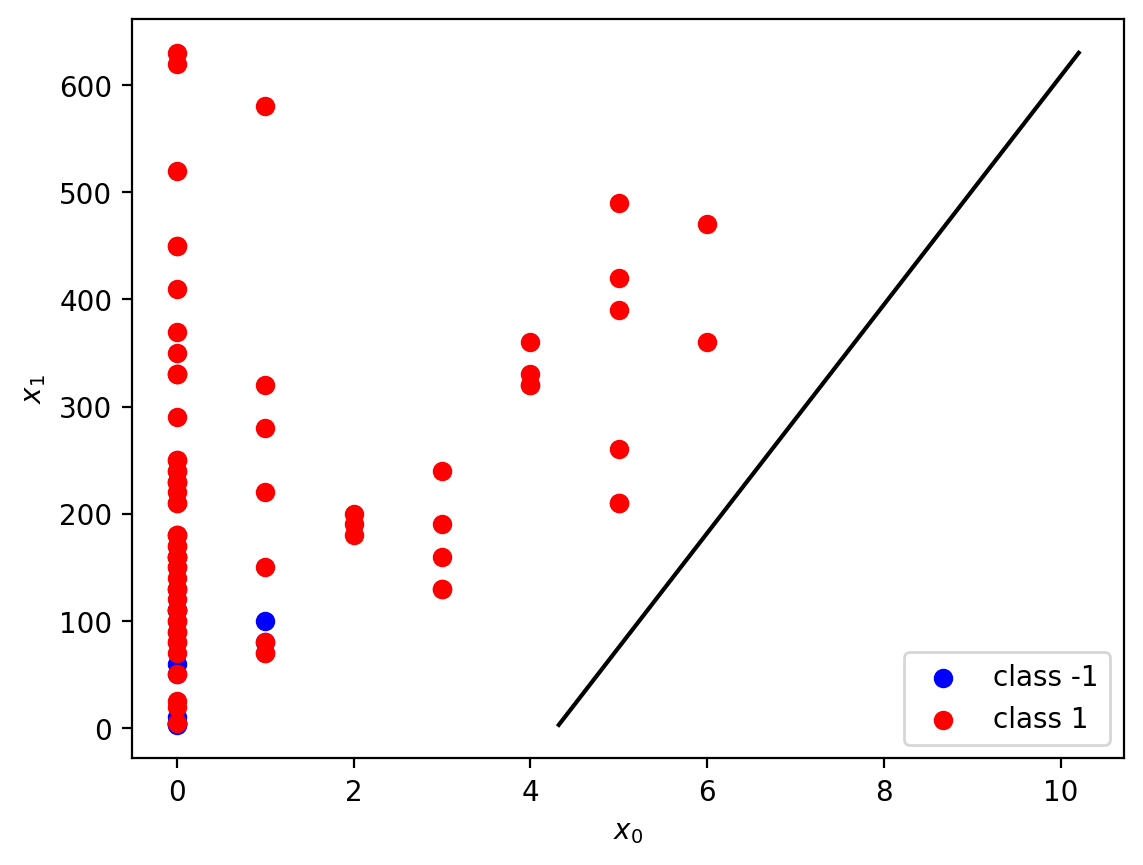

Training error: 0.8681318681318682




Test #1
C = 100
Decision boundary: -0.814x0+0.016x1+-1.081=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


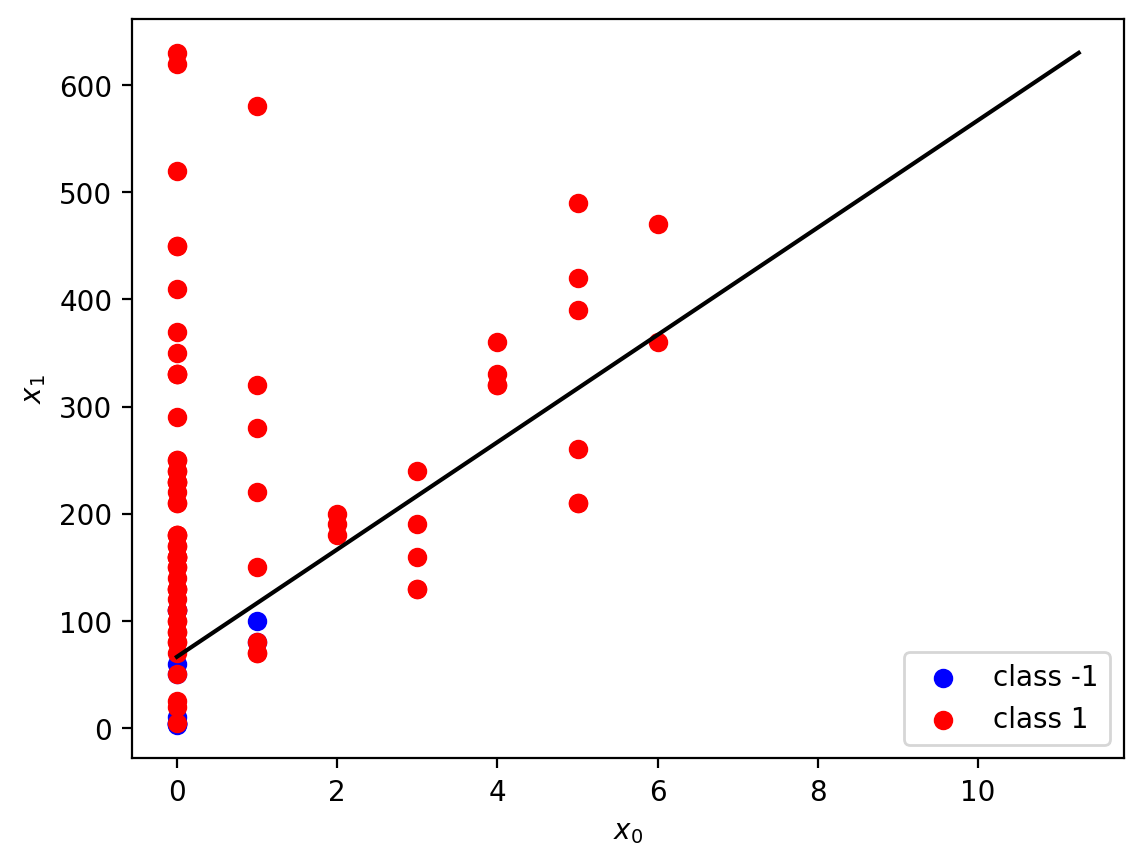

Training error: 0.18681318681318682






c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Test #1
C = 1000
Decision boundary: -1.273x0+0.000x1+-1.019=0


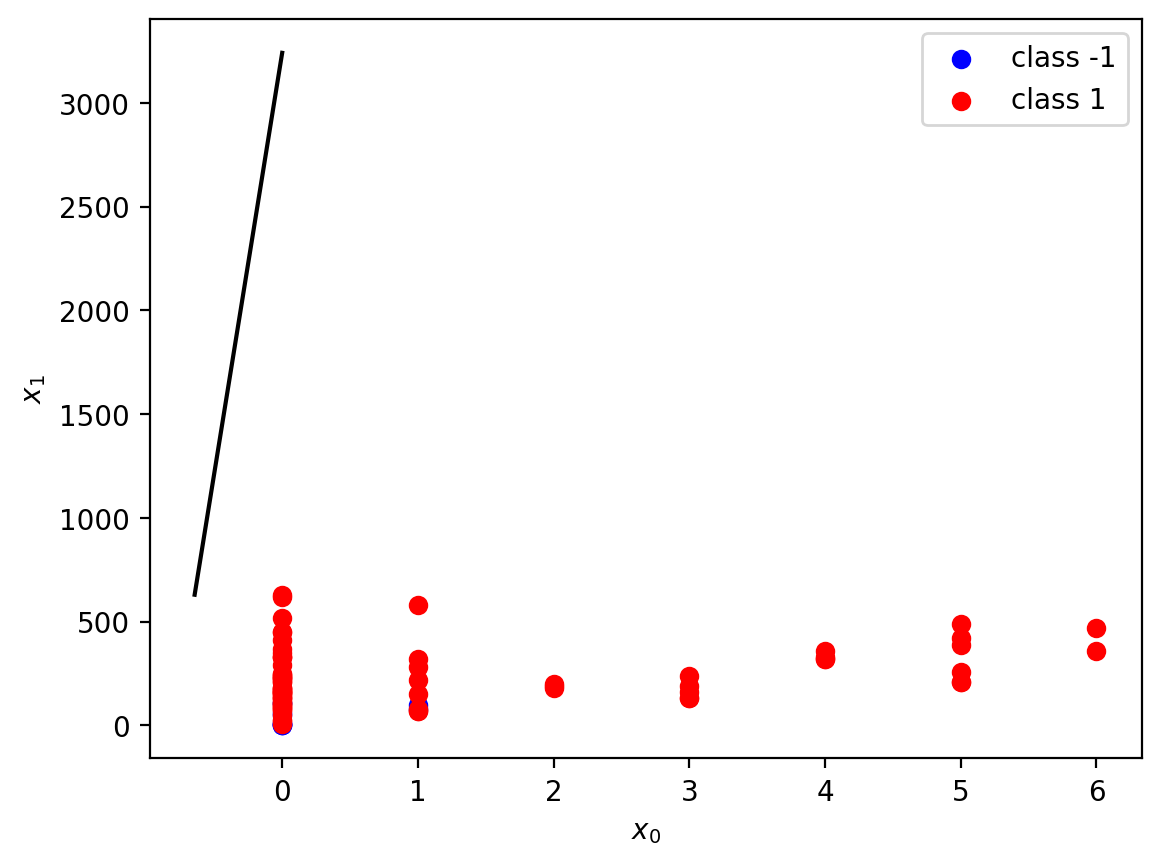

Training error: 0.8681318681318682




Best parameter C* = 0.1
Decision boundary: 0.089x0+0.014x1+-0.211=0


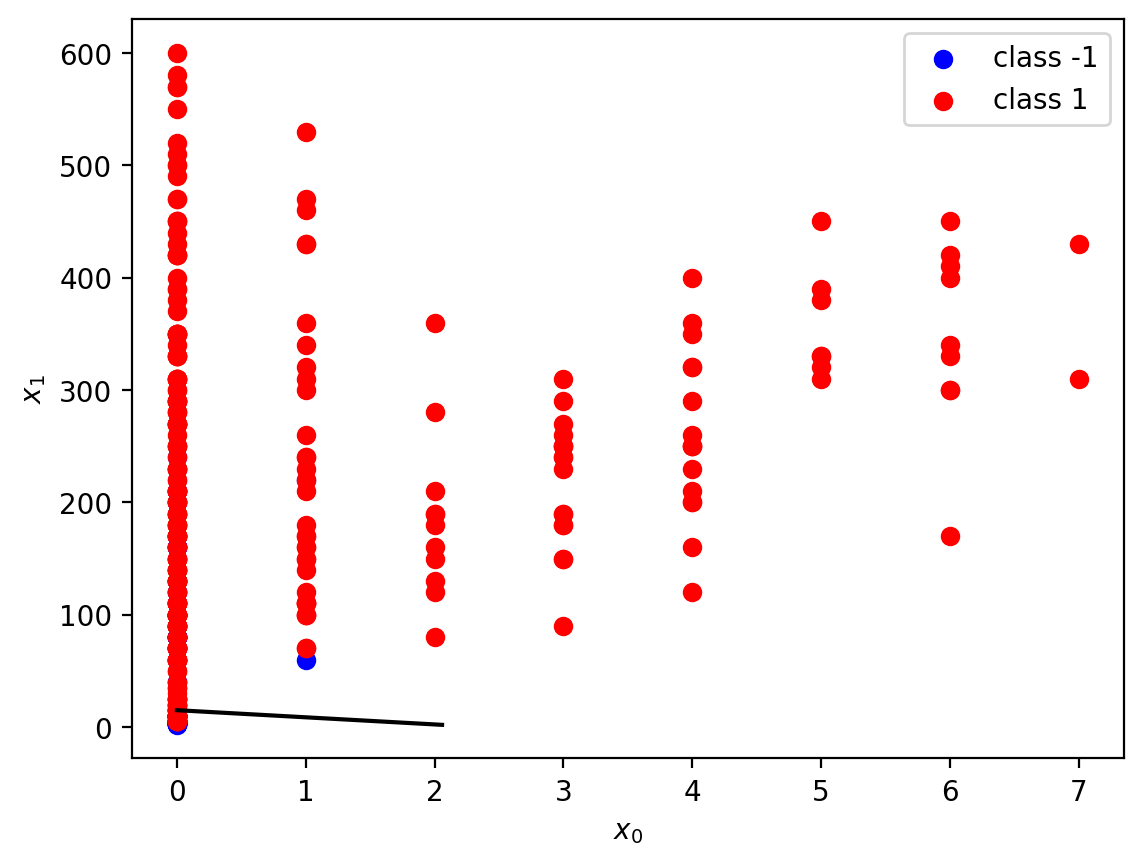

Test error: 0.16756756756756752


In [107]:
svmf(X_train, Y_train, X_test, Y_test)

#### Result #3

In [108]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:92][:,[7,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:92] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

Test #1
C = 0.1
Decision boundary: 0.019x0+0.000x1+0.981=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


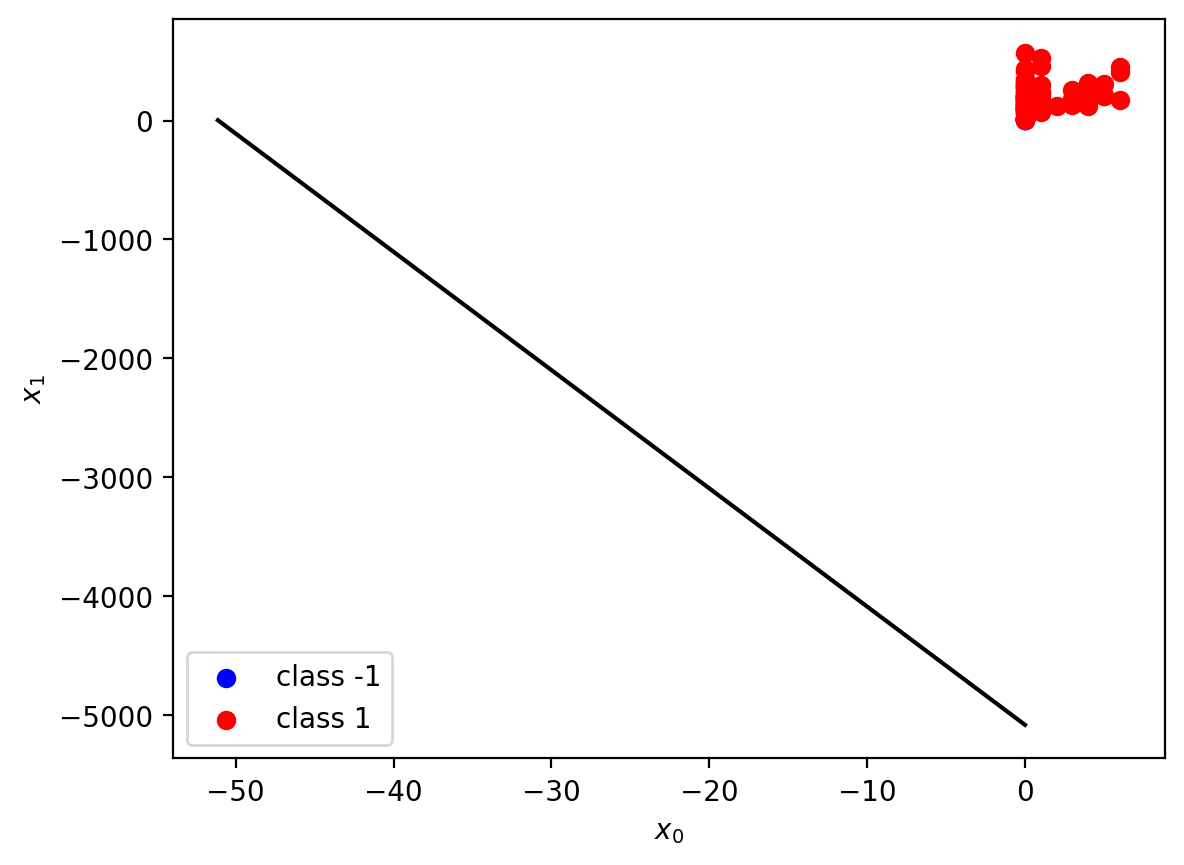

Training error: 0.10989010989010994




Test #1
C = 1
Decision boundary: -0.000x0+-0.024x1+1.376=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


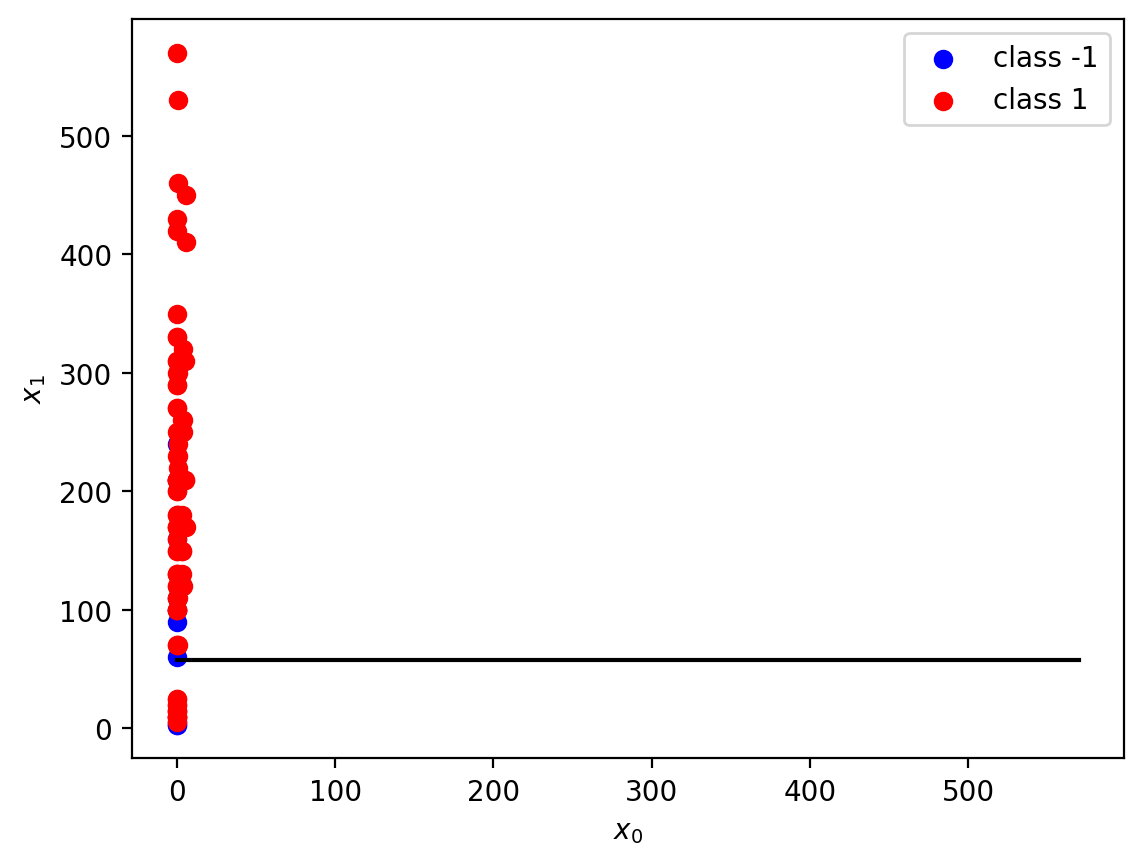

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.7912087912087912




Test #1
C = 10
Decision boundary: -0.000x0+-0.022x1+1.221=0


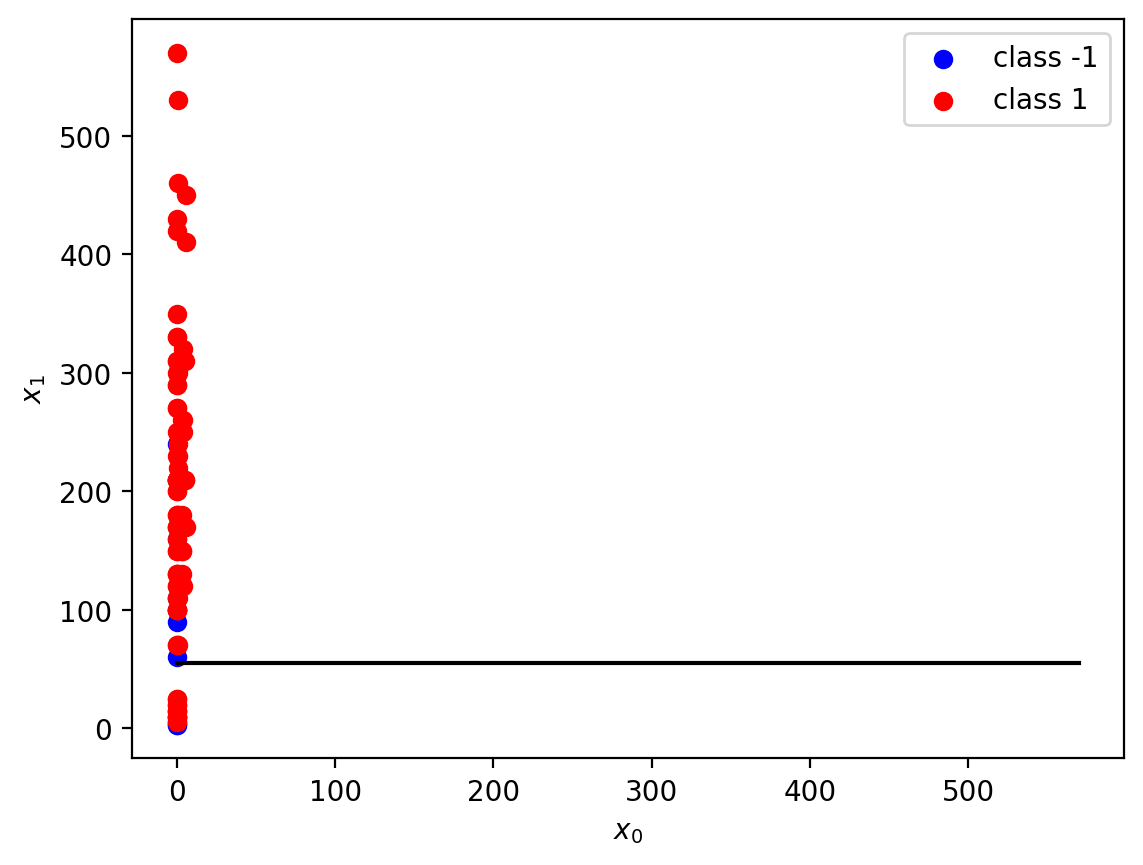

Training error: 0.7912087912087912




Test #1
C = 100
Decision boundary: 0.000x0+-0.006x1+1.127=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


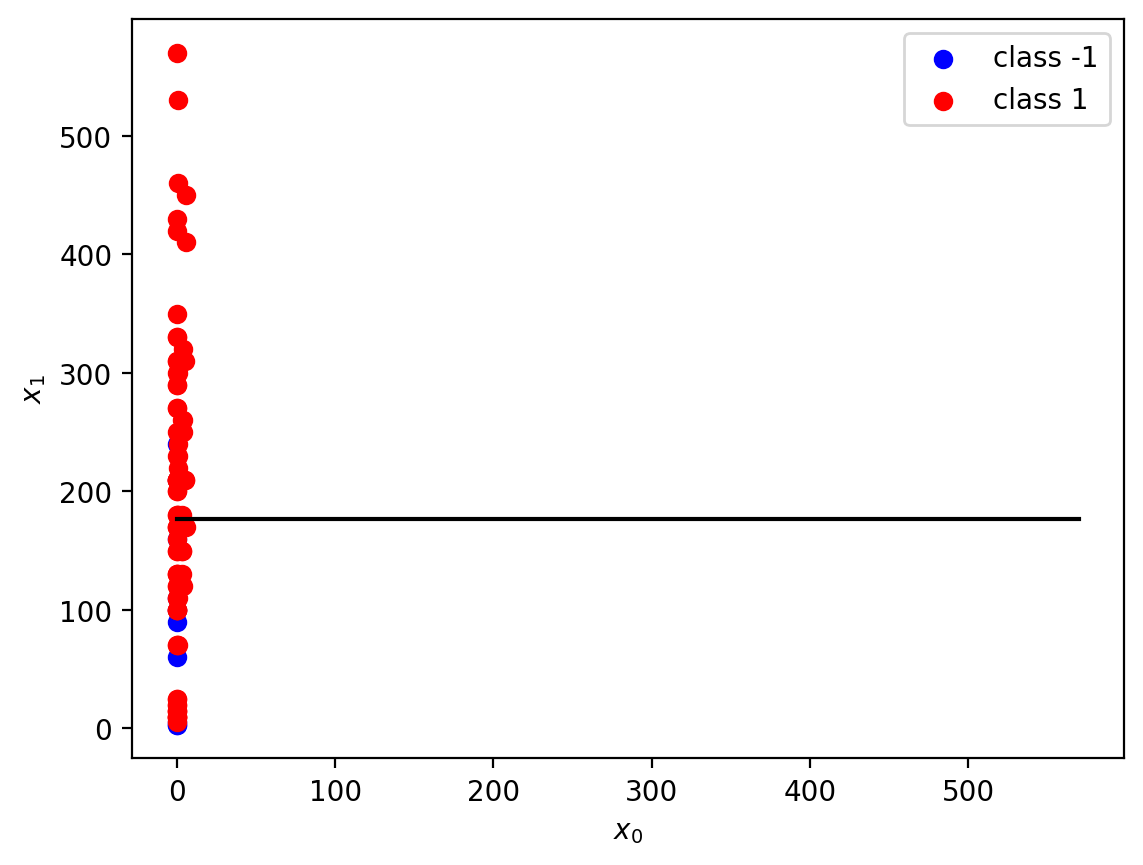

Training error: 0.5494505494505495






c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\1896368540.py:16: RuntimeWarning: invalid value encountered in subtract
  temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0


Test #1
C = 1000
Decision boundary: 0.000x0+0.115x1+-0.727=0


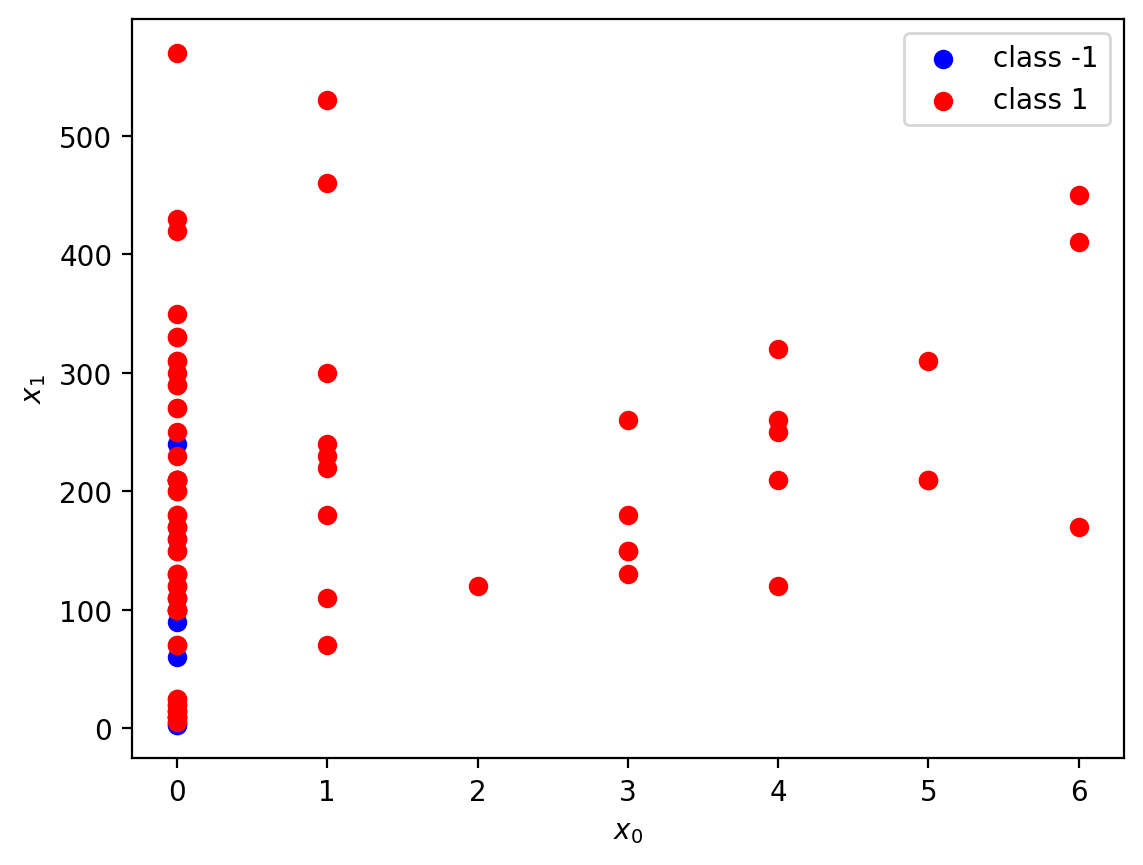

Training error: 0.08791208791208793




Best parameter C* = 1000
Decision boundary: 0.000x0+0.115x1+-0.727=0


C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\1896368540.py:16: RuntimeWarning: invalid value encountered in subtract
  temp = -w1*np.array([X[:,1].min(), X[:,1].max()])/w0-b/w0


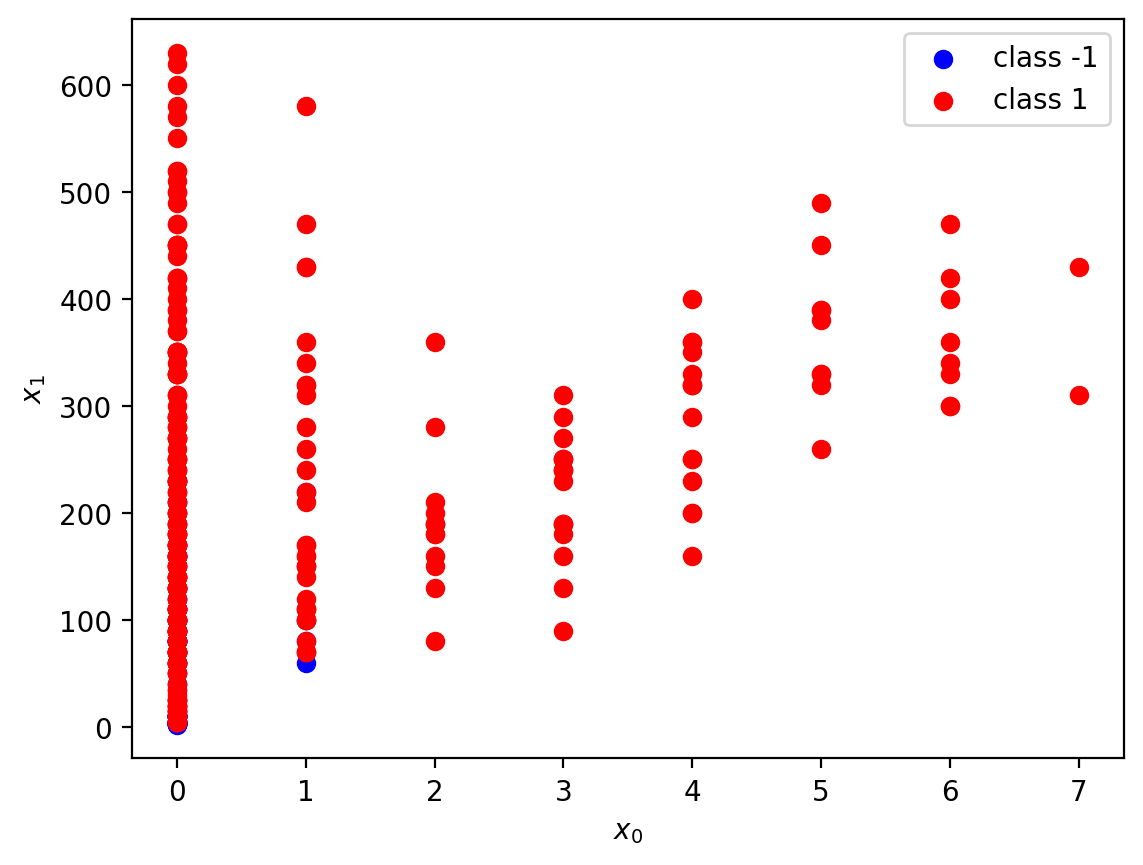

Test error: 0.1567567567567567


In [109]:
svmf(X_train, Y_train, X_test, Y_test)

In [110]:
totalr_training_data312 = r_training_data2/3
totalr_testing_data312 = r_testing_data2/3
r_training_data2 = 0
r_testing_data2 = 0
print("Training average :",totalr_training_data312)
print("Training average :",totalr_testing_data312)

Training average : 0.11355311355311355
Training average : 0.16846846846846844


### Decision Tree

#### Result #1

In [111]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:92][:,[7,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:92] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

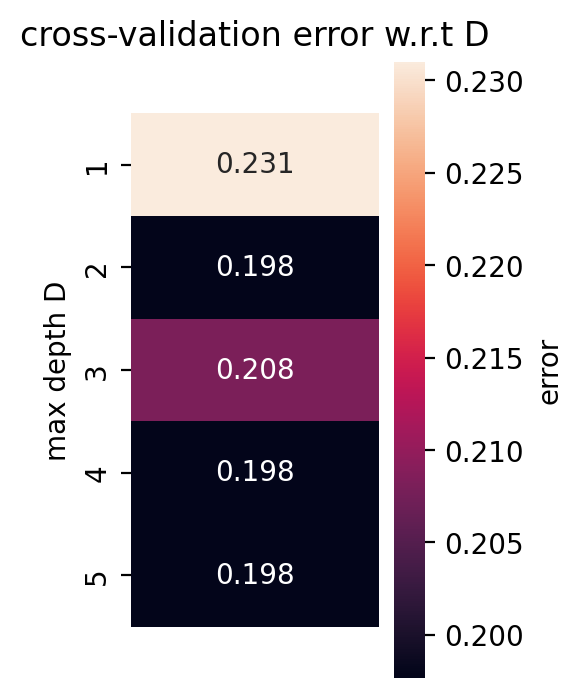

Best max depth D: {'max_depth': 2}
Training error: 0.17582417582417587
Test error: 0.1351351351351351


In [112]:
trees(X_train,Y_train,X_test,Y_test)

#### Result #2

In [113]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:92][:,[7,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:92] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

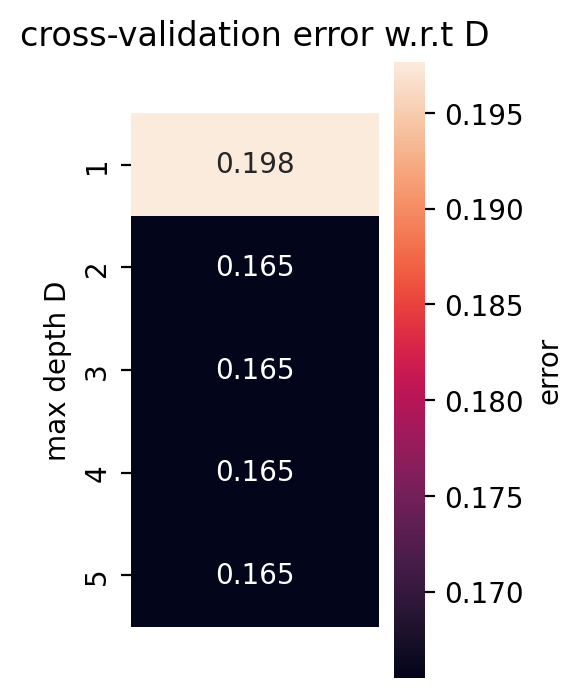

Best max depth D: {'max_depth': 2}
Training error: 0.1428571428571429
Test error: 0.12972972972972974


In [114]:
trees(X_train,Y_train,X_test,Y_test)

#### Result #3

In [115]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:92][:,[7,0]] 
X_train = np.delete(X_train, 11, axis=0) 
Y_train = Y_shuffled[:92] 
Y_train = np.delete(Y_train, 11, axis=0) 
X_test = X_shuffled[92:463][:,[7,0]]
Y_test = Y_shuffled[92:463]

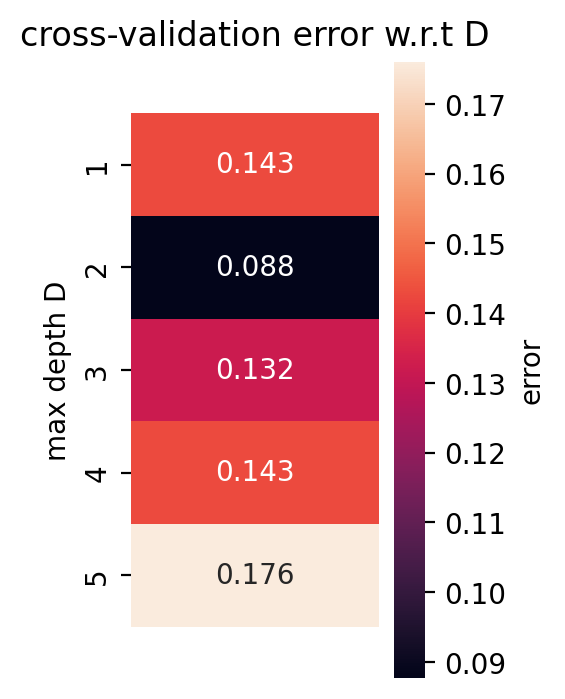

Best max depth D: {'max_depth': 2}
Training error: 0.08791208791208793
Test error: 0.16486486486486485


In [116]:
trees(X_train,Y_train,X_test,Y_test)

In [117]:
totalr_training_data313 = r_training_data3/3
totalr_testing_data313 = r_testing_data3/3
r_training_data3 = 0
r_testing_data3 = 0
print("Training average :",totalr_training_data313)
print("Training average :",totalr_testing_data313)

Training average : 0.13553113553113558
Training average : 0.14324324324324322


## Partition 2

### Logistic regression classifier

#### Result #1

In [118]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]]
Y_train = Y_shuffled[:370]
X_test  = X_shuffled[370:463][:,[7,0]]
Y_test  = Y_shuffled[370:463]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 93.719x0+2.920x1+-196.316=0


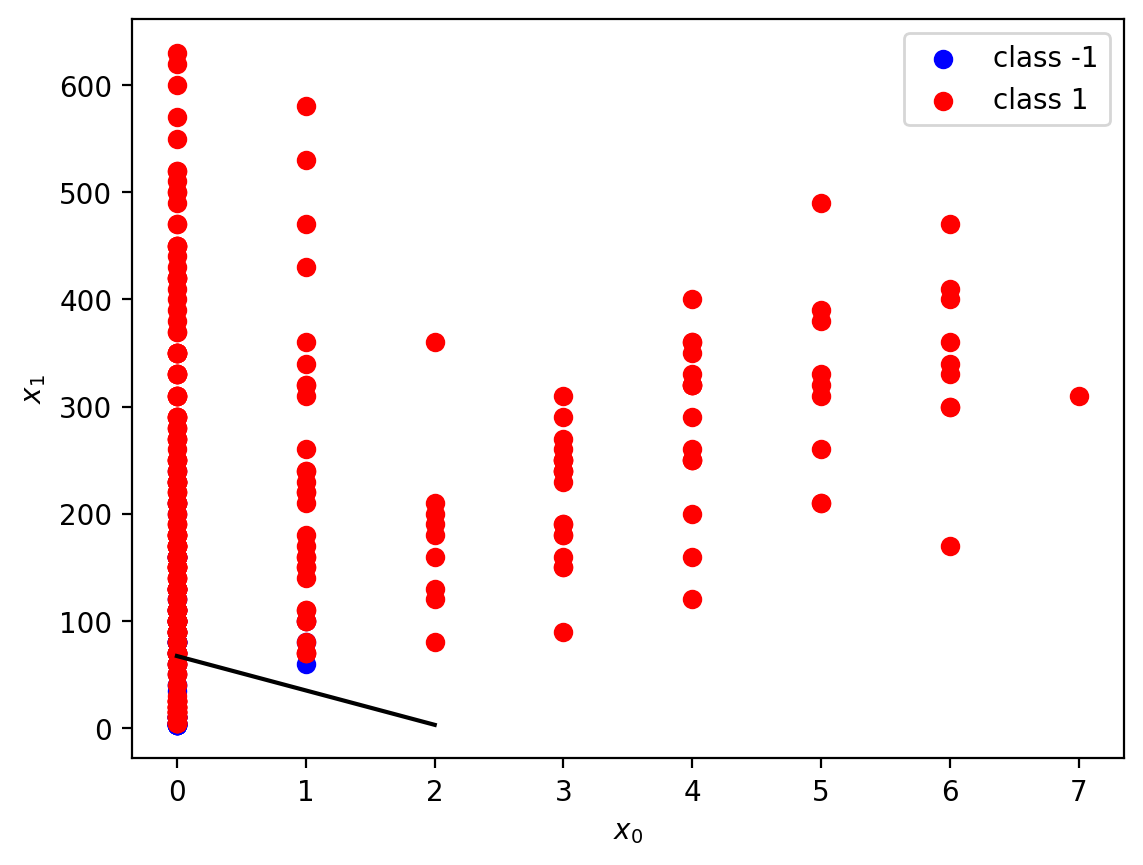

Training error: 0.20540540540540542


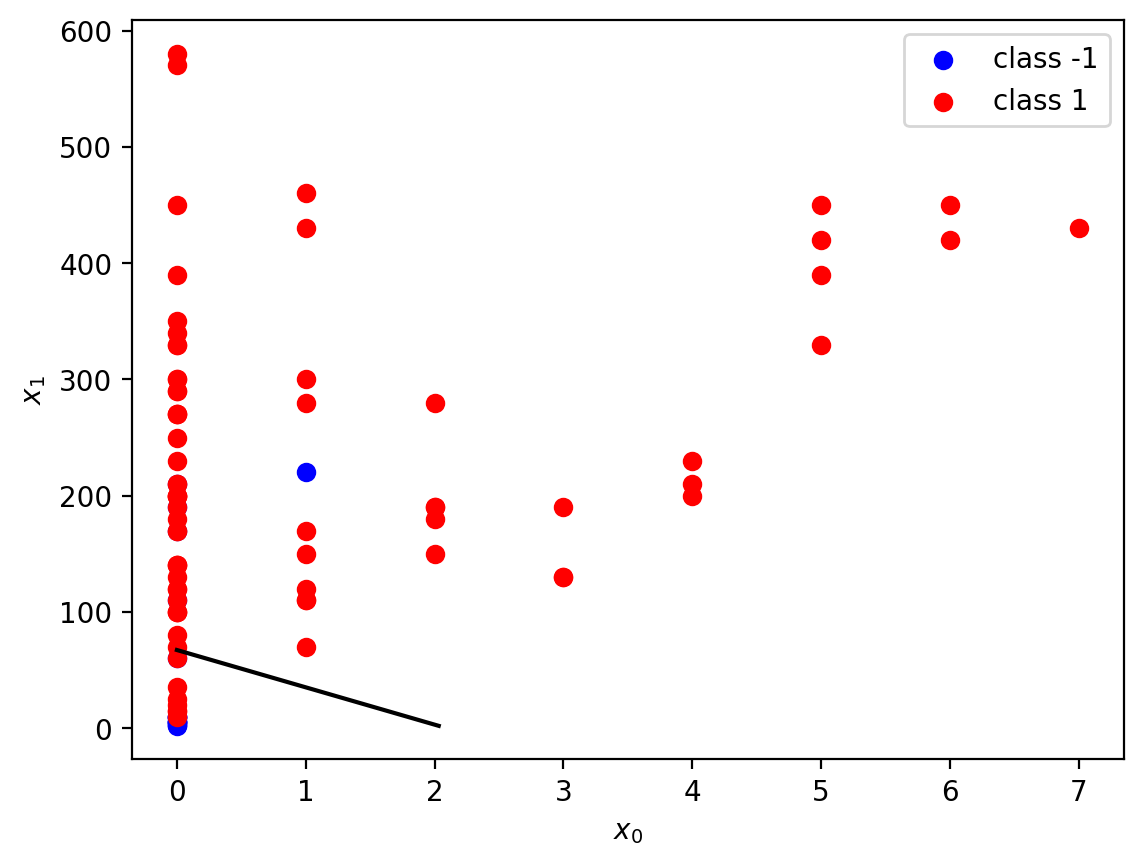

Test error: 0.13043478260869565


In [119]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #2

In [120]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]]
Y_train = Y_shuffled[:370]
X_test  = X_shuffled[370:463][:,[7,0]]
Y_test  = Y_shuffled[370:463]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 90.548x0+2.147x1+-184.175=0


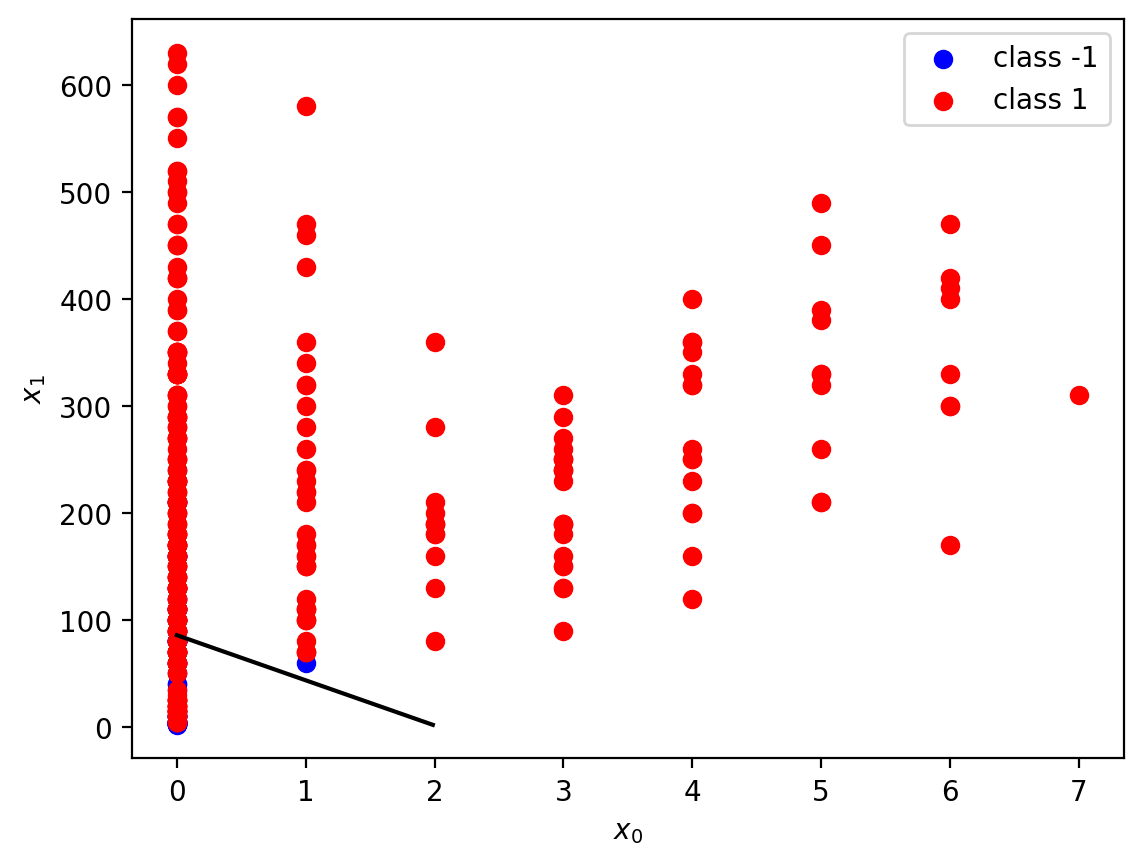

Training error: 0.1972972972972973


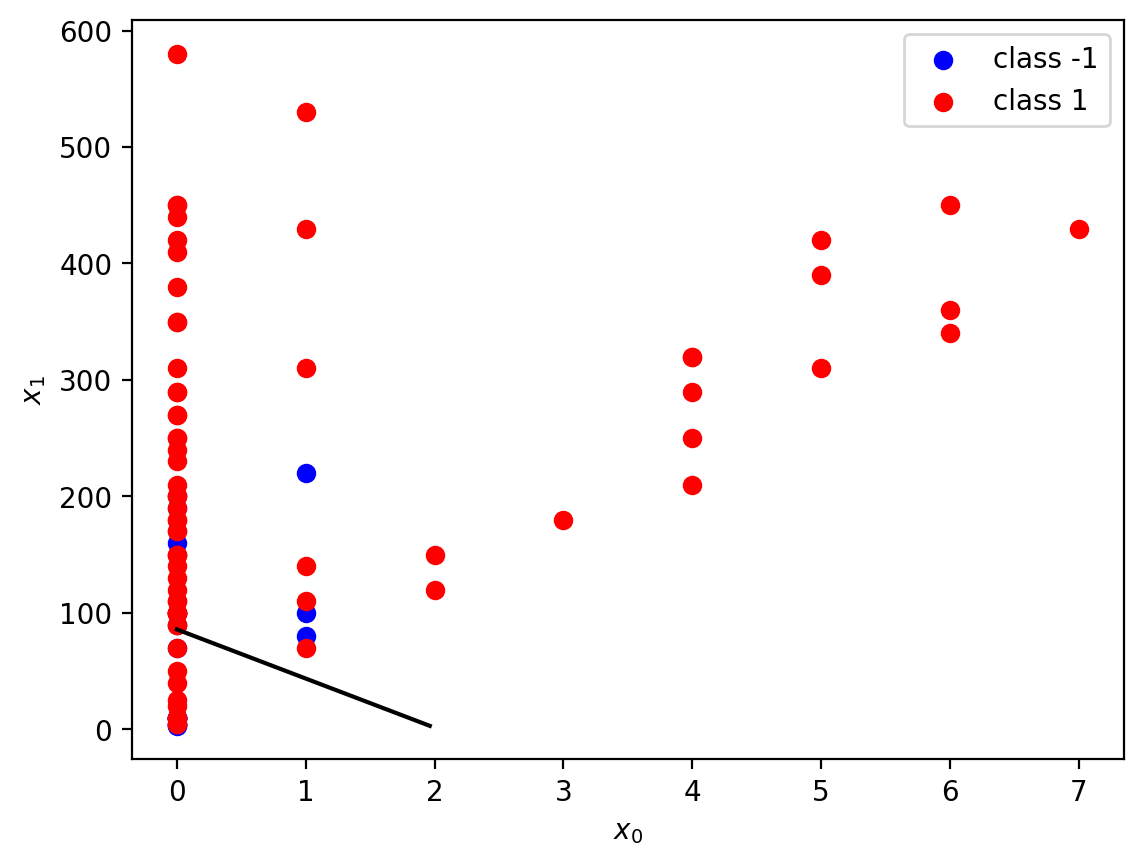

Test error: 0.1956521739130435


In [121]:
logreg(X_train,Y_train, X_test, Y_test)

#### Result #3

In [122]:
# Divide the data points into training set and test set.
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]]
Y_train = Y_shuffled[:370]
X_test  = X_shuffled[370:463][:,[7,0]]
Y_test  = Y_shuffled[370:463]

C:\Users\Anthony\AppData\Local\Temp\ipykernel_2964\2972820167.py:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


Decision boundary: 87.111x0+47.248x1+-215.492=0


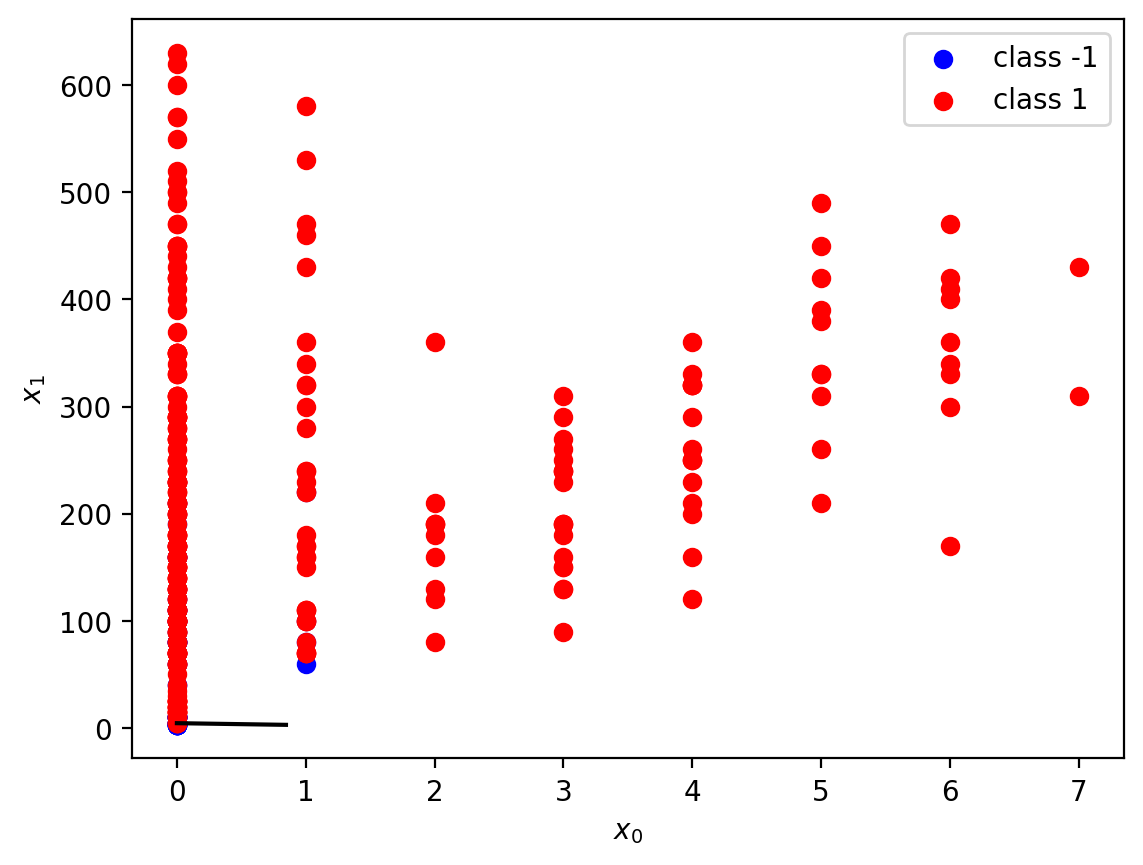

Training error: 0.15675675675675677


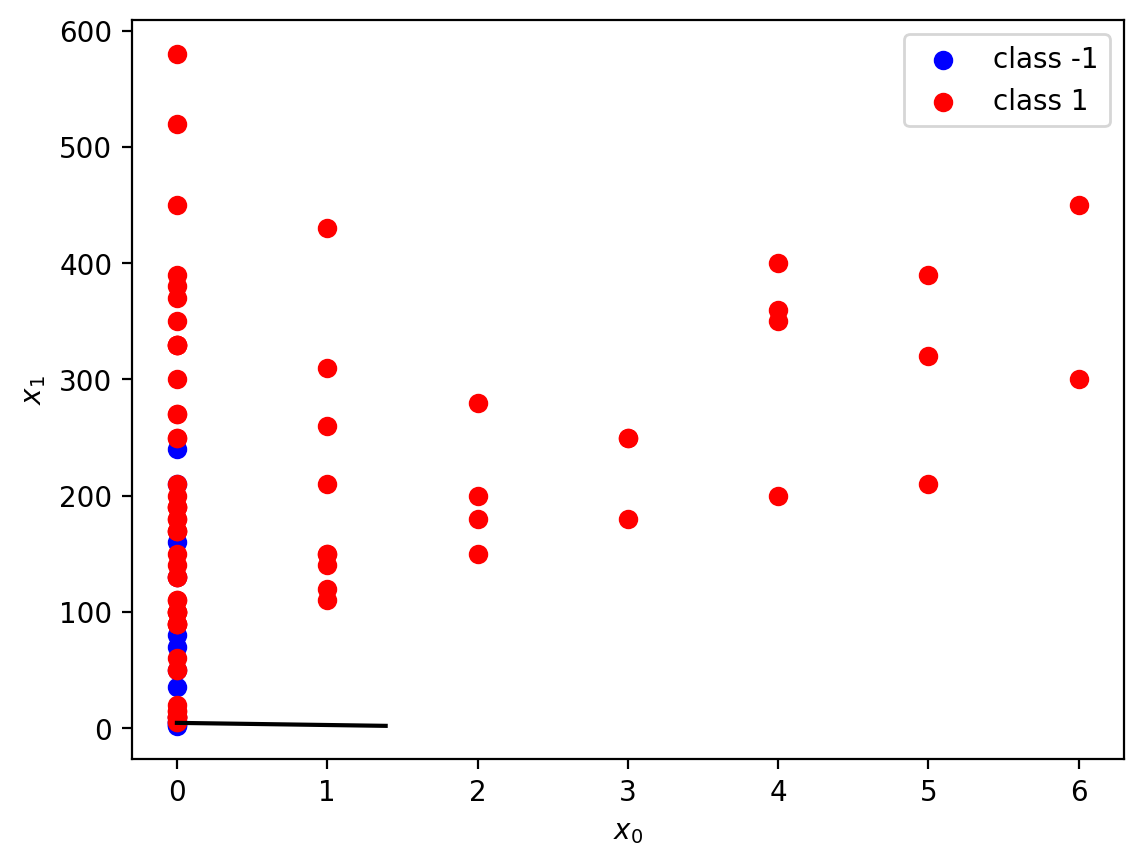

Test error: 0.11956521739130435


In [123]:
logreg(X_train,Y_train, X_test, Y_test)

In [124]:
totalr_training_data321 = r_training_data1/3
totalr_testing_data321 = r_testing_data1/3
r_training_data1 = 0
r_testing_data1 = 0
print("Training average :",totalr_training_data321)
print("Training average :",totalr_testing_data321)

Training average : 0.1864864864864865
Training average : 0.14855072463768115


### Support Vector Machines

#### Result #1

In [125]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:370] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[370:463][:,[7,0]]
Y_test = Y_shuffled[370:463]

Test #1
C = 0.1
Decision boundary: 0.000x0+-0.000x1+1.000=0


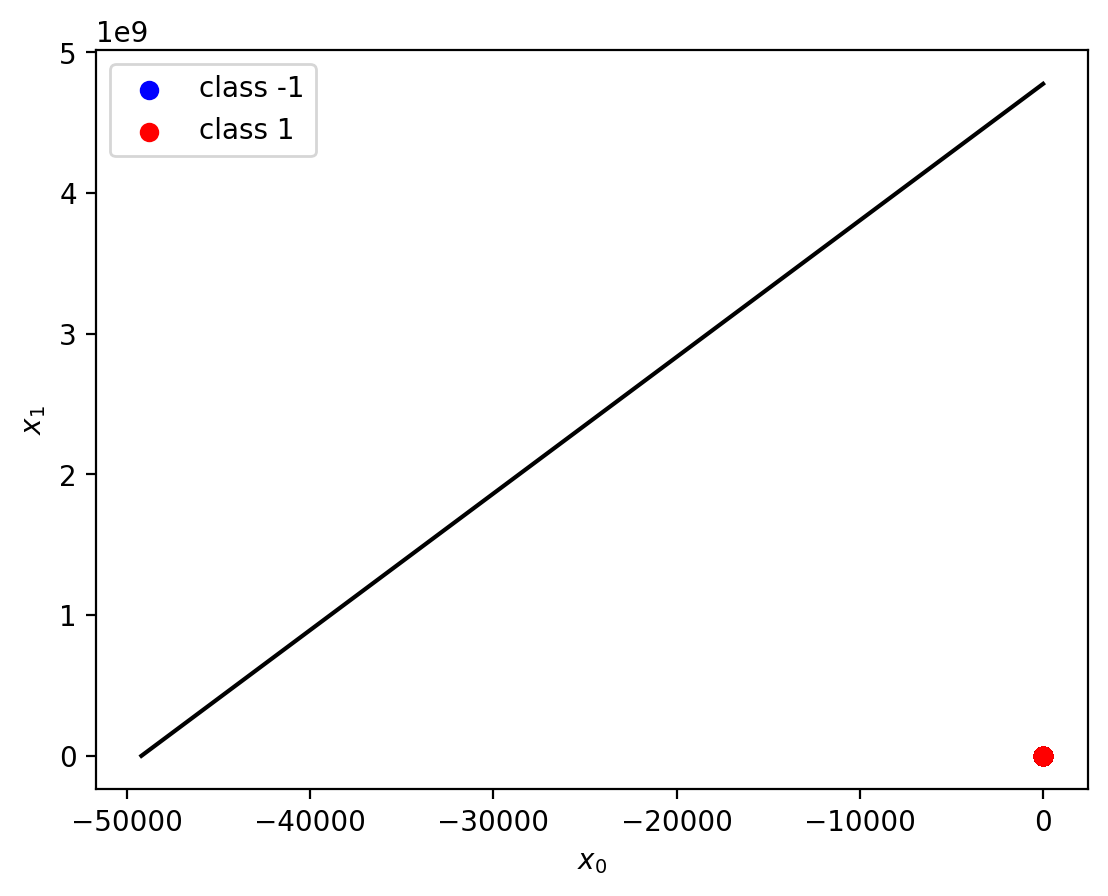

Training error: 0.17615176151761514




Test #1
C = 1
Decision boundary: 0.324x0+-0.009x1+1.057=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


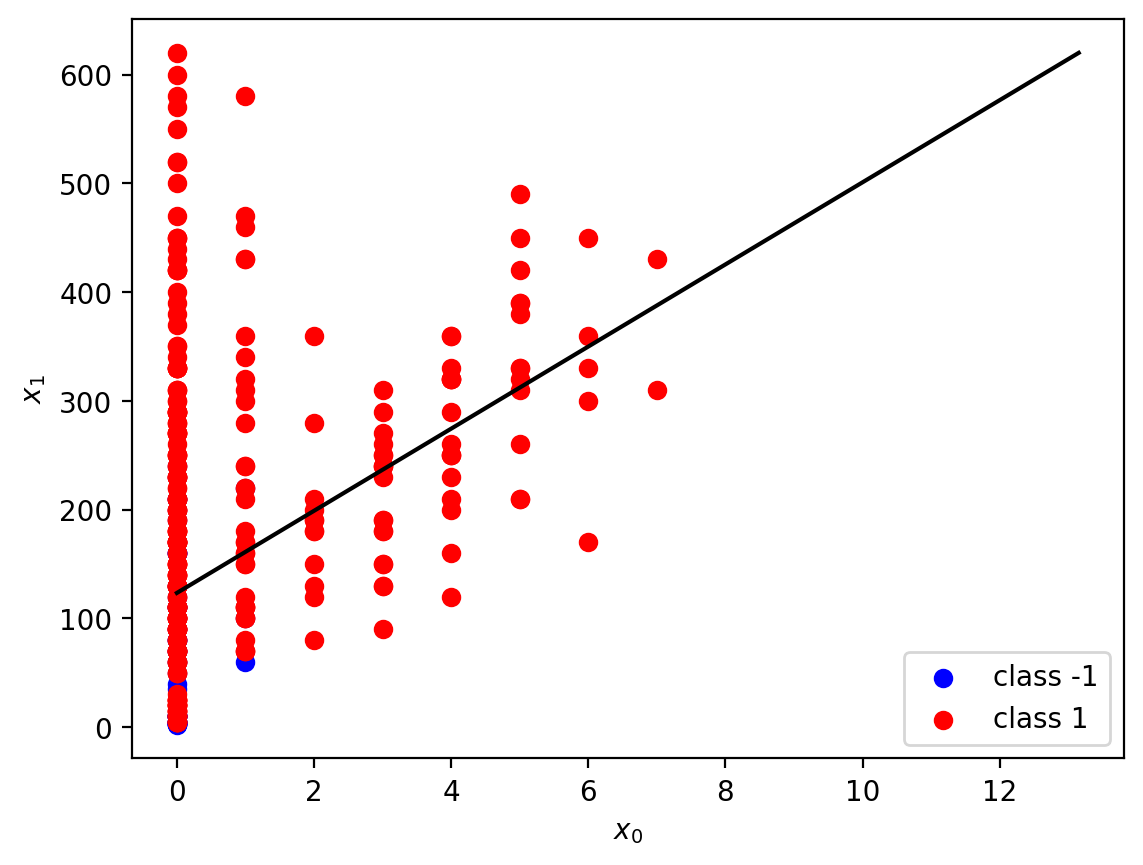

Training error: 0.6016260162601625




Test #1
C = 10
Decision boundary: 0.489x0+-0.014x1+0.449=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


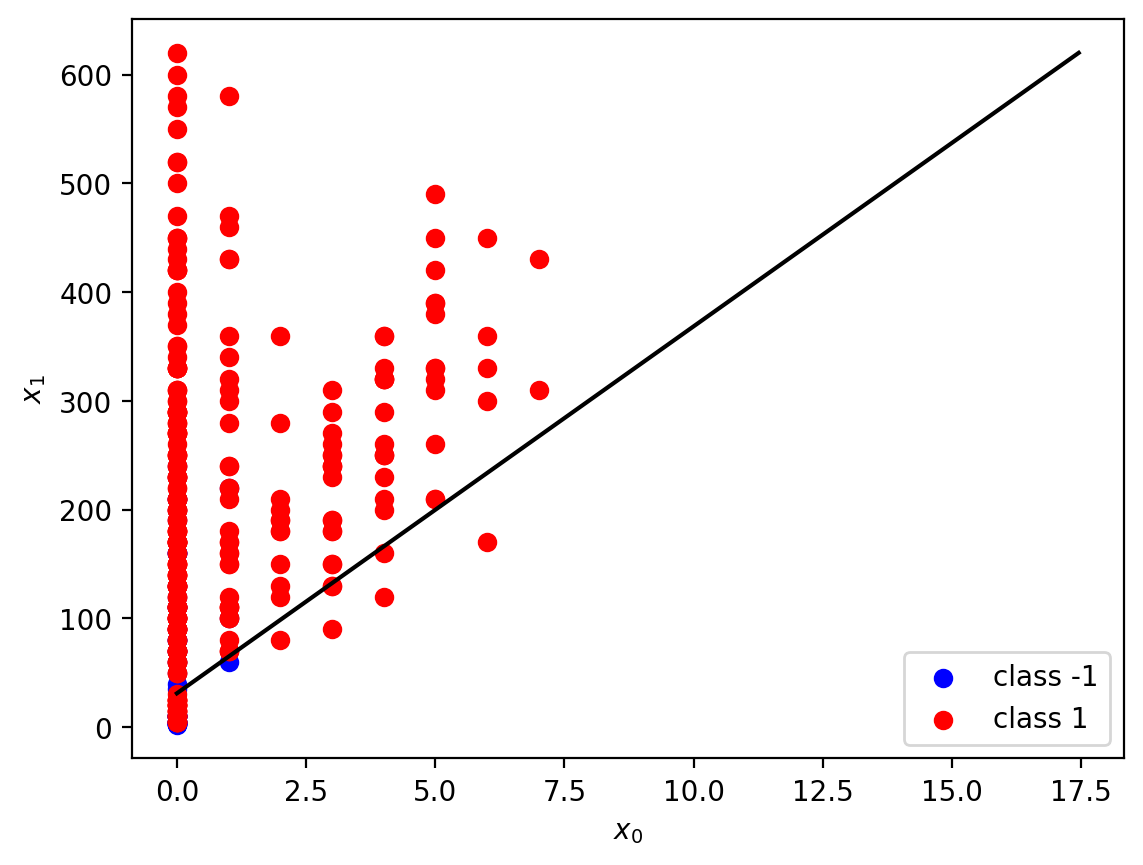

Training error: 0.7967479674796748




Test #1
C = 100
Decision boundary: -0.440x0+0.009x1+-1.027=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


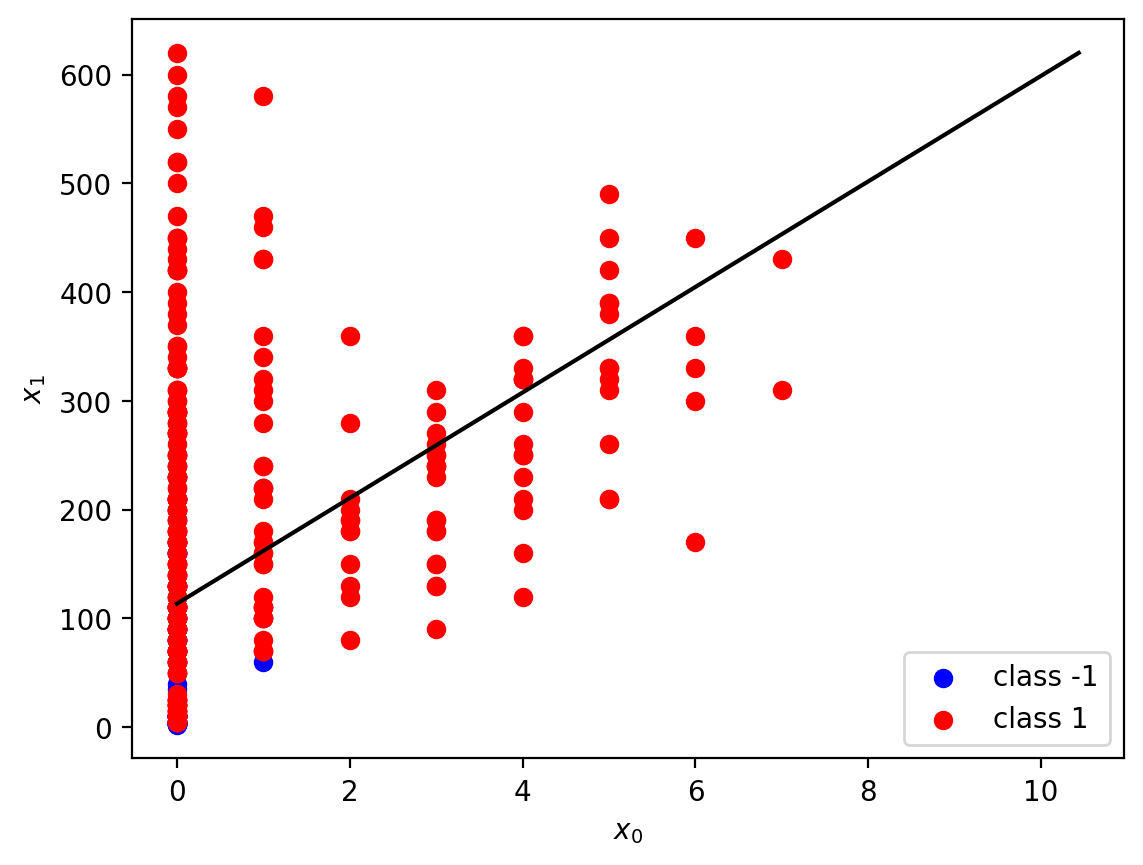

Training error: 0.4281842818428184




Test #1
C = 1000
Decision boundary: -1.654x0+-0.053x1+-0.788=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


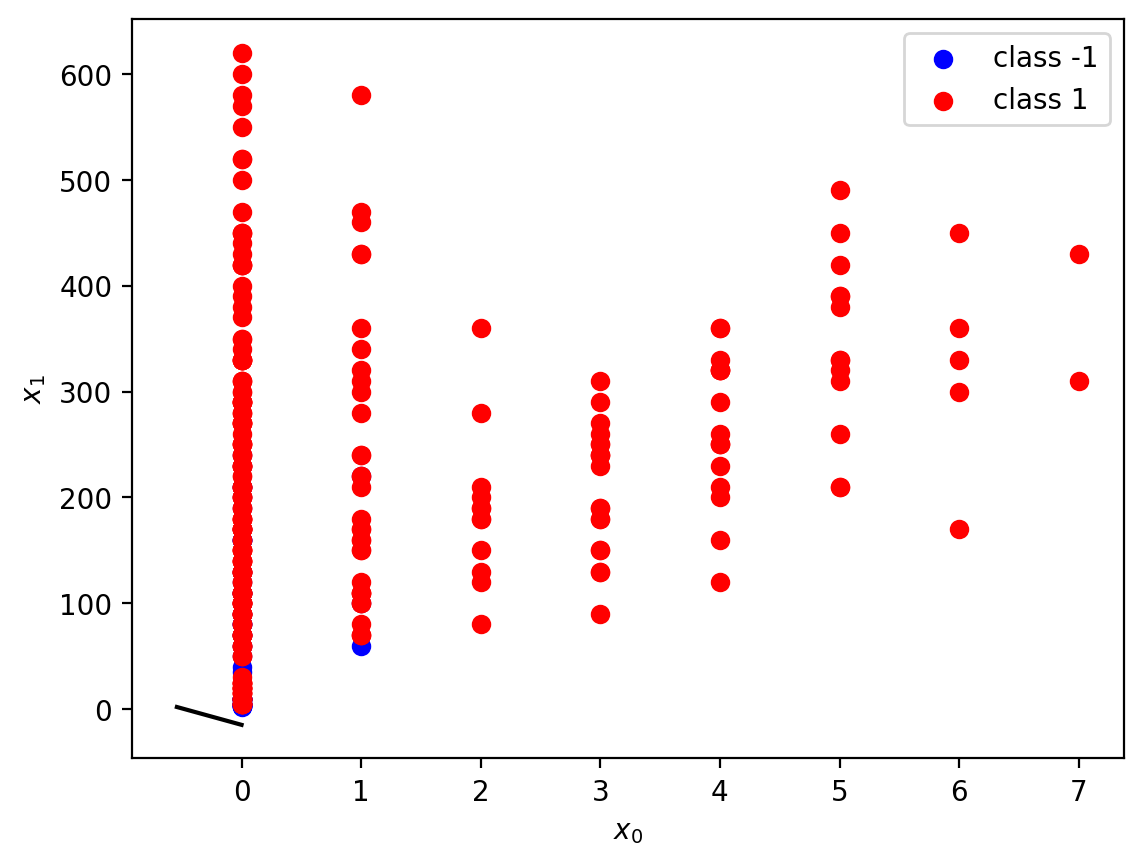

Training error: 0.8238482384823849




Best parameter C* = 0.1
Decision boundary: 0.000x0+-0.000x1+1.000=0


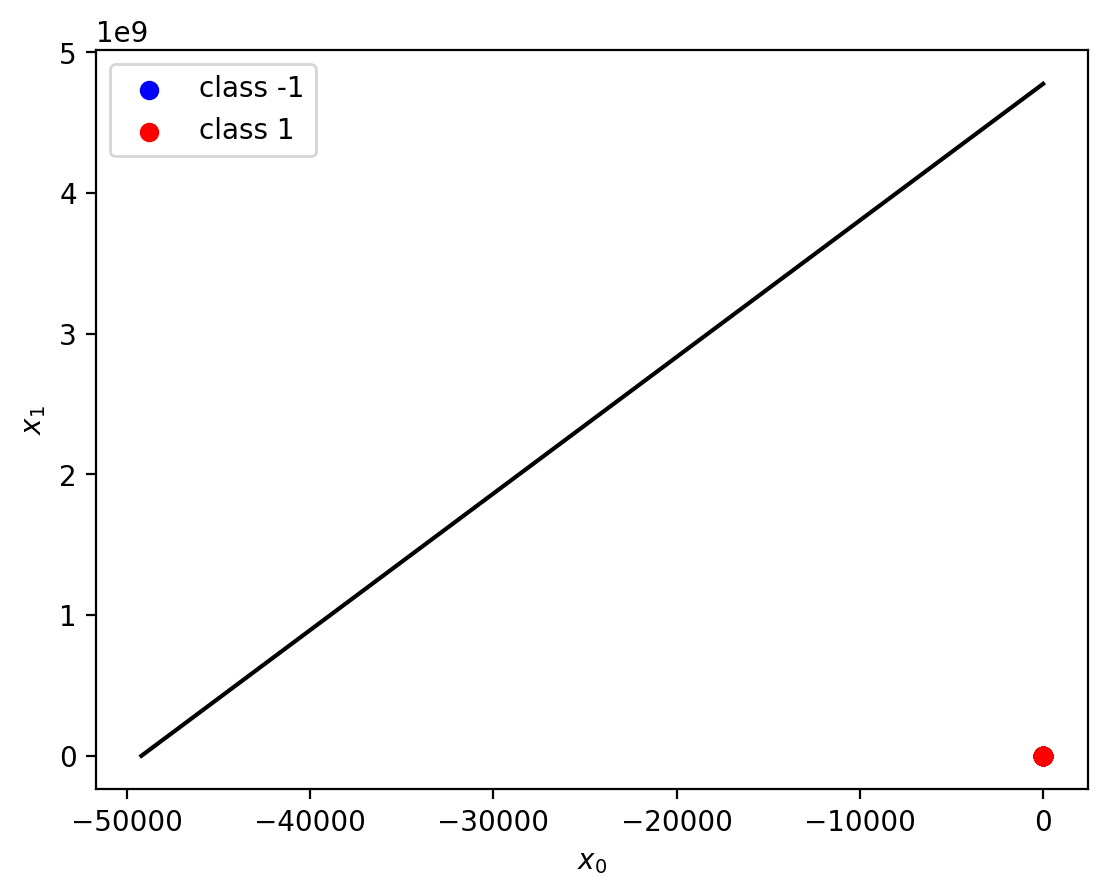

Test error: 0.2065217391304348


In [126]:
svmf(X_train,Y_train, X_test, Y_test)

### Result #2

In [127]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:370] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[370:463][:,[7,0]]
Y_test = Y_shuffled[370:463]

Test #1
C = 0.1
Decision boundary: 0.000x0+-0.000x1+1.000=0


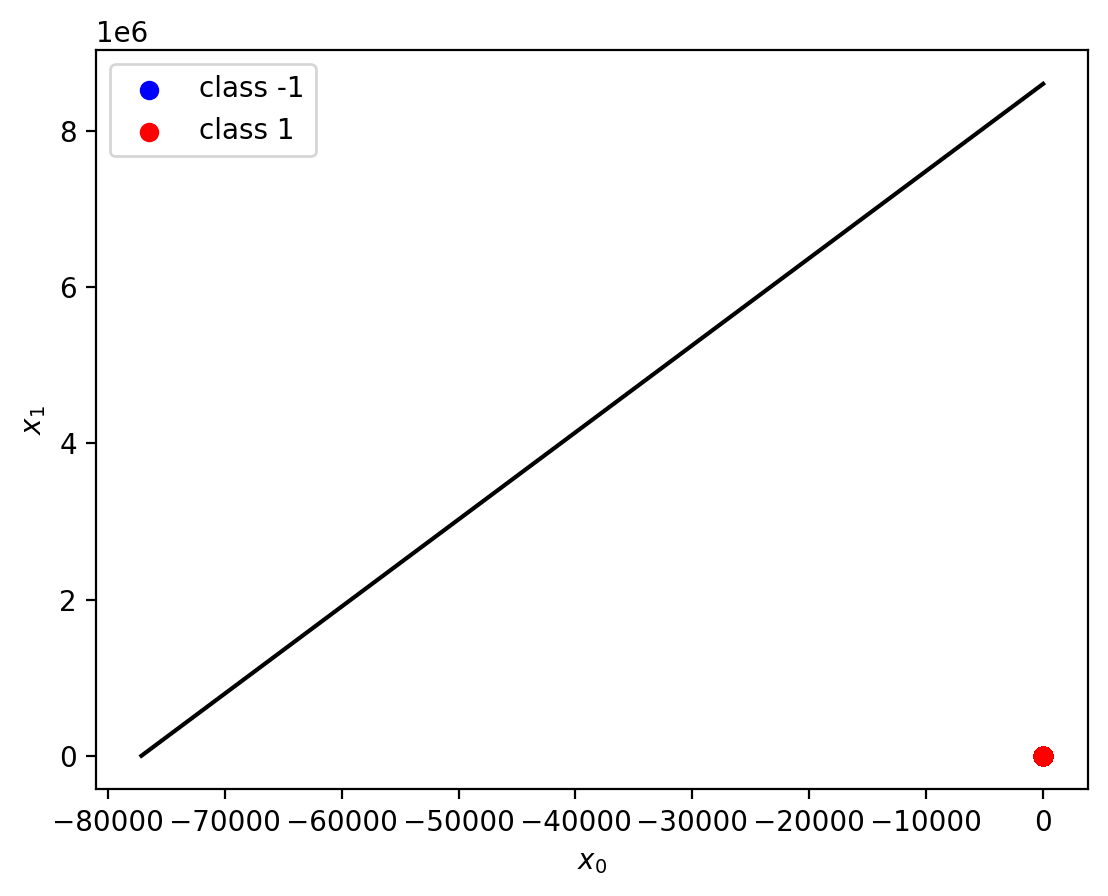

Training error: 0.1707317073170732




Test #1
C = 1
Decision boundary: 0.099x0+-0.002x1+1.029=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


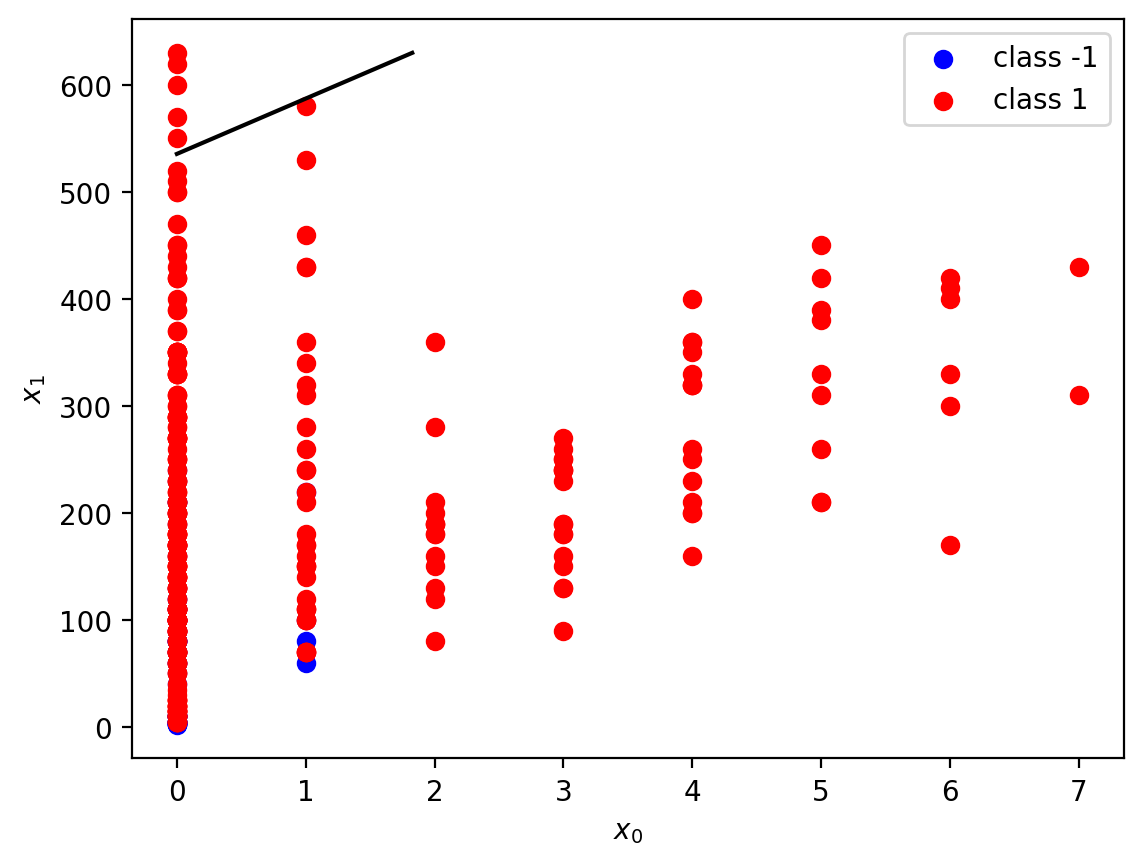

Training error: 0.1842818428184282




Test #1
C = 10
Decision boundary: 0.315x0+-0.026x1+1.083=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


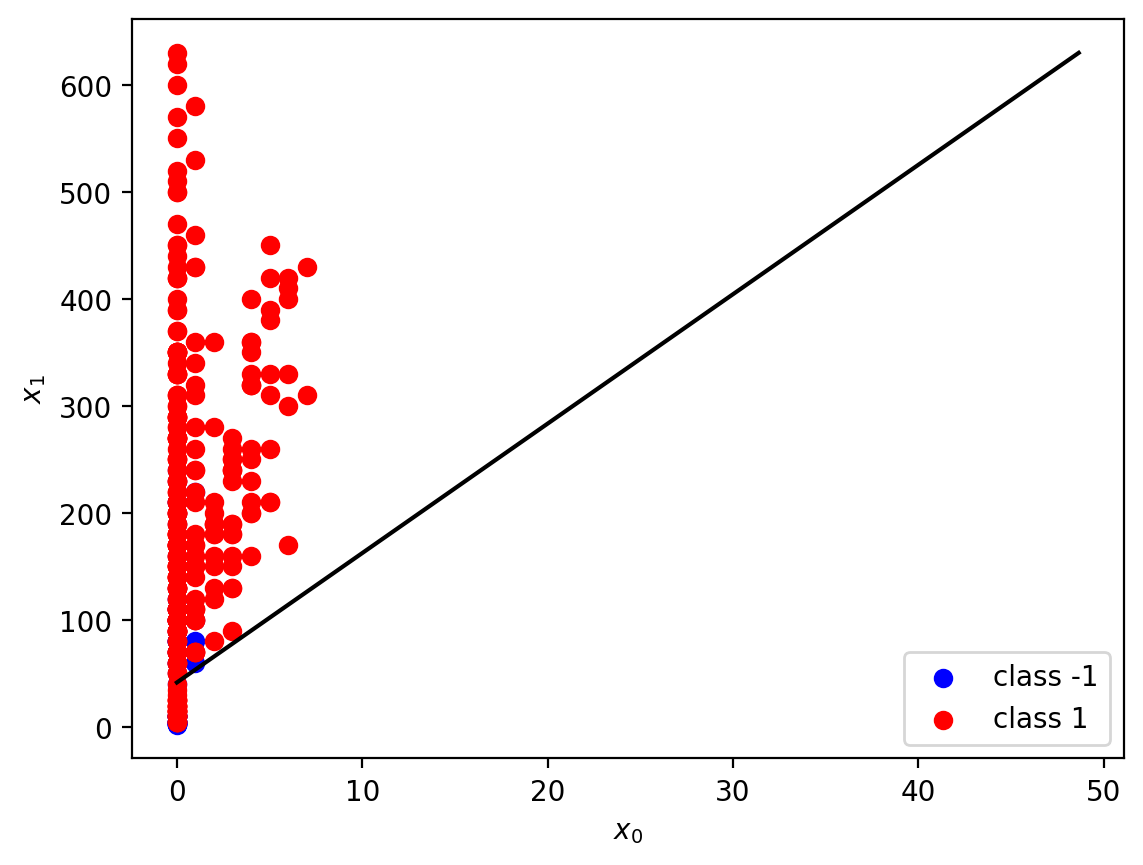

Training error: 0.8075880758807588




Test #1
C = 100
Decision boundary: -0.448x0+0.000x1+-1.021=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


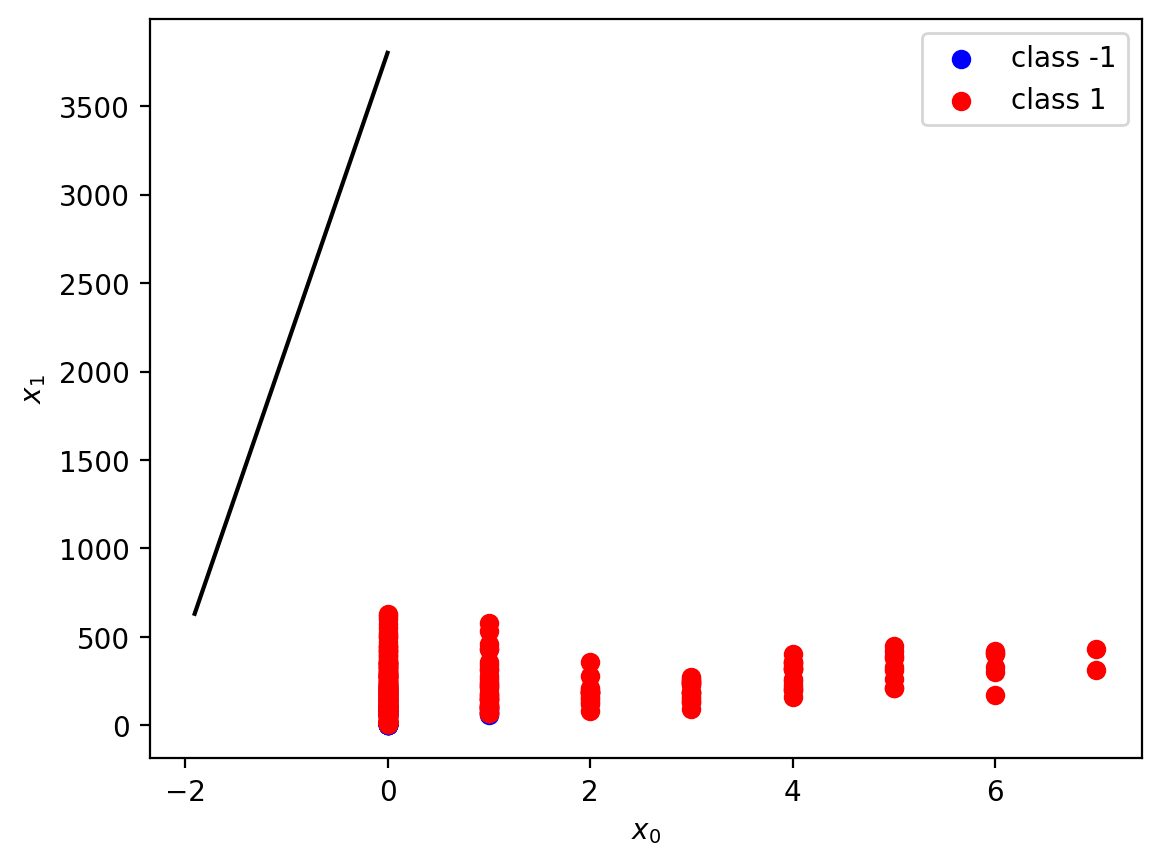

Training error: 0.8292682926829268




Test #1
C = 1000
Decision boundary: -1.344x0+-0.041x1+-0.795=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


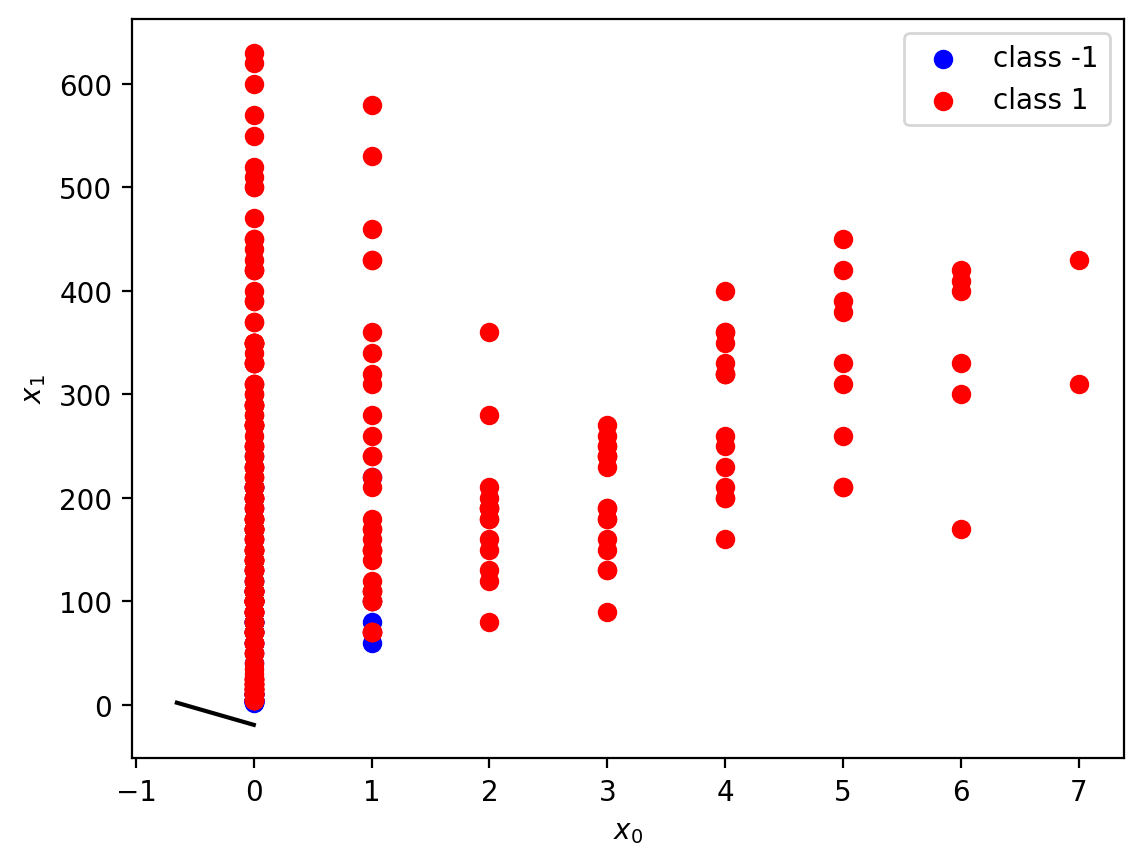

Training error: 0.8292682926829268




Best parameter C* = 0.1
Decision boundary: 0.000x0+-0.000x1+1.000=0


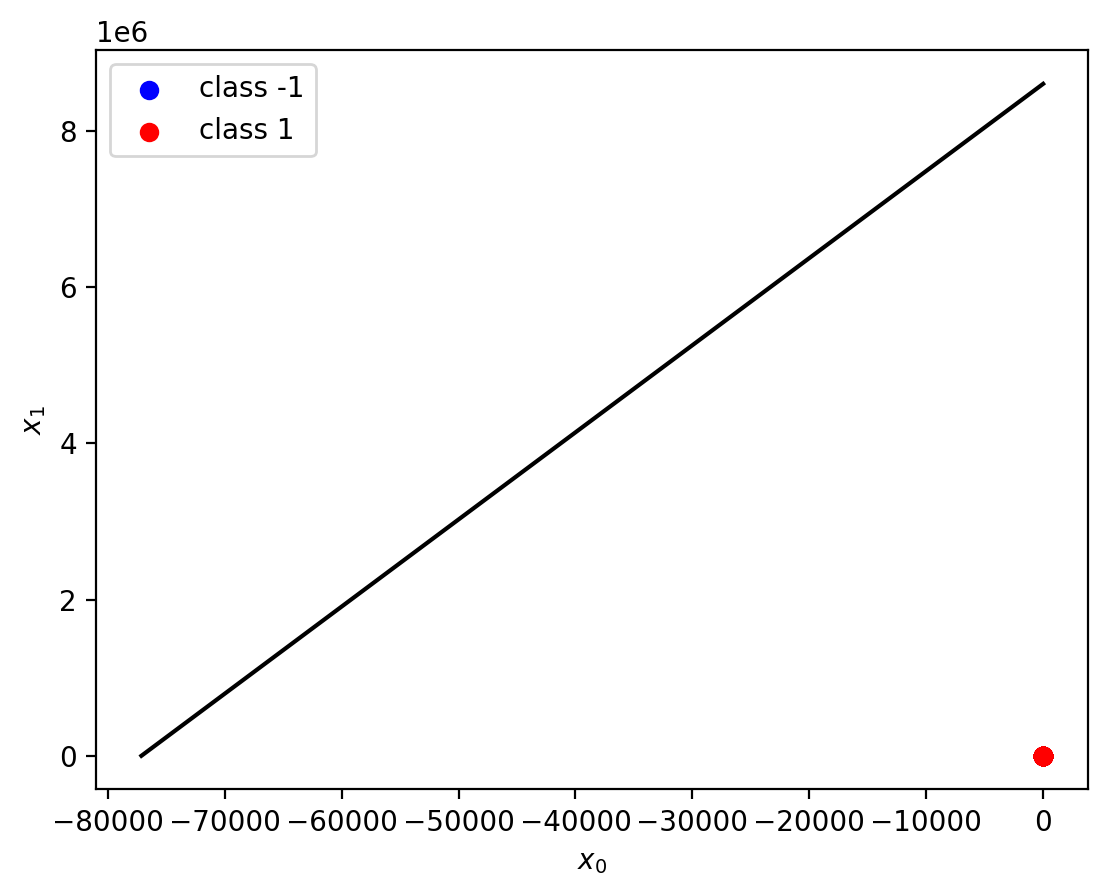

Test error: 0.2282608695652174


In [128]:
svmf(X_train,Y_train, X_test, Y_test)

### Result #3

In [129]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:370] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[370:463][:,[7,0]]
Y_test = Y_shuffled[370:463]

Test #1
C = 0.1
Decision boundary: 0.066x0+0.002x1+0.731=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


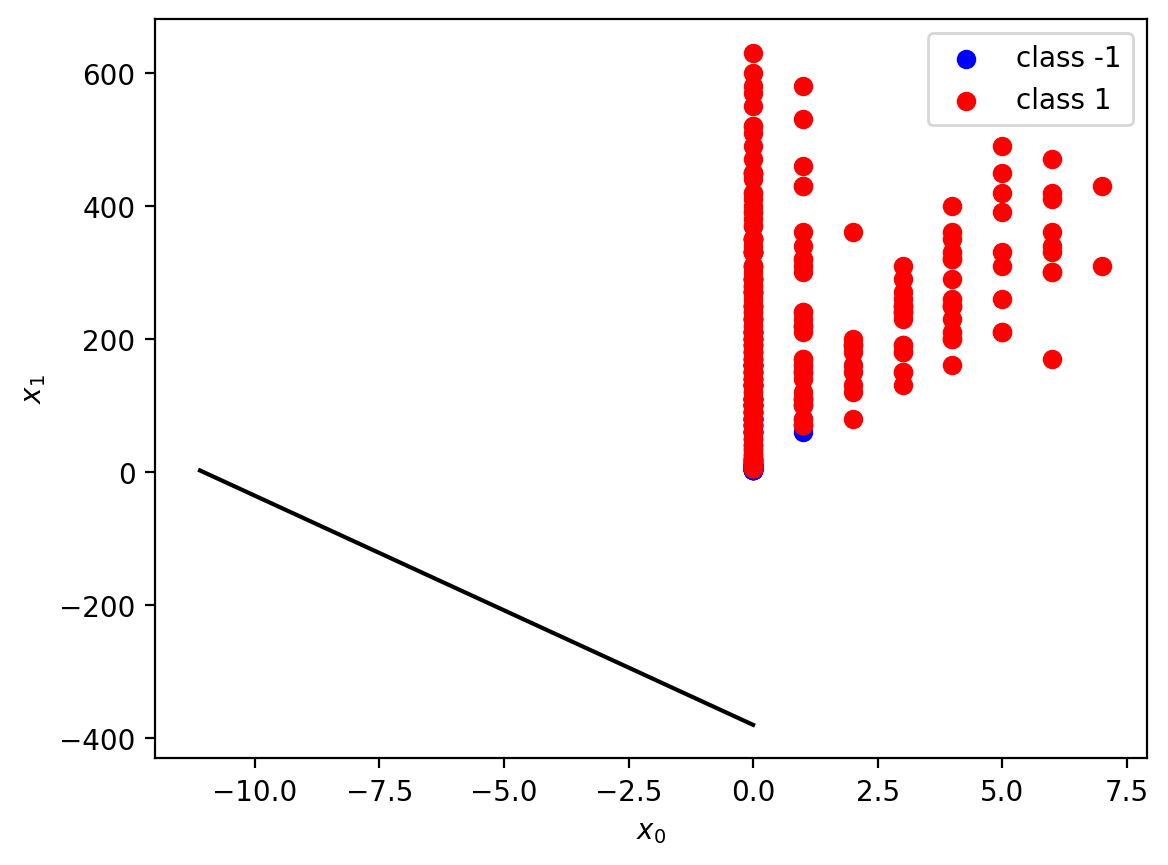

c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training error: 0.20054200542005418




Test #1
C = 1
Decision boundary: 0.413x0+-0.013x1+1.026=0


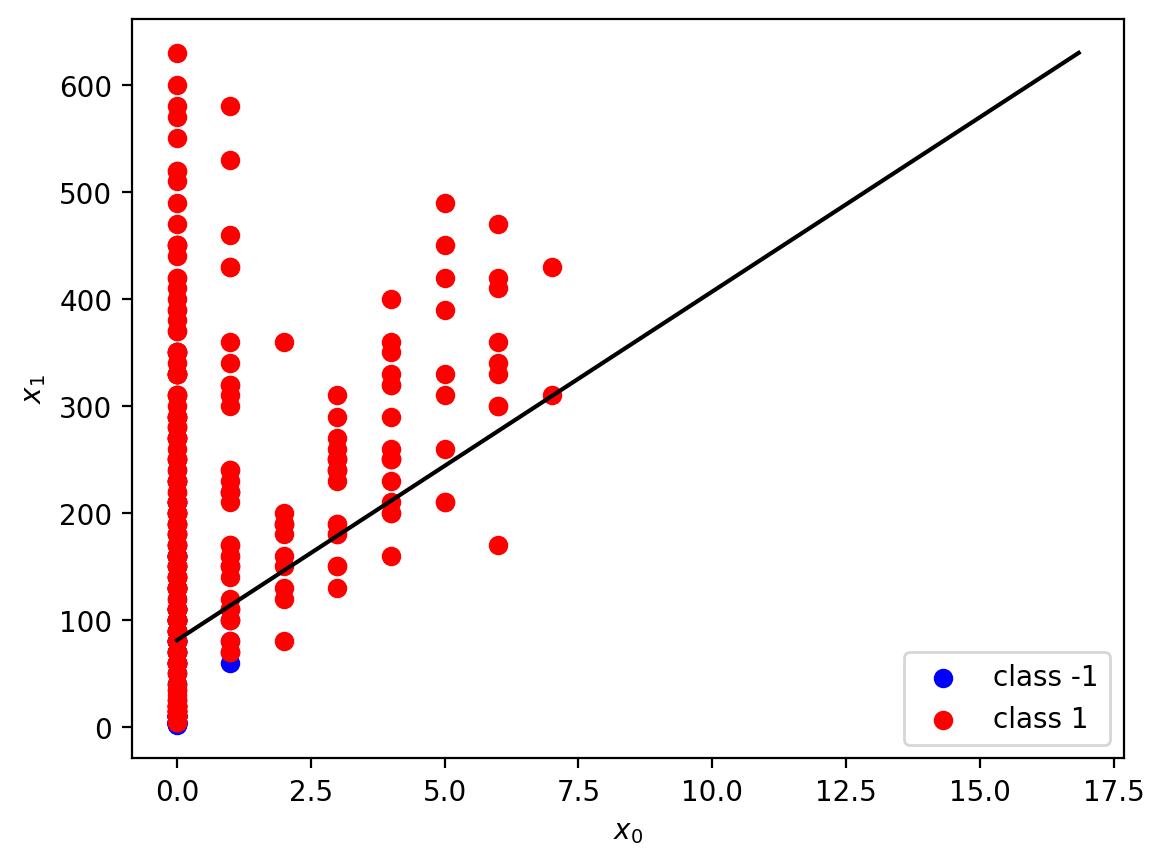

Training error: 0.7479674796747968




Test #1
C = 10
Decision boundary: 0.745x0+0.034x1+-1.010=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


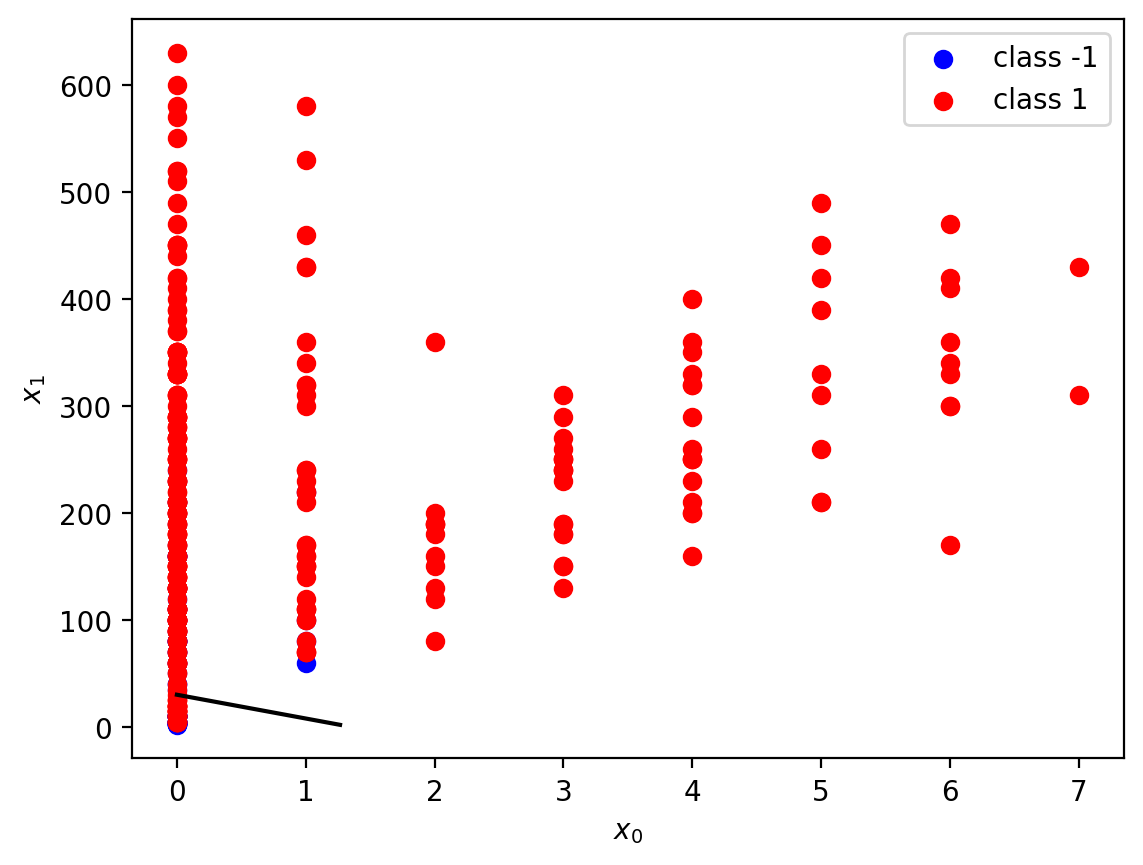

Training error: 0.19512195121951215




Test #1
C = 100
Decision boundary: -0.698x0+0.136x1+-1.038=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


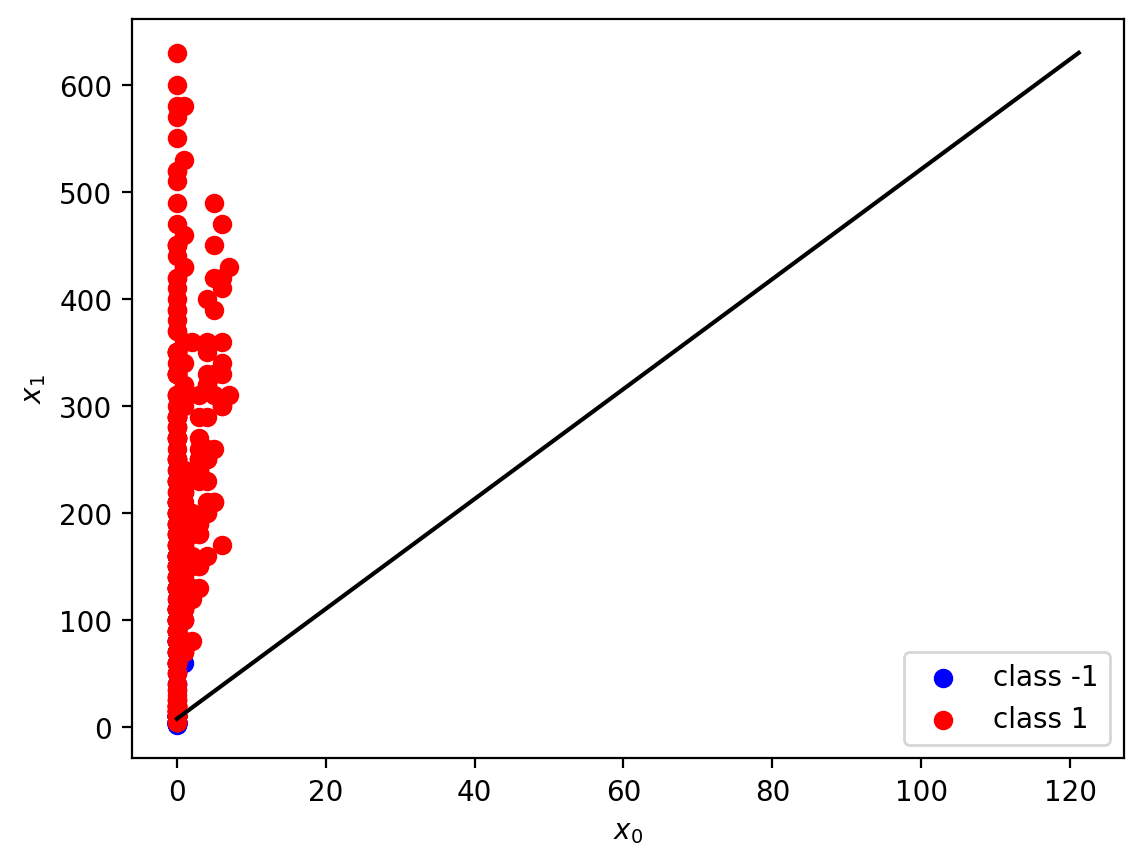

Training error: 0.16260162601626016




Test #1
C = 1000
Decision boundary: -1.458x0+-0.032x1+-0.841=0


c:\Users\Anthony\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


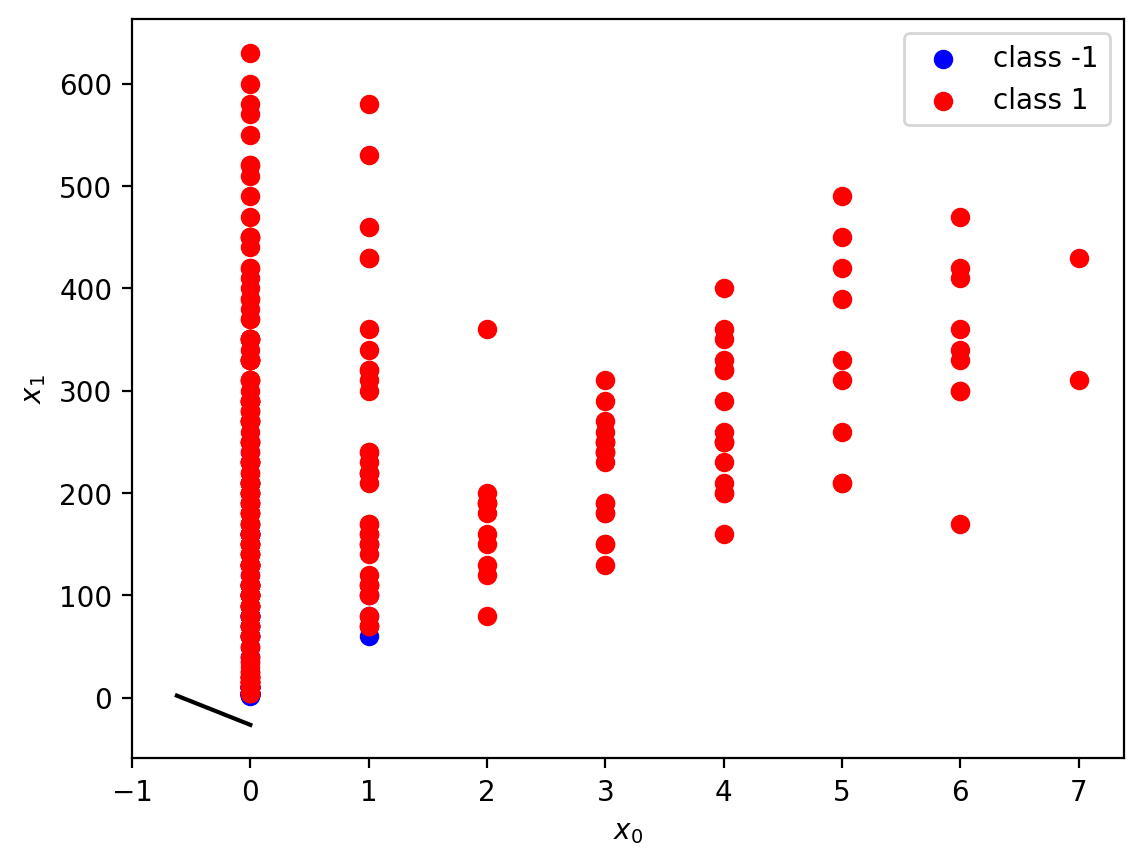

Training error: 0.7994579945799458




Best parameter C* = 100
Decision boundary: -0.698x0+0.136x1+-1.038=0


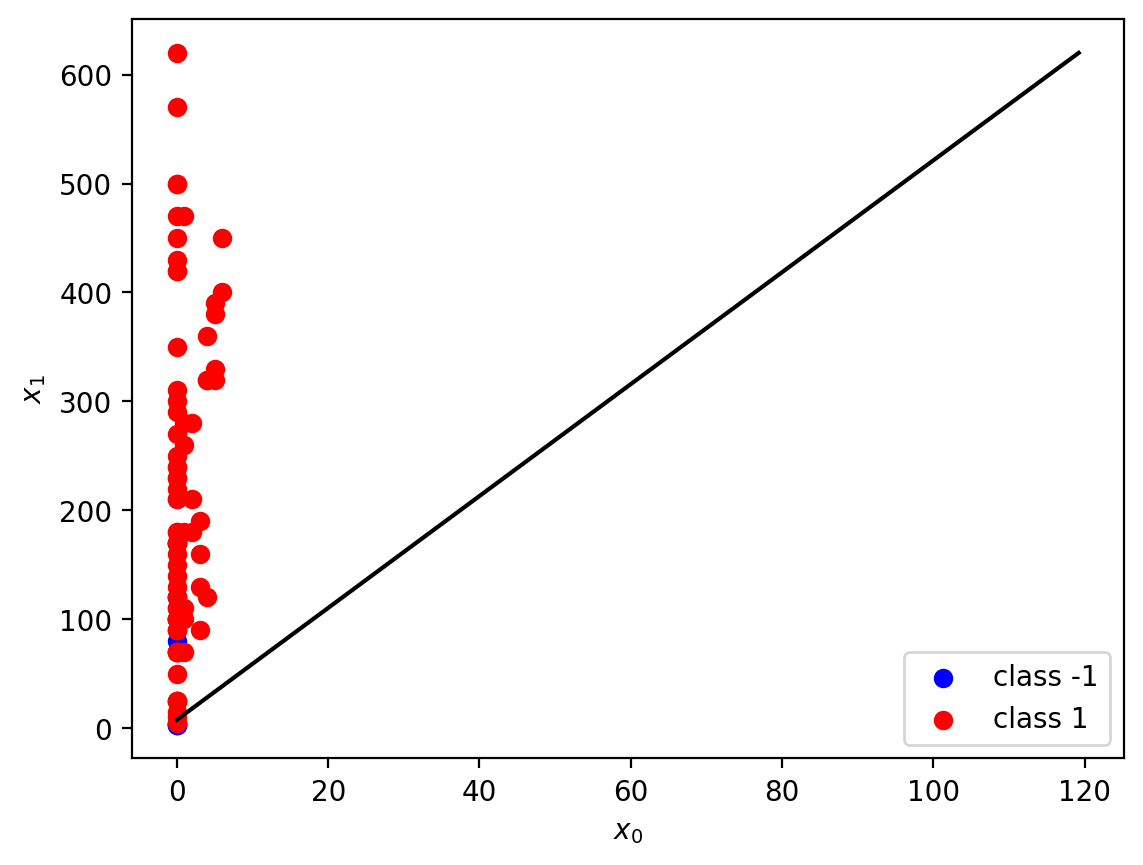

Test error: 0.06521739130434778


In [130]:
svmf(X_train,Y_train, X_test, Y_test)

In [131]:
totalr_training_data322 = r_training_data2/3
totalr_testing_data322 = r_testing_data2/3
r_training_data2 = 0
r_testing_data2 = 0
print("Training average :",totalr_training_data322)
print("Training average :",totalr_testing_data322)

Training average : 0.16982836495031617
Training average : 0.16666666666666666


### Decision Tree

#### Result #1

In [132]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:370] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[370:463][:,[7,0]]
Y_test = Y_shuffled[370:463]

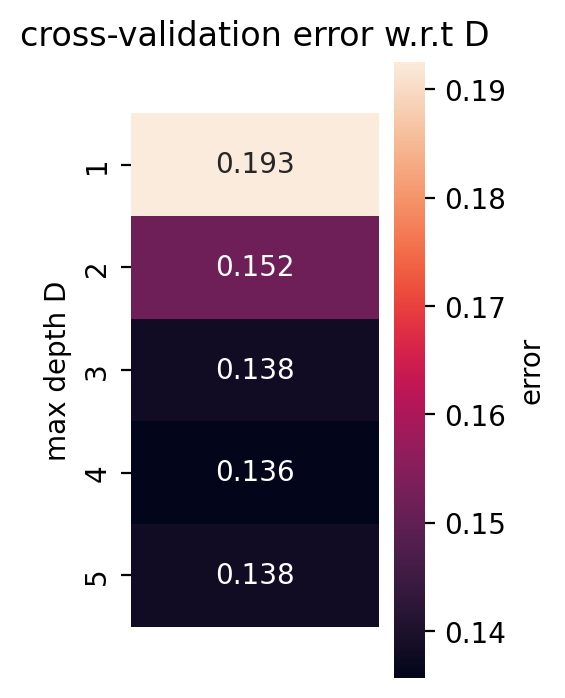

Best max depth D: {'max_depth': 4}
Training error: 0.13008130081300817
Test error: 0.14130434782608692


In [133]:
trees(X_train,Y_train, X_test, Y_test)

#### Result #2

In [134]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:370] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[370:463][:,[7,0]]
Y_test = Y_shuffled[370:463]

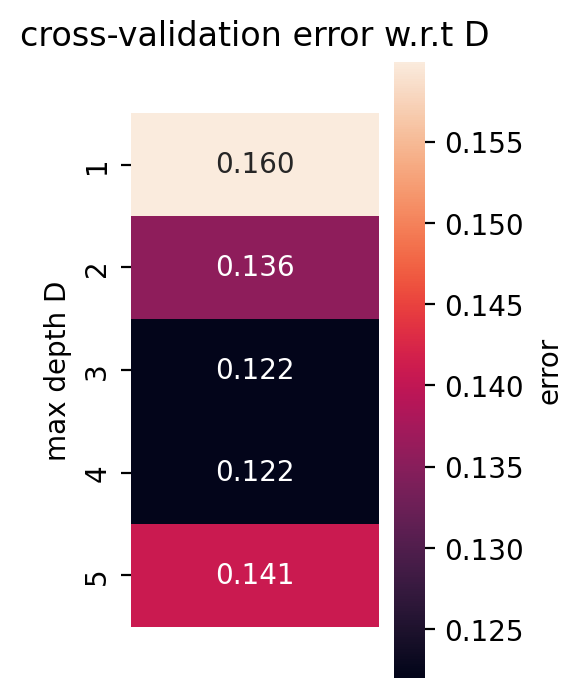

Best max depth D: {'max_depth': 3}
Training error: 0.12195121951219512
Test error: 0.17391304347826086


In [135]:
trees(X_train,Y_train, X_test, Y_test)

#### Result #3

In [136]:
np.random.shuffle(X_and_Y2) 
X_shuffled = X_and_Y2[:,:9]
Y_shuffled = X_and_Y2[:,9]

X_train = X_shuffled[:370][:,[7,0]] 
X_train = np.delete(X_train, 42, axis=0) 
Y_train = Y_shuffled[:370] 
Y_train = np.delete(Y_train, 42, axis=0) 
X_test = X_shuffled[370:463][:,[7,0]]
Y_test = Y_shuffled[370:463]

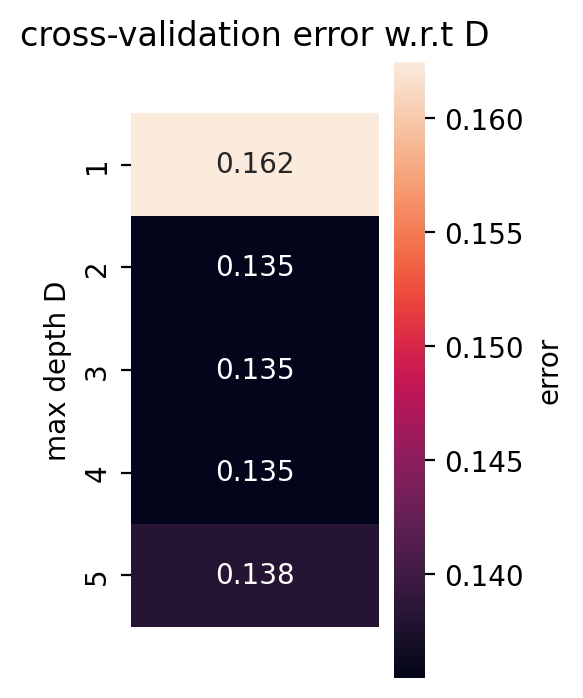

Best max depth D: {'max_depth': 2}
Training error: 0.1355013550135501
Test error: 0.11956521739130432


In [137]:
trees(X_train,Y_train, X_test, Y_test)

In [138]:
totalr_training_data323 = r_training_data3/3
totalr_testing_data323 = r_testing_data3/3
r_training_data3 = 0
r_testing_data3 = 0
print("Training average :",totalr_training_data323)
print("Training average :",totalr_testing_data323)

Training average : 0.12917795844625113
Training average : 0.14492753623188404


In [139]:
print("Training average Log Regression :",totalr_training_data311)
print("Training average SVM :",totalr_training_data312)
print("Training average Decision Tree :",totalr_training_data313)

print("Testing average Log Regression :",totalr_testing_data311)
print("Testing average SVM :",totalr_testing_data312)
print("Testing average Decision Tree :",totalr_testing_data313)

print(" ")

print("Training average Log Regression :",totalr_training_data321)
print("Training average SVM :",totalr_training_data322)
print("Training average Decision Tree :",totalr_training_data323)

print("Testing average Log Regression :",totalr_testing_data321)
print("Testing average SVM :",totalr_testing_data322)
print("Testing average Decision Tree :",totalr_testing_data323)

Training average Log Regression : 0.3369565217391304
Training average SVM : 0.11355311355311355
Training average Decision Tree : 0.13553113553113558
Testing average Log Regression : 0.31711711711711715
Testing average SVM : 0.16846846846846844
Testing average Decision Tree : 0.14324324324324322
 
Training average Log Regression : 0.1864864864864865
Training average SVM : 0.16982836495031617
Training average Decision Tree : 0.12917795844625113
Testing average Log Regression : 0.14855072463768115
Testing average SVM : 0.16666666666666666
Testing average Decision Tree : 0.14492753623188404


In [140]:
testing_average11 = (totalr_testing_data111 + totalr_testing_data211 + totalr_testing_data311)/3
testing_average12 = (totalr_testing_data112 + totalr_testing_data212 + totalr_testing_data312)/3
testing_average13 = (totalr_testing_data113 + totalr_testing_data213 + totalr_testing_data313)/3

testing_average21 = (totalr_testing_data121 + totalr_testing_data221 + totalr_testing_data321)/3
testing_average22 = (totalr_testing_data122 + totalr_testing_data222 + totalr_testing_data322)/3
testing_average23 = (totalr_testing_data123 + totalr_testing_data223 + totalr_testing_data323)/3

In [141]:
data1 = {'Classifier': ['Logical Regression', 'SVM', 'Decision Tree'],
        'A (20/80) Training Accuracy': [totalr_training_data111, totalr_training_data112, totalr_training_data113],
        'A (20/80) Testing Accuracy': [totalr_testing_data111, totalr_testing_data112, totalr_testing_data113],
        'B (20/80) Training Accuracy': [totalr_training_data211, totalr_training_data212, totalr_training_data213],
        'B (20/80) Testing Accuracy': [totalr_testing_data211, totalr_testing_data212, totalr_testing_data213],
        'C (20/80) Training Accuracy': [totalr_training_data311, totalr_training_data312, totalr_training_data313],
        'C (20/80) Testing Accuracy': [totalr_testing_data311, totalr_testing_data312, totalr_testing_data313],
        'Average Testing Accuracy': [testing_average11, testing_average12, testing_average13]}

data2 = {'Classifier': ['Logical Regression', 'SVM', 'Decision Tree'],
        'A (80/20) Training Accuracy': [totalr_training_data121, totalr_training_data122, totalr_training_data123],
        'A (80/20) Testing Accuracy': [totalr_testing_data121, totalr_testing_data122, totalr_testing_data123],
        'B (80/20) Training Accuracy': [totalr_training_data221, totalr_training_data222, totalr_training_data223],
        'B (80/20) Testing Accuracy': [totalr_testing_data221, totalr_testing_data222, totalr_testing_data223],
        'C (80/20) Training Accuracy': [totalr_training_data321, totalr_training_data322, totalr_training_data323],
        'C (80/20) Testing Accuracy': [totalr_testing_data321, totalr_testing_data322, totalr_testing_data323],
        'Average Testing Accuracy': [testing_average21, testing_average22, testing_average23]}

df = pd.DataFrame (data1, columns = ['Classifier','A (20/80) Training Accuracy', 'A (20/80) Testing Accuracy', 'B (20/80) Training Accuracy',
                                    'B (20/80) Testing Accuracy', 'C (20/80) Training Accuracy', 'C (20/80) Testing Accuracy',
                                    'Average Testing Accuracy'])
df2 = pd.DataFrame (data2, columns = ['Classifier','A (80/20) Training Accuracy', 'A (80/20) Testing Accuracy', 'B (80/20) Training Accuracy',
                                    'B (80/20) Testing Accuracy', 'C (80/20) Training Accuracy', 'C (80/20) Testing Accuracy',
                                    'Average Testing Accuracy'])

In [142]:
df

Classifier  A (20/80) Training Accuracy  \
0  Logical Regression                     0.355556   
1                 SVM                     0.261905   
2       Decision Tree                     0.190476   

   A (20/80) Testing Accuracy  B (20/80) Training Accuracy  \
0                    0.392473                     0.509804   
1                    0.532258                     0.354167   
2                    0.440860                     0.291667   

   B (20/80) Testing Accuracy  C (20/80) Training Accuracy  \
0                    0.497512                     0.336957   
1                    0.502488                     0.113553   
2                    0.502488                     0.135531   

   C (20/80) Testing Accuracy  Average Testing Accuracy  
0                    0.317117                  0.402368  
1                    0.168468                  0.401071  
2                    0.143243                  0.362197

In [143]:
df2

Classifier  A (80/20) Training Accuracy  \
0  Logical Regression                     0.446237   
1                 SVM                     0.382514   
2       Decision Tree                     0.262295   

   A (80/20) Testing Accuracy  B (80/20) Training Accuracy  \
0                    0.377778                     0.512438   
1                    0.400000                     0.454545   
2                    0.555556                     0.176768   

   B (80/20) Testing Accuracy  C (80/20) Training Accuracy  \
0                    0.431373                     0.186486   
1                    0.549020                     0.169828   
2                    0.450980                     0.129178   

   C (80/20) Testing Accuracy  Average Testing Accuracy  
0                    0.148551                  0.319234  
1                    0.166667                  0.371895  
2                    0.144928                  0.383821